In [ ]:
!pip install optuna 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 308 kB 4.3 MB/s 
     |████████████████████████████████| 81 kB 9.3 MB/s 
     |████████████████████████████████| 209 kB 94.0 MB/s 
     |████████████████████████████████| 78 kB 8.4 MB/s 
     |████████████████████████████████| 49 kB 7.1 MB/s 
     |████████████████████████████████| 112 kB 80.9 MB/s 
     |████████████████████████████████| 146 kB 77.6 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=e8320a5f4b95b73c35137401b3898a2c71813fdb31417e8bfa68e56cb2e62347
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
import os
import glob

import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/AI')
# !unzip natural_disasters.zip
!ls

Cifar_10_100_CNN.ipynb
Cifar_10_100.ipynb
Classification_6_natural_disasters_demo.ipynb
fashion_mnist.ipynb
model_best_acc_0.704081654548645.h5
model_best_acc_0.7142857313156128.h5
model_best_acc_0.7244898080825806.h5
model_best_acc_0.7346938848495483.h5
model_best_acc_0.7448979616165161.h5
model_best_acc_0.7551020383834839.h5
model_best_acc_0.7653061151504517.h5
model_best_acc_0.7755101919174194.h5
model_best_acc_0.795918345451355.h5
mtcnn_lib.ipynb
natural_disasters
wandb


In [ ]:
def plot_history(history_fine):
    f1 = history_fine.history['accuracy']
    val_f1 = history_fine.history['val_accuracy']

    loss = history_fine.history['loss']
    val_loss = history_fine.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(f1, label='Acc')
    plt.plot(val_f1, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Loss')
    plt.xlabel('epoch')

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224, 3)
N_TRAIN_EXAMPLES = 3000
N_VALID_EXAMPLES = 1000
BATCHSIZE = 8
EPOCHS = 10

train_datagen = ImageDataGenerator(
    rescale=1/255,
    validation_split=0.2,
)
test_datagen = ImageDataGenerator(
    rescale=1/255,
)

training_set = train_datagen.flow_from_directory(
    './natural_disasters/trainset',
    target_size=IMAGE_SHAPE[:2], 
    batch_size=32, 
    class_mode='categorical',
    subset='training',
)
validation_set = train_datagen.flow_from_directory(
    './natural_disasters/trainset',
    target_size=IMAGE_SHAPE[:2], 
    batch_size=32, 
    class_mode='categorical',
    subset='validation',
)

test_set = test_datagen.flow_from_directory(
    './natural_disasters/testset',
    target_size=IMAGE_SHAPE[:2], 
    batch_size=32, 
    class_mode='categorical'
)
# Show labels
NUM_CLASSES = len(training_set.class_indices)
training_set.class_indices

Found 898 images belonging to 8 classes.
Found 221 images belonging to 8 classes.
Found 98 images belonging to 8 classes.


{'drought': 0,
 'earthquake': 1,
 'flooding': 2,
 'normal': 3,
 'storm': 4,
 'tsunami': 5,
 'volcano': 6,
 'whirlwind': 7}

[I 2022-06-21 01:39:37,834] A new study created in memory with name: no-name-8f4003f2-bf91-49de-bf0a-0f55a43a3884


Epoch 1/10
29/29 [==============================] - 535s 19s/step - loss: 73.0166 - accuracy: 0.1125 - val_loss: 5.7604 - val_accuracy: 0.1765 - lr: 0.0161
Epoch 2/10
29/29 [==============================] - 16s 571ms/step - loss: 26.9813 - accuracy: 0.1437 - val_loss: 2.0561 - val_accuracy: 0.1765 - lr: 0.0161
Epoch 3/10
29/29 [==============================] - 16s 567ms/step - loss: 2.1235 - accuracy: 0.1559 - val_loss: 2.0482 - val_accuracy: 0.1719 - lr: 0.0161
Epoch 4/10
29/29 [==============================] - 16s 570ms/step - loss: 39.2967 - accuracy: 0.1804 - val_loss: 2.0575 - val_accuracy: 0.1719 - lr: 0.0161
Epoch 5/10
29/29 [==============================] - 16s 574ms/step - loss: 3.8088 - accuracy: 0.1682 - val_loss: 2.0458 - val_accuracy: 0.1719 - lr: 0.0161
Epoch 6/10
29/29 [==============================] - 16s 578ms/step - loss: 3.3226 - accuracy: 0.1715 - val_loss: 2.0392 - val_accuracy: 0.1719 - lr: 0.0161
Epoch 7/10
29/29 [==============================] - 16s 575ms/

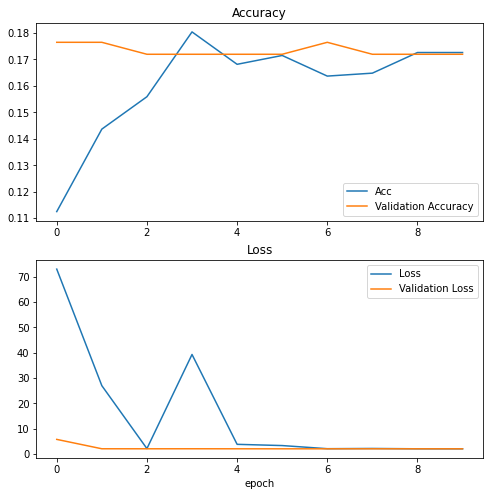

[I 2022-06-21 01:52:22,536] Trial 0 finished with value: 0.12244898080825806 and parameters: {'filters_l1': 16, 'kernel_size_l1': 3, 'strides_l1': 2, 'padding_l1': 'valid', 'activation_l1': 'linear', 'dropout_l1': 0.4800345692018263, 'filters_l2': 8, 'kernel_size_l2': 5, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.319855407251269, 'filters_l3': 37, 'kernel_size_l3': 7, 'strides_l3': 1, 'padding_l3': 'same', 'activation_l3': 'elu', 'dropout_l3': 0.1705995380287355, 'n_units_l': 290, 'dense_activation_l3': 'relu', 'dense_dropout_l3': 0.36550918132209387, 'learning_rate': 0.016099320450159105, 'beta_1': 0.9725068450656288, 'beta_2': 0.9305946301620066, 'epsilon': 1.3407616887337043e-08}. Best is trial 0 with value: 0.12244898080825806.


Epoch 1/10
29/29 [==============================] - 17s 575ms/step - loss: 5.0700 - accuracy: 0.1192 - val_loss: 2.5201 - val_accuracy: 0.1357 - lr: 1.0629e-05
Epoch 2/10
29/29 [==============================] - 16s 561ms/step - loss: 4.0917 - accuracy: 0.1192 - val_loss: 2.3468 - val_accuracy: 0.0995 - lr: 1.0629e-05
Epoch 3/10
29/29 [==============================] - 17s 555ms/step - loss: 3.3596 - accuracy: 0.1559 - val_loss: 2.2758 - val_accuracy: 0.1086 - lr: 1.0629e-05
Epoch 4/10
29/29 [==============================] - 16s 574ms/step - loss: 3.1304 - accuracy: 0.1192 - val_loss: 2.2491 - val_accuracy: 0.1357 - lr: 1.0629e-05
Epoch 5/10
29/29 [==============================] - 16s 530ms/step - loss: 2.9087 - accuracy: 0.1414 - val_loss: 2.2409 - val_accuracy: 0.1403 - lr: 1.0629e-05
Epoch 6/10
29/29 [==============================] - 16s 561ms/step - loss: 2.7423 - accuracy: 0.1292 - val_loss: 2.2402 - val_accuracy: 0.1448 - lr: 1.0629e-05
Epoch 7/10
29/29 [======================

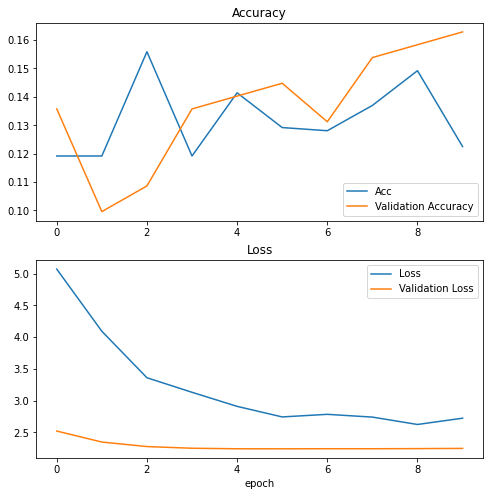

[I 2022-06-21 01:55:14,329] Trial 1 finished with value: 0.10204081982374191 and parameters: {'filters_l1': 41, 'kernel_size_l1': 3, 'strides_l1': 2, 'padding_l1': 'valid', 'activation_l1': 'elu', 'dropout_l1': 0.41069875760879293, 'filters_l2': 227, 'kernel_size_l2': 3, 'strides_l2': 1, 'padding_l2': 'valid', 'activation_l2': 'elu', 'dropout_l2': 0.36217053698245716, 'filters_l3': 9, 'kernel_size_l3': 3, 'strides_l3': 2, 'padding_l3': 'valid', 'activation_l3': 'linear', 'dropout_l3': 0.4009111163295005, 'n_units_l': 4, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.14899200908271473, 'learning_rate': 1.0629462947893383e-05, 'beta_1': 0.9831342383556713, 'beta_2': 0.9630371721583404, 'epsilon': 9.542361156591061e-07}. Best is trial 0 with value: 0.12244898080825806.


Epoch 1/10
29/29 [==============================] - 18s 581ms/step - loss: 7.0213 - accuracy: 0.1637 - val_loss: 2.0785 - val_accuracy: 0.1765 - lr: 0.0162
Epoch 2/10
29/29 [==============================] - 17s 575ms/step - loss: 2.0882 - accuracy: 0.1570 - val_loss: 2.0599 - val_accuracy: 0.1719 - lr: 0.0162
Epoch 3/10
29/29 [==============================] - 16s 563ms/step - loss: 2.0581 - accuracy: 0.1971 - val_loss: 2.0504 - val_accuracy: 0.1719 - lr: 0.0162
Epoch 4/10
29/29 [==============================] - 16s 573ms/step - loss: 2.0702 - accuracy: 0.1514 - val_loss: 2.0387 - val_accuracy: 0.1765 - lr: 0.0162
Epoch 5/10
29/29 [==============================] - 16s 566ms/step - loss: 2.0520 - accuracy: 0.1626 - val_loss: 2.0467 - val_accuracy: 0.1765 - lr: 0.0162
Epoch 6/10
29/29 [==============================] - 17s 561ms/step - loss: 2.0535 - accuracy: 0.1748 - val_loss: 2.0393 - val_accuracy: 0.1765 - lr: 0.0162
Epoch 7/10
29/29 [==============================] - 17s 571ms/st

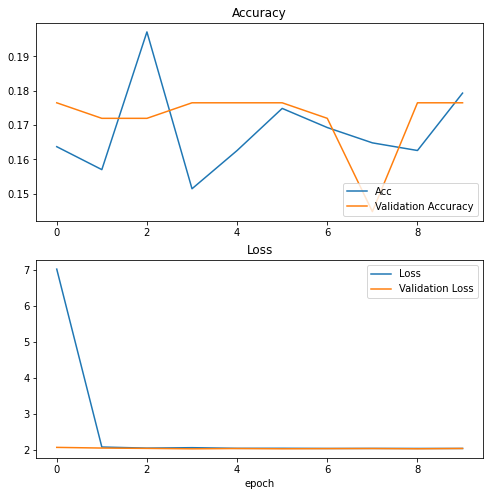

[I 2022-06-21 01:58:08,738] Trial 2 finished with value: 0.1428571492433548 and parameters: {'filters_l1': 107, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'elu', 'dropout_l1': 0.42058634528751804, 'filters_l2': 11, 'kernel_size_l2': 5, 'strides_l2': 2, 'padding_l2': 'valid', 'activation_l2': 'relu', 'dropout_l2': 0.37685138437187415, 'filters_l3': 31, 'kernel_size_l3': 5, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'relu', 'dropout_l3': 0.3224937237580642, 'n_units_l': 82, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.3298559096367438, 'learning_rate': 0.016214144482905223, 'beta_1': 0.9097144193018126, 'beta_2': 0.9635492879609324, 'epsilon': 1.838180438996209e-07}. Best is trial 2 with value: 0.1428571492433548.


Epoch 1/10
29/29 [==============================] - 17s 593ms/step - loss: 3.1290 - accuracy: 0.1192 - val_loss: 2.3633 - val_accuracy: 0.0905 - lr: 3.4047e-04
Epoch 2/10
29/29 [==============================] - 16s 568ms/step - loss: 2.6724 - accuracy: 0.1503 - val_loss: 2.1678 - val_accuracy: 0.1131 - lr: 3.4047e-04
Epoch 3/10
29/29 [==============================] - 16s 547ms/step - loss: 2.2727 - accuracy: 0.1748 - val_loss: 2.0420 - val_accuracy: 0.1629 - lr: 3.4047e-04
Epoch 4/10
29/29 [==============================] - 16s 558ms/step - loss: 2.0174 - accuracy: 0.2494 - val_loss: 2.0042 - val_accuracy: 0.2262 - lr: 3.4047e-04
Epoch 5/10
29/29 [==============================] - 16s 564ms/step - loss: 1.9218 - accuracy: 0.3007 - val_loss: 1.9291 - val_accuracy: 0.2715 - lr: 3.4047e-04
Epoch 6/10
29/29 [==============================] - 16s 574ms/step - loss: 1.8827 - accuracy: 0.3140 - val_loss: 1.9683 - val_accuracy: 0.2670 - lr: 3.4047e-04
Epoch 7/10
29/29 [======================

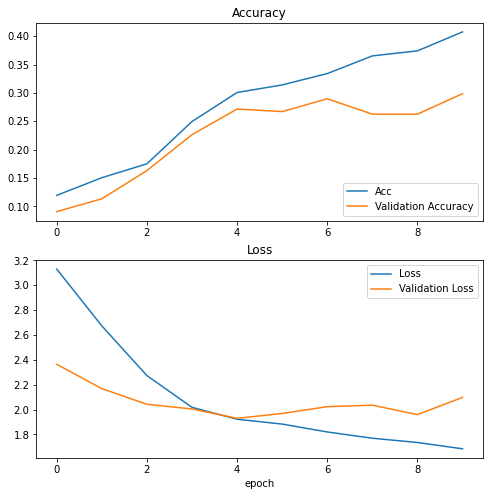

[I 2022-06-21 02:01:00,472] Trial 3 finished with value: 0.33673468232154846 and parameters: {'filters_l1': 24, 'kernel_size_l1': 7, 'strides_l1': 2, 'padding_l1': 'same', 'activation_l1': 'relu', 'dropout_l1': 0.40991750486776, 'filters_l2': 48, 'kernel_size_l2': 5, 'strides_l2': 2, 'padding_l2': 'valid', 'activation_l2': 'elu', 'dropout_l2': 0.21935973614951598, 'filters_l3': 159, 'kernel_size_l3': 3, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'relu', 'dropout_l3': 0.3169904234299888, 'n_units_l': 8, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.4389774477962234, 'learning_rate': 0.0003404656352169658, 'beta_1': 0.9369086553499489, 'beta_2': 0.9142574056107425, 'epsilon': 4.096161560867169e-08}. Best is trial 3 with value: 0.33673468232154846.


Epoch 1/10
29/29 [==============================] - 17s 584ms/step - loss: 5.2725 - accuracy: 0.2283 - val_loss: 1.9899 - val_accuracy: 0.2308 - lr: 4.0589e-04
Epoch 2/10
29/29 [==============================] - 16s 564ms/step - loss: 1.6863 - accuracy: 0.3820 - val_loss: 1.9007 - val_accuracy: 0.3077 - lr: 4.0589e-04
Epoch 3/10
29/29 [==============================] - 16s 563ms/step - loss: 1.5495 - accuracy: 0.4454 - val_loss: 1.9224 - val_accuracy: 0.3167 - lr: 4.0589e-04
Epoch 4/10
29/29 [==============================] - 16s 575ms/step - loss: 1.4220 - accuracy: 0.4633 - val_loss: 1.7121 - val_accuracy: 0.3258 - lr: 4.0589e-04
Epoch 5/10
29/29 [==============================] - 16s 560ms/step - loss: 1.3555 - accuracy: 0.4922 - val_loss: 1.6215 - val_accuracy: 0.4706 - lr: 4.0589e-04
Epoch 6/10
29/29 [==============================] - 17s 572ms/step - loss: 1.2208 - accuracy: 0.5590 - val_loss: 1.6164 - val_accuracy: 0.5294 - lr: 4.0589e-04
Epoch 7/10
29/29 [======================

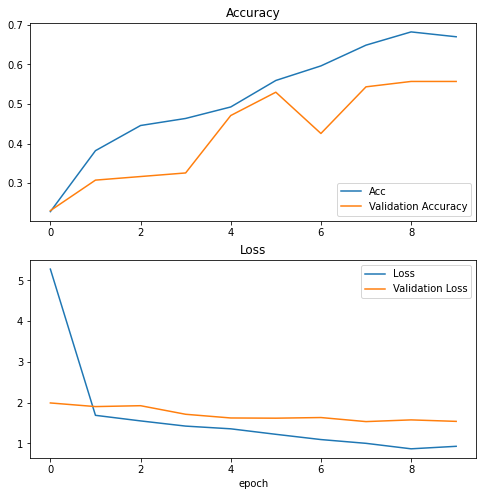

[I 2022-06-21 02:03:52,823] Trial 4 finished with value: 0.5204081535339355 and parameters: {'filters_l1': 43, 'kernel_size_l1': 5, 'strides_l1': 2, 'padding_l1': 'valid', 'activation_l1': 'linear', 'dropout_l1': 0.2718036228081794, 'filters_l2': 25, 'kernel_size_l2': 5, 'strides_l2': 1, 'padding_l2': 'valid', 'activation_l2': 'linear', 'dropout_l2': 0.1206205337168095, 'filters_l3': 137, 'kernel_size_l3': 3, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'relu', 'dropout_l3': 0.368628554691095, 'n_units_l': 226, 'dense_activation_l3': 'relu', 'dense_dropout_l3': 0.21743877479820842, 'learning_rate': 0.00040588556609507883, 'beta_1': 0.9610213743981071, 'beta_2': 0.9105926916486232, 'epsilon': 1.1637444961830952e-08}. Best is trial 4 with value: 0.5204081535339355.


Epoch 1/10
29/29 [==============================] - 18s 588ms/step - loss: 37.3958 - accuracy: 0.1615 - val_loss: 675.4818 - val_accuracy: 0.0950 - lr: 0.0104
Epoch 2/10
29/29 [==============================] - 16s 561ms/step - loss: 14.2371 - accuracy: 0.1236 - val_loss: 4.3181 - val_accuracy: 0.1674 - lr: 0.0104
Epoch 3/10
29/29 [==============================] - 16s 548ms/step - loss: 4.8958 - accuracy: 0.1247 - val_loss: 86.3532 - val_accuracy: 0.1765 - lr: 0.0104
Epoch 4/10
29/29 [==============================] - 16s 561ms/step - loss: 4.9927 - accuracy: 0.1247 - val_loss: 2.7869 - val_accuracy: 0.1448 - lr: 0.0104
Epoch 5/10
29/29 [==============================] - 16s 546ms/step - loss: 23.0560 - accuracy: 0.1269 - val_loss: 2.6100 - val_accuracy: 0.1041 - lr: 0.0104
Epoch 6/10
29/29 [==============================] - 16s 562ms/step - loss: 68.7365 - accuracy: 0.1269 - val_loss: 2.9254 - val_accuracy: 0.1176 - lr: 0.0104
Epoch 7/10
29/29 [==============================] - 16s 5

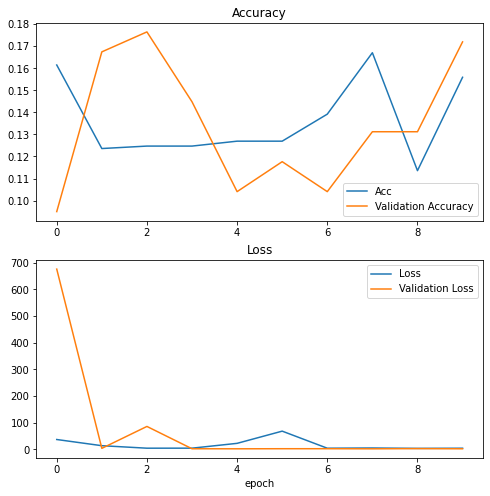

[I 2022-06-21 02:06:44,669] Trial 5 finished with value: 0.12244898080825806 and parameters: {'filters_l1': 18, 'kernel_size_l1': 7, 'strides_l1': 2, 'padding_l1': 'valid', 'activation_l1': 'linear', 'dropout_l1': 0.3093401658058957, 'filters_l2': 77, 'kernel_size_l2': 5, 'strides_l2': 1, 'padding_l2': 'valid', 'activation_l2': 'linear', 'dropout_l2': 0.26065656091367173, 'filters_l3': 4, 'kernel_size_l3': 7, 'strides_l3': 1, 'padding_l3': 'same', 'activation_l3': 'elu', 'dropout_l3': 0.19090418261383946, 'n_units_l': 5, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.3439345106318873, 'learning_rate': 0.010391629218086455, 'beta_1': 0.98022247439922, 'beta_2': 0.9218717086088558, 'epsilon': 3.1780998829974873e-07}. Best is trial 4 with value: 0.5204081535339355.


Epoch 1/10
29/29 [==============================] - 17s 580ms/step - loss: 3.2365 - accuracy: 0.1860 - val_loss: 2.0252 - val_accuracy: 0.2534 - lr: 0.0026
Epoch 2/10
29/29 [==============================] - 16s 568ms/step - loss: 2.0879 - accuracy: 0.2416 - val_loss: 2.0517 - val_accuracy: 0.1674 - lr: 0.0026
Epoch 3/10
29/29 [==============================] - 16s 556ms/step - loss: 1.8399 - accuracy: 0.3029 - val_loss: 1.9711 - val_accuracy: 0.1855 - lr: 0.0026
Epoch 4/10
29/29 [==============================] - 16s 568ms/step - loss: 1.7641 - accuracy: 0.3374 - val_loss: 1.9754 - val_accuracy: 0.1946 - lr: 0.0026
Epoch 5/10
29/29 [==============================] - 16s 575ms/step - loss: 1.7595 - accuracy: 0.3163 - val_loss: 2.0522 - val_accuracy: 0.1719 - lr: 0.0026
Epoch 6/10
29/29 [==============================] - 16s 573ms/step - loss: 1.6553 - accuracy: 0.3853 - val_loss: 1.9840 - val_accuracy: 0.1946 - lr: 0.0026
Epoch 7/10
29/29 [==============================] - 16s 574ms/st

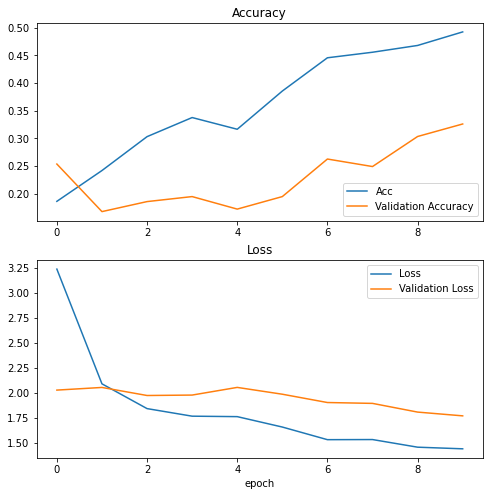

[I 2022-06-21 02:09:35,958] Trial 6 finished with value: 0.27551019191741943 and parameters: {'filters_l1': 6, 'kernel_size_l1': 5, 'strides_l1': 2, 'padding_l1': 'same', 'activation_l1': 'linear', 'dropout_l1': 0.43167389487211016, 'filters_l2': 5, 'kernel_size_l2': 3, 'strides_l2': 2, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.23004819560779657, 'filters_l3': 10, 'kernel_size_l3': 7, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'linear', 'dropout_l3': 0.28764117677180967, 'n_units_l': 548, 'dense_activation_l3': 'relu', 'dense_dropout_l3': 0.2973108351688387, 'learning_rate': 0.0026002639652835512, 'beta_1': 0.9673161693536992, 'beta_2': 0.9992141512074508, 'epsilon': 3.6525707925844867e-07}. Best is trial 4 with value: 0.5204081535339355.


Epoch 1/10
29/29 [==============================] - 17s 578ms/step - loss: 33.7494 - accuracy: 0.1292 - val_loss: 31.8124 - val_accuracy: 0.1584 - lr: 0.0165
Epoch 2/10
29/29 [==============================] - 16s 577ms/step - loss: 21.8486 - accuracy: 0.1414 - val_loss: 8.8150 - val_accuracy: 0.1176 - lr: 0.0165
Epoch 3/10
29/29 [==============================] - 16s 574ms/step - loss: 35.1439 - accuracy: 0.1481 - val_loss: 15.4418 - val_accuracy: 0.1312 - lr: 0.0165
Epoch 4/10
29/29 [==============================] - 17s 568ms/step - loss: 41.0725 - accuracy: 0.1359 - val_loss: 19.7730 - val_accuracy: 0.1765 - lr: 0.0165
Epoch 5/10
29/29 [==============================] - 16s 572ms/step - loss: 36.2801 - accuracy: 0.1548 - val_loss: 9.1299 - val_accuracy: 0.1765 - lr: 0.0165
Epoch 6/10
29/29 [==============================] - 16s 575ms/step - loss: 29.4933 - accuracy: 0.1292 - val_loss: 7.9176 - val_accuracy: 0.1312 - lr: 0.0165
Epoch 7/10
29/29 [==============================] - 16s

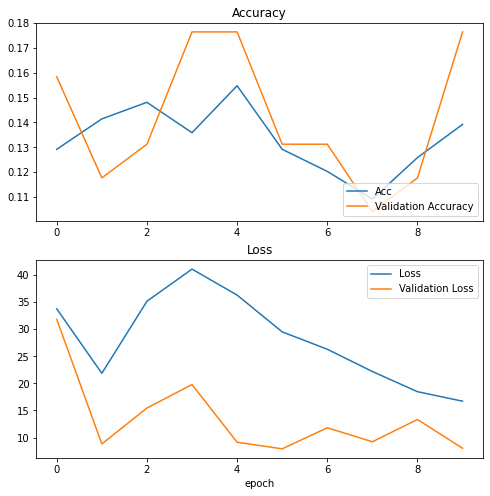

[I 2022-06-21 02:12:28,761] Trial 7 finished with value: 0.1428571492433548 and parameters: {'filters_l1': 155, 'kernel_size_l1': 5, 'strides_l1': 2, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.11838140162253655, 'filters_l2': 5, 'kernel_size_l2': 7, 'strides_l2': 2, 'padding_l2': 'same', 'activation_l2': 'elu', 'dropout_l2': 0.35823812093976937, 'filters_l3': 17, 'kernel_size_l3': 3, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'linear', 'dropout_l3': 0.47102467500023426, 'n_units_l': 370, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.35958776881586774, 'learning_rate': 0.016520903362310057, 'beta_1': 0.9757699408246556, 'beta_2': 0.9110799717352382, 'epsilon': 5.3485848652503716e-08}. Best is trial 4 with value: 0.5204081535339355.


Epoch 1/10
29/29 [==============================] - 17s 559ms/step - loss: 7.7510 - accuracy: 0.1347 - val_loss: 2.3798 - val_accuracy: 0.1357 - lr: 1.1214e-05
Epoch 2/10
29/29 [==============================] - 16s 573ms/step - loss: 6.1676 - accuracy: 0.1381 - val_loss: 2.4087 - val_accuracy: 0.1448 - lr: 1.1214e-05
Epoch 3/10
29/29 [==============================] - 16s 577ms/step - loss: 5.3995 - accuracy: 0.1214 - val_loss: 2.3477 - val_accuracy: 0.1538 - lr: 1.1214e-05
Epoch 4/10
29/29 [==============================] - 16s 548ms/step - loss: 4.6624 - accuracy: 0.1381 - val_loss: 2.2716 - val_accuracy: 0.1584 - lr: 1.1214e-05
Epoch 5/10
29/29 [==============================] - 16s 568ms/step - loss: 4.1671 - accuracy: 0.1693 - val_loss: 2.1900 - val_accuracy: 0.1765 - lr: 1.1214e-05
Epoch 6/10
29/29 [==============================] - 16s 555ms/step - loss: 3.8277 - accuracy: 0.1492 - val_loss: 2.1189 - val_accuracy: 0.1946 - lr: 1.1214e-05
Epoch 7/10
29/29 [======================

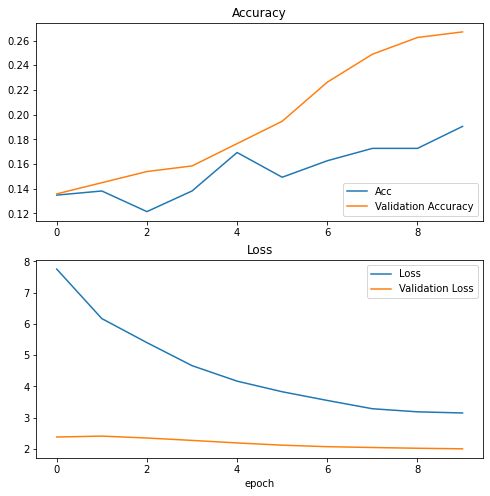

[I 2022-06-21 02:15:20,104] Trial 8 finished with value: 0.27551019191741943 and parameters: {'filters_l1': 10, 'kernel_size_l1': 7, 'strides_l1': 2, 'padding_l1': 'valid', 'activation_l1': 'linear', 'dropout_l1': 0.42983523622738795, 'filters_l2': 82, 'kernel_size_l2': 5, 'strides_l2': 2, 'padding_l2': 'valid', 'activation_l2': 'relu', 'dropout_l2': 0.3438599795678322, 'filters_l3': 29, 'kernel_size_l3': 5, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'elu', 'dropout_l3': 0.21264514093875567, 'n_units_l': 548, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.4174775168037088, 'learning_rate': 1.1214032906010171e-05, 'beta_1': 0.919841625599486, 'beta_2': 0.9792110669603136, 'epsilon': 4.835043492139384e-07}. Best is trial 4 with value: 0.5204081535339355.


Epoch 1/10
29/29 [==============================] - 18s 576ms/step - loss: 2.4886 - accuracy: 0.1448 - val_loss: 2.0806 - val_accuracy: 0.1629 - lr: 2.1958e-05
Epoch 2/10
29/29 [==============================] - 17s 566ms/step - loss: 2.0793 - accuracy: 0.1726 - val_loss: 2.0793 - val_accuracy: 0.1719 - lr: 2.1958e-05
Epoch 3/10
29/29 [==============================] - 17s 573ms/step - loss: 2.0793 - accuracy: 0.1726 - val_loss: 2.0792 - val_accuracy: 0.1719 - lr: 2.1958e-05
Epoch 4/10
29/29 [==============================] - 17s 570ms/step - loss: 2.0792 - accuracy: 0.1726 - val_loss: 2.0791 - val_accuracy: 0.1719 - lr: 2.1958e-05
Epoch 5/10
29/29 [==============================] - 17s 565ms/step - loss: 2.0791 - accuracy: 0.1726 - val_loss: 2.0791 - val_accuracy: 0.1719 - lr: 2.1958e-05
Epoch 6/10
29/29 [==============================] - 17s 584ms/step - loss: 2.0790 - accuracy: 0.1726 - val_loss: 2.0790 - val_accuracy: 0.1719 - lr: 2.1958e-05
Epoch 7/10
29/29 [======================

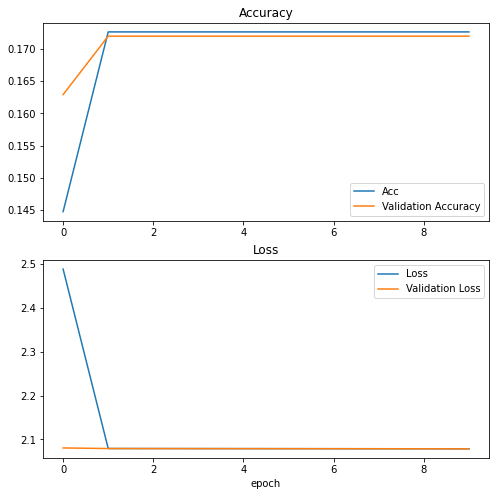

[I 2022-06-21 02:18:15,009] Trial 9 finished with value: 0.12244898080825806 and parameters: {'filters_l1': 75, 'kernel_size_l1': 3, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'relu', 'dropout_l1': 0.3632939532687862, 'filters_l2': 42, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'elu', 'dropout_l2': 0.33055249026120526, 'filters_l3': 99, 'kernel_size_l3': 7, 'strides_l3': 1, 'padding_l3': 'same', 'activation_l3': 'elu', 'dropout_l3': 0.42803208795193126, 'n_units_l': 15, 'dense_activation_l3': 'relu', 'dense_dropout_l3': 0.1851613587984957, 'learning_rate': 2.195770494771e-05, 'beta_1': 0.963771765686451, 'beta_2': 0.9906015356717529, 'epsilon': 1.0443075605166021e-07}. Best is trial 4 with value: 0.5204081535339355.


Epoch 1/10
29/29 [==============================] - 18s 583ms/step - loss: 3.6317 - accuracy: 0.2539 - val_loss: 2.0045 - val_accuracy: 0.1674 - lr: 1.9561e-04
Epoch 2/10
29/29 [==============================] - 17s 573ms/step - loss: 1.9544 - accuracy: 0.2595 - val_loss: 1.9715 - val_accuracy: 0.2579 - lr: 1.9561e-04
Epoch 3/10
29/29 [==============================] - 17s 576ms/step - loss: 1.8774 - accuracy: 0.3107 - val_loss: 1.9235 - val_accuracy: 0.3077 - lr: 1.9561e-04
Epoch 4/10
29/29 [==============================] - 16s 562ms/step - loss: 1.7935 - accuracy: 0.3330 - val_loss: 1.8242 - val_accuracy: 0.2941 - lr: 1.9561e-04
Epoch 5/10
29/29 [==============================] - 17s 568ms/step - loss: 1.7156 - accuracy: 0.3430 - val_loss: 1.7697 - val_accuracy: 0.3529 - lr: 1.9561e-04
Epoch 6/10
29/29 [==============================] - 16s 553ms/step - loss: 1.6530 - accuracy: 0.3731 - val_loss: 1.7765 - val_accuracy: 0.3439 - lr: 1.9561e-04
Epoch 7/10
29/29 [======================

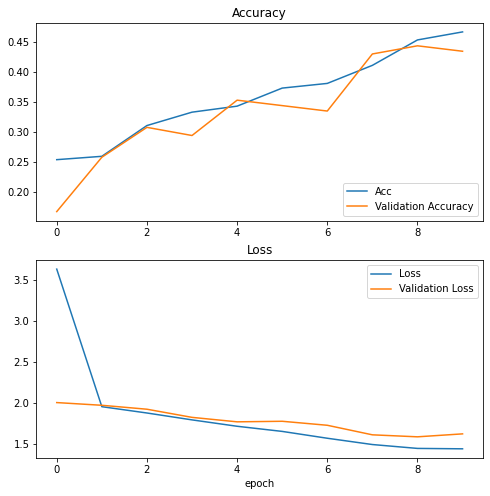

[I 2022-06-21 02:21:08,435] Trial 10 finished with value: 0.3571428656578064 and parameters: {'filters_l1': 54, 'kernel_size_l1': 5, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'linear', 'dropout_l1': 0.18887137821788474, 'filters_l2': 19, 'kernel_size_l2': 3, 'strides_l2': 1, 'padding_l2': 'valid', 'activation_l2': 'linear', 'dropout_l2': 0.11148534603348163, 'filters_l3': 75, 'kernel_size_l3': 3, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'relu', 'dropout_l3': 0.3976628144637088, 'n_units_l': 87, 'dense_activation_l3': 'relu', 'dense_dropout_l3': 0.2333684047943113, 'learning_rate': 0.00019560657291341836, 'beta_1': 0.9426439552824011, 'beta_2': 0.9396797790925341, 'epsilon': 1.2376390618270224e-08}. Best is trial 4 with value: 0.5204081535339355.


Epoch 1/10
29/29 [==============================] - 18s 589ms/step - loss: 3.9605 - accuracy: 0.1481 - val_loss: 2.0717 - val_accuracy: 0.0950 - lr: 2.0976e-04
Epoch 2/10
29/29 [==============================] - 16s 577ms/step - loss: 2.0784 - accuracy: 0.1826 - val_loss: 2.0703 - val_accuracy: 0.1946 - lr: 2.0976e-04
Epoch 3/10
29/29 [==============================] - 17s 578ms/step - loss: 2.0688 - accuracy: 0.2049 - val_loss: 2.0734 - val_accuracy: 0.1946 - lr: 2.0976e-04
Epoch 4/10
29/29 [==============================] - 16s 547ms/step - loss: 2.0757 - accuracy: 0.1737 - val_loss: 2.0767 - val_accuracy: 0.1719 - lr: 2.0976e-04
Epoch 5/10
29/29 [==============================] - 16s 549ms/step - loss: 2.0763 - accuracy: 0.1726 - val_loss: 2.0760 - val_accuracy: 0.1719 - lr: 2.0976e-04
Epoch 6/10
29/29 [==============================] - 17s 581ms/step - loss: 2.0756 - accuracy: 0.1726 - val_loss: 2.0752 - val_accuracy: 0.1719 - lr: 2.0976e-04
Epoch 7/10
29/29 [======================

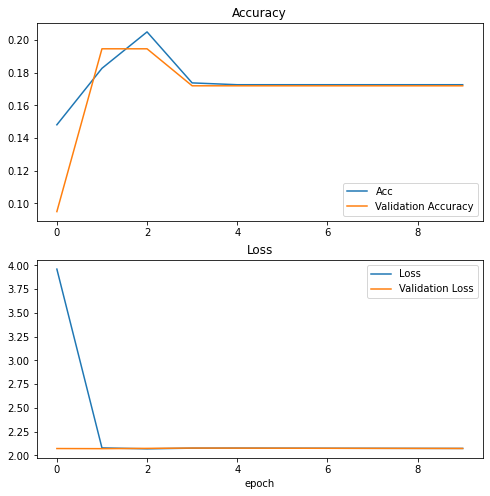

[I 2022-06-21 02:24:02,551] Trial 11 finished with value: 0.1734693944454193 and parameters: {'filters_l1': 52, 'kernel_size_l1': 5, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'linear', 'dropout_l1': 0.1862109046273298, 'filters_l2': 18, 'kernel_size_l2': 3, 'strides_l2': 1, 'padding_l2': 'valid', 'activation_l2': 'linear', 'dropout_l2': 0.10127849573728633, 'filters_l3': 85, 'kernel_size_l3': 3, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'relu', 'dropout_l3': 0.3806829075685247, 'n_units_l': 58, 'dense_activation_l3': 'relu', 'dense_dropout_l3': 0.21557941968853933, 'learning_rate': 0.00020976467408430712, 'beta_1': 0.9447414743705982, 'beta_2': 0.9370845974494411, 'epsilon': 1.039757357960665e-08}. Best is trial 4 with value: 0.5204081535339355.


Epoch 1/10
29/29 [==============================] - 18s 550ms/step - loss: 5.7124 - accuracy: 0.1804 - val_loss: 2.2815 - val_accuracy: 0.1041 - lr: 1.0011e-04
Epoch 2/10
29/29 [==============================] - 17s 568ms/step - loss: 2.0162 - accuracy: 0.1871 - val_loss: 2.2695 - val_accuracy: 0.1176 - lr: 1.0011e-04
Epoch 3/10
29/29 [==============================] - 16s 585ms/step - loss: 2.0079 - accuracy: 0.1915 - val_loss: 2.0498 - val_accuracy: 0.1946 - lr: 1.0011e-04
Epoch 4/10
29/29 [==============================] - 16s 569ms/step - loss: 2.0633 - accuracy: 0.1715 - val_loss: 2.0359 - val_accuracy: 0.2262 - lr: 1.0011e-04
Epoch 5/10
29/29 [==============================] - 17s 574ms/step - loss: 2.0407 - accuracy: 0.1759 - val_loss: 1.9394 - val_accuracy: 0.1855 - lr: 1.0011e-04
Epoch 6/10
29/29 [==============================] - 16s 569ms/step - loss: 2.0057 - accuracy: 0.1871 - val_loss: 1.9036 - val_accuracy: 0.2308 - lr: 1.0011e-04
Epoch 7/10
29/29 [======================

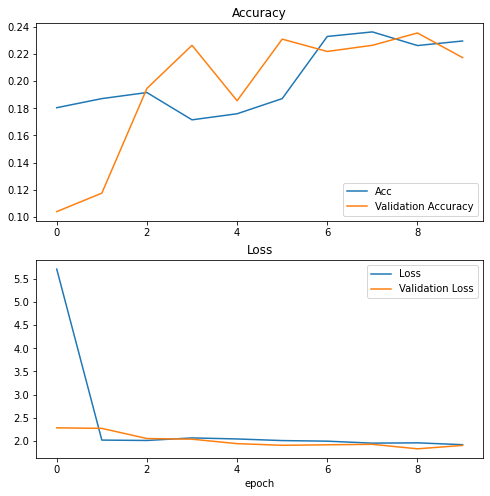

[I 2022-06-21 02:26:55,939] Trial 12 finished with value: 0.2551020383834839 and parameters: {'filters_l1': 39, 'kernel_size_l1': 5, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'linear', 'dropout_l1': 0.21641969188929439, 'filters_l2': 21, 'kernel_size_l2': 3, 'strides_l2': 1, 'padding_l2': 'valid', 'activation_l2': 'linear', 'dropout_l2': 0.10065657372771233, 'filters_l3': 226, 'kernel_size_l3': 3, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'relu', 'dropout_l3': 0.47804265412208824, 'n_units_l': 118, 'dense_activation_l3': 'relu', 'dense_dropout_l3': 0.2588304392750286, 'learning_rate': 0.00010010831467202773, 'beta_1': 0.9314453407577223, 'beta_2': 0.9008006697643163, 'epsilon': 2.278079256892103e-08}. Best is trial 4 with value: 0.5204081535339355.


Epoch 1/10
29/29 [==============================] - 18s 586ms/step - loss: 13.9517 - accuracy: 0.1292 - val_loss: 2.0654 - val_accuracy: 0.0814 - lr: 8.1714e-04
Epoch 2/10
29/29 [==============================] - 17s 554ms/step - loss: 2.0787 - accuracy: 0.1347 - val_loss: 2.1192 - val_accuracy: 0.1538 - lr: 8.1714e-04
Epoch 3/10
29/29 [==============================] - 17s 574ms/step - loss: 2.1155 - accuracy: 0.1737 - val_loss: 2.2443 - val_accuracy: 0.2127 - lr: 8.1714e-04
Epoch 4/10
29/29 [==============================] - 17s 581ms/step - loss: 2.0830 - accuracy: 0.1882 - val_loss: 2.1372 - val_accuracy: 0.1855 - lr: 8.1714e-04
Epoch 5/10
29/29 [==============================] - 17s 583ms/step - loss: 2.1253 - accuracy: 0.1771 - val_loss: 2.0540 - val_accuracy: 0.1855 - lr: 8.1714e-04
Epoch 6/10
29/29 [==============================] - 17s 577ms/step - loss: 2.2623 - accuracy: 0.1771 - val_loss: 2.0708 - val_accuracy: 0.1765 - lr: 8.1714e-04
Epoch 7/10
29/29 [=====================

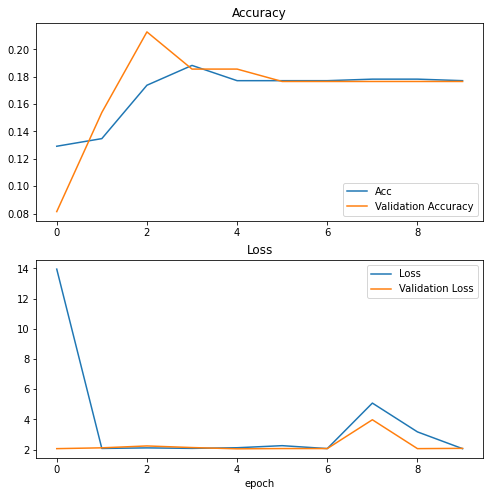

[I 2022-06-21 02:29:52,944] Trial 13 finished with value: 0.1428571492433548 and parameters: {'filters_l1': 228, 'kernel_size_l1': 5, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'linear', 'dropout_l1': 0.25189136298619635, 'filters_l2': 15, 'kernel_size_l2': 3, 'strides_l2': 1, 'padding_l2': 'valid', 'activation_l2': 'linear', 'dropout_l2': 0.4510426122325887, 'filters_l3': 70, 'kernel_size_l3': 3, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'relu', 'dropout_l3': 0.10244141896025427, 'n_units_l': 31, 'dense_activation_l3': 'relu', 'dense_dropout_l3': 0.10740243161710888, 'learning_rate': 0.000817144239742339, 'beta_1': 0.9962618982975688, 'beta_2': 0.9470778785891814, 'epsilon': 2.6641827832839596e-08}. Best is trial 4 with value: 0.5204081535339355.


Epoch 1/10
29/29 [==============================] - 18s 573ms/step - loss: 2.7211 - accuracy: 0.2138 - val_loss: 2.0043 - val_accuracy: 0.2262 - lr: 6.5802e-05
Epoch 2/10
29/29 [==============================] - 17s 571ms/step - loss: 1.6895 - accuracy: 0.3731 - val_loss: 1.9377 - val_accuracy: 0.2624 - lr: 6.5802e-05
Epoch 3/10
29/29 [==============================] - 17s 562ms/step - loss: 1.4748 - accuracy: 0.4633 - val_loss: 1.7191 - val_accuracy: 0.3439 - lr: 6.5802e-05
Epoch 4/10
29/29 [==============================] - 17s 576ms/step - loss: 1.3095 - accuracy: 0.5301 - val_loss: 1.6532 - val_accuracy: 0.4389 - lr: 6.5802e-05
Epoch 5/10
29/29 [==============================] - 17s 578ms/step - loss: 1.1600 - accuracy: 0.5824 - val_loss: 1.5719 - val_accuracy: 0.4615 - lr: 6.5802e-05
Epoch 6/10
29/29 [==============================] - 17s 580ms/step - loss: 1.0187 - accuracy: 0.6459 - val_loss: 1.4264 - val_accuracy: 0.5068 - lr: 6.5802e-05
Epoch 7/10
29/29 [======================

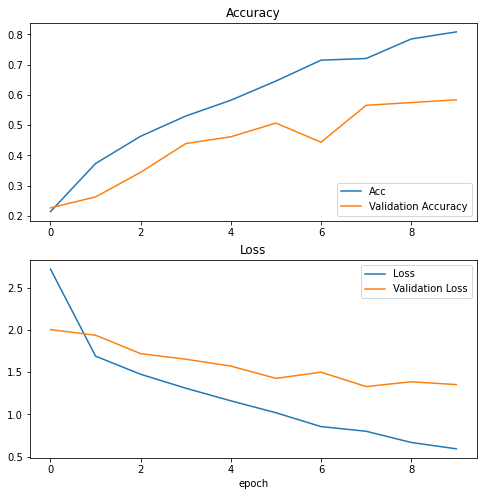

[I 2022-06-21 02:32:46,935] Trial 14 finished with value: 0.6734693646430969 and parameters: {'filters_l1': 93, 'kernel_size_l1': 5, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'linear', 'dropout_l1': 0.12863063124169344, 'filters_l2': 28, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'valid', 'activation_l2': 'linear', 'dropout_l2': 0.16596288215968288, 'filters_l3': 54, 'kernel_size_l3': 3, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'relu', 'dropout_l3': 0.35810212723818596, 'n_units_l': 183, 'dense_activation_l3': 'relu', 'dense_dropout_l3': 0.24295639797636812, 'learning_rate': 6.580194952160005e-05, 'beta_1': 0.9550960545846641, 'beta_2': 0.9428378828862736, 'epsilon': 1.788525245698147e-08}. Best is trial 14 with value: 0.6734693646430969.


Epoch 1/10
29/29 [==============================] - 18s 581ms/step - loss: 6.0175 - accuracy: 0.2105 - val_loss: 2.0355 - val_accuracy: 0.2443 - lr: 4.6600e-05
Epoch 2/10
29/29 [==============================] - 17s 574ms/step - loss: 1.9230 - accuracy: 0.2116 - val_loss: 2.0340 - val_accuracy: 0.1448 - lr: 4.6600e-05
Epoch 3/10
29/29 [==============================] - 17s 562ms/step - loss: 1.8819 - accuracy: 0.2361 - val_loss: 2.0190 - val_accuracy: 0.1493 - lr: 4.6600e-05
Epoch 4/10
29/29 [==============================] - 17s 565ms/step - loss: 1.7676 - accuracy: 0.2684 - val_loss: 1.8049 - val_accuracy: 0.2579 - lr: 4.6600e-05
Epoch 5/10
29/29 [==============================] - 17s 581ms/step - loss: 1.7447 - accuracy: 0.3185 - val_loss: 1.8922 - val_accuracy: 0.2443 - lr: 4.6600e-05
Epoch 6/10
29/29 [==============================] - 17s 579ms/step - loss: 1.6852 - accuracy: 0.3085 - val_loss: 1.7728 - val_accuracy: 0.2489 - lr: 4.6600e-05
Epoch 7/10
29/29 [======================

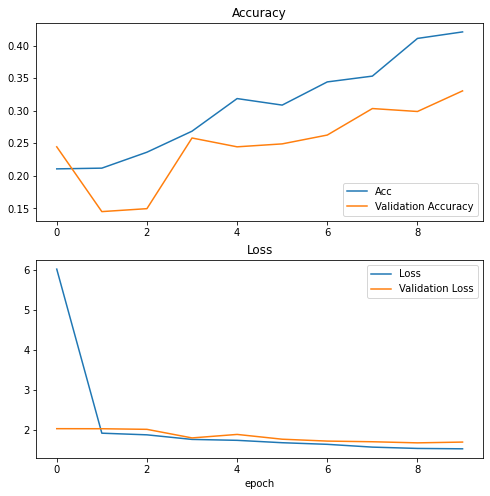

[I 2022-06-21 02:35:42,311] Trial 15 finished with value: 0.40816327929496765 and parameters: {'filters_l1': 102, 'kernel_size_l1': 5, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'relu', 'dropout_l1': 0.10033037707244757, 'filters_l2': 34, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'valid', 'activation_l2': 'linear', 'dropout_l2': 0.17394418193515312, 'filters_l3': 200, 'kernel_size_l3': 3, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'relu', 'dropout_l3': 0.28329606035418703, 'n_units_l': 197, 'dense_activation_l3': 'relu', 'dense_dropout_l3': 0.2799008168911145, 'learning_rate': 4.660009937203497e-05, 'beta_1': 0.9561054526599754, 'beta_2': 0.963161283502364, 'epsilon': 6.763958020505492e-08}. Best is trial 14 with value: 0.6734693646430969.


Epoch 1/10
29/29 [==============================] - 18s 574ms/step - loss: 65.3038 - accuracy: 0.1570 - val_loss: 33.1596 - val_accuracy: 0.1493 - lr: 0.0019
Epoch 2/10
29/29 [==============================] - 16s 560ms/step - loss: 35.4480 - accuracy: 0.1748 - val_loss: 5.9422 - val_accuracy: 0.1810 - lr: 0.0019
Epoch 3/10
29/29 [==============================] - 16s 575ms/step - loss: 27.2089 - accuracy: 0.1648 - val_loss: 2.4038 - val_accuracy: 0.1719 - lr: 0.0019
Epoch 4/10
29/29 [==============================] - 16s 571ms/step - loss: 6.7063 - accuracy: 0.1748 - val_loss: 2.0394 - val_accuracy: 0.1719 - lr: 0.0019
Epoch 5/10
29/29 [==============================] - 17s 575ms/step - loss: 10.3585 - accuracy: 0.1815 - val_loss: 2.0376 - val_accuracy: 0.1765 - lr: 0.0019
Epoch 6/10
29/29 [==============================] - 16s 553ms/step - loss: 4.1274 - accuracy: 0.1782 - val_loss: 2.0377 - val_accuracy: 0.1765 - lr: 0.0019
Epoch 7/10
29/29 [==============================] - 17s 580

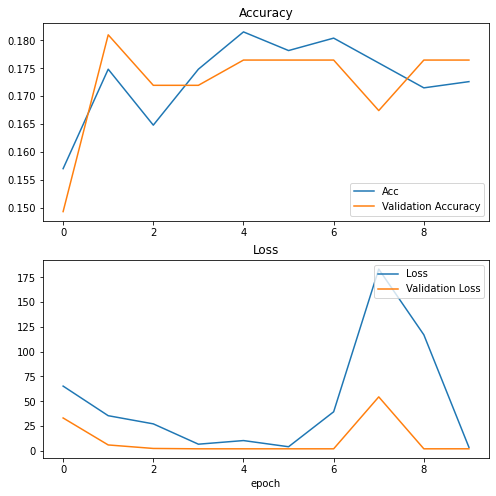

[I 2022-06-21 02:38:35,579] Trial 16 finished with value: 0.1428571492433548 and parameters: {'filters_l1': 247, 'kernel_size_l1': 5, 'strides_l1': 2, 'padding_l1': 'valid', 'activation_l1': 'linear', 'dropout_l1': 0.294242248133674, 'filters_l2': 83, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'valid', 'activation_l2': 'linear', 'dropout_l2': 0.16025102817443013, 'filters_l3': 48, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'relu', 'dropout_l3': 0.33943781451509236, 'n_units_l': 171, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.17795572465500487, 'learning_rate': 0.0018503054513282482, 'beta_1': 0.952034273766599, 'beta_2': 0.9220396884444926, 'epsilon': 2.1446971367395946e-08}. Best is trial 14 with value: 0.6734693646430969.


Epoch 1/10
29/29 [==============================] - 18s 590ms/step - loss: 1194609.1250 - accuracy: 0.1214 - val_loss: 2.0774 - val_accuracy: 0.1719 - lr: 0.0575
Epoch 2/10
29/29 [==============================] - 17s 583ms/step - loss: 600.9353 - accuracy: 0.1726 - val_loss: 2.0437 - val_accuracy: 0.1719 - lr: 0.0575
Epoch 3/10
29/29 [==============================] - 17s 562ms/step - loss: 2611.1882 - accuracy: 0.1793 - val_loss: 2.0419 - val_accuracy: 0.1765 - lr: 0.0575
Epoch 4/10
29/29 [==============================] - 17s 577ms/step - loss: 2.0468 - accuracy: 0.1704 - val_loss: 2.0413 - val_accuracy: 0.1719 - lr: 0.0575
Epoch 5/10
29/29 [==============================] - 17s 570ms/step - loss: 2.0473 - accuracy: 0.1793 - val_loss: 2.0410 - val_accuracy: 0.1765 - lr: 0.0575
Epoch 6/10
29/29 [==============================] - 17s 571ms/step - loss: 2.0425 - accuracy: 0.1726 - val_loss: 2.0395 - val_accuracy: 0.1765 - lr: 0.0575
Epoch 7/10
29/29 [==============================] - 1

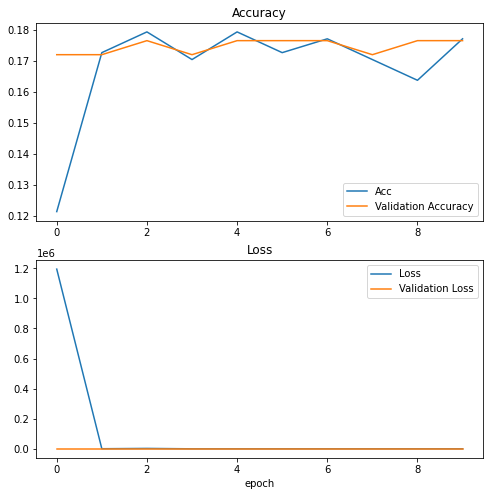

[I 2022-06-21 02:41:30,230] Trial 17 finished with value: 0.1428571492433548 and parameters: {'filters_l1': 4, 'kernel_size_l1': 5, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'linear', 'dropout_l1': 0.14163479366279902, 'filters_l2': 188, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'valid', 'activation_l2': 'linear', 'dropout_l2': 0.1753906410334573, 'filters_l3': 129, 'kernel_size_l3': 3, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'relu', 'dropout_l3': 0.23760479525700173, 'n_units_l': 818, 'dense_activation_l3': 'relu', 'dense_dropout_l3': 0.10258016394424646, 'learning_rate': 0.05754790892252402, 'beta_1': 0.9257043522162507, 'beta_2': 0.9012918794179658, 'epsilon': 3.145032148131295e-08}. Best is trial 14 with value: 0.6734693646430969.


Epoch 1/10
29/29 [==============================] - 19s 591ms/step - loss: 3.7950 - accuracy: 0.1370 - val_loss: 2.0786 - val_accuracy: 0.1176 - lr: 6.8118e-05
Epoch 2/10
29/29 [==============================] - 16s 543ms/step - loss: 2.0703 - accuracy: 0.1604 - val_loss: 2.0655 - val_accuracy: 0.2036 - lr: 6.8118e-05
Epoch 3/10
29/29 [==============================] - 17s 573ms/step - loss: 2.0756 - accuracy: 0.1715 - val_loss: 2.0585 - val_accuracy: 0.1855 - lr: 6.8118e-05
Epoch 4/10
29/29 [==============================] - 17s 570ms/step - loss: 2.0788 - accuracy: 0.1682 - val_loss: 2.0777 - val_accuracy: 0.1765 - lr: 6.8118e-05
Epoch 5/10
29/29 [==============================] - 17s 553ms/step - loss: 2.0786 - accuracy: 0.1771 - val_loss: 2.0785 - val_accuracy: 0.1765 - lr: 6.8118e-05
Epoch 6/10
29/29 [==============================] - 17s 569ms/step - loss: 2.0784 - accuracy: 0.1771 - val_loss: 2.0782 - val_accuracy: 0.1765 - lr: 6.8118e-05
Epoch 7/10
29/29 [======================

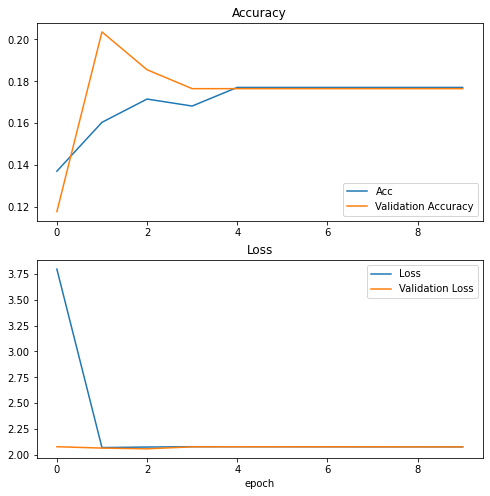

[I 2022-06-21 02:44:28,511] Trial 18 finished with value: 0.1428571492433548 and parameters: {'filters_l1': 75, 'kernel_size_l1': 5, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'relu', 'dropout_l1': 0.283148667230572, 'filters_l2': 27, 'kernel_size_l2': 5, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'linear', 'dropout_l2': 0.2693982774857822, 'filters_l3': 50, 'kernel_size_l3': 3, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'relu', 'dropout_l3': 0.34480681834020194, 'n_units_l': 51, 'dense_activation_l3': 'relu', 'dense_dropout_l3': 0.23929387345305167, 'learning_rate': 6.811767936742536e-05, 'beta_1': 0.9993112320400733, 'beta_2': 0.9500676513888631, 'epsilon': 9.687744437309576e-08}. Best is trial 14 with value: 0.6734693646430969.


Epoch 1/10
29/29 [==============================] - 18s 599ms/step - loss: 5.3751 - accuracy: 0.2138 - val_loss: 3.1608 - val_accuracy: 0.1357 - lr: 6.5625e-04
Epoch 2/10
29/29 [==============================] - 16s 555ms/step - loss: 3.1840 - accuracy: 0.3029 - val_loss: 2.2256 - val_accuracy: 0.2217 - lr: 6.5625e-04
Epoch 3/10
29/29 [==============================] - 16s 566ms/step - loss: 2.2075 - accuracy: 0.3619 - val_loss: 1.9461 - val_accuracy: 0.2579 - lr: 6.5625e-04
Epoch 4/10
29/29 [==============================] - 16s 564ms/step - loss: 1.9204 - accuracy: 0.4365 - val_loss: 1.9253 - val_accuracy: 0.2986 - lr: 6.5625e-04
Epoch 5/10
29/29 [==============================] - 17s 558ms/step - loss: 1.7161 - accuracy: 0.4699 - val_loss: 1.8867 - val_accuracy: 0.3665 - lr: 6.5625e-04
Epoch 6/10
29/29 [==============================] - 16s 571ms/step - loss: 1.3920 - accuracy: 0.5546 - val_loss: 1.8587 - val_accuracy: 0.3348 - lr: 6.5625e-04
Epoch 7/10
29/29 [======================

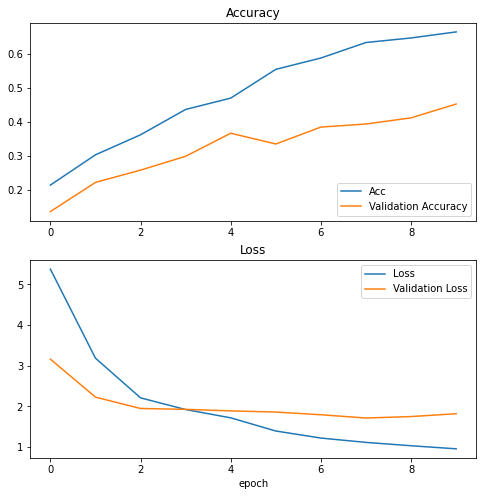

[I 2022-06-21 02:47:21,121] Trial 19 finished with value: 0.4897959232330322 and parameters: {'filters_l1': 24, 'kernel_size_l1': 3, 'strides_l1': 2, 'padding_l1': 'valid', 'activation_l1': 'elu', 'dropout_l1': 0.342633159476703, 'filters_l2': 10, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'valid', 'activation_l2': 'linear', 'dropout_l2': 0.13991408167231545, 'filters_l3': 17, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'linear', 'dropout_l3': 0.2578874545879324, 'n_units_l': 33, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.192805977988185, 'learning_rate': 0.0006562471945808701, 'beta_1': 0.9591866521240584, 'beta_2': 0.9527792010871781, 'epsilon': 1.6251438121809533e-08}. Best is trial 14 with value: 0.6734693646430969.


Epoch 1/10
29/29 [==============================] - 18s 585ms/step - loss: 408.9415 - accuracy: 0.1793 - val_loss: 2.0784 - val_accuracy: 0.1041 - lr: 0.0041
Epoch 2/10
29/29 [==============================] - 17s 573ms/step - loss: 23.6850 - accuracy: 0.1392 - val_loss: 2.0754 - val_accuracy: 0.1448 - lr: 0.0041
Epoch 3/10
29/29 [==============================] - 17s 571ms/step - loss: 5.0401 - accuracy: 0.1559 - val_loss: 2.0696 - val_accuracy: 0.1448 - lr: 0.0041
Epoch 4/10
29/29 [==============================] - 17s 579ms/step - loss: 10.8380 - accuracy: 0.1448 - val_loss: 2.0626 - val_accuracy: 0.1448 - lr: 0.0041
Epoch 5/10
29/29 [==============================] - 17s 580ms/step - loss: 5.8820 - accuracy: 0.1470 - val_loss: 2.0556 - val_accuracy: 0.1448 - lr: 0.0041
Epoch 6/10
29/29 [==============================] - 17s 580ms/step - loss: 2.0530 - accuracy: 0.1481 - val_loss: 2.0489 - val_accuracy: 0.1448 - lr: 0.0041
Epoch 7/10
29/29 [==============================] - 17s 578m

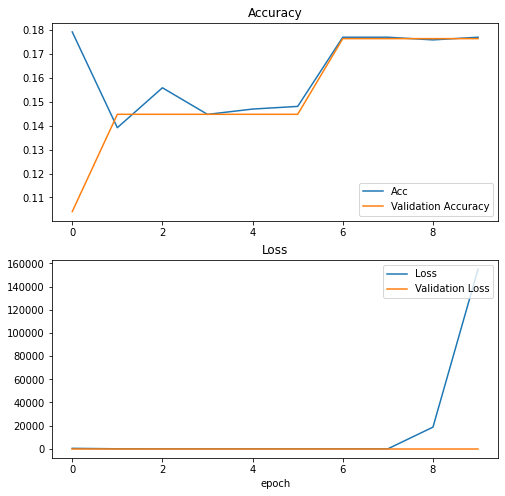

[I 2022-06-21 02:50:16,949] Trial 20 finished with value: 0.1428571492433548 and parameters: {'filters_l1': 125, 'kernel_size_l1': 5, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'linear', 'dropout_l1': 0.2351635464269502, 'filters_l2': 58, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'valid', 'activation_l2': 'linear', 'dropout_l2': 0.21176681918168938, 'filters_l3': 126, 'kernel_size_l3': 3, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'relu', 'dropout_l3': 0.4351270759303551, 'n_units_l': 189, 'dense_activation_l3': 'relu', 'dense_dropout_l3': 0.15545730388825885, 'learning_rate': 0.004134722438119548, 'beta_1': 0.9874532854633895, 'beta_2': 0.9276849789432763, 'epsilon': 4.169410312818189e-08}. Best is trial 14 with value: 0.6734693646430969.


Epoch 1/10
29/29 [==============================] - 18s 584ms/step - loss: 5.3077 - accuracy: 0.1871 - val_loss: 3.6917 - val_accuracy: 0.1674 - lr: 7.5488e-04
Epoch 2/10
29/29 [==============================] - 16s 578ms/step - loss: 2.9560 - accuracy: 0.3419 - val_loss: 2.1861 - val_accuracy: 0.2534 - lr: 7.5488e-04
Epoch 3/10
29/29 [==============================] - 17s 567ms/step - loss: 2.1524 - accuracy: 0.4154 - val_loss: 2.0332 - val_accuracy: 0.2534 - lr: 7.5488e-04
Epoch 4/10
29/29 [==============================] - 16s 572ms/step - loss: 1.7377 - accuracy: 0.4566 - val_loss: 1.9526 - val_accuracy: 0.2986 - lr: 7.5488e-04
Epoch 5/10
29/29 [==============================] - 16s 565ms/step - loss: 1.4522 - accuracy: 0.5111 - val_loss: 2.1163 - val_accuracy: 0.2941 - lr: 7.5488e-04
Epoch 6/10
29/29 [==============================] - 16s 573ms/step - loss: 1.2776 - accuracy: 0.5568 - val_loss: 2.0436 - val_accuracy: 0.3077 - lr: 7.5488e-04
Epoch 7/10
29/29 [======================

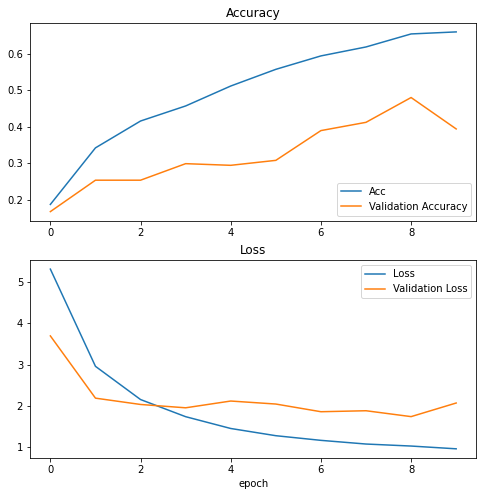

[I 2022-06-21 02:53:13,042] Trial 21 finished with value: 0.44897958636283875 and parameters: {'filters_l1': 28, 'kernel_size_l1': 3, 'strides_l1': 2, 'padding_l1': 'valid', 'activation_l1': 'elu', 'dropout_l1': 0.3534453040990379, 'filters_l2': 10, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'valid', 'activation_l2': 'linear', 'dropout_l2': 0.15246197507802564, 'filters_l3': 18, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'linear', 'dropout_l3': 0.25646354341153554, 'n_units_l': 32, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.19873749801079804, 'learning_rate': 0.0007548835317004309, 'beta_1': 0.9584032045177461, 'beta_2': 0.9528650169154921, 'epsilon': 1.756735935147568e-08}. Best is trial 14 with value: 0.6734693646430969.


Epoch 1/10
29/29 [==============================] - 17s 585ms/step - loss: 4.6342 - accuracy: 0.2082 - val_loss: 2.3116 - val_accuracy: 0.1403 - lr: 3.9967e-04
Epoch 2/10
29/29 [==============================] - 17s 571ms/step - loss: 2.9770 - accuracy: 0.2027 - val_loss: 2.0725 - val_accuracy: 0.1946 - lr: 3.9967e-04
Epoch 3/10
29/29 [==============================] - 16s 565ms/step - loss: 2.5041 - accuracy: 0.2639 - val_loss: 1.9582 - val_accuracy: 0.2896 - lr: 3.9967e-04
Epoch 4/10
29/29 [==============================] - 16s 570ms/step - loss: 2.3082 - accuracy: 0.2806 - val_loss: 1.9189 - val_accuracy: 0.2805 - lr: 3.9967e-04
Epoch 5/10
29/29 [==============================] - 16s 563ms/step - loss: 2.2122 - accuracy: 0.2940 - val_loss: 1.8401 - val_accuracy: 0.3439 - lr: 3.9967e-04
Epoch 6/10
29/29 [==============================] - 16s 563ms/step - loss: 1.9913 - accuracy: 0.3374 - val_loss: 1.7839 - val_accuracy: 0.3575 - lr: 3.9967e-04
Epoch 7/10
29/29 [======================

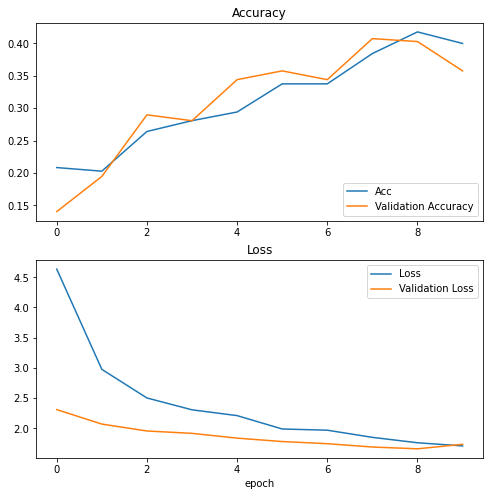

[I 2022-06-21 02:56:05,938] Trial 22 finished with value: 0.3163265287876129 and parameters: {'filters_l1': 12, 'kernel_size_l1': 3, 'strides_l1': 2, 'padding_l1': 'valid', 'activation_l1': 'elu', 'dropout_l1': 0.3257286598680574, 'filters_l2': 7, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'valid', 'activation_l2': 'linear', 'dropout_l2': 0.13908907847214178, 'filters_l3': 18, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'linear', 'dropout_l3': 0.3464283254335336, 'n_units_l': 18, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.4952422239110737, 'learning_rate': 0.0003996685906147109, 'beta_1': 0.9510799114256047, 'beta_2': 0.9759291011821822, 'epsilon': 1.5259704481424656e-08}. Best is trial 14 with value: 0.6734693646430969.


Epoch 1/10
29/29 [==============================] - 17s 554ms/step - loss: 7.7347 - accuracy: 0.1336 - val_loss: 2.3244 - val_accuracy: 0.1493 - lr: 3.5709e-05
Epoch 2/10
29/29 [==============================] - 16s 567ms/step - loss: 5.7792 - accuracy: 0.1437 - val_loss: 2.3122 - val_accuracy: 0.1131 - lr: 3.5709e-05
Epoch 3/10
29/29 [==============================] - 16s 565ms/step - loss: 4.8547 - accuracy: 0.1670 - val_loss: 2.2429 - val_accuracy: 0.1448 - lr: 3.5709e-05
Epoch 4/10
29/29 [==============================] - 16s 567ms/step - loss: 4.5049 - accuracy: 0.1615 - val_loss: 2.1974 - val_accuracy: 0.1719 - lr: 3.5709e-05
Epoch 5/10
29/29 [==============================] - 16s 559ms/step - loss: 4.1164 - accuracy: 0.1938 - val_loss: 2.2050 - val_accuracy: 0.1946 - lr: 3.5709e-05
Epoch 6/10
29/29 [==============================] - 16s 578ms/step - loss: 3.8175 - accuracy: 0.1927 - val_loss: 2.2093 - val_accuracy: 0.1991 - lr: 3.5709e-05
Epoch 7/10
29/29 [======================

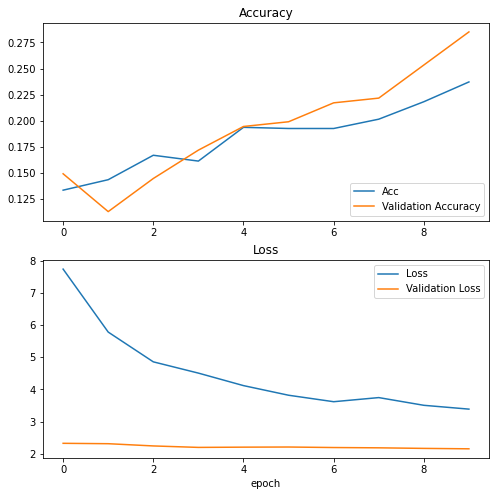

[I 2022-06-21 02:58:57,836] Trial 23 finished with value: 0.3163265287876129 and parameters: {'filters_l1': 35, 'kernel_size_l1': 3, 'strides_l1': 2, 'padding_l1': 'valid', 'activation_l1': 'elu', 'dropout_l1': 0.3650373650684013, 'filters_l2': 13, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'valid', 'activation_l2': 'linear', 'dropout_l2': 0.1966686408536528, 'filters_l3': 7, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'linear', 'dropout_l3': 0.3752253218850484, 'n_units_l': 125, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.27071555917772805, 'learning_rate': 3.570939923220723e-05, 'beta_1': 0.9660354295822869, 'beta_2': 0.9389540922476701, 'epsilon': 1.0158535172068224e-08}. Best is trial 14 with value: 0.6734693646430969.


Epoch 1/10
29/29 [==============================] - 18s 594ms/step - loss: 4.7420 - accuracy: 0.2394 - val_loss: 2.9229 - val_accuracy: 0.1403 - lr: 1.3109e-04
Epoch 2/10
29/29 [==============================] - 16s 561ms/step - loss: 2.6404 - accuracy: 0.3619 - val_loss: 2.5133 - val_accuracy: 0.2127 - lr: 1.3109e-04
Epoch 3/10
29/29 [==============================] - 16s 545ms/step - loss: 1.9963 - accuracy: 0.4599 - val_loss: 1.9858 - val_accuracy: 0.2624 - lr: 1.3109e-04
Epoch 4/10
29/29 [==============================] - 16s 584ms/step - loss: 1.6228 - accuracy: 0.5312 - val_loss: 2.4119 - val_accuracy: 0.2670 - lr: 1.3109e-04
Epoch 5/10
29/29 [==============================] - 16s 562ms/step - loss: 1.4542 - accuracy: 0.5468 - val_loss: 2.4086 - val_accuracy: 0.2579 - lr: 1.3109e-04
Epoch 6/10
29/29 [==============================] - 17s 585ms/step - loss: 1.2690 - accuracy: 0.6024 - val_loss: 2.3021 - val_accuracy: 0.2986 - lr: 1.3109e-04
Epoch 7/10
29/29 [======================

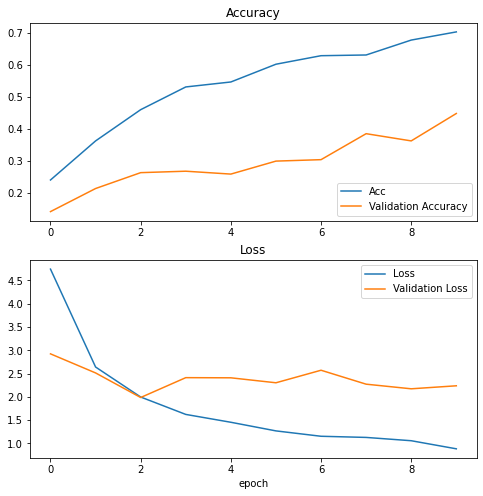

[I 2022-06-21 03:01:50,870] Trial 24 finished with value: 0.5 and parameters: {'filters_l1': 67, 'kernel_size_l1': 3, 'strides_l1': 2, 'padding_l1': 'valid', 'activation_l1': 'elu', 'dropout_l1': 0.16425357889178616, 'filters_l2': 28, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'valid', 'activation_l2': 'linear', 'dropout_l2': 0.13793041531633551, 'filters_l3': 24, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'linear', 'dropout_l3': 0.26480388323092097, 'n_units_l': 299, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.22512964149463435, 'learning_rate': 0.0001310949688463132, 'beta_1': 0.9604827681093937, 'beta_2': 0.9558398202099566, 'epsilon': 1.7284940576612983e-08}. Best is trial 14 with value: 0.6734693646430969.


Epoch 1/10
29/29 [==============================] - 17s 587ms/step - loss: 4.7654 - accuracy: 0.2639 - val_loss: 2.2703 - val_accuracy: 0.1855 - lr: 1.1843e-04
Epoch 2/10
29/29 [==============================] - 16s 563ms/step - loss: 2.3370 - accuracy: 0.4220 - val_loss: 2.4500 - val_accuracy: 0.2624 - lr: 1.1843e-04
Epoch 3/10
29/29 [==============================] - 16s 569ms/step - loss: 1.6117 - accuracy: 0.5334 - val_loss: 2.0317 - val_accuracy: 0.2896 - lr: 1.1843e-04
Epoch 4/10
29/29 [==============================] - 16s 557ms/step - loss: 1.4424 - accuracy: 0.5724 - val_loss: 1.8825 - val_accuracy: 0.3710 - lr: 1.1843e-04
Epoch 5/10
29/29 [==============================] - 16s 576ms/step - loss: 1.2079 - accuracy: 0.6347 - val_loss: 2.0214 - val_accuracy: 0.3982 - lr: 1.1843e-04
Epoch 6/10
29/29 [==============================] - 16s 569ms/step - loss: 0.9744 - accuracy: 0.6871 - val_loss: 1.8006 - val_accuracy: 0.4299 - lr: 1.1843e-04
Epoch 7/10
29/29 [======================

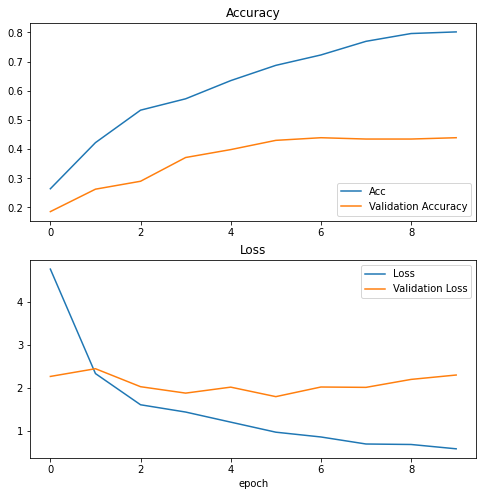

[I 2022-06-21 03:04:43,754] Trial 25 finished with value: 0.6020408272743225 and parameters: {'filters_l1': 68, 'kernel_size_l1': 3, 'strides_l1': 2, 'padding_l1': 'valid', 'activation_l1': 'elu', 'dropout_l1': 0.17194115942710442, 'filters_l2': 27, 'kernel_size_l2': 5, 'strides_l2': 1, 'padding_l2': 'valid', 'activation_l2': 'linear', 'dropout_l2': 0.13354094392828011, 'filters_l3': 61, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'linear', 'dropout_l3': 0.2963420200582783, 'n_units_l': 326, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.3149946200935236, 'learning_rate': 0.0001184328148814269, 'beta_1': 0.9458192525498657, 'beta_2': 0.9728800267388871, 'epsilon': 3.304023227071011e-08}. Best is trial 14 with value: 0.6734693646430969.


Epoch 1/10
29/29 [==============================] - 18s 582ms/step - loss: 4.2593 - accuracy: 0.1793 - val_loss: 2.1728 - val_accuracy: 0.0950 - lr: 2.7324e-05
Epoch 2/10
29/29 [==============================] - 16s 573ms/step - loss: 2.9987 - accuracy: 0.2216 - val_loss: 2.0149 - val_accuracy: 0.1946 - lr: 2.7324e-05
Epoch 3/10
29/29 [==============================] - 17s 577ms/step - loss: 2.5200 - accuracy: 0.2272 - val_loss: 1.9348 - val_accuracy: 0.2805 - lr: 2.7324e-05
Epoch 4/10
29/29 [==============================] - 17s 567ms/step - loss: 2.3912 - accuracy: 0.2339 - val_loss: 1.8616 - val_accuracy: 0.2896 - lr: 2.7324e-05
Epoch 5/10
29/29 [==============================] - 16s 567ms/step - loss: 2.1397 - accuracy: 0.3096 - val_loss: 1.8374 - val_accuracy: 0.3258 - lr: 2.7324e-05
Epoch 6/10
29/29 [==============================] - 17s 574ms/step - loss: 2.0087 - accuracy: 0.3318 - val_loss: 1.7827 - val_accuracy: 0.3575 - lr: 2.7324e-05
Epoch 7/10
29/29 [======================

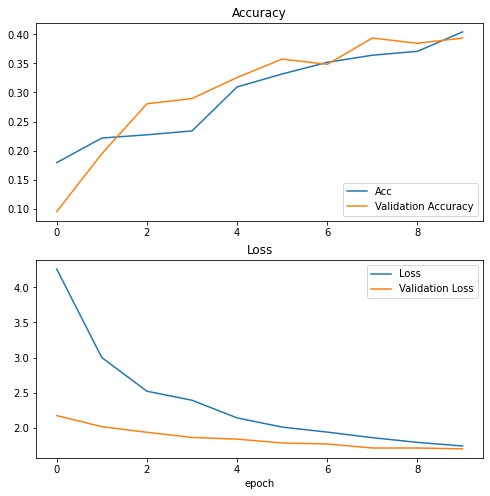

[I 2022-06-21 03:07:37,245] Trial 26 finished with value: 0.30612245202064514 and parameters: {'filters_l1': 166, 'kernel_size_l1': 5, 'strides_l1': 2, 'padding_l1': 'same', 'activation_l1': 'linear', 'dropout_l1': 0.14846046463289708, 'filters_l2': 26, 'kernel_size_l2': 5, 'strides_l2': 2, 'padding_l2': 'same', 'activation_l2': 'linear', 'dropout_l2': 0.2554638103547001, 'filters_l3': 59, 'kernel_size_l3': 3, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'relu', 'dropout_l3': 0.3632975609780867, 'n_units_l': 887, 'dense_activation_l3': 'relu', 'dense_dropout_l3': 0.31388811951456147, 'learning_rate': 2.7323609097990845e-05, 'beta_1': 0.9391927129478619, 'beta_2': 0.9764709290521141, 'epsilon': 3.2801253184214335e-08}. Best is trial 14 with value: 0.6734693646430969.


Epoch 1/10
29/29 [==============================] - 18s 580ms/step - loss: 9.9996 - accuracy: 0.2862 - val_loss: 4.8597 - val_accuracy: 0.1810 - lr: 1.1553e-04
Epoch 2/10
29/29 [==============================] - 16s 572ms/step - loss: 4.7767 - accuracy: 0.4165 - val_loss: 2.7933 - val_accuracy: 0.2851 - lr: 1.1553e-04
Epoch 3/10
29/29 [==============================] - 16s 561ms/step - loss: 3.7098 - accuracy: 0.4833 - val_loss: 4.6101 - val_accuracy: 0.2172 - lr: 1.1553e-04
Epoch 4/10
29/29 [==============================] - 16s 554ms/step - loss: 2.9116 - accuracy: 0.5156 - val_loss: 3.3779 - val_accuracy: 0.3303 - lr: 1.1553e-04
Epoch 5/10
29/29 [==============================] - 16s 573ms/step - loss: 2.1958 - accuracy: 0.5947 - val_loss: 4.0703 - val_accuracy: 0.2624 - lr: 1.1553e-04
Epoch 6/10
29/29 [==============================] - 16s 566ms/step - loss: 2.0122 - accuracy: 0.6247 - val_loss: 4.5455 - val_accuracy: 0.2941 - lr: 1.1553e-04
Epoch 7/10
29/29 [======================

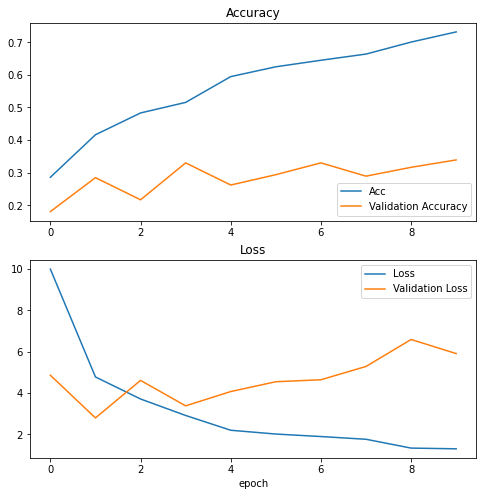

[I 2022-06-21 03:10:30,685] Trial 27 finished with value: 0.26530611515045166 and parameters: {'filters_l1': 89, 'kernel_size_l1': 3, 'strides_l1': 2, 'padding_l1': 'valid', 'activation_l1': 'elu', 'dropout_l1': 0.2638120819369807, 'filters_l2': 135, 'kernel_size_l2': 5, 'strides_l2': 1, 'padding_l2': 'valid', 'activation_l2': 'linear', 'dropout_l2': 0.18950958132178247, 'filters_l3': 109, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'linear', 'dropout_l3': 0.4366542021124817, 'n_units_l': 500, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.3997792179586601, 'learning_rate': 0.00011553180087089311, 'beta_1': 0.9480515160096978, 'beta_2': 0.9695823502222211, 'epsilon': 7.687332171887132e-08}. Best is trial 14 with value: 0.6734693646430969.


Epoch 1/10
29/29 [==============================] - 18s 581ms/step - loss: 3.6460 - accuracy: 0.3018 - val_loss: 2.9054 - val_accuracy: 0.1086 - lr: 2.3872e-04
Epoch 2/10
29/29 [==============================] - 17s 569ms/step - loss: 1.5327 - accuracy: 0.4733 - val_loss: 2.3656 - val_accuracy: 0.2353 - lr: 2.3872e-04
Epoch 3/10
29/29 [==============================] - 17s 581ms/step - loss: 1.1410 - accuracy: 0.5969 - val_loss: 2.2428 - val_accuracy: 0.2670 - lr: 2.3872e-04
Epoch 4/10
29/29 [==============================] - 17s 579ms/step - loss: 0.8616 - accuracy: 0.7138 - val_loss: 1.7106 - val_accuracy: 0.4163 - lr: 2.3872e-04
Epoch 5/10
29/29 [==============================] - 17s 581ms/step - loss: 0.7353 - accuracy: 0.7606 - val_loss: 1.8249 - val_accuracy: 0.3756 - lr: 2.3872e-04
Epoch 6/10
29/29 [==============================] - 17s 579ms/step - loss: 0.5880 - accuracy: 0.7996 - val_loss: 1.8868 - val_accuracy: 0.4344 - lr: 2.3872e-04
Epoch 7/10
29/29 [======================

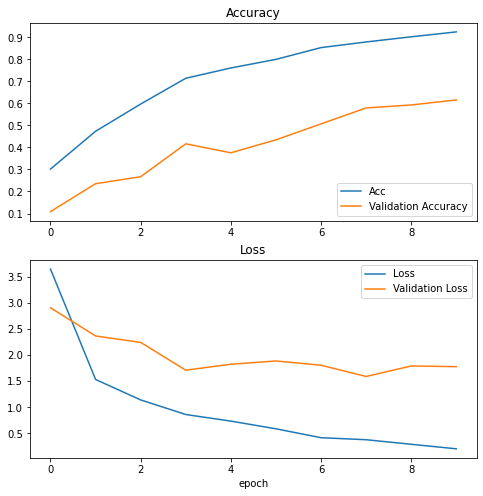

[I 2022-06-21 03:13:30,417] Trial 28 finished with value: 0.7448979616165161 and parameters: {'filters_l1': 52, 'kernel_size_l1': 5, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'relu', 'dropout_l1': 0.18957795139552325, 'filters_l2': 37, 'kernel_size_l2': 5, 'strides_l2': 1, 'padding_l2': 'valid', 'activation_l2': 'relu', 'dropout_l2': 0.43868703548017207, 'filters_l3': 51, 'kernel_size_l3': 7, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.29320975232503527, 'n_units_l': 214, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.2969070059069869, 'learning_rate': 0.0002387200383651383, 'beta_1': 0.9322805167989149, 'beta_2': 0.9897995723552471, 'epsilon': 4.038392286027813e-08}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 19s 597ms/step - loss: 2.8264 - accuracy: 0.2996 - val_loss: 2.0968 - val_accuracy: 0.2670 - lr: 6.3897e-05
Epoch 2/10
29/29 [==============================] - 17s 587ms/step - loss: 1.5447 - accuracy: 0.4911 - val_loss: 2.0286 - val_accuracy: 0.2624 - lr: 6.3897e-05
Epoch 3/10
29/29 [==============================] - 17s 578ms/step - loss: 1.1221 - accuracy: 0.6024 - val_loss: 1.8177 - val_accuracy: 0.3439 - lr: 6.3897e-05
Epoch 4/10
29/29 [==============================] - 17s 568ms/step - loss: 0.8658 - accuracy: 0.6960 - val_loss: 1.7749 - val_accuracy: 0.3756 - lr: 6.3897e-05
Epoch 5/10
29/29 [==============================] - 17s 567ms/step - loss: 0.6777 - accuracy: 0.7550 - val_loss: 1.6201 - val_accuracy: 0.4072 - lr: 6.3897e-05
Epoch 6/10
29/29 [==============================] - 17s 572ms/step - loss: 0.5478 - accuracy: 0.8151 - val_loss: 1.6270 - val_accuracy: 0.4389 - lr: 6.3897e-05
Epoch 7/10
29/29 [======================

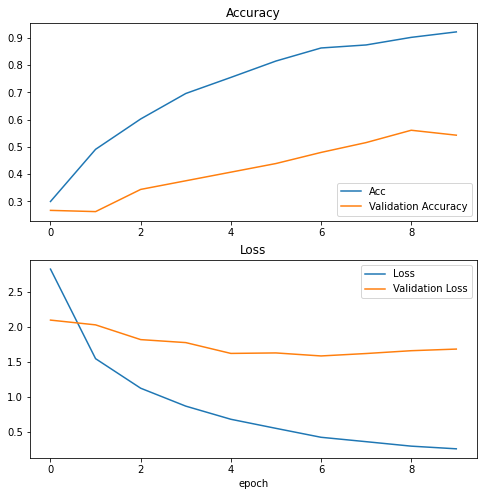

[I 2022-06-21 03:16:30,224] Trial 29 finished with value: 0.6428571343421936 and parameters: {'filters_l1': 59, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'relu', 'dropout_l1': 0.21308356338085238, 'filters_l2': 38, 'kernel_size_l2': 5, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.39785213312425943, 'filters_l3': 40, 'kernel_size_l3': 7, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.221532273185253, 'n_units_l': 342, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.29562990679552925, 'learning_rate': 6.389676127069453e-05, 'beta_1': 0.9140414435957888, 'beta_2': 0.9886040211969555, 'epsilon': 1.474682037238816e-07}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 19s 586ms/step - loss: 2.9262 - accuracy: 0.2194 - val_loss: 2.1384 - val_accuracy: 0.2308 - lr: 5.5482e-05
Epoch 2/10
29/29 [==============================] - 17s 557ms/step - loss: 1.6492 - accuracy: 0.4332 - val_loss: 1.9469 - val_accuracy: 0.2579 - lr: 5.5482e-05
Epoch 3/10
29/29 [==============================] - 17s 576ms/step - loss: 1.4631 - accuracy: 0.5045 - val_loss: 1.7995 - val_accuracy: 0.2986 - lr: 5.5482e-05
Epoch 4/10
29/29 [==============================] - 17s 577ms/step - loss: 1.2150 - accuracy: 0.5679 - val_loss: 1.7124 - val_accuracy: 0.3801 - lr: 5.5482e-05
Epoch 5/10
29/29 [==============================] - 17s 590ms/step - loss: 0.9873 - accuracy: 0.6637 - val_loss: 1.6033 - val_accuracy: 0.4253 - lr: 5.5482e-05
Epoch 6/10
29/29 [==============================] - 17s 579ms/step - loss: 0.8770 - accuracy: 0.6993 - val_loss: 1.4497 - val_accuracy: 0.4796 - lr: 5.5482e-05
Epoch 7/10
29/29 [======================

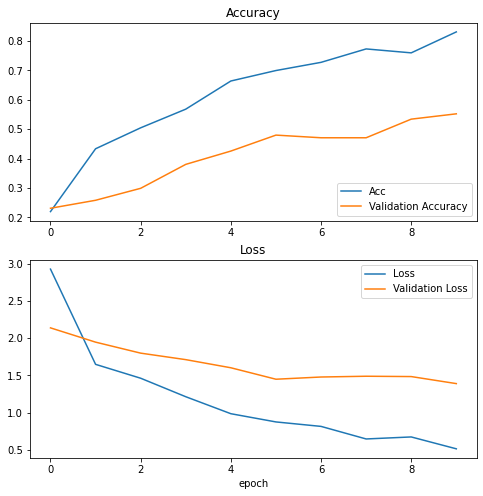

[I 2022-06-21 03:19:32,198] Trial 30 finished with value: 0.6428571343421936 and parameters: {'filters_l1': 157, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'relu', 'dropout_l1': 0.219309106316118, 'filters_l2': 38, 'kernel_size_l2': 5, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.46187431287827685, 'filters_l3': 41, 'kernel_size_l3': 7, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.11500058108302066, 'n_units_l': 125, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.38627936135768437, 'learning_rate': 5.5481868589545144e-05, 'beta_1': 0.9014287947915489, 'beta_2': 0.9864664668801465, 'epsilon': 2.185172932010797e-07}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 19s 597ms/step - loss: 2.9925 - accuracy: 0.2138 - val_loss: 2.2558 - val_accuracy: 0.1855 - lr: 5.7765e-05
Epoch 2/10
29/29 [==============================] - 17s 563ms/step - loss: 1.6804 - accuracy: 0.3976 - val_loss: 2.0629 - val_accuracy: 0.2262 - lr: 5.7765e-05
Epoch 3/10
29/29 [==============================] - 17s 574ms/step - loss: 1.3807 - accuracy: 0.5100 - val_loss: 1.9223 - val_accuracy: 0.2172 - lr: 5.7765e-05
Epoch 4/10
29/29 [==============================] - 17s 595ms/step - loss: 1.1984 - accuracy: 0.5702 - val_loss: 1.6716 - val_accuracy: 0.3891 - lr: 5.7765e-05
Epoch 5/10
29/29 [==============================] - 17s 578ms/step - loss: 1.0788 - accuracy: 0.6392 - val_loss: 1.7173 - val_accuracy: 0.3484 - lr: 5.7765e-05
Epoch 6/10
29/29 [==============================] - 17s 596ms/step - loss: 0.9309 - accuracy: 0.6693 - val_loss: 1.5121 - val_accuracy: 0.4751 - lr: 5.7765e-05
Epoch 7/10
29/29 [======================

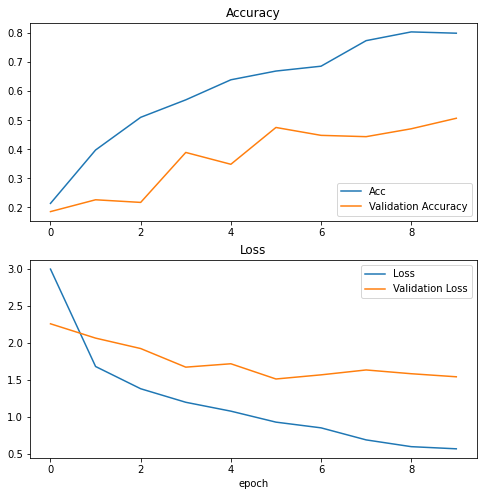

[I 2022-06-21 03:22:31,029] Trial 31 finished with value: 0.5408163070678711 and parameters: {'filters_l1': 149, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'relu', 'dropout_l1': 0.2052062862995191, 'filters_l2': 40, 'kernel_size_l2': 5, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.4912257454222326, 'filters_l3': 44, 'kernel_size_l3': 7, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.14838454685098013, 'n_units_l': 134, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.3863601521238885, 'learning_rate': 5.776497215498412e-05, 'beta_1': 0.9025007352247766, 'beta_2': 0.9903790853343236, 'epsilon': 1.83470384453643e-07}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 19s 593ms/step - loss: 3.3263 - accuracy: 0.1793 - val_loss: 2.1575 - val_accuracy: 0.1629 - lr: 1.3535e-05
Epoch 2/10
29/29 [==============================] - 17s 586ms/step - loss: 2.2835 - accuracy: 0.2739 - val_loss: 2.0223 - val_accuracy: 0.2262 - lr: 1.3535e-05
Epoch 3/10
29/29 [==============================] - 17s 588ms/step - loss: 2.0273 - accuracy: 0.3207 - val_loss: 1.8429 - val_accuracy: 0.3213 - lr: 1.3535e-05
Epoch 4/10
29/29 [==============================] - 17s 579ms/step - loss: 1.8446 - accuracy: 0.3563 - val_loss: 1.7654 - val_accuracy: 0.3575 - lr: 1.3535e-05
Epoch 5/10
29/29 [==============================] - 17s 585ms/step - loss: 1.6602 - accuracy: 0.4265 - val_loss: 1.6563 - val_accuracy: 0.4072 - lr: 1.3535e-05
Epoch 6/10
29/29 [==============================] - 17s 593ms/step - loss: 1.5604 - accuracy: 0.4376 - val_loss: 1.6541 - val_accuracy: 0.4027 - lr: 1.3535e-05
Epoch 7/10
29/29 [======================

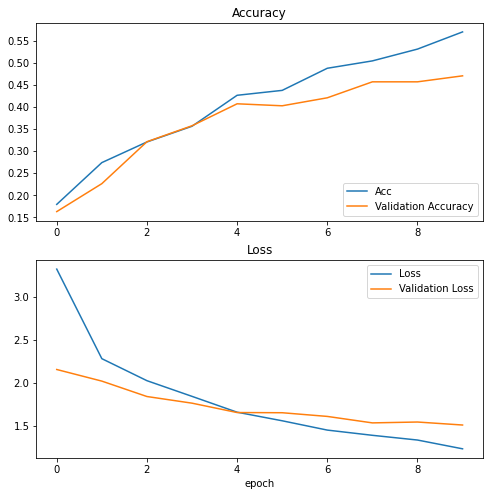

[I 2022-06-21 03:25:29,676] Trial 32 finished with value: 0.3877550959587097 and parameters: {'filters_l1': 180, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'relu', 'dropout_l1': 0.13237760350744762, 'filters_l2': 55, 'kernel_size_l2': 5, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.4266321041434545, 'filters_l3': 38, 'kernel_size_l3': 7, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.14548085738456873, 'n_units_l': 89, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.2976093553203694, 'learning_rate': 1.3535176458915678e-05, 'beta_1': 0.9139196128916893, 'beta_2': 0.9845119988432364, 'epsilon': 1.6009290406100604e-07}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 594ms/step - loss: 2.9432 - accuracy: 0.3196 - val_loss: 2.6216 - val_accuracy: 0.2172 - lr: 2.1236e-04
Epoch 2/10
29/29 [==============================] - 17s 583ms/step - loss: 1.2999 - accuracy: 0.5523 - val_loss: 1.8980 - val_accuracy: 0.3303 - lr: 2.1236e-04
Epoch 3/10
29/29 [==============================] - 17s 567ms/step - loss: 0.9873 - accuracy: 0.6581 - val_loss: 1.6685 - val_accuracy: 0.4163 - lr: 2.1236e-04
Epoch 4/10
29/29 [==============================] - 17s 587ms/step - loss: 0.7358 - accuracy: 0.7472 - val_loss: 1.8960 - val_accuracy: 0.3756 - lr: 2.1236e-04
Epoch 5/10
29/29 [==============================] - 17s 597ms/step - loss: 0.5128 - accuracy: 0.8263 - val_loss: 1.6791 - val_accuracy: 0.4299 - lr: 2.1236e-04
Epoch 6/10
29/29 [==============================] - 17s 571ms/step - loss: 0.3960 - accuracy: 0.8675 - val_loss: 2.0807 - val_accuracy: 0.4163 - lr: 2.1236e-04
Epoch 7/10
29/29 [======================

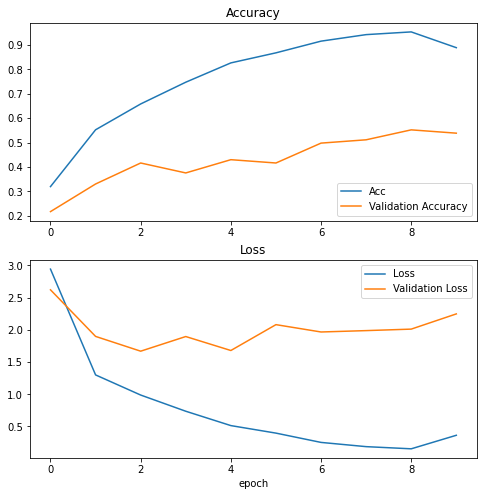

[I 2022-06-21 03:28:25,714] Trial 33 finished with value: 0.6326530575752258 and parameters: {'filters_l1': 120, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'relu', 'dropout_l1': 0.2179897110956458, 'filters_l2': 35, 'kernel_size_l2': 5, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.40400745671347776, 'filters_l3': 31, 'kernel_size_l3': 7, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.22098282400420216, 'n_units_l': 231, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.2544453535673155, 'learning_rate': 0.0002123599602288453, 'beta_1': 0.9017263555711278, 'beta_2': 0.9976179748561093, 'epsilon': 1.335583425437389e-07}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 19s 599ms/step - loss: 6.5032 - accuracy: 0.1114 - val_loss: 2.1619 - val_accuracy: 0.1584 - lr: 2.0965e-05
Epoch 2/10
29/29 [==============================] - 17s 575ms/step - loss: 4.2592 - accuracy: 0.1470 - val_loss: 2.2013 - val_accuracy: 0.1765 - lr: 2.0965e-05
Epoch 3/10
29/29 [==============================] - 16s 566ms/step - loss: 3.1923 - accuracy: 0.1782 - val_loss: 2.1737 - val_accuracy: 0.1765 - lr: 2.0965e-05
Epoch 4/10
29/29 [==============================] - 17s 581ms/step - loss: 2.9337 - accuracy: 0.2016 - val_loss: 2.1435 - val_accuracy: 0.2127 - lr: 2.0965e-05
Epoch 5/10
29/29 [==============================] - 17s 576ms/step - loss: 2.7950 - accuracy: 0.2160 - val_loss: 2.1550 - val_accuracy: 0.2036 - lr: 2.0965e-05
Epoch 6/10
29/29 [==============================] - 17s 576ms/step - loss: 2.4984 - accuracy: 0.2405 - val_loss: 2.0420 - val_accuracy: 0.2398 - lr: 2.0965e-05
Epoch 7/10
29/29 [======================

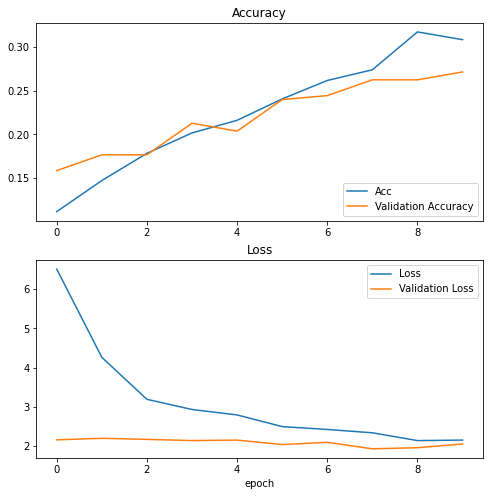

[I 2022-06-21 03:31:21,260] Trial 34 finished with value: 0.23469388484954834 and parameters: {'filters_l1': 50, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'relu', 'dropout_l1': 0.49252171068087713, 'filters_l2': 60, 'kernel_size_l2': 5, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.49977505062420097, 'filters_l3': 24, 'kernel_size_l3': 7, 'strides_l3': 2, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.10560031767653608, 'n_units_l': 408, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.45802295358769585, 'learning_rate': 2.096522373918521e-05, 'beta_1': 0.9107941803493608, 'beta_2': 0.9868990971635904, 'epsilon': 2.4783061440049874e-07}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 19s 605ms/step - loss: 2.7686 - accuracy: 0.2082 - val_loss: 2.0030 - val_accuracy: 0.2398 - lr: 6.9353e-05
Epoch 2/10
29/29 [==============================] - 17s 581ms/step - loss: 2.0495 - accuracy: 0.3252 - val_loss: 2.0451 - val_accuracy: 0.2760 - lr: 6.9353e-05
Epoch 3/10
29/29 [==============================] - 17s 586ms/step - loss: 1.8143 - accuracy: 0.3753 - val_loss: 1.7773 - val_accuracy: 0.3348 - lr: 6.9353e-05
Epoch 4/10
29/29 [==============================] - 17s 579ms/step - loss: 1.6031 - accuracy: 0.4165 - val_loss: 1.6771 - val_accuracy: 0.3801 - lr: 6.9353e-05
Epoch 5/10
29/29 [==============================] - 17s 591ms/step - loss: 1.4928 - accuracy: 0.4566 - val_loss: 1.6172 - val_accuracy: 0.4163 - lr: 6.9353e-05
Epoch 6/10
29/29 [==============================] - 17s 579ms/step - loss: 1.3587 - accuracy: 0.5033 - val_loss: 1.5043 - val_accuracy: 0.4932 - lr: 6.9353e-05
Epoch 7/10
29/29 [======================

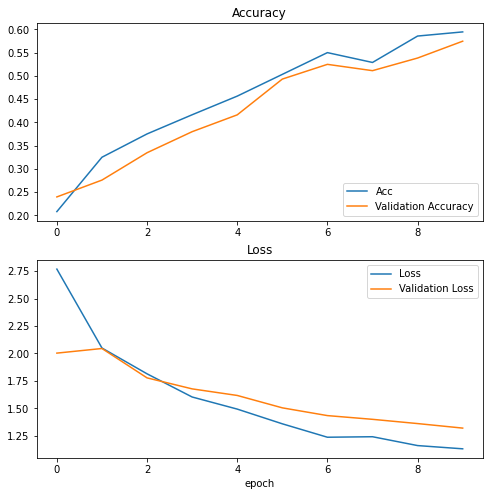

[I 2022-06-21 03:34:17,500] Trial 35 finished with value: 0.5408163070678711 and parameters: {'filters_l1': 101, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'relu', 'dropout_l1': 0.24322559062852175, 'filters_l2': 111, 'kernel_size_l2': 5, 'strides_l2': 2, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.45695925424873846, 'filters_l3': 36, 'kernel_size_l3': 7, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.16972692786455762, 'n_units_l': 149, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.34520533729676384, 'learning_rate': 6.935335965458306e-05, 'beta_1': 0.9185313782134704, 'beta_2': 0.9824708145327231, 'epsilon': 9.615048609964547e-07}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 579ms/step - loss: 2.8611 - accuracy: 0.3151 - val_loss: 2.2877 - val_accuracy: 0.1674 - lr: 2.7064e-04
Epoch 2/10
29/29 [==============================] - 17s 571ms/step - loss: 1.6390 - accuracy: 0.4733 - val_loss: 1.8895 - val_accuracy: 0.3484 - lr: 2.7064e-04
Epoch 3/10
29/29 [==============================] - 17s 564ms/step - loss: 1.2274 - accuracy: 0.5857 - val_loss: 2.0097 - val_accuracy: 0.3213 - lr: 2.7064e-04
Epoch 4/10
29/29 [==============================] - 17s 582ms/step - loss: 0.9776 - accuracy: 0.6503 - val_loss: 1.5876 - val_accuracy: 0.4253 - lr: 2.7064e-04
Epoch 5/10
29/29 [==============================] - 17s 576ms/step - loss: 0.8041 - accuracy: 0.7127 - val_loss: 1.4478 - val_accuracy: 0.4842 - lr: 2.7064e-04
Epoch 6/10
29/29 [==============================] - 17s 560ms/step - loss: 0.6537 - accuracy: 0.7706 - val_loss: 1.4362 - val_accuracy: 0.5068 - lr: 2.7064e-04
Epoch 7/10
29/29 [======================

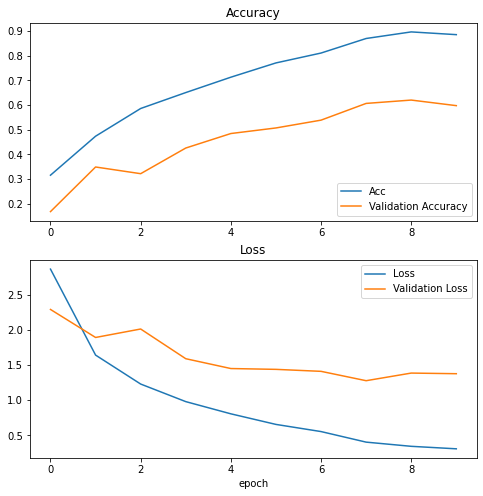

[I 2022-06-21 03:37:11,848] Trial 36 finished with value: 0.6938775777816772 and parameters: {'filters_l1': 32, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'relu', 'dropout_l1': 0.16517599271820121, 'filters_l2': 45, 'kernel_size_l2': 5, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.38536832115281994, 'filters_l3': 56, 'kernel_size_l3': 7, 'strides_l3': 2, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.31638507847663816, 'n_units_l': 278, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.33104191313802767, 'learning_rate': 0.00027063706494386247, 'beta_1': 0.9291829980731177, 'beta_2': 0.9663232588969709, 'epsilon': 6.08898564388095e-07}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 591ms/step - loss: 4.7484 - accuracy: 0.2617 - val_loss: 2.0922 - val_accuracy: 0.2986 - lr: 2.9425e-04
Epoch 2/10
29/29 [==============================] - 17s 568ms/step - loss: 1.6096 - accuracy: 0.4644 - val_loss: 1.7715 - val_accuracy: 0.3213 - lr: 2.9425e-04
Epoch 3/10
29/29 [==============================] - 17s 583ms/step - loss: 1.1696 - accuracy: 0.6013 - val_loss: 1.8122 - val_accuracy: 0.3213 - lr: 2.9425e-04
Epoch 4/10
29/29 [==============================] - 17s 587ms/step - loss: 1.0576 - accuracy: 0.6492 - val_loss: 1.6338 - val_accuracy: 0.4208 - lr: 2.9425e-04
Epoch 5/10
29/29 [==============================] - 17s 553ms/step - loss: 0.8530 - accuracy: 0.7105 - val_loss: 1.5500 - val_accuracy: 0.4253 - lr: 2.9425e-04
Epoch 6/10
29/29 [==============================] - 17s 576ms/step - loss: 0.7151 - accuracy: 0.7439 - val_loss: 1.5604 - val_accuracy: 0.4796 - lr: 2.9425e-04
Epoch 7/10
29/29 [======================

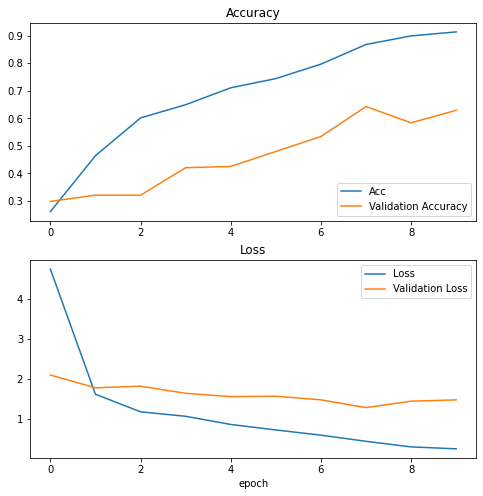

[I 2022-06-21 03:40:06,213] Trial 37 finished with value: 0.6530612111091614 and parameters: {'filters_l1': 32, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'relu', 'dropout_l1': 0.16691154234820926, 'filters_l2': 49, 'kernel_size_l2': 5, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.3889307676903682, 'filters_l3': 59, 'kernel_size_l3': 7, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'elu', 'dropout_l3': 0.3158583404774777, 'n_units_l': 676, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.32552308983002654, 'learning_rate': 0.00029425336343614486, 'beta_1': 0.9313042573721652, 'beta_2': 0.9708605818109659, 'epsilon': 4.880810669563182e-07}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 17s 571ms/step - loss: 3.6500 - accuracy: 0.2695 - val_loss: 2.1203 - val_accuracy: 0.3122 - lr: 3.6934e-04
Epoch 2/10
29/29 [==============================] - 16s 571ms/step - loss: 1.8009 - accuracy: 0.4532 - val_loss: 2.1644 - val_accuracy: 0.2851 - lr: 3.6934e-04
Epoch 3/10
29/29 [==============================] - 17s 565ms/step - loss: 1.4838 - accuracy: 0.4955 - val_loss: 1.8561 - val_accuracy: 0.3348 - lr: 3.6934e-04
Epoch 4/10
29/29 [==============================] - 17s 564ms/step - loss: 1.2776 - accuracy: 0.5857 - val_loss: 1.5930 - val_accuracy: 0.4615 - lr: 3.6934e-04
Epoch 5/10
29/29 [==============================] - 17s 567ms/step - loss: 1.0535 - accuracy: 0.6370 - val_loss: 1.5751 - val_accuracy: 0.4389 - lr: 3.6934e-04
Epoch 6/10
29/29 [==============================] - 17s 569ms/step - loss: 0.9784 - accuracy: 0.6481 - val_loss: 1.4118 - val_accuracy: 0.5294 - lr: 3.6934e-04
Epoch 7/10
29/29 [======================

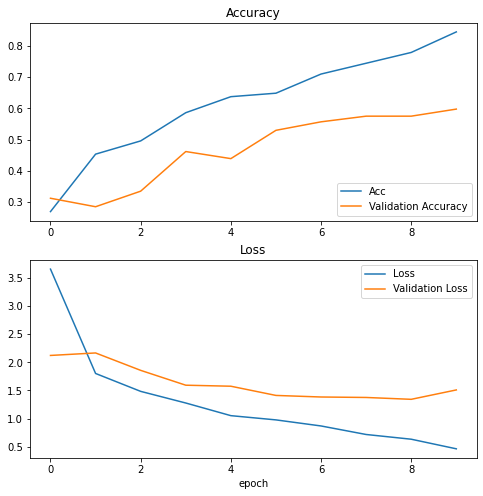

[I 2022-06-21 03:43:05,218] Trial 38 finished with value: 0.704081654548645 and parameters: {'filters_l1': 17, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'relu', 'dropout_l1': 0.10462042925238839, 'filters_l2': 69, 'kernel_size_l2': 5, 'strides_l2': 2, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.29495229086132047, 'filters_l3': 89, 'kernel_size_l3': 7, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'elu', 'dropout_l3': 0.3165197629955261, 'n_units_l': 739, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.3230920620246842, 'learning_rate': 0.0003693374994008041, 'beta_1': 0.9313794182168473, 'beta_2': 0.9679079752918018, 'epsilon': 6.77956738014206e-07}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 587ms/step - loss: 12.8685 - accuracy: 0.1904 - val_loss: 2.0493 - val_accuracy: 0.1991 - lr: 0.0014
Epoch 2/10
29/29 [==============================] - 17s 575ms/step - loss: 2.0932 - accuracy: 0.2272 - val_loss: 2.0176 - val_accuracy: 0.1719 - lr: 0.0014
Epoch 3/10
29/29 [==============================] - 17s 571ms/step - loss: 1.8356 - accuracy: 0.3118 - val_loss: 2.2284 - val_accuracy: 0.1719 - lr: 0.0014
Epoch 4/10
29/29 [==============================] - 17s 581ms/step - loss: 1.8324 - accuracy: 0.3085 - val_loss: 2.1107 - val_accuracy: 0.2081 - lr: 0.0014
Epoch 5/10
29/29 [==============================] - 17s 577ms/step - loss: 1.6462 - accuracy: 0.3842 - val_loss: 2.1024 - val_accuracy: 0.1991 - lr: 0.0014
Epoch 6/10
29/29 [==============================] - 17s 577ms/step - loss: 1.5345 - accuracy: 0.4543 - val_loss: 1.7376 - val_accuracy: 0.3620 - lr: 0.0014
Epoch 7/10
29/29 [==============================] - 17s 583ms/s

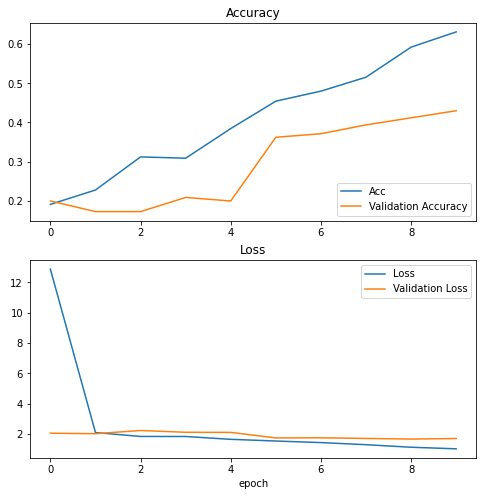

[I 2022-06-21 03:45:59,897] Trial 39 finished with value: 0.36734694242477417 and parameters: {'filters_l1': 18, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'relu', 'dropout_l1': 0.10005027736870352, 'filters_l2': 70, 'kernel_size_l2': 5, 'strides_l2': 2, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.3039480419699066, 'filters_l3': 171, 'kernel_size_l3': 7, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'elu', 'dropout_l3': 0.31671193966360356, 'n_units_l': 706, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.35832953144792334, 'learning_rate': 0.0014265201609884536, 'beta_1': 0.9314178526319785, 'beta_2': 0.9659791113468122, 'epsilon': 6.027218371420455e-07}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 593ms/step - loss: 3.0729 - accuracy: 0.3252 - val_loss: 4.5410 - val_accuracy: 0.2217 - lr: 4.6767e-04
Epoch 2/10
29/29 [==============================] - 17s 577ms/step - loss: 1.6684 - accuracy: 0.4655 - val_loss: 3.7463 - val_accuracy: 0.1900 - lr: 4.6767e-04
Epoch 3/10
29/29 [==============================] - 17s 573ms/step - loss: 1.4354 - accuracy: 0.5267 - val_loss: 3.7529 - val_accuracy: 0.2805 - lr: 4.6767e-04
Epoch 4/10
29/29 [==============================] - 17s 585ms/step - loss: 1.4629 - accuracy: 0.5579 - val_loss: 2.7594 - val_accuracy: 0.3303 - lr: 4.6767e-04
Epoch 5/10
29/29 [==============================] - 17s 577ms/step - loss: 1.1764 - accuracy: 0.6102 - val_loss: 2.3023 - val_accuracy: 0.4480 - lr: 4.6767e-04
Epoch 6/10
29/29 [==============================] - 17s 581ms/step - loss: 1.1491 - accuracy: 0.6403 - val_loss: 2.5538 - val_accuracy: 0.4570 - lr: 4.6767e-04
Epoch 7/10
29/29 [======================

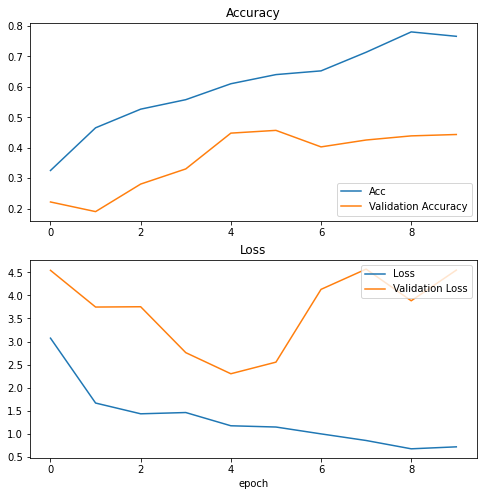

[I 2022-06-21 03:48:54,828] Trial 40 finished with value: 0.4897959232330322 and parameters: {'filters_l1': 22, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'relu', 'dropout_l1': 0.13237132717134792, 'filters_l2': 109, 'kernel_size_l2': 5, 'strides_l2': 2, 'padding_l2': 'same', 'activation_l2': 'elu', 'dropout_l2': 0.4231303421187977, 'filters_l3': 90, 'kernel_size_l3': 7, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'elu', 'dropout_l3': 0.27457643989447583, 'n_units_l': 246, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.33499323501214134, 'learning_rate': 0.00046767259951173526, 'beta_1': 0.9253562802827757, 'beta_2': 0.9585509801597311, 'epsilon': 6.708728320278263e-07}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 17s 578ms/step - loss: 2.9397 - accuracy: 0.2628 - val_loss: 2.3441 - val_accuracy: 0.1493 - lr: 2.5662e-04
Epoch 2/10
29/29 [==============================] - 16s 576ms/step - loss: 1.7203 - accuracy: 0.4276 - val_loss: 1.8648 - val_accuracy: 0.3213 - lr: 2.5662e-04
Epoch 3/10
29/29 [==============================] - 16s 563ms/step - loss: 1.4501 - accuracy: 0.5022 - val_loss: 1.6969 - val_accuracy: 0.4208 - lr: 2.5662e-04
Epoch 4/10
29/29 [==============================] - 16s 571ms/step - loss: 1.2148 - accuracy: 0.5724 - val_loss: 1.6858 - val_accuracy: 0.4389 - lr: 2.5662e-04
Epoch 5/10
29/29 [==============================] - 17s 549ms/step - loss: 1.1672 - accuracy: 0.5947 - val_loss: 1.6101 - val_accuracy: 0.5023 - lr: 2.5662e-04
Epoch 6/10
29/29 [==============================] - 17s 577ms/step - loss: 0.9867 - accuracy: 0.6503 - val_loss: 1.4670 - val_accuracy: 0.5204 - lr: 2.5662e-04
Epoch 7/10
29/29 [======================

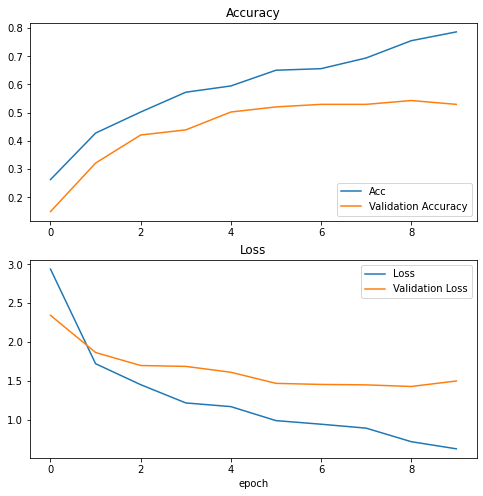

[I 2022-06-21 03:51:47,880] Trial 41 finished with value: 0.5714285969734192 and parameters: {'filters_l1': 14, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'relu', 'dropout_l1': 0.15919760516334416, 'filters_l2': 52, 'kernel_size_l2': 5, 'strides_l2': 2, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.3761215572843988, 'filters_l3': 55, 'kernel_size_l3': 7, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'elu', 'dropout_l3': 0.3154655699097248, 'n_units_l': 636, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.3202421047850678, 'learning_rate': 0.000256620747659009, 'beta_1': 0.9345122009434575, 'beta_2': 0.9687017286181124, 'epsilon': 6.804699383284408e-07}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 601ms/step - loss: 2.7389 - accuracy: 0.3140 - val_loss: 2.7053 - val_accuracy: 0.2127 - lr: 3.2702e-04
Epoch 2/10
29/29 [==============================] - 17s 581ms/step - loss: 1.4614 - accuracy: 0.5078 - val_loss: 2.0072 - val_accuracy: 0.3213 - lr: 3.2702e-04
Epoch 3/10
29/29 [==============================] - 17s 580ms/step - loss: 1.2605 - accuracy: 0.5657 - val_loss: 1.7485 - val_accuracy: 0.3484 - lr: 3.2702e-04
Epoch 4/10
29/29 [==============================] - 17s 565ms/step - loss: 1.0142 - accuracy: 0.6592 - val_loss: 1.6414 - val_accuracy: 0.4389 - lr: 3.2702e-04
Epoch 5/10
29/29 [==============================] - 17s 573ms/step - loss: 0.9170 - accuracy: 0.6882 - val_loss: 1.4557 - val_accuracy: 0.4796 - lr: 3.2702e-04
Epoch 6/10
29/29 [==============================] - 17s 560ms/step - loss: 0.8250 - accuracy: 0.7049 - val_loss: 1.3812 - val_accuracy: 0.5339 - lr: 3.2702e-04
Epoch 7/10
29/29 [======================

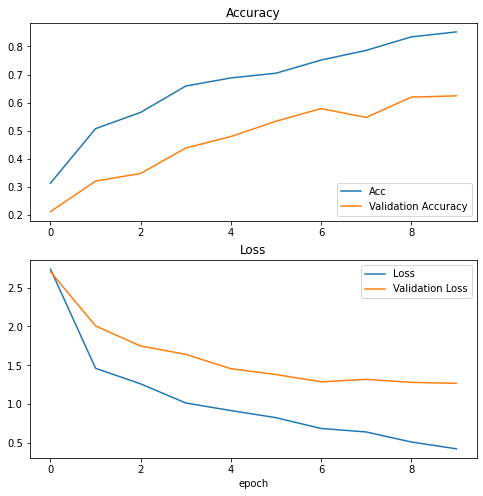

[I 2022-06-21 03:54:43,532] Trial 42 finished with value: 0.7448979616165161 and parameters: {'filters_l1': 32, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'relu', 'dropout_l1': 0.11820473774012004, 'filters_l2': 44, 'kernel_size_l2': 5, 'strides_l2': 2, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.35559961512129196, 'filters_l3': 69, 'kernel_size_l3': 7, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'elu', 'dropout_l3': 0.32233854658190425, 'n_units_l': 992, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.28711155191864124, 'learning_rate': 0.0003270183145226732, 'beta_1': 0.9255923407810219, 'beta_2': 0.960893924277906, 'epsilon': 4.146543803034796e-07}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 584ms/step - loss: 3.6952 - accuracy: 0.2673 - val_loss: 2.2567 - val_accuracy: 0.2805 - lr: 5.6048e-04
Epoch 2/10
29/29 [==============================] - 16s 570ms/step - loss: 1.9659 - accuracy: 0.4120 - val_loss: 1.6953 - val_accuracy: 0.3982 - lr: 5.6048e-04
Epoch 3/10
29/29 [==============================] - 17s 572ms/step - loss: 1.2484 - accuracy: 0.5702 - val_loss: 1.5803 - val_accuracy: 0.4434 - lr: 5.6048e-04
Epoch 4/10
29/29 [==============================] - 17s 573ms/step - loss: 0.9748 - accuracy: 0.6492 - val_loss: 1.4718 - val_accuracy: 0.4434 - lr: 5.6048e-04
Epoch 5/10
29/29 [==============================] - 16s 566ms/step - loss: 0.8889 - accuracy: 0.7038 - val_loss: 1.5727 - val_accuracy: 0.4480 - lr: 5.6048e-04
Epoch 6/10
29/29 [==============================] - 16s 546ms/step - loss: 0.7617 - accuracy: 0.7339 - val_loss: 1.6074 - val_accuracy: 0.4072 - lr: 5.6048e-04
Epoch 7/10
29/29 [======================

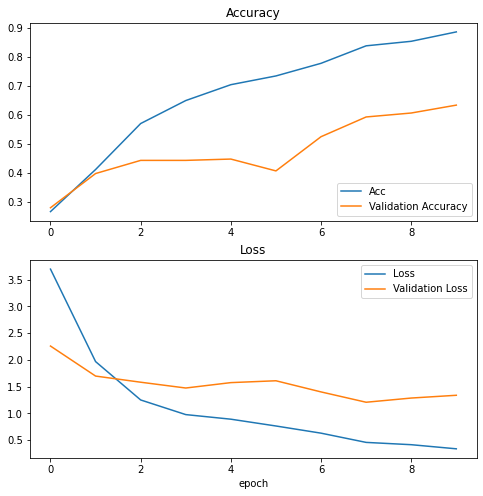

[I 2022-06-21 03:57:40,944] Trial 43 finished with value: 0.6938775777816772 and parameters: {'filters_l1': 9, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'relu', 'dropout_l1': 0.1191156676865816, 'filters_l2': 69, 'kernel_size_l2': 5, 'strides_l2': 2, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.3514876220358794, 'filters_l3': 79, 'kernel_size_l3': 7, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'elu', 'dropout_l3': 0.33307098845478633, 'n_units_l': 1012, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.27972340612688357, 'learning_rate': 0.0005604816220612655, 'beta_1': 0.923277675191161, 'beta_2': 0.9611482552222648, 'epsilon': 3.095790512839343e-07}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 585ms/step - loss: 9.1047 - accuracy: 0.1437 - val_loss: 2.5242 - val_accuracy: 0.2353 - lr: 0.0012
Epoch 2/10
29/29 [==============================] - 17s 573ms/step - loss: 2.4498 - accuracy: 0.1860 - val_loss: 2.2793 - val_accuracy: 0.1991 - lr: 0.0012
Epoch 3/10
29/29 [==============================] - 17s 574ms/step - loss: 2.1875 - accuracy: 0.2628 - val_loss: 1.9406 - val_accuracy: 0.2489 - lr: 0.0012
Epoch 4/10
29/29 [==============================] - 17s 575ms/step - loss: 1.9862 - accuracy: 0.3073 - val_loss: 2.4387 - val_accuracy: 0.2127 - lr: 0.0012
Epoch 5/10
29/29 [==============================] - 16s 572ms/step - loss: 1.7933 - accuracy: 0.3998 - val_loss: 1.9585 - val_accuracy: 0.3122 - lr: 0.0012
Epoch 6/10
29/29 [==============================] - 16s 563ms/step - loss: 1.7671 - accuracy: 0.4076 - val_loss: 1.6621 - val_accuracy: 0.4072 - lr: 0.0012
Epoch 7/10
29/29 [==============================] - 17s 561ms/st

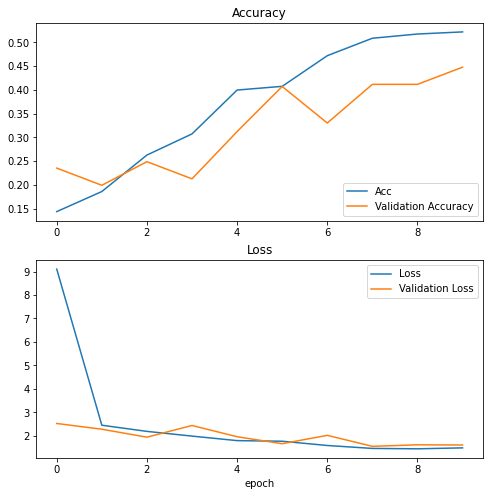

[I 2022-06-21 04:00:35,380] Trial 44 finished with value: 0.3877550959587097 and parameters: {'filters_l1': 9, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'relu', 'dropout_l1': 0.11529470936594652, 'filters_l2': 93, 'kernel_size_l2': 5, 'strides_l2': 2, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.34982238232362334, 'filters_l3': 75, 'kernel_size_l3': 7, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'elu', 'dropout_l3': 0.3045058414889207, 'n_units_l': 927, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.28167217112883475, 'learning_rate': 0.0012245571652808205, 'beta_1': 0.925859117143058, 'beta_2': 0.9594429759970451, 'epsilon': 3.3645315359606553e-07}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 594ms/step - loss: 19.2414 - accuracy: 0.1759 - val_loss: 2.0788 - val_accuracy: 0.2036 - lr: 0.0036
Epoch 2/10
29/29 [==============================] - 17s 579ms/step - loss: 2.0518 - accuracy: 0.1927 - val_loss: 1.9797 - val_accuracy: 0.1765 - lr: 0.0036
Epoch 3/10
29/29 [==============================] - 16s 581ms/step - loss: 1.9959 - accuracy: 0.2249 - val_loss: 2.0381 - val_accuracy: 0.1991 - lr: 0.0036
Epoch 4/10
29/29 [==============================] - 17s 574ms/step - loss: 1.9456 - accuracy: 0.2550 - val_loss: 2.0643 - val_accuracy: 0.1584 - lr: 0.0036
Epoch 5/10
29/29 [==============================] - 17s 583ms/step - loss: 1.9664 - accuracy: 0.2539 - val_loss: 2.0953 - val_accuracy: 0.1810 - lr: 0.0036
Epoch 6/10
29/29 [==============================] - 16s 577ms/step - loss: 1.8996 - accuracy: 0.2762 - val_loss: 2.2202 - val_accuracy: 0.1991 - lr: 0.0036
Epoch 7/10
29/29 [==============================] - 17s 579ms/s

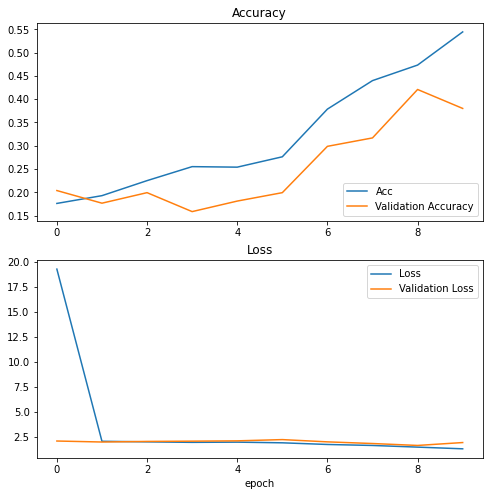

[I 2022-06-21 04:03:29,538] Trial 45 finished with value: 0.3163265287876129 and parameters: {'filters_l1': 8, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'relu', 'dropout_l1': 0.11371819906737497, 'filters_l2': 67, 'kernel_size_l2': 5, 'strides_l2': 2, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.31641849988762316, 'filters_l3': 100, 'kernel_size_l3': 7, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'elu', 'dropout_l3': 0.3339184614244683, 'n_units_l': 515, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.3623355998661664, 'learning_rate': 0.0035832688367358487, 'beta_1': 0.9215301733119753, 'beta_2': 0.9601804133156582, 'epsilon': 4.791900638442597e-07}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 592ms/step - loss: 4.2400 - accuracy: 0.2361 - val_loss: 2.1093 - val_accuracy: 0.2579 - lr: 5.1399e-04
Epoch 2/10
29/29 [==============================] - 17s 580ms/step - loss: 1.7096 - accuracy: 0.4376 - val_loss: 1.8027 - val_accuracy: 0.3982 - lr: 5.1399e-04
Epoch 3/10
29/29 [==============================] - 17s 577ms/step - loss: 1.2181 - accuracy: 0.5379 - val_loss: 1.6864 - val_accuracy: 0.4661 - lr: 5.1399e-04
Epoch 4/10
29/29 [==============================] - 17s 576ms/step - loss: 1.1423 - accuracy: 0.5813 - val_loss: 1.6044 - val_accuracy: 0.4344 - lr: 5.1399e-04
Epoch 5/10
29/29 [==============================] - 17s 576ms/step - loss: 1.0350 - accuracy: 0.6292 - val_loss: 1.5038 - val_accuracy: 0.5068 - lr: 5.1399e-04
Epoch 6/10
29/29 [==============================] - 17s 581ms/step - loss: 0.8641 - accuracy: 0.6938 - val_loss: 1.3672 - val_accuracy: 0.5882 - lr: 5.1399e-04
Epoch 7/10
29/29 [======================

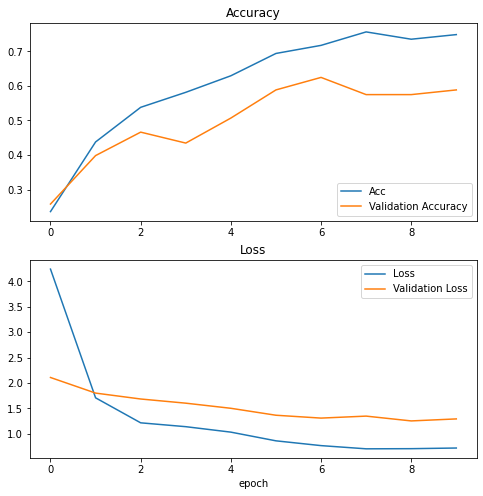

[I 2022-06-21 04:06:24,559] Trial 46 finished with value: 0.581632673740387 and parameters: {'filters_l1': 19, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'relu', 'dropout_l1': 0.1847791923727125, 'filters_l2': 46, 'kernel_size_l2': 5, 'strides_l2': 2, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.2878329822306114, 'filters_l3': 71, 'kernel_size_l3': 7, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'elu', 'dropout_l3': 0.39967311686387136, 'n_units_l': 1003, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.26139870727967685, 'learning_rate': 0.0005139900851967174, 'beta_1': 0.9393311372837078, 'beta_2': 0.9956476141650429, 'epsilon': 8.322168435393477e-07}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 584ms/step - loss: 5.1178 - accuracy: 0.2004 - val_loss: 2.0998 - val_accuracy: 0.0860 - lr: 3.3867e-04
Epoch 2/10
29/29 [==============================] - 17s 579ms/step - loss: 1.9830 - accuracy: 0.3452 - val_loss: 1.9786 - val_accuracy: 0.2036 - lr: 3.3867e-04
Epoch 3/10
29/29 [==============================] - 17s 555ms/step - loss: 1.7214 - accuracy: 0.4209 - val_loss: 2.1510 - val_accuracy: 0.2624 - lr: 3.3867e-04
Epoch 4/10
29/29 [==============================] - 17s 574ms/step - loss: 1.5033 - accuracy: 0.4766 - val_loss: 2.1853 - val_accuracy: 0.2805 - lr: 3.3867e-04
Epoch 5/10
29/29 [==============================] - 17s 591ms/step - loss: 1.4811 - accuracy: 0.4822 - val_loss: 2.0906 - val_accuracy: 0.3167 - lr: 3.3867e-04
Epoch 6/10
29/29 [==============================] - 17s 556ms/step - loss: 1.3605 - accuracy: 0.5312 - val_loss: 2.4054 - val_accuracy: 0.3258 - lr: 3.3867e-04
Epoch 7/10
29/29 [======================

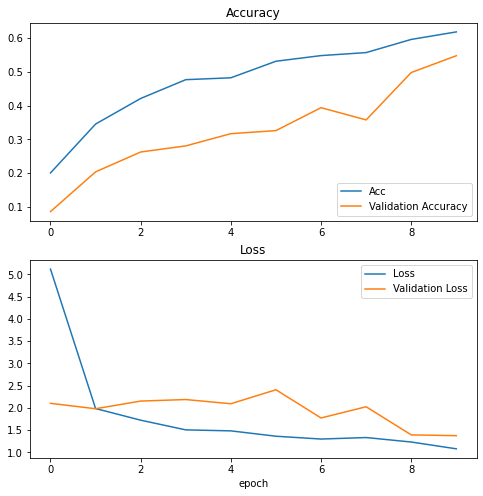

[I 2022-06-21 04:09:18,943] Trial 47 finished with value: 0.6632652878761292 and parameters: {'filters_l1': 7, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'relu', 'dropout_l1': 0.14754038454653792, 'filters_l2': 154, 'kernel_size_l2': 5, 'strides_l2': 2, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.33367795218550655, 'filters_l3': 157, 'kernel_size_l3': 7, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'elu', 'dropout_l3': 0.2939614209185786, 'n_units_l': 490, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.2867691667095059, 'learning_rate': 0.0003386744961433576, 'beta_1': 0.9286812880680434, 'beta_2': 0.9466153270283741, 'epsilon': 3.911111356993597e-07}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 591ms/step - loss: 2.9577 - accuracy: 0.2650 - val_loss: 2.2373 - val_accuracy: 0.1991 - lr: 1.6406e-04
Epoch 2/10
29/29 [==============================] - 17s 580ms/step - loss: 1.7352 - accuracy: 0.4265 - val_loss: 2.2421 - val_accuracy: 0.2760 - lr: 1.6406e-04
Epoch 3/10
29/29 [==============================] - 17s 581ms/step - loss: 1.4449 - accuracy: 0.5022 - val_loss: 1.9331 - val_accuracy: 0.3665 - lr: 1.6406e-04
Epoch 4/10
29/29 [==============================] - 17s 594ms/step - loss: 1.2318 - accuracy: 0.5757 - val_loss: 1.8872 - val_accuracy: 0.3575 - lr: 1.6406e-04
Epoch 5/10
29/29 [==============================] - 17s 576ms/step - loss: 1.0442 - accuracy: 0.6381 - val_loss: 1.8103 - val_accuracy: 0.4208 - lr: 1.6406e-04
Epoch 6/10
29/29 [==============================] - 17s 573ms/step - loss: 0.9625 - accuracy: 0.6414 - val_loss: 1.9735 - val_accuracy: 0.3529 - lr: 1.6406e-04
Epoch 7/10
29/29 [======================

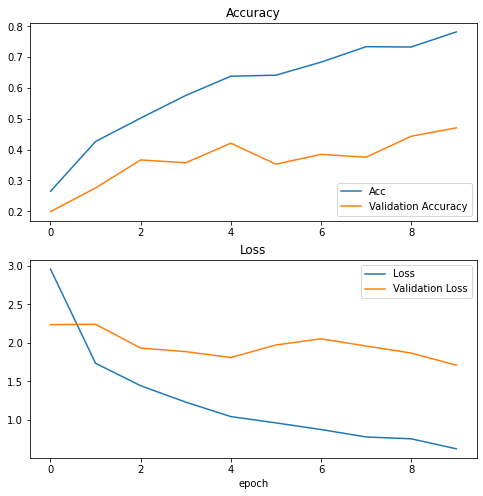

[I 2022-06-21 04:12:14,494] Trial 48 finished with value: 0.5714285969734192 and parameters: {'filters_l1': 43, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'relu', 'dropout_l1': 0.11886275733963592, 'filters_l2': 21, 'kernel_size_l2': 3, 'strides_l2': 2, 'padding_l2': 'same', 'activation_l2': 'elu', 'dropout_l2': 0.3664669658503372, 'filters_l3': 84, 'kernel_size_l3': 7, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'elu', 'dropout_l3': 0.328665975361359, 'n_units_l': 420, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.3127366390946669, 'learning_rate': 0.00016406153018620734, 'beta_1': 0.9205765197626353, 'beta_2': 0.9644851332446771, 'epsilon': 2.895273391909006e-07}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 576ms/step - loss: 9.1806 - accuracy: 0.2038 - val_loss: 2.9195 - val_accuracy: 0.1719 - lr: 0.0010
Epoch 2/10
29/29 [==============================] - 17s 574ms/step - loss: 2.4061 - accuracy: 0.2305 - val_loss: 2.3541 - val_accuracy: 0.1719 - lr: 0.0010
Epoch 3/10
29/29 [==============================] - 17s 580ms/step - loss: 2.0306 - accuracy: 0.2817 - val_loss: 2.0791 - val_accuracy: 0.2081 - lr: 0.0010
Epoch 4/10
29/29 [==============================] - 17s 576ms/step - loss: 2.0990 - accuracy: 0.3296 - val_loss: 2.5011 - val_accuracy: 0.1719 - lr: 0.0010
Epoch 5/10
29/29 [==============================] - 16s 580ms/step - loss: 1.9226 - accuracy: 0.3552 - val_loss: 2.1091 - val_accuracy: 0.2036 - lr: 0.0010
Epoch 6/10
29/29 [==============================] - 16s 578ms/step - loss: 1.8909 - accuracy: 0.3619 - val_loss: 2.2276 - val_accuracy: 0.1765 - lr: 0.0010
Epoch 7/10
29/29 [==============================] - 17s 555ms/st

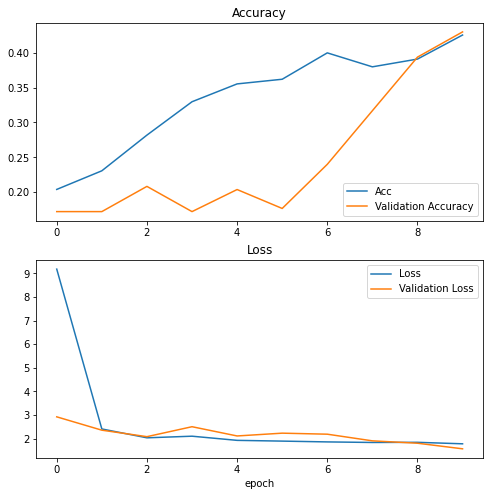

[I 2022-06-21 04:15:08,062] Trial 49 finished with value: 0.36734694242477417 and parameters: {'filters_l1': 5, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'relu', 'dropout_l1': 0.18232861045845644, 'filters_l2': 96, 'kernel_size_l2': 5, 'strides_l2': 2, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.42808747636952343, 'filters_l3': 118, 'kernel_size_l3': 7, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'elu', 'dropout_l3': 0.24234118282032346, 'n_units_l': 735, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.3402143411198163, 'learning_rate': 0.0010431487813684986, 'beta_1': 0.9372612686954573, 'beta_2': 0.9793843670104242, 'epsilon': 4.1242199584353223e-07}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 586ms/step - loss: 9.2701 - accuracy: 0.1793 - val_loss: 2.0789 - val_accuracy: 0.1493 - lr: 0.0022
Epoch 2/10
29/29 [==============================] - 16s 570ms/step - loss: 1.9794 - accuracy: 0.2416 - val_loss: 2.1444 - val_accuracy: 0.1312 - lr: 0.0022
Epoch 3/10
29/29 [==============================] - 17s 572ms/step - loss: 1.8138 - accuracy: 0.3073 - val_loss: 2.1923 - val_accuracy: 0.1584 - lr: 0.0022
Epoch 4/10
29/29 [==============================] - 17s 575ms/step - loss: 1.6891 - accuracy: 0.3675 - val_loss: 2.3494 - val_accuracy: 0.1357 - lr: 0.0022
Epoch 5/10
29/29 [==============================] - 17s 561ms/step - loss: 1.5645 - accuracy: 0.4087 - val_loss: 2.6830 - val_accuracy: 0.1538 - lr: 0.0022
Epoch 6/10
29/29 [==============================] - 17s 580ms/step - loss: 1.4156 - accuracy: 0.4911 - val_loss: 2.0458 - val_accuracy: 0.2398 - lr: 0.0022
Epoch 7/10
29/29 [==============================] - 17s 566ms/st

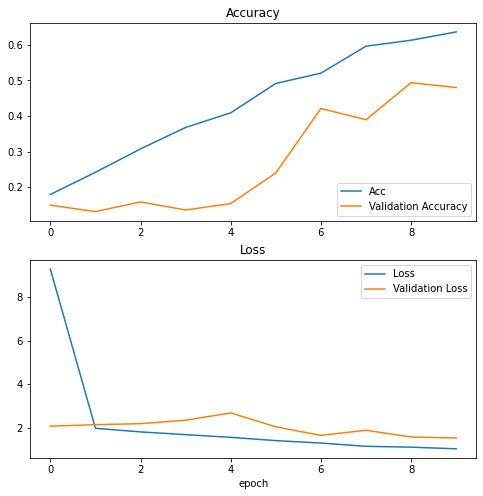

[I 2022-06-21 04:18:01,881] Trial 50 finished with value: 0.44897958636283875 and parameters: {'filters_l1': 11, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'relu', 'dropout_l1': 0.20039758095212615, 'filters_l2': 72, 'kernel_size_l2': 5, 'strides_l2': 2, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.2875685220427869, 'filters_l3': 67, 'kernel_size_l3': 7, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'elu', 'dropout_l3': 0.41909329684362556, 'n_units_l': 602, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.37905091249903833, 'learning_rate': 0.002243875973701542, 'beta_1': 0.9165275974854463, 'beta_2': 0.9732670278442207, 'epsilon': 5.408128645222752e-07}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 17s 574ms/step - loss: 3.4144 - accuracy: 0.2561 - val_loss: 2.2919 - val_accuracy: 0.1765 - lr: 5.6524e-04
Epoch 2/10
29/29 [==============================] - 17s 572ms/step - loss: 1.6643 - accuracy: 0.4298 - val_loss: 1.8908 - val_accuracy: 0.3529 - lr: 5.6524e-04
Epoch 3/10
29/29 [==============================] - 17s 555ms/step - loss: 1.3891 - accuracy: 0.5000 - val_loss: 1.7938 - val_accuracy: 0.3801 - lr: 5.6524e-04
Epoch 4/10
29/29 [==============================] - 17s 577ms/step - loss: 1.1518 - accuracy: 0.5891 - val_loss: 1.6818 - val_accuracy: 0.3891 - lr: 5.6524e-04
Epoch 5/10
29/29 [==============================] - 17s 573ms/step - loss: 1.0005 - accuracy: 0.6481 - val_loss: 1.5300 - val_accuracy: 0.4751 - lr: 5.6524e-04
Epoch 6/10
29/29 [==============================] - 17s 573ms/step - loss: 0.8953 - accuracy: 0.6871 - val_loss: 1.4605 - val_accuracy: 0.4842 - lr: 5.6524e-04
Epoch 7/10
29/29 [======================

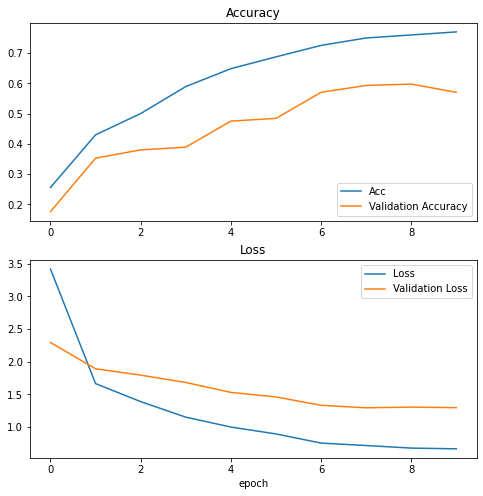

[I 2022-06-21 04:20:55,322] Trial 51 finished with value: 0.6122449040412903 and parameters: {'filters_l1': 27, 'kernel_size_l1': 5, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'relu', 'dropout_l1': 0.12848751823759275, 'filters_l2': 32, 'kernel_size_l2': 5, 'strides_l2': 2, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.3777368460638114, 'filters_l3': 50, 'kernel_size_l3': 7, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'elu', 'dropout_l3': 0.36678366740733837, 'n_units_l': 1004, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.2472463538983781, 'learning_rate': 0.0005652388797215035, 'beta_1': 0.972496470795901, 'beta_2': 0.9430551298059204, 'epsilon': 7.675428911855588e-07}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 17s 576ms/step - loss: 3.0652 - accuracy: 0.2572 - val_loss: 2.2638 - val_accuracy: 0.2127 - lr: 1.7500e-04
Epoch 2/10
29/29 [==============================] - 17s 584ms/step - loss: 1.9242 - accuracy: 0.3764 - val_loss: 2.1286 - val_accuracy: 0.2262 - lr: 1.7500e-04
Epoch 3/10
29/29 [==============================] - 16s 575ms/step - loss: 1.4883 - accuracy: 0.5022 - val_loss: 1.8136 - val_accuracy: 0.3529 - lr: 1.7500e-04
Epoch 4/10
29/29 [==============================] - 17s 566ms/step - loss: 1.2958 - accuracy: 0.5423 - val_loss: 1.6743 - val_accuracy: 0.4615 - lr: 1.7500e-04
Epoch 5/10
29/29 [==============================] - 17s 570ms/step - loss: 1.1855 - accuracy: 0.5891 - val_loss: 1.5121 - val_accuracy: 0.4480 - lr: 1.7500e-04
Epoch 6/10
29/29 [==============================] - 17s 581ms/step - loss: 1.1200 - accuracy: 0.6136 - val_loss: 1.6560 - val_accuracy: 0.4842 - lr: 1.7500e-04
Epoch 7/10
29/29 [======================

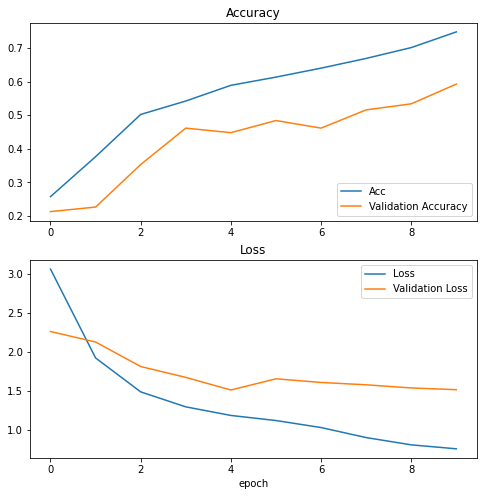

[I 2022-06-21 04:23:48,995] Trial 52 finished with value: 0.5918367505073547 and parameters: {'filters_l1': 15, 'kernel_size_l1': 5, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'linear', 'dropout_l1': 0.1507564776428736, 'filters_l2': 45, 'kernel_size_l2': 3, 'strides_l2': 2, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.33500553546257983, 'filters_l3': 85, 'kernel_size_l3': 7, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'elu', 'dropout_l3': 0.35561420189493226, 'n_units_l': 269, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.26677759281045954, 'learning_rate': 0.00017500377951572605, 'beta_1': 0.9420738395449791, 'beta_2': 0.9344077689779748, 'epsilon': 5.104352378778432e-08}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 583ms/step - loss: 2.4942 - accuracy: 0.2506 - val_loss: 2.0596 - val_accuracy: 0.2172 - lr: 2.8981e-04
Epoch 2/10
29/29 [==============================] - 16s 569ms/step - loss: 1.7289 - accuracy: 0.3875 - val_loss: 2.0158 - val_accuracy: 0.2217 - lr: 2.8981e-04
Epoch 3/10
29/29 [==============================] - 17s 577ms/step - loss: 1.5322 - accuracy: 0.4465 - val_loss: 1.8249 - val_accuracy: 0.3077 - lr: 2.8981e-04
Epoch 4/10
29/29 [==============================] - 17s 564ms/step - loss: 1.4065 - accuracy: 0.5089 - val_loss: 1.7524 - val_accuracy: 0.3484 - lr: 2.8981e-04
Epoch 5/10
29/29 [==============================] - 16s 566ms/step - loss: 1.1993 - accuracy: 0.5690 - val_loss: 1.8389 - val_accuracy: 0.3348 - lr: 2.8981e-04
Epoch 6/10
29/29 [==============================] - 17s 582ms/step - loss: 1.1442 - accuracy: 0.5713 - val_loss: 1.8133 - val_accuracy: 0.3982 - lr: 2.8981e-04
Epoch 7/10
29/29 [======================

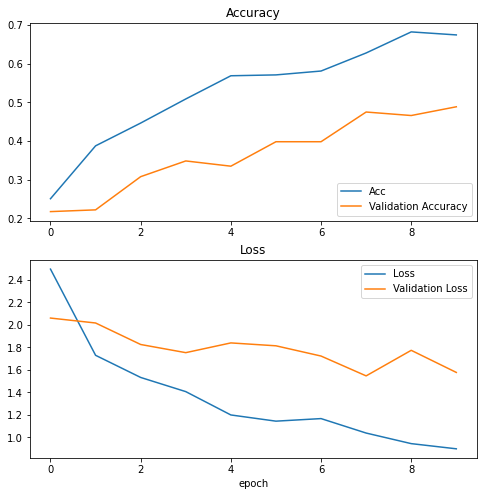

[I 2022-06-21 04:26:42,108] Trial 53 finished with value: 0.5 and parameters: {'filters_l1': 42, 'kernel_size_l1': 5, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'relu', 'dropout_l1': 0.11232814664849945, 'filters_l2': 31, 'kernel_size_l2': 5, 'strides_l2': 2, 'padding_l2': 'valid', 'activation_l2': 'elu', 'dropout_l2': 0.23840973117035966, 'filters_l3': 33, 'kernel_size_l3': 7, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'elu', 'dropout_l3': 0.28052592560156386, 'n_units_l': 71, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.3036300986575422, 'learning_rate': 0.0002898119918241337, 'beta_1': 0.9229885727988102, 'beta_2': 0.9441374654857873, 'epsilon': 2.7656703371573186e-07}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 582ms/step - loss: 2.0860 - accuracy: 0.1592 - val_loss: 2.0763 - val_accuracy: 0.1765 - lr: 7.9818e-04
Epoch 2/10
29/29 [==============================] - 17s 575ms/step - loss: 2.0749 - accuracy: 0.1771 - val_loss: 2.0734 - val_accuracy: 0.1765 - lr: 7.9818e-04
Epoch 3/10
29/29 [==============================] - 17s 583ms/step - loss: 2.0722 - accuracy: 0.1771 - val_loss: 2.0708 - val_accuracy: 0.1765 - lr: 7.9818e-04
Epoch 4/10
29/29 [==============================] - 17s 568ms/step - loss: 2.0699 - accuracy: 0.1771 - val_loss: 2.0687 - val_accuracy: 0.1765 - lr: 7.9818e-04
Epoch 5/10
29/29 [==============================] - 17s 565ms/step - loss: 2.0676 - accuracy: 0.1771 - val_loss: 2.0664 - val_accuracy: 0.1765 - lr: 7.9818e-04
Epoch 6/10
29/29 [==============================] - 17s 566ms/step - loss: 2.0653 - accuracy: 0.1771 - val_loss: 2.0641 - val_accuracy: 0.1765 - lr: 7.9818e-04
Epoch 7/10
29/29 [======================

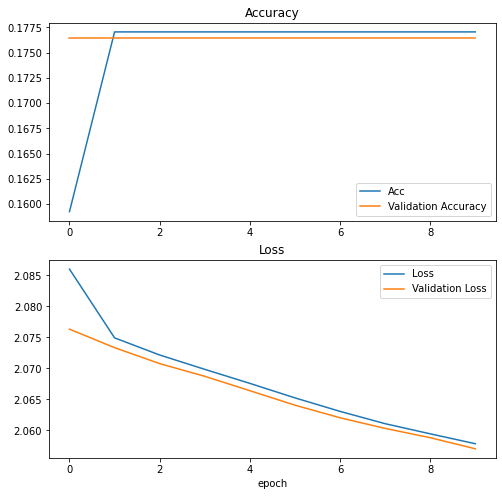

[I 2022-06-21 04:29:44,218] Trial 54 finished with value: 0.1428571492433548 and parameters: {'filters_l1': 36, 'kernel_size_l1': 5, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'relu', 'dropout_l1': 0.13100651969075222, 'filters_l2': 63, 'kernel_size_l2': 5, 'strides_l2': 2, 'padding_l2': 'valid', 'activation_l2': 'relu', 'dropout_l2': 0.4092993018647294, 'filters_l3': 143, 'kernel_size_l3': 3, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'relu', 'dropout_l3': 0.3843182006607072, 'n_units_l': 4, 'dense_activation_l3': 'relu', 'dense_dropout_l3': 0.21019344056238404, 'learning_rate': 0.0007981790657259926, 'beta_1': 0.9345413983759961, 'beta_2': 0.9544583257727467, 'epsilon': 4.1232419178219034e-07}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 17s 575ms/step - loss: 3.9021 - accuracy: 0.2339 - val_loss: 2.2295 - val_accuracy: 0.2353 - lr: 8.1275e-05
Epoch 2/10
29/29 [==============================] - 16s 579ms/step - loss: 1.9883 - accuracy: 0.3486 - val_loss: 1.9429 - val_accuracy: 0.2624 - lr: 8.1275e-05
Epoch 3/10
29/29 [==============================] - 17s 567ms/step - loss: 1.6016 - accuracy: 0.4610 - val_loss: 1.9815 - val_accuracy: 0.3167 - lr: 8.1275e-05
Epoch 4/10
29/29 [==============================] - 17s 578ms/step - loss: 1.3729 - accuracy: 0.5212 - val_loss: 1.8374 - val_accuracy: 0.3620 - lr: 8.1275e-05
Epoch 5/10
29/29 [==============================] - 17s 567ms/step - loss: 1.3027 - accuracy: 0.5434 - val_loss: 1.7095 - val_accuracy: 0.4163 - lr: 8.1275e-05
Epoch 6/10
29/29 [==============================] - 16s 557ms/step - loss: 1.1641 - accuracy: 0.5924 - val_loss: 1.8204 - val_accuracy: 0.4072 - lr: 8.1275e-05
Epoch 7/10
29/29 [======================

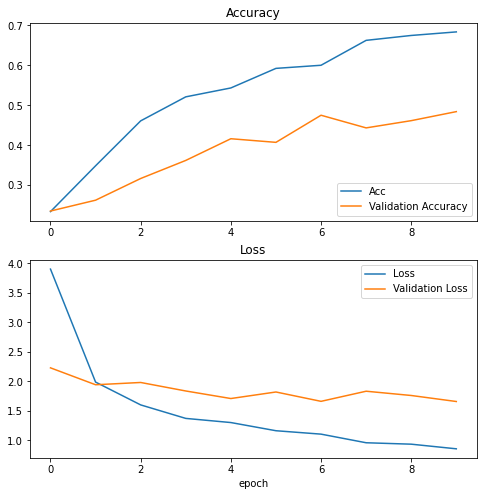

[I 2022-06-21 04:32:40,997] Trial 55 finished with value: 0.47959184646606445 and parameters: {'filters_l1': 20, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'linear', 'dropout_l1': 0.10340729034208065, 'filters_l2': 22, 'kernel_size_l2': 7, 'strides_l2': 2, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.3562569366320354, 'filters_l3': 97, 'kernel_size_l3': 7, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'elu', 'dropout_l3': 0.35129623728379555, 'n_units_l': 420, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.2779134586348495, 'learning_rate': 8.12751654925084e-05, 'beta_1': 0.952317500736474, 'beta_2': 0.9504257161141433, 'epsilon': 2.218113104355961e-08}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 591ms/step - loss: 5.0340 - accuracy: 0.1347 - val_loss: 2.2255 - val_accuracy: 0.1719 - lr: 1.5702e-04
Epoch 2/10
29/29 [==============================] - 16s 577ms/step - loss: 3.2771 - accuracy: 0.1670 - val_loss: 2.0602 - val_accuracy: 0.1674 - lr: 1.5702e-04
Epoch 3/10
29/29 [==============================] - 17s 577ms/step - loss: 2.4535 - accuracy: 0.2149 - val_loss: 2.0247 - val_accuracy: 0.1629 - lr: 1.5702e-04
Epoch 4/10
29/29 [==============================] - 17s 581ms/step - loss: 2.1086 - accuracy: 0.2394 - val_loss: 1.9829 - val_accuracy: 0.2624 - lr: 1.5702e-04
Epoch 5/10
29/29 [==============================] - 16s 571ms/step - loss: 1.9382 - accuracy: 0.2851 - val_loss: 1.9253 - val_accuracy: 0.2896 - lr: 1.5702e-04
Epoch 6/10
29/29 [==============================] - 16s 567ms/step - loss: 1.8167 - accuracy: 0.3307 - val_loss: 1.8346 - val_accuracy: 0.3122 - lr: 1.5702e-04
Epoch 7/10
29/29 [======================

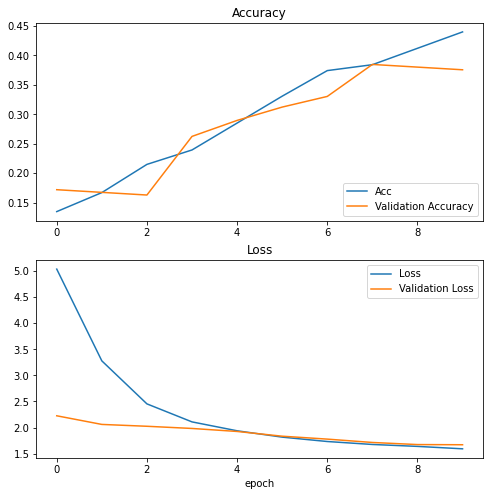

[I 2022-06-21 04:35:34,093] Trial 56 finished with value: 0.29591837525367737 and parameters: {'filters_l1': 13, 'kernel_size_l1': 5, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'relu', 'dropout_l1': 0.13916863133574503, 'filters_l2': 4, 'kernel_size_l2': 3, 'strides_l2': 2, 'padding_l2': 'valid', 'activation_l2': 'relu', 'dropout_l2': 0.31038882625065367, 'filters_l3': 27, 'kernel_size_l3': 3, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'elu', 'dropout_l3': 0.30174236151438544, 'n_units_l': 203, 'dense_activation_l3': 'relu', 'dense_dropout_l3': 0.23480715950458603, 'learning_rate': 0.00015702442901500456, 'beta_1': 0.9273482146859626, 'beta_2': 0.9293289413134227, 'epsilon': 8.145572067854756e-07}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 17s 555ms/step - loss: 4.2545 - accuracy: 0.2071 - val_loss: 2.0377 - val_accuracy: 0.2081 - lr: 4.0142e-04
Epoch 2/10
29/29 [==============================] - 16s 577ms/step - loss: 1.7231 - accuracy: 0.3686 - val_loss: 1.9403 - val_accuracy: 0.3258 - lr: 4.0142e-04
Epoch 3/10
29/29 [==============================] - 17s 579ms/step - loss: 1.5116 - accuracy: 0.4321 - val_loss: 1.7886 - val_accuracy: 0.3891 - lr: 4.0142e-04
Epoch 4/10
29/29 [==============================] - 16s 577ms/step - loss: 1.4655 - accuracy: 0.4844 - val_loss: 1.7749 - val_accuracy: 0.4480 - lr: 4.0142e-04
Epoch 5/10
29/29 [==============================] - 17s 567ms/step - loss: 1.3100 - accuracy: 0.5156 - val_loss: 1.6419 - val_accuracy: 0.4118 - lr: 4.0142e-04
Epoch 6/10
29/29 [==============================] - 16s 570ms/step - loss: 1.2329 - accuracy: 0.5445 - val_loss: 1.5879 - val_accuracy: 0.5068 - lr: 4.0142e-04
Epoch 7/10
29/29 [======================

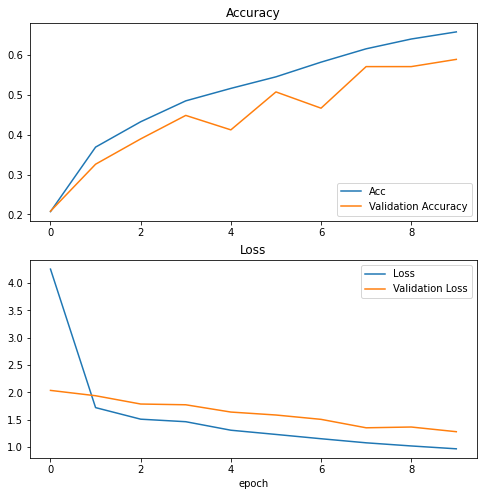

[I 2022-06-21 04:38:31,665] Trial 57 finished with value: 0.5714285969734192 and parameters: {'filters_l1': 28, 'kernel_size_l1': 5, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'linear', 'dropout_l1': 0.16131882363712313, 'filters_l2': 16, 'kernel_size_l2': 5, 'strides_l2': 2, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.4424488820583017, 'filters_l3': 53, 'kernel_size_l3': 7, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'relu', 'dropout_l3': 0.33610155099077726, 'n_units_l': 790, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.35011825061030244, 'learning_rate': 0.0004014166289254181, 'beta_1': 0.9062339502519717, 'beta_2': 0.9656850817557617, 'epsilon': 5.993618975332582e-07}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 598ms/step - loss: 56.0609 - accuracy: 0.1559 - val_loss: 5.2789 - val_accuracy: 0.0769 - lr: 0.0075
Epoch 2/10
29/29 [==============================] - 17s 585ms/step - loss: 2.6653 - accuracy: 0.1281 - val_loss: 2.2006 - val_accuracy: 0.1719 - lr: 0.0075
Epoch 3/10
29/29 [==============================] - 17s 565ms/step - loss: 2.4148 - accuracy: 0.1347 - val_loss: 2.1008 - val_accuracy: 0.1448 - lr: 0.0075
Epoch 4/10
29/29 [==============================] - 17s 591ms/step - loss: 2.3624 - accuracy: 0.1437 - val_loss: 2.1649 - val_accuracy: 0.1765 - lr: 0.0075
Epoch 5/10
29/29 [==============================] - 17s 584ms/step - loss: 2.3281 - accuracy: 0.1392 - val_loss: 2.0958 - val_accuracy: 0.1765 - lr: 0.0075
Epoch 6/10
29/29 [==============================] - 17s 578ms/step - loss: 2.3426 - accuracy: 0.1670 - val_loss: 2.0907 - val_accuracy: 0.1719 - lr: 0.0075
Epoch 7/10
29/29 [==============================] - 17s 571ms/s

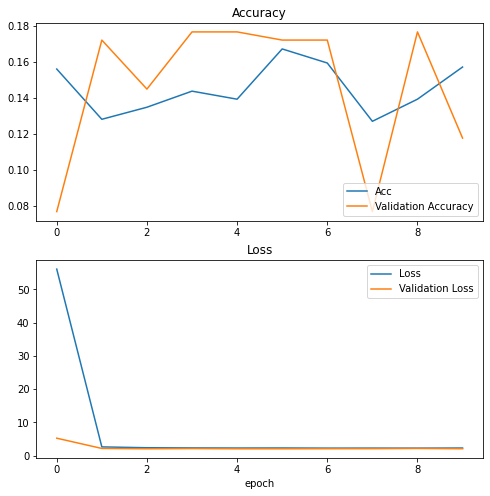

[I 2022-06-21 04:41:26,814] Trial 58 finished with value: 0.12244898080825806 and parameters: {'filters_l1': 46, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'relu', 'dropout_l1': 0.39047231094901547, 'filters_l2': 82, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'valid', 'activation_l2': 'elu', 'dropout_l2': 0.38329382966367836, 'filters_l3': 66, 'kernel_size_l3': 3, 'strides_l3': 2, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.3095139156320259, 'n_units_l': 161, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.2967479183062876, 'learning_rate': 0.0075274663167041395, 'beta_1': 0.9345439908634007, 'beta_2': 0.9611949799339135, 'epsilon': 4.4106442782546575e-08}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 19s 595ms/step - loss: 2.7033 - accuracy: 0.2405 - val_loss: 2.0496 - val_accuracy: 0.2398 - lr: 2.3305e-04
Epoch 2/10
29/29 [==============================] - 17s 568ms/step - loss: 1.6232 - accuracy: 0.4143 - val_loss: 1.9756 - val_accuracy: 0.2760 - lr: 2.3305e-04
Epoch 3/10
29/29 [==============================] - 17s 570ms/step - loss: 1.4706 - accuracy: 0.4543 - val_loss: 1.8898 - val_accuracy: 0.2715 - lr: 2.3305e-04
Epoch 4/10
29/29 [==============================] - 17s 569ms/step - loss: 1.3229 - accuracy: 0.5223 - val_loss: 1.7674 - val_accuracy: 0.3710 - lr: 2.3305e-04
Epoch 5/10
29/29 [==============================] - 17s 580ms/step - loss: 1.1835 - accuracy: 0.5690 - val_loss: 1.6537 - val_accuracy: 0.4525 - lr: 2.3305e-04
Epoch 6/10
29/29 [==============================] - 17s 585ms/step - loss: 1.0755 - accuracy: 0.6125 - val_loss: 1.5179 - val_accuracy: 0.4796 - lr: 2.3305e-04
Epoch 7/10
29/29 [======================

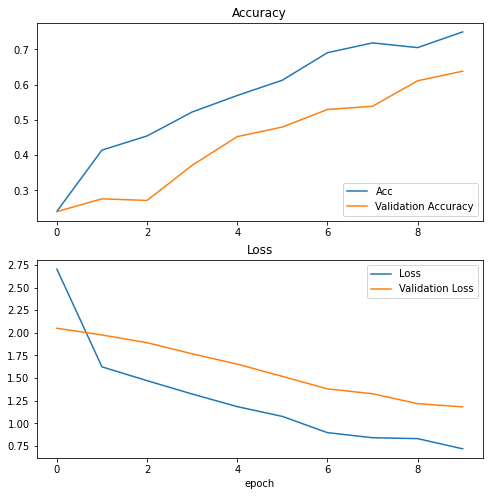

[I 2022-06-21 04:44:27,363] Trial 59 finished with value: 0.6632652878761292 and parameters: {'filters_l1': 84, 'kernel_size_l1': 5, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'relu', 'dropout_l1': 0.17510780330574593, 'filters_l2': 43, 'kernel_size_l2': 5, 'strides_l2': 1, 'padding_l2': 'valid', 'activation_l2': 'relu', 'dropout_l2': 0.3239210871396919, 'filters_l3': 75, 'kernel_size_l3': 7, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'relu', 'dropout_l3': 0.3849348274049104, 'n_units_l': 308, 'dense_activation_l3': 'relu', 'dense_dropout_l3': 0.325694050649997, 'learning_rate': 0.0002330526496922758, 'beta_1': 0.9299835153311119, 'beta_2': 0.9566199376346647, 'epsilon': 6.79151533645728e-08}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 574ms/step - loss: 4.7924 - accuracy: 0.1481 - val_loss: 2.0255 - val_accuracy: 0.1629 - lr: 9.4988e-05
Epoch 2/10
29/29 [==============================] - 17s 566ms/step - loss: 2.4257 - accuracy: 0.2439 - val_loss: 1.9444 - val_accuracy: 0.2624 - lr: 9.4988e-05
Epoch 3/10
29/29 [==============================] - 17s 573ms/step - loss: 2.0251 - accuracy: 0.3263 - val_loss: 1.8839 - val_accuracy: 0.2760 - lr: 9.4988e-05
Epoch 4/10
29/29 [==============================] - 17s 562ms/step - loss: 1.8437 - accuracy: 0.3764 - val_loss: 1.8605 - val_accuracy: 0.3348 - lr: 9.4988e-05
Epoch 5/10
29/29 [==============================] - 17s 576ms/step - loss: 1.7151 - accuracy: 0.4243 - val_loss: 1.9486 - val_accuracy: 0.3122 - lr: 9.4988e-05
Epoch 6/10
29/29 [==============================] - 17s 578ms/step - loss: 1.6345 - accuracy: 0.4220 - val_loss: 1.9490 - val_accuracy: 0.3213 - lr: 9.4988e-05
Epoch 7/10
29/29 [======================

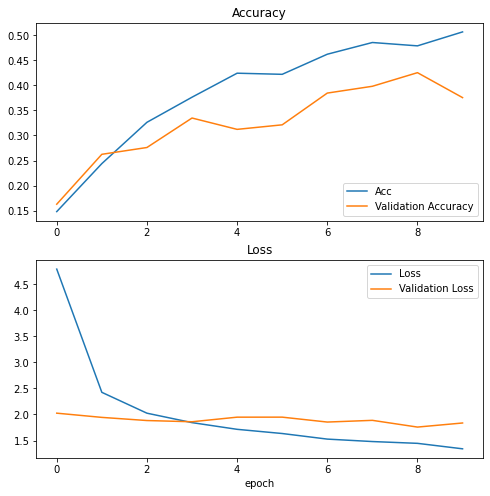

[I 2022-06-21 04:47:22,303] Trial 60 finished with value: 0.37755101919174194 and parameters: {'filters_l1': 58, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'linear', 'dropout_l1': 0.19449674457119964, 'filters_l2': 24, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.477999003396292, 'filters_l3': 46, 'kernel_size_l3': 7, 'strides_l3': 2, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.495462378633484, 'n_units_l': 96, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.25561106228404723, 'learning_rate': 9.498809540359416e-05, 'beta_1': 0.942941730183794, 'beta_2': 0.9942536092962411, 'epsilon': 1.1102980426019437e-07}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 599ms/step - loss: 6.4170 - accuracy: 0.1904 - val_loss: 2.1663 - val_accuracy: 0.2534 - lr: 3.4453e-04
Epoch 2/10
29/29 [==============================] - 17s 566ms/step - loss: 2.1766 - accuracy: 0.2661 - val_loss: 2.0796 - val_accuracy: 0.2217 - lr: 3.4453e-04
Epoch 3/10
29/29 [==============================] - 17s 587ms/step - loss: 1.9268 - accuracy: 0.3452 - val_loss: 2.0522 - val_accuracy: 0.2534 - lr: 3.4453e-04
Epoch 4/10
29/29 [==============================] - 17s 572ms/step - loss: 1.8060 - accuracy: 0.3842 - val_loss: 2.1330 - val_accuracy: 0.2489 - lr: 3.4453e-04
Epoch 5/10
29/29 [==============================] - 17s 581ms/step - loss: 1.7024 - accuracy: 0.4053 - val_loss: 2.0059 - val_accuracy: 0.3122 - lr: 3.4453e-04
Epoch 6/10
29/29 [==============================] - 17s 583ms/step - loss: 1.5950 - accuracy: 0.4432 - val_loss: 2.0049 - val_accuracy: 0.3439 - lr: 3.4453e-04
Epoch 7/10
29/29 [======================

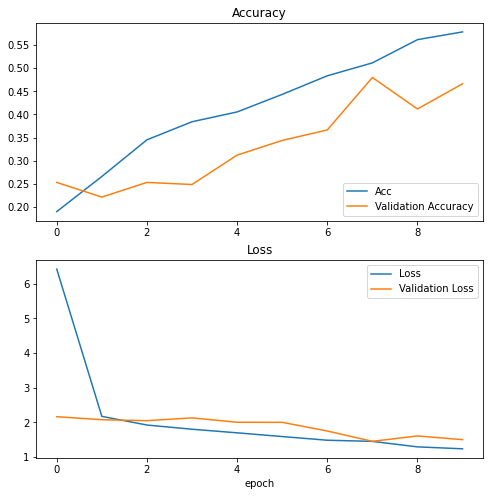

[I 2022-06-21 04:50:17,295] Trial 61 finished with value: 0.4591836631298065 and parameters: {'filters_l1': 7, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'relu', 'dropout_l1': 0.1538095493485241, 'filters_l2': 205, 'kernel_size_l2': 5, 'strides_l2': 2, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.34461873822681177, 'filters_l3': 220, 'kernel_size_l3': 7, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'elu', 'dropout_l3': 0.28804862494261746, 'n_units_l': 483, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.2833006072156707, 'learning_rate': 0.00034453248684994197, 'beta_1': 0.928500814582383, 'beta_2': 0.9463639815464042, 'epsilon': 3.804862958424693e-07}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 580ms/step - loss: 2.9267 - accuracy: 0.1960 - val_loss: 2.0559 - val_accuracy: 0.1674 - lr: 2.4779e-04
Epoch 2/10
29/29 [==============================] - 17s 587ms/step - loss: 1.7365 - accuracy: 0.3497 - val_loss: 1.9620 - val_accuracy: 0.2670 - lr: 2.4779e-04
Epoch 3/10
29/29 [==============================] - 17s 578ms/step - loss: 1.4227 - accuracy: 0.4878 - val_loss: 1.8827 - val_accuracy: 0.2760 - lr: 2.4779e-04
Epoch 4/10
29/29 [==============================] - 17s 574ms/step - loss: 1.2846 - accuracy: 0.5490 - val_loss: 1.7260 - val_accuracy: 0.3529 - lr: 2.4779e-04
Epoch 5/10
29/29 [==============================] - 17s 582ms/step - loss: 1.1709 - accuracy: 0.5846 - val_loss: 1.5955 - val_accuracy: 0.4027 - lr: 2.4779e-04
Epoch 6/10
29/29 [==============================] - 17s 581ms/step - loss: 1.0879 - accuracy: 0.6091 - val_loss: 1.5088 - val_accuracy: 0.4977 - lr: 2.4779e-04
Epoch 7/10
29/29 [======================

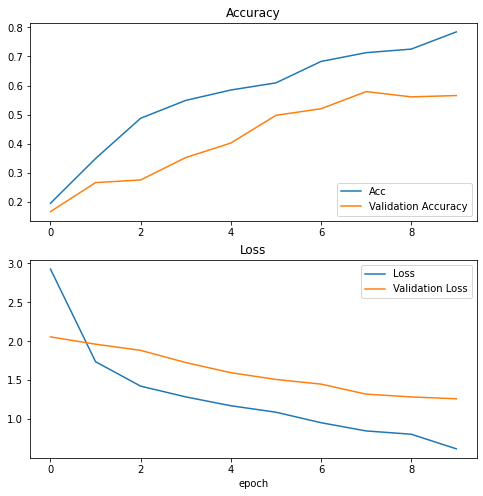

[I 2022-06-21 04:53:13,071] Trial 62 finished with value: 0.6224489808082581 and parameters: {'filters_l1': 81, 'kernel_size_l1': 5, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'relu', 'dropout_l1': 0.1726343174219378, 'filters_l2': 51, 'kernel_size_l2': 5, 'strides_l2': 1, 'padding_l2': 'valid', 'activation_l2': 'relu', 'dropout_l2': 0.3247930379487168, 'filters_l3': 79, 'kernel_size_l3': 7, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'relu', 'dropout_l3': 0.41663883091463194, 'n_units_l': 335, 'dense_activation_l3': 'relu', 'dense_dropout_l3': 0.3286841673098794, 'learning_rate': 0.00024779172985267447, 'beta_1': 0.9226805816234421, 'beta_2': 0.9545506948583566, 'epsilon': 7.171172766399873e-08}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 587ms/step - loss: 4.6756 - accuracy: 0.1325 - val_loss: 2.0479 - val_accuracy: 0.1674 - lr: 7.9958e-04
Epoch 2/10
29/29 [==============================] - 17s 559ms/step - loss: 1.9690 - accuracy: 0.2171 - val_loss: 1.9717 - val_accuracy: 0.2760 - lr: 7.9958e-04
Epoch 3/10
29/29 [==============================] - 17s 571ms/step - loss: 1.8459 - accuracy: 0.3007 - val_loss: 1.9782 - val_accuracy: 0.2353 - lr: 7.9958e-04
Epoch 4/10
29/29 [==============================] - 17s 587ms/step - loss: 1.8134 - accuracy: 0.3285 - val_loss: 1.9187 - val_accuracy: 0.2986 - lr: 7.9958e-04
Epoch 5/10
29/29 [==============================] - 17s 583ms/step - loss: 1.6926 - accuracy: 0.3630 - val_loss: 1.8884 - val_accuracy: 0.2851 - lr: 7.9958e-04
Epoch 6/10
29/29 [==============================] - 17s 585ms/step - loss: 1.6184 - accuracy: 0.4154 - val_loss: 1.8879 - val_accuracy: 0.2262 - lr: 7.9958e-04
Epoch 7/10
29/29 [======================

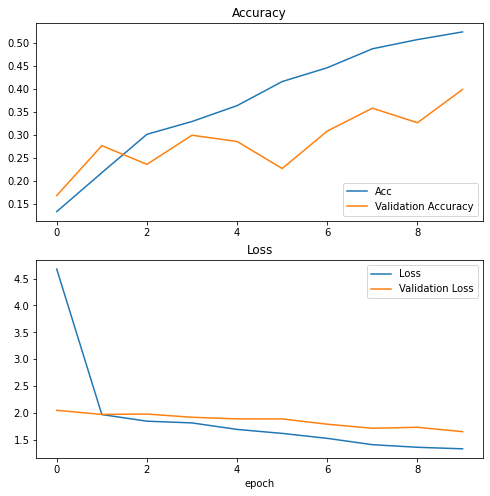

[I 2022-06-21 04:56:08,853] Trial 63 finished with value: 0.5306122303009033 and parameters: {'filters_l1': 33, 'kernel_size_l1': 5, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'relu', 'dropout_l1': 0.12091422225324566, 'filters_l2': 43, 'kernel_size_l2': 5, 'strides_l2': 1, 'padding_l2': 'valid', 'activation_l2': 'relu', 'dropout_l2': 0.36559284369149103, 'filters_l3': 108, 'kernel_size_l3': 7, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'relu', 'dropout_l3': 0.39033950938295503, 'n_units_l': 280, 'dense_activation_l3': 'relu', 'dense_dropout_l3': 0.3695399914690073, 'learning_rate': 0.0007995837369101352, 'beta_1': 0.9551358570767311, 'beta_2': 0.9577401559814859, 'epsilon': 6.3049654828802e-08}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 583ms/step - loss: 1937.9189 - accuracy: 0.1359 - val_loss: 2.0543 - val_accuracy: 0.1448 - lr: 0.0543
Epoch 2/10
29/29 [==============================] - 17s 581ms/step - loss: 2.0567 - accuracy: 0.1325 - val_loss: 2.0435 - val_accuracy: 0.1765 - lr: 0.0543
Epoch 3/10
29/29 [==============================] - 17s 579ms/step - loss: 2.0436 - accuracy: 0.1715 - val_loss: 2.0411 - val_accuracy: 0.1719 - lr: 0.0543
Epoch 4/10
29/29 [==============================] - 17s 568ms/step - loss: 2.0458 - accuracy: 0.1726 - val_loss: 2.0376 - val_accuracy: 0.1719 - lr: 0.0543
Epoch 5/10
29/29 [==============================] - 17s 584ms/step - loss: 2.0423 - accuracy: 0.1793 - val_loss: 2.0400 - val_accuracy: 0.1765 - lr: 0.0543
Epoch 6/10
29/29 [==============================] - 17s 583ms/step - loss: 2.0492 - accuracy: 0.1771 - val_loss: 2.0415 - val_accuracy: 0.1765 - lr: 0.0543
Epoch 7/10
29/29 [==============================] - 17s 568ms

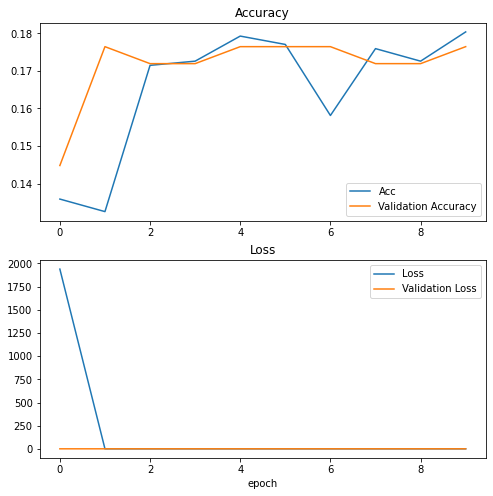

[I 2022-06-21 04:59:04,134] Trial 64 finished with value: 0.1428571492433548 and parameters: {'filters_l1': 67, 'kernel_size_l1': 5, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'relu', 'dropout_l1': 0.1413549338426938, 'filters_l2': 35, 'kernel_size_l2': 5, 'strides_l2': 1, 'padding_l2': 'valid', 'activation_l2': 'relu', 'dropout_l2': 0.27810533389534026, 'filters_l3': 66, 'kernel_size_l3': 7, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'relu', 'dropout_l3': 0.3253324219155923, 'n_units_l': 48, 'dense_activation_l3': 'relu', 'dense_dropout_l3': 0.307153372950095, 'learning_rate': 0.05426629436441509, 'beta_1': 0.9169562963736828, 'beta_2': 0.9348298695980182, 'epsilon': 2.6272521520199173e-08}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 17s 577ms/step - loss: 3.8848 - accuracy: 0.2572 - val_loss: 2.0223 - val_accuracy: 0.2217 - lr: 5.7061e-04
Epoch 2/10
29/29 [==============================] - 17s 564ms/step - loss: 1.6438 - accuracy: 0.4532 - val_loss: 1.8429 - val_accuracy: 0.2896 - lr: 5.7061e-04
Epoch 3/10
29/29 [==============================] - 17s 583ms/step - loss: 1.3923 - accuracy: 0.5334 - val_loss: 1.5759 - val_accuracy: 0.4434 - lr: 5.7061e-04
Epoch 4/10
29/29 [==============================] - 17s 570ms/step - loss: 1.2574 - accuracy: 0.5757 - val_loss: 1.6150 - val_accuracy: 0.4072 - lr: 5.7061e-04
Epoch 5/10
29/29 [==============================] - 17s 583ms/step - loss: 1.0970 - accuracy: 0.6147 - val_loss: 1.4984 - val_accuracy: 0.4570 - lr: 5.7061e-04
Epoch 6/10
29/29 [==============================] - 16s 575ms/step - loss: 0.9321 - accuracy: 0.7004 - val_loss: 2.1306 - val_accuracy: 0.3439 - lr: 5.7061e-04
Epoch 7/10
29/29 [======================

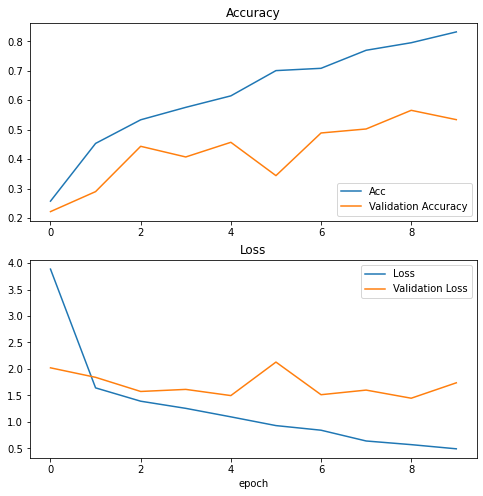

[I 2022-06-21 05:01:57,721] Trial 65 finished with value: 0.5306122303009033 and parameters: {'filters_l1': 5, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'relu', 'dropout_l1': 0.14706629105556426, 'filters_l2': 145, 'kernel_size_l2': 5, 'strides_l2': 2, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.337316293066798, 'filters_l3': 173, 'kernel_size_l3': 3, 'strides_l3': 2, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.2718563656495466, 'n_units_l': 573, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.291009893092487, 'learning_rate': 0.000570608502773648, 'beta_1': 0.9239048911761418, 'beta_2': 0.9490633090514311, 'epsilon': 4.4995214215776684e-07}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 596ms/step - loss: 2.6479 - accuracy: 0.1470 - val_loss: 1.9960 - val_accuracy: 0.1765 - lr: 0.0016
Epoch 2/10
29/29 [==============================] - 17s 563ms/step - loss: 1.9686 - accuracy: 0.2127 - val_loss: 2.0157 - val_accuracy: 0.2534 - lr: 0.0016
Epoch 3/10
29/29 [==============================] - 17s 563ms/step - loss: 1.8931 - accuracy: 0.2561 - val_loss: 2.0020 - val_accuracy: 0.2443 - lr: 0.0016
Epoch 4/10
29/29 [==============================] - 17s 582ms/step - loss: 1.7956 - accuracy: 0.3274 - val_loss: 1.8276 - val_accuracy: 0.3620 - lr: 0.0016
Epoch 5/10
29/29 [==============================] - 17s 549ms/step - loss: 1.7507 - accuracy: 0.3686 - val_loss: 1.8168 - val_accuracy: 0.3801 - lr: 0.0016
Epoch 6/10
29/29 [==============================] - 17s 586ms/step - loss: 1.5157 - accuracy: 0.4488 - val_loss: 1.7922 - val_accuracy: 0.3167 - lr: 0.0016
Epoch 7/10
29/29 [==============================] - 17s 572ms/st

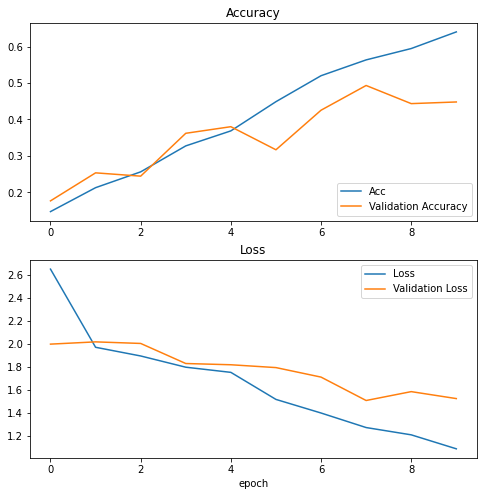

[I 2022-06-21 05:04:53,249] Trial 66 finished with value: 0.5510203838348389 and parameters: {'filters_l1': 84, 'kernel_size_l1': 5, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'relu', 'dropout_l1': 0.18056898552500533, 'filters_l2': 30, 'kernel_size_l2': 5, 'strides_l2': 1, 'padding_l2': 'valid', 'activation_l2': 'relu', 'dropout_l2': 0.3941610350134689, 'filters_l3': 57, 'kernel_size_l3': 7, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'relu', 'dropout_l3': 0.3599353170146173, 'n_units_l': 207, 'dense_activation_l3': 'relu', 'dense_dropout_l3': 0.24516351324974456, 'learning_rate': 0.001599543532117862, 'beta_1': 0.9318447587678812, 'beta_2': 0.9675464637209659, 'epsilon': 1.2511827960564564e-08}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 17s 582ms/step - loss: 3.7034 - accuracy: 0.1659 - val_loss: 2.0430 - val_accuracy: 0.1765 - lr: 3.6702e-05
Epoch 2/10
29/29 [==============================] - 17s 565ms/step - loss: 2.1369 - accuracy: 0.2428 - val_loss: 2.0208 - val_accuracy: 0.2489 - lr: 3.6702e-05
Epoch 3/10
29/29 [==============================] - 17s 585ms/step - loss: 1.8381 - accuracy: 0.3185 - val_loss: 1.9736 - val_accuracy: 0.3122 - lr: 3.6702e-05
Epoch 4/10
29/29 [==============================] - 17s 584ms/step - loss: 1.6758 - accuracy: 0.3842 - val_loss: 1.8921 - val_accuracy: 0.4027 - lr: 3.6702e-05
Epoch 5/10
29/29 [==============================] - 17s 573ms/step - loss: 1.5449 - accuracy: 0.4477 - val_loss: 1.8073 - val_accuracy: 0.3982 - lr: 3.6702e-05
Epoch 6/10
29/29 [==============================] - 17s 568ms/step - loss: 1.4568 - accuracy: 0.4722 - val_loss: 1.7116 - val_accuracy: 0.4570 - lr: 3.6702e-05
Epoch 7/10
29/29 [======================

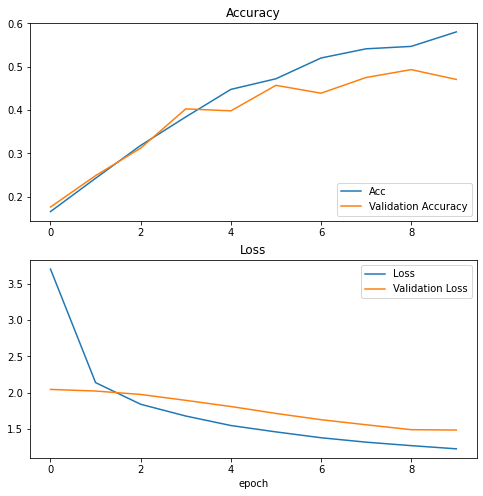

[I 2022-06-21 05:07:48,052] Trial 67 finished with value: 0.5204081535339355 and parameters: {'filters_l1': 24, 'kernel_size_l1': 5, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'linear', 'dropout_l1': 0.12643856130341002, 'filters_l2': 59, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'valid', 'activation_l2': 'relu', 'dropout_l2': 0.24833819060300616, 'filters_l3': 43, 'kernel_size_l3': 7, 'strides_l3': 2, 'padding_l3': 'valid', 'activation_l3': 'relu', 'dropout_l3': 0.4526247322940662, 'n_units_l': 837, 'dense_activation_l3': 'relu', 'dense_dropout_l3': 0.2705653440660508, 'learning_rate': 3.6701861113114374e-05, 'beta_1': 0.9392316503425825, 'beta_2': 0.9624435596101797, 'epsilon': 5.5674793723447675e-08}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 17s 582ms/step - loss: 4.1507 - accuracy: 0.1782 - val_loss: 2.0770 - val_accuracy: 0.1674 - lr: 2.1317e-04
Epoch 2/10
29/29 [==============================] - 17s 547ms/step - loss: 1.9665 - accuracy: 0.2261 - val_loss: 2.0502 - val_accuracy: 0.2896 - lr: 2.1317e-04
Epoch 3/10
29/29 [==============================] - 17s 569ms/step - loss: 1.8960 - accuracy: 0.2650 - val_loss: 2.0291 - val_accuracy: 0.2896 - lr: 2.1317e-04
Epoch 4/10
29/29 [==============================] - 16s 572ms/step - loss: 1.8860 - accuracy: 0.2695 - val_loss: 2.0001 - val_accuracy: 0.3213 - lr: 2.1317e-04
Epoch 5/10
29/29 [==============================] - 17s 538ms/step - loss: 1.8504 - accuracy: 0.2996 - val_loss: 1.9966 - val_accuracy: 0.3213 - lr: 2.1317e-04
Epoch 6/10
29/29 [==============================] - 17s 572ms/step - loss: 1.8368 - accuracy: 0.3029 - val_loss: 1.9418 - val_accuracy: 0.3213 - lr: 2.1317e-04
Epoch 7/10
29/29 [======================

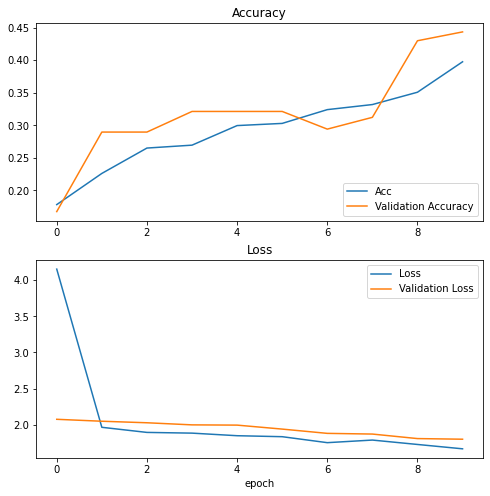

[I 2022-06-21 05:10:41,926] Trial 68 finished with value: 0.37755101919174194 and parameters: {'filters_l1': 16, 'kernel_size_l1': 5, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'relu', 'dropout_l1': 0.23000957185743637, 'filters_l2': 41, 'kernel_size_l2': 5, 'strides_l2': 1, 'padding_l2': 'valid', 'activation_l2': 'relu', 'dropout_l2': 0.4101425207808187, 'filters_l3': 75, 'kernel_size_l3': 3, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'relu', 'dropout_l3': 0.3443412728669385, 'n_units_l': 105, 'dense_activation_l3': 'relu', 'dense_dropout_l3': 0.3320030764888099, 'learning_rate': 0.0002131653308301069, 'beta_1': 0.9468108723999881, 'beta_2': 0.9789212596262918, 'epsilon': 9.148778892582979e-08}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 17s 577ms/step - loss: 8.2548 - accuracy: 0.2272 - val_loss: 2.0295 - val_accuracy: 0.2986 - lr: 3.7247e-04
Epoch 2/10
29/29 [==============================] - 17s 582ms/step - loss: 1.9165 - accuracy: 0.3463 - val_loss: 2.8730 - val_accuracy: 0.1900 - lr: 3.7247e-04
Epoch 3/10
29/29 [==============================] - 17s 573ms/step - loss: 1.7475 - accuracy: 0.4053 - val_loss: 2.0080 - val_accuracy: 0.2534 - lr: 3.7247e-04
Epoch 4/10
29/29 [==============================] - 17s 566ms/step - loss: 1.5987 - accuracy: 0.4443 - val_loss: 2.2799 - val_accuracy: 0.2262 - lr: 3.7247e-04
Epoch 5/10
29/29 [==============================] - 17s 571ms/step - loss: 1.5933 - accuracy: 0.4521 - val_loss: 1.8729 - val_accuracy: 0.3891 - lr: 3.7247e-04
Epoch 6/10
29/29 [==============================] - 17s 570ms/step - loss: 1.5081 - accuracy: 0.4900 - val_loss: 2.3559 - val_accuracy: 0.3258 - lr: 3.7247e-04
Epoch 7/10
29/29 [======================

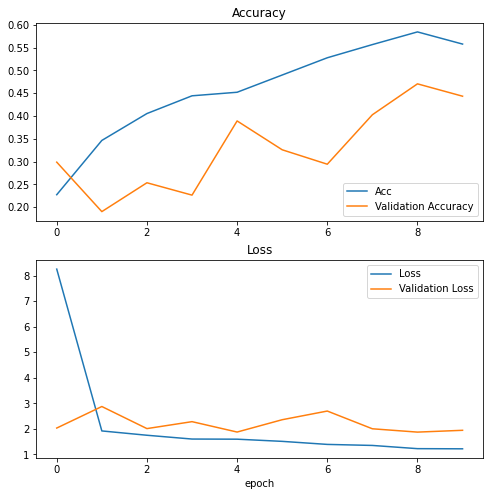

[I 2022-06-21 05:13:36,047] Trial 69 finished with value: 0.4897959232330322 and parameters: {'filters_l1': 6, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'relu', 'dropout_l1': 0.10665361120839793, 'filters_l2': 242, 'kernel_size_l2': 3, 'strides_l2': 2, 'padding_l2': 'same', 'activation_l2': 'elu', 'dropout_l2': 0.20898925111819303, 'filters_l3': 252, 'kernel_size_l3': 7, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'elu', 'dropout_l3': 0.29568322694653704, 'n_units_l': 466, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.22095542857448155, 'learning_rate': 0.00037246517826307633, 'beta_1': 0.911201666491155, 'beta_2': 0.9406829736670067, 'epsilon': 2.570750966762825e-07}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 596ms/step - loss: 2.6189 - accuracy: 0.1347 - val_loss: 2.0712 - val_accuracy: 0.1855 - lr: 1.3162e-04
Epoch 2/10
29/29 [==============================] - 17s 574ms/step - loss: 2.0736 - accuracy: 0.1481 - val_loss: 2.0662 - val_accuracy: 0.1719 - lr: 1.3162e-04
Epoch 3/10
29/29 [==============================] - 17s 572ms/step - loss: 2.0191 - accuracy: 0.1904 - val_loss: 1.9768 - val_accuracy: 0.1991 - lr: 1.3162e-04
Epoch 4/10
29/29 [==============================] - 17s 584ms/step - loss: 1.9292 - accuracy: 0.2094 - val_loss: 1.8436 - val_accuracy: 0.2760 - lr: 1.3162e-04
Epoch 5/10
29/29 [==============================] - 17s 577ms/step - loss: 1.8525 - accuracy: 0.2405 - val_loss: 1.8344 - val_accuracy: 0.3122 - lr: 1.3162e-04
Epoch 6/10
29/29 [==============================] - 17s 584ms/step - loss: 1.8289 - accuracy: 0.2895 - val_loss: 1.8460 - val_accuracy: 0.2851 - lr: 1.3162e-04
Epoch 7/10
29/29 [======================

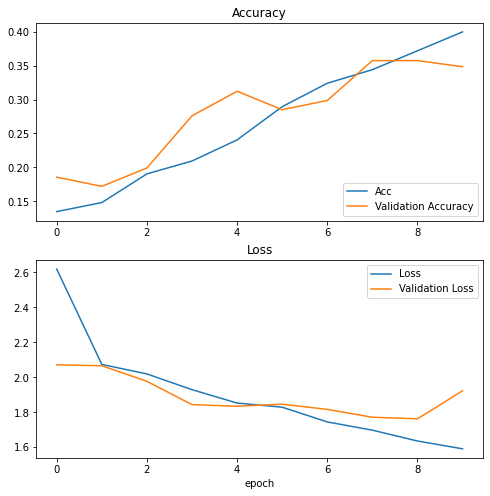

[I 2022-06-21 05:16:32,546] Trial 70 finished with value: 0.29591837525367737 and parameters: {'filters_l1': 92, 'kernel_size_l1': 5, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'elu', 'dropout_l1': 0.17142789840087658, 'filters_l2': 37, 'kernel_size_l2': 5, 'strides_l2': 1, 'padding_l2': 'valid', 'activation_l2': 'linear', 'dropout_l2': 0.29344580920221264, 'filters_l3': 6, 'kernel_size_l3': 7, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'relu', 'dropout_l3': 0.3755629434962853, 'n_units_l': 374, 'dense_activation_l3': 'relu', 'dense_dropout_l3': 0.41207302615047947, 'learning_rate': 0.00013162123636974773, 'beta_1': 0.9296500264864797, 'beta_2': 0.9518869216540209, 'epsilon': 8.536157938600156e-08}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 17s 583ms/step - loss: 4.6424 - accuracy: 0.2082 - val_loss: 2.3387 - val_accuracy: 0.2534 - lr: 3.2876e-04
Epoch 2/10
29/29 [==============================] - 17s 538ms/step - loss: 1.9393 - accuracy: 0.3808 - val_loss: 1.8761 - val_accuracy: 0.3213 - lr: 3.2876e-04
Epoch 3/10
29/29 [==============================] - 17s 562ms/step - loss: 1.7285 - accuracy: 0.4376 - val_loss: 1.9653 - val_accuracy: 0.3122 - lr: 3.2876e-04
Epoch 4/10
29/29 [==============================] - 17s 580ms/step - loss: 1.6728 - accuracy: 0.4644 - val_loss: 1.8660 - val_accuracy: 0.3846 - lr: 3.2876e-04
Epoch 5/10
29/29 [==============================] - 17s 580ms/step - loss: 1.3122 - accuracy: 0.5401 - val_loss: 1.7540 - val_accuracy: 0.3982 - lr: 3.2876e-04
Epoch 6/10
29/29 [==============================] - 17s 568ms/step - loss: 1.2362 - accuracy: 0.5958 - val_loss: 1.6695 - val_accuracy: 0.4027 - lr: 3.2876e-04
Epoch 7/10
29/29 [======================

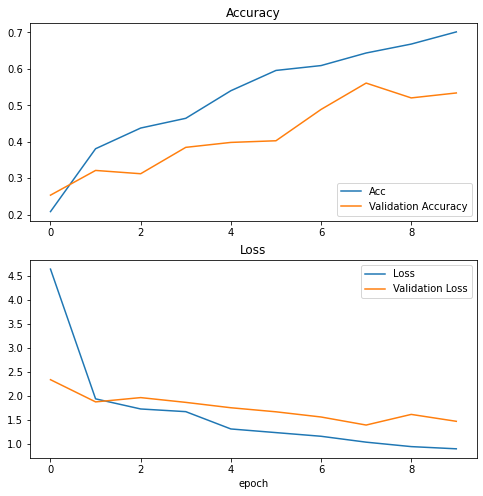

[I 2022-06-21 05:19:26,952] Trial 71 finished with value: 0.5510203838348389 and parameters: {'filters_l1': 10, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'relu', 'dropout_l1': 0.14180224037909656, 'filters_l2': 155, 'kernel_size_l2': 5, 'strides_l2': 2, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.3281223158517589, 'filters_l3': 118, 'kernel_size_l3': 7, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'elu', 'dropout_l3': 0.29045223538334947, 'n_units_l': 597, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.2881030328258565, 'learning_rate': 0.00032876287558734305, 'beta_1': 0.9282636176610556, 'beta_2': 0.9564520919458889, 'epsilon': 3.215251783734526e-07}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 597ms/step - loss: 5.2811 - accuracy: 0.2528 - val_loss: 2.1564 - val_accuracy: 0.1900 - lr: 0.0010
Epoch 2/10
29/29 [==============================] - 17s 571ms/step - loss: 1.8804 - accuracy: 0.3630 - val_loss: 1.8668 - val_accuracy: 0.2760 - lr: 0.0010
Epoch 3/10
29/29 [==============================] - 17s 560ms/step - loss: 1.5434 - accuracy: 0.4800 - val_loss: 1.9400 - val_accuracy: 0.2760 - lr: 0.0010
Epoch 4/10
29/29 [==============================] - 17s 575ms/step - loss: 1.2565 - accuracy: 0.5479 - val_loss: 1.8963 - val_accuracy: 0.3077 - lr: 0.0010
Epoch 5/10
29/29 [==============================] - 17s 566ms/step - loss: 1.0954 - accuracy: 0.6236 - val_loss: 1.9846 - val_accuracy: 0.2941 - lr: 0.0010
Epoch 6/10
29/29 [==============================] - 17s 578ms/step - loss: 0.8117 - accuracy: 0.6982 - val_loss: 1.6260 - val_accuracy: 0.3801 - lr: 0.0010
Epoch 7/10
29/29 [==============================] - 16s 574ms/st

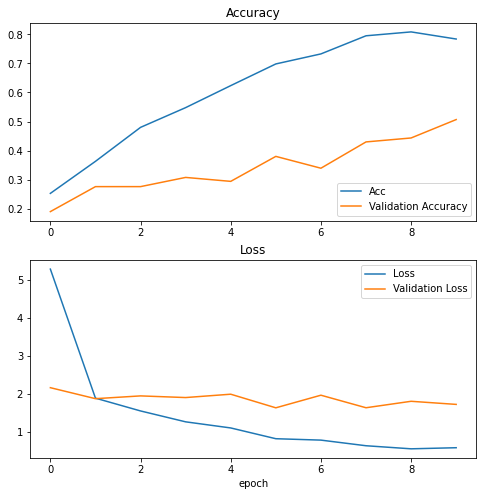

[I 2022-06-21 05:22:20,964] Trial 72 finished with value: 0.6122449040412903 and parameters: {'filters_l1': 7, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'relu', 'dropout_l1': 0.15534832817950753, 'filters_l2': 18, 'kernel_size_l2': 5, 'strides_l2': 2, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.3558674340744304, 'filters_l3': 142, 'kernel_size_l3': 7, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'elu', 'dropout_l3': 0.3255896456247479, 'n_units_l': 756, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.31881084610856175, 'learning_rate': 0.0010279866988712812, 'beta_1': 0.9343902114047757, 'beta_2': 0.944630906627618, 'epsilon': 5.746268851260423e-07}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 19s 606ms/step - loss: 9.0893 - accuracy: 0.1470 - val_loss: 2.1410 - val_accuracy: 0.1312 - lr: 6.8165e-04
Epoch 2/10
29/29 [==============================] - 17s 594ms/step - loss: 2.3889 - accuracy: 0.1592 - val_loss: 1.9350 - val_accuracy: 0.2986 - lr: 6.8165e-04
Epoch 3/10
29/29 [==============================] - 17s 576ms/step - loss: 2.1951 - accuracy: 0.2439 - val_loss: 1.8838 - val_accuracy: 0.3077 - lr: 6.8165e-04
Epoch 4/10
29/29 [==============================] - 17s 583ms/step - loss: 1.8474 - accuracy: 0.3775 - val_loss: 1.6490 - val_accuracy: 0.4072 - lr: 6.8165e-04
Epoch 5/10
29/29 [==============================] - 17s 575ms/step - loss: 1.5134 - accuracy: 0.4477 - val_loss: 1.7369 - val_accuracy: 0.3620 - lr: 6.8165e-04
Epoch 6/10
29/29 [==============================] - 17s 593ms/step - loss: 1.3229 - accuracy: 0.5523 - val_loss: 1.7606 - val_accuracy: 0.4389 - lr: 6.8165e-04
Epoch 7/10
29/29 [======================

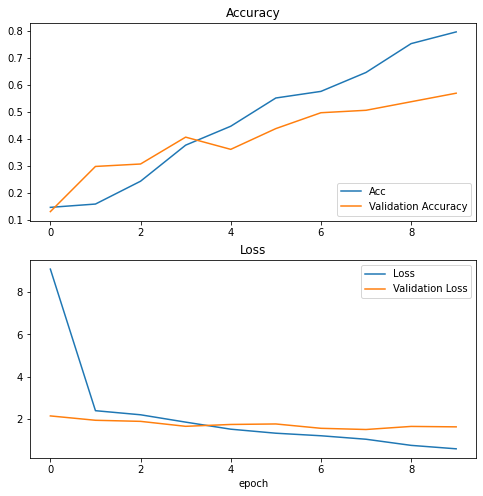

[I 2022-06-21 05:25:21,643] Trial 73 finished with value: 0.6020408272743225 and parameters: {'filters_l1': 113, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'relu', 'dropout_l1': 0.12530171403542198, 'filters_l2': 177, 'kernel_size_l2': 5, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.31730105988595864, 'filters_l3': 61, 'kernel_size_l3': 7, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'elu', 'dropout_l3': 0.2514959483057472, 'n_units_l': 300, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.3488928332373372, 'learning_rate': 0.0006816517214983662, 'beta_1': 0.9196170787674314, 'beta_2': 0.9475287612870248, 'epsilon': 1.1288489272101647e-07}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 584ms/step - loss: 4.4227 - accuracy: 0.2138 - val_loss: 2.3108 - val_accuracy: 0.2081 - lr: 4.4340e-04
Epoch 2/10
29/29 [==============================] - 17s 577ms/step - loss: 2.1910 - accuracy: 0.3196 - val_loss: 2.4326 - val_accuracy: 0.2398 - lr: 4.4340e-04
Epoch 3/10
29/29 [==============================] - 17s 571ms/step - loss: 1.8861 - accuracy: 0.3742 - val_loss: 1.9230 - val_accuracy: 0.2760 - lr: 4.4340e-04
Epoch 4/10
29/29 [==============================] - 17s 552ms/step - loss: 1.6611 - accuracy: 0.4410 - val_loss: 1.9079 - val_accuracy: 0.2986 - lr: 4.4340e-04
Epoch 5/10
29/29 [==============================] - 17s 578ms/step - loss: 1.6272 - accuracy: 0.4677 - val_loss: 1.7051 - val_accuracy: 0.4072 - lr: 4.4340e-04
Epoch 6/10
29/29 [==============================] - 17s 572ms/step - loss: 1.5571 - accuracy: 0.4610 - val_loss: 1.6653 - val_accuracy: 0.3937 - lr: 4.4340e-04
Epoch 7/10
29/29 [======================

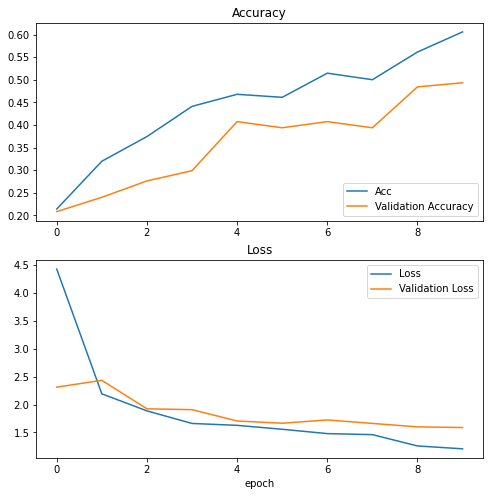

[I 2022-06-21 05:28:17,240] Trial 74 finished with value: 0.4591836631298065 and parameters: {'filters_l1': 38, 'kernel_size_l1': 3, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'relu', 'dropout_l1': 0.46721548632387166, 'filters_l2': 121, 'kernel_size_l2': 5, 'strides_l2': 2, 'padding_l2': 'valid', 'activation_l2': 'relu', 'dropout_l2': 0.36986736658243263, 'filters_l3': 92, 'kernel_size_l3': 7, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'elu', 'dropout_l3': 0.3384464884258102, 'n_units_l': 355, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.27185629277656653, 'learning_rate': 0.0004434013151225857, 'beta_1': 0.9248082180436324, 'beta_2': 0.9737694683601216, 'epsilon': 2.0463452230512492e-07}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 19s 598ms/step - loss: 3.6224 - accuracy: 0.2829 - val_loss: 1.9672 - val_accuracy: 0.1719 - lr: 2.1856e-04
Epoch 2/10
29/29 [==============================] - 17s 589ms/step - loss: 1.5773 - accuracy: 0.4376 - val_loss: 2.2069 - val_accuracy: 0.1674 - lr: 2.1856e-04
Epoch 3/10
29/29 [==============================] - 17s 577ms/step - loss: 1.4032 - accuracy: 0.4978 - val_loss: 1.7695 - val_accuracy: 0.4118 - lr: 2.1856e-04
Epoch 4/10
29/29 [==============================] - 17s 596ms/step - loss: 1.2487 - accuracy: 0.5702 - val_loss: 1.5103 - val_accuracy: 0.4661 - lr: 2.1856e-04
Epoch 5/10
29/29 [==============================] - 17s 574ms/step - loss: 1.1044 - accuracy: 0.6024 - val_loss: 1.5709 - val_accuracy: 0.4751 - lr: 2.1856e-04
Epoch 6/10
29/29 [==============================] - 17s 597ms/step - loss: 0.8988 - accuracy: 0.6882 - val_loss: 1.3997 - val_accuracy: 0.5339 - lr: 2.1856e-04
Epoch 7/10
29/29 [======================

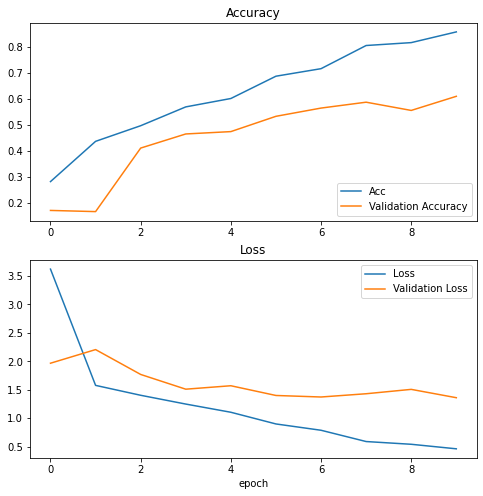

[I 2022-06-21 05:31:17,101] Trial 75 finished with value: 0.5612244606018066 and parameters: {'filters_l1': 139, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'relu', 'dropout_l1': 0.13903253286298262, 'filters_l2': 92, 'kernel_size_l2': 5, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.3005613709628445, 'filters_l3': 49, 'kernel_size_l3': 7, 'strides_l3': 2, 'padding_l3': 'same', 'activation_l3': 'linear', 'dropout_l3': 0.31010238104800725, 'n_units_l': 241, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.30163812967422504, 'learning_rate': 0.00021856079190426113, 'beta_1': 0.9643116969129848, 'beta_2': 0.9236123259546861, 'epsilon': 7.176703675941007e-07}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 585ms/step - loss: 4.6915 - accuracy: 0.2439 - val_loss: 2.8792 - val_accuracy: 0.2081 - lr: 1.3848e-04
Epoch 2/10
29/29 [==============================] - 17s 562ms/step - loss: 2.1097 - accuracy: 0.3853 - val_loss: 1.7854 - val_accuracy: 0.3620 - lr: 1.3848e-04
Epoch 3/10
29/29 [==============================] - 17s 582ms/step - loss: 1.4305 - accuracy: 0.5245 - val_loss: 1.7258 - val_accuracy: 0.4072 - lr: 1.3848e-04
Epoch 4/10
29/29 [==============================] - 17s 574ms/step - loss: 1.2354 - accuracy: 0.5824 - val_loss: 1.6013 - val_accuracy: 0.4344 - lr: 1.3848e-04
Epoch 5/10
29/29 [==============================] - 17s 566ms/step - loss: 0.9491 - accuracy: 0.6971 - val_loss: 1.6133 - val_accuracy: 0.4480 - lr: 1.3848e-04
Epoch 6/10
29/29 [==============================] - 17s 573ms/step - loss: 0.7543 - accuracy: 0.7305 - val_loss: 1.7696 - val_accuracy: 0.4344 - lr: 1.3848e-04
Epoch 7/10
29/29 [======================

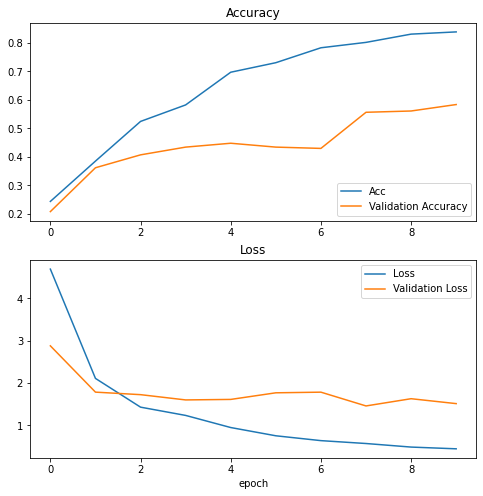

[I 2022-06-21 05:34:11,750] Trial 76 finished with value: 0.6836734414100647 and parameters: {'filters_l1': 4, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'linear', 'dropout_l1': 0.1108219893163077, 'filters_l2': 75, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.26572409764890315, 'filters_l3': 108, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.3517226472909493, 'n_units_l': 12, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.310901981138493, 'learning_rate': 0.00013848050499506556, 'beta_1': 0.9321388810702705, 'beta_2': 0.9628415024434196, 'epsilon': 1.9026936414508263e-08}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 17s 565ms/step - loss: 3.8711 - accuracy: 0.1915 - val_loss: 2.3101 - val_accuracy: 0.1629 - lr: 8.6415e-05
Epoch 2/10
29/29 [==============================] - 16s 571ms/step - loss: 2.8368 - accuracy: 0.2517 - val_loss: 2.0502 - val_accuracy: 0.2172 - lr: 8.6415e-05
Epoch 3/10
29/29 [==============================] - 16s 559ms/step - loss: 2.2996 - accuracy: 0.2739 - val_loss: 2.0212 - val_accuracy: 0.2579 - lr: 8.6415e-05
Epoch 4/10
29/29 [==============================] - 17s 575ms/step - loss: 2.0287 - accuracy: 0.3163 - val_loss: 1.8918 - val_accuracy: 0.2851 - lr: 8.6415e-05
Epoch 5/10
29/29 [==============================] - 17s 576ms/step - loss: 2.0041 - accuracy: 0.3051 - val_loss: 1.8791 - val_accuracy: 0.3122 - lr: 8.6415e-05
Epoch 6/10
29/29 [==============================] - 17s 570ms/step - loss: 1.9252 - accuracy: 0.3318 - val_loss: 1.8178 - val_accuracy: 0.3439 - lr: 8.6415e-05
Epoch 7/10
29/29 [======================

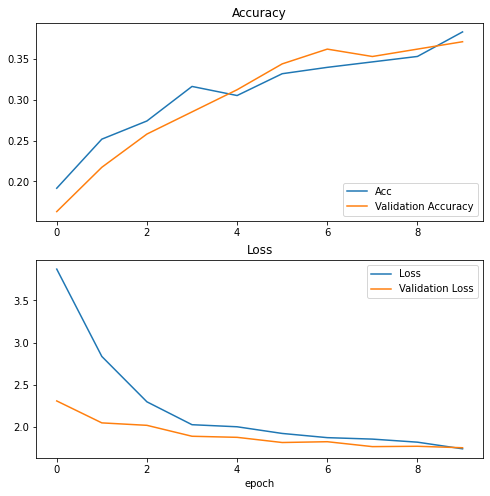

[I 2022-06-21 05:37:04,434] Trial 77 finished with value: 0.3469387888908386 and parameters: {'filters_l1': 4, 'kernel_size_l1': 7, 'strides_l1': 2, 'padding_l1': 'valid', 'activation_l1': 'linear', 'dropout_l1': 0.11168164835138673, 'filters_l2': 73, 'kernel_size_l2': 7, 'strides_l2': 2, 'padding_l2': 'same', 'activation_l2': 'linear', 'dropout_l2': 0.2769220229970686, 'filters_l3': 158, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.2683499969475293, 'n_units_l': 7, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.30813988896466443, 'learning_rate': 8.641532793923617e-05, 'beta_1': 0.9374020703971727, 'beta_2': 0.9708298818026354, 'epsilon': 1.85199864012499e-08}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 589ms/step - loss: 5.6691 - accuracy: 0.1748 - val_loss: 2.0745 - val_accuracy: 0.2127 - lr: 1.4089e-04
Epoch 2/10
29/29 [==============================] - 17s 575ms/step - loss: 1.6658 - accuracy: 0.4009 - val_loss: 2.0556 - val_accuracy: 0.1855 - lr: 1.4089e-04
Epoch 3/10
29/29 [==============================] - 17s 579ms/step - loss: 1.4537 - accuracy: 0.4688 - val_loss: 1.9117 - val_accuracy: 0.4027 - lr: 1.4089e-04
Epoch 4/10
29/29 [==============================] - 17s 578ms/step - loss: 1.2467 - accuracy: 0.5457 - val_loss: 1.6930 - val_accuracy: 0.4253 - lr: 1.4089e-04
Epoch 5/10
29/29 [==============================] - 17s 578ms/step - loss: 1.0210 - accuracy: 0.6292 - val_loss: 1.5204 - val_accuracy: 0.5475 - lr: 1.4089e-04
Epoch 6/10
29/29 [==============================] - 17s 579ms/step - loss: 0.8208 - accuracy: 0.6993 - val_loss: 1.4879 - val_accuracy: 0.5339 - lr: 1.4089e-04
Epoch 7/10
29/29 [======================

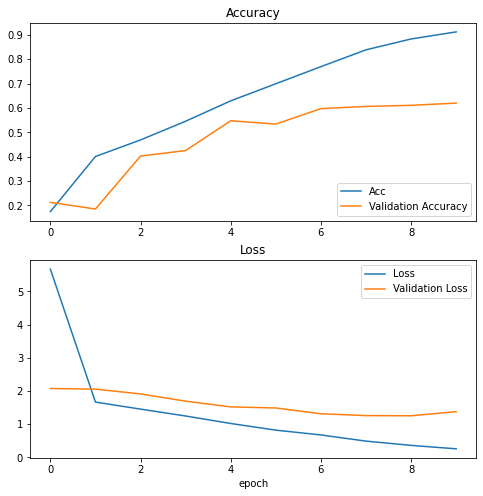

[I 2022-06-21 05:39:58,850] Trial 78 finished with value: 0.6632652878761292 and parameters: {'filters_l1': 61, 'kernel_size_l1': 5, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'linear', 'dropout_l1': 0.10506134065114746, 'filters_l2': 56, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'valid', 'activation_l2': 'relu', 'dropout_l2': 0.22495411890443184, 'filters_l3': 105, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'relu', 'dropout_l3': 0.3699989147117888, 'n_units_l': 17, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.174082780088482, 'learning_rate': 0.00014089208166046945, 'beta_1': 0.9501807718758724, 'beta_2': 0.9667954494638545, 'epsilon': 3.642268409386164e-08}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 588ms/step - loss: 4.8199 - accuracy: 0.1581 - val_loss: 2.5549 - val_accuracy: 0.1538 - lr: 4.1117e-05
Epoch 2/10
29/29 [==============================] - 17s 578ms/step - loss: 3.1248 - accuracy: 0.2249 - val_loss: 2.0901 - val_accuracy: 0.2353 - lr: 4.1117e-05
Epoch 3/10
29/29 [==============================] - 17s 586ms/step - loss: 2.3821 - accuracy: 0.2840 - val_loss: 1.9842 - val_accuracy: 0.2851 - lr: 4.1117e-05
Epoch 4/10
29/29 [==============================] - 17s 582ms/step - loss: 2.3083 - accuracy: 0.3252 - val_loss: 1.9019 - val_accuracy: 0.3122 - lr: 4.1117e-05
Epoch 5/10
29/29 [==============================] - 17s 577ms/step - loss: 2.0289 - accuracy: 0.3508 - val_loss: 1.7324 - val_accuracy: 0.3665 - lr: 4.1117e-05
Epoch 6/10
29/29 [==============================] - 17s 565ms/step - loss: 1.9217 - accuracy: 0.3987 - val_loss: 1.7355 - val_accuracy: 0.4027 - lr: 4.1117e-05
Epoch 7/10
29/29 [======================

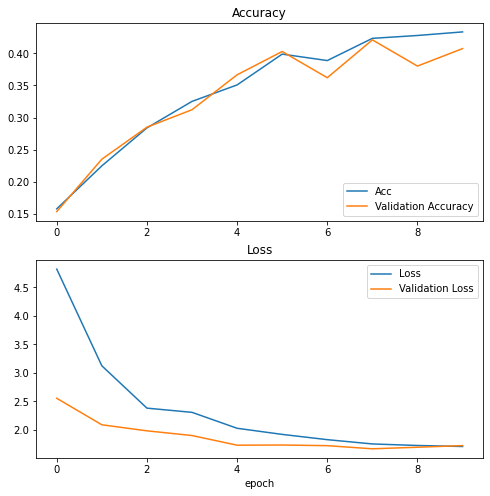

[I 2022-06-21 05:42:53,850] Trial 79 finished with value: 0.43877550959587097 and parameters: {'filters_l1': 50, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'linear', 'dropout_l1': 0.30859154691073576, 'filters_l2': 48, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.25814889494522875, 'filters_l3': 35, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.3892971336684069, 'n_units_l': 11, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.32298110911725036, 'learning_rate': 4.111747768412319e-05, 'beta_1': 0.932765519851638, 'beta_2': 0.9600051815651905, 'epsilon': 2.938023958579759e-08}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 576ms/step - loss: 4.2794 - accuracy: 0.2739 - val_loss: 2.1119 - val_accuracy: 0.3032 - lr: 2.9368e-04
Epoch 2/10
29/29 [==============================] - 17s 581ms/step - loss: 1.9229 - accuracy: 0.4811 - val_loss: 2.2068 - val_accuracy: 0.3484 - lr: 2.9368e-04
Epoch 3/10
29/29 [==============================] - 17s 572ms/step - loss: 1.5045 - accuracy: 0.5390 - val_loss: 2.0143 - val_accuracy: 0.3077 - lr: 2.9368e-04
Epoch 4/10
29/29 [==============================] - 17s 572ms/step - loss: 1.2194 - accuracy: 0.6192 - val_loss: 2.2795 - val_accuracy: 0.3439 - lr: 2.9368e-04
Epoch 5/10
29/29 [==============================] - 16s 573ms/step - loss: 0.9720 - accuracy: 0.6670 - val_loss: 1.7446 - val_accuracy: 0.4163 - lr: 2.9368e-04
Epoch 6/10
29/29 [==============================] - 16s 571ms/step - loss: 0.8904 - accuracy: 0.7016 - val_loss: 1.6489 - val_accuracy: 0.5023 - lr: 2.9368e-04
Epoch 7/10
29/29 [======================

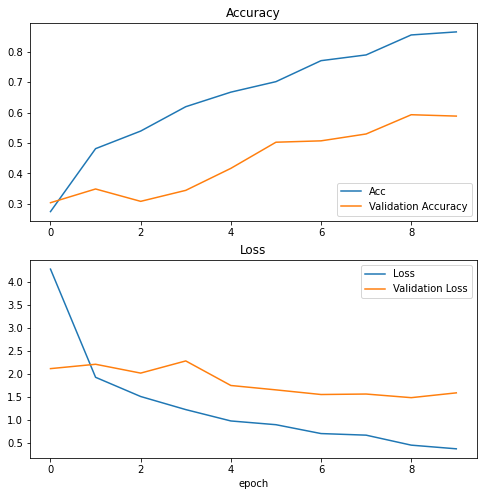

[I 2022-06-21 05:45:47,720] Trial 80 finished with value: 0.6326530575752258 and parameters: {'filters_l1': 5, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'linear', 'dropout_l1': 0.11827575164096864, 'filters_l2': 81, 'kernel_size_l2': 7, 'strides_l2': 2, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.3444746640468126, 'filters_l3': 118, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.35053583301144714, 'n_units_l': 44, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.28844192083473086, 'learning_rate': 0.0002936817729567808, 'beta_1': 0.9142048379629988, 'beta_2': 0.942040778249263, 'epsilon': 1.3874265512440189e-08}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 584ms/step - loss: 8.0698 - accuracy: 0.2795 - val_loss: 2.6561 - val_accuracy: 0.1991 - lr: 1.4718e-04
Epoch 2/10
29/29 [==============================] - 17s 590ms/step - loss: 2.3370 - accuracy: 0.4443 - val_loss: 2.2924 - val_accuracy: 0.2624 - lr: 1.4718e-04
Epoch 3/10
29/29 [==============================] - 16s 565ms/step - loss: 1.4257 - accuracy: 0.5646 - val_loss: 1.7814 - val_accuracy: 0.3665 - lr: 1.4718e-04
Epoch 4/10
29/29 [==============================] - 17s 584ms/step - loss: 0.8824 - accuracy: 0.7183 - val_loss: 1.7305 - val_accuracy: 0.4480 - lr: 1.4718e-04
Epoch 5/10
29/29 [==============================] - 16s 574ms/step - loss: 0.5879 - accuracy: 0.7862 - val_loss: 1.5733 - val_accuracy: 0.4661 - lr: 1.4718e-04
Epoch 6/10
29/29 [==============================] - 17s 583ms/step - loss: 0.4473 - accuracy: 0.8408 - val_loss: 1.6217 - val_accuracy: 0.5294 - lr: 1.4718e-04
Epoch 7/10
29/29 [======================

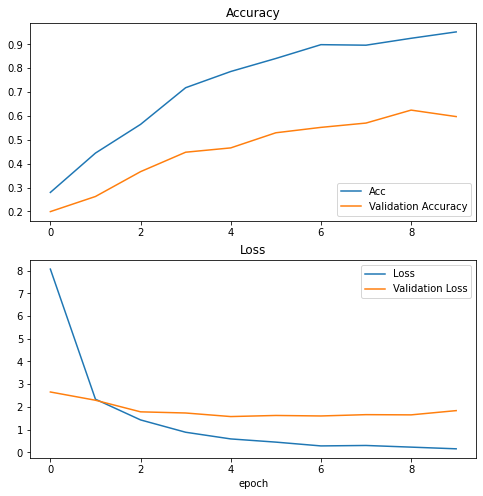

[I 2022-06-21 05:48:46,159] Trial 81 finished with value: 0.7346938848495483 and parameters: {'filters_l1': 6, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'linear', 'dropout_l1': 0.10114993576607155, 'filters_l2': 54, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.21925585389381042, 'filters_l3': 104, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.3688388286557005, 'n_units_l': 19, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.13520152712478056, 'learning_rate': 0.0001471847917930101, 'beta_1': 0.9549903704255166, 'beta_2': 0.9679614710162605, 'epsilon': 1.9316844018481326e-08}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 586ms/step - loss: 5.9275 - accuracy: 0.2617 - val_loss: 3.1531 - val_accuracy: 0.2624 - lr: 1.4107e-04
Epoch 2/10
29/29 [==============================] - 17s 569ms/step - loss: 2.3537 - accuracy: 0.4599 - val_loss: 2.4108 - val_accuracy: 0.2986 - lr: 1.4107e-04
Epoch 3/10
29/29 [==============================] - 17s 582ms/step - loss: 1.4181 - accuracy: 0.6013 - val_loss: 1.9420 - val_accuracy: 0.3710 - lr: 1.4107e-04
Epoch 4/10
29/29 [==============================] - 17s 567ms/step - loss: 1.0733 - accuracy: 0.6815 - val_loss: 1.9381 - val_accuracy: 0.4434 - lr: 1.4107e-04
Epoch 5/10
29/29 [==============================] - 17s 584ms/step - loss: 0.7727 - accuracy: 0.7584 - val_loss: 1.8369 - val_accuracy: 0.4932 - lr: 1.4107e-04
Epoch 6/10
29/29 [==============================] - 17s 553ms/step - loss: 0.5589 - accuracy: 0.8252 - val_loss: 1.7067 - val_accuracy: 0.5294 - lr: 1.4107e-04
Epoch 7/10
29/29 [======================

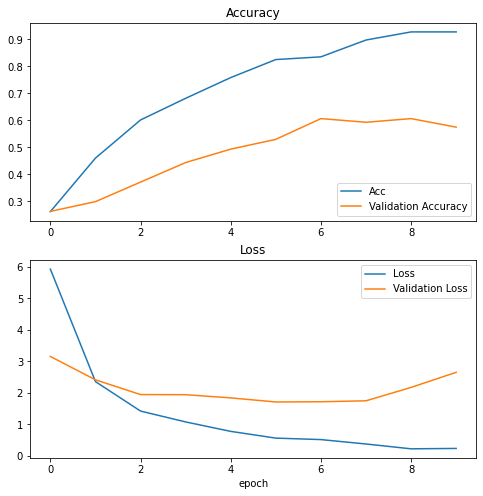

[I 2022-06-21 05:51:45,934] Trial 82 finished with value: 0.6836734414100647 and parameters: {'filters_l1': 61, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'linear', 'dropout_l1': 0.10080921023158032, 'filters_l2': 56, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.18479483265303628, 'filters_l3': 109, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.3740759997969067, 'n_units_l': 20, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.13935717911528112, 'learning_rate': 0.00014106879006837522, 'beta_1': 0.9687751906993718, 'beta_2': 0.9641201434056302, 'epsilon': 1.9766974258371965e-08}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 17s 583ms/step - loss: 4.9758 - accuracy: 0.3040 - val_loss: 2.6248 - val_accuracy: 0.1629 - lr: 1.0942e-04
Epoch 2/10
29/29 [==============================] - 16s 560ms/step - loss: 2.1935 - accuracy: 0.4332 - val_loss: 2.3361 - val_accuracy: 0.2760 - lr: 1.0942e-04
Epoch 3/10
29/29 [==============================] - 16s 571ms/step - loss: 1.5179 - accuracy: 0.5390 - val_loss: 1.8445 - val_accuracy: 0.3846 - lr: 1.0942e-04
Epoch 4/10
29/29 [==============================] - 17s 570ms/step - loss: 1.2930 - accuracy: 0.6169 - val_loss: 1.7435 - val_accuracy: 0.4615 - lr: 1.0942e-04
Epoch 5/10
29/29 [==============================] - 16s 571ms/step - loss: 0.8742 - accuracy: 0.7149 - val_loss: 1.8871 - val_accuracy: 0.4706 - lr: 1.0942e-04
Epoch 6/10
29/29 [==============================] - 16s 569ms/step - loss: 0.6458 - accuracy: 0.7929 - val_loss: 1.6624 - val_accuracy: 0.5747 - lr: 1.0942e-04
Epoch 7/10
29/29 [======================

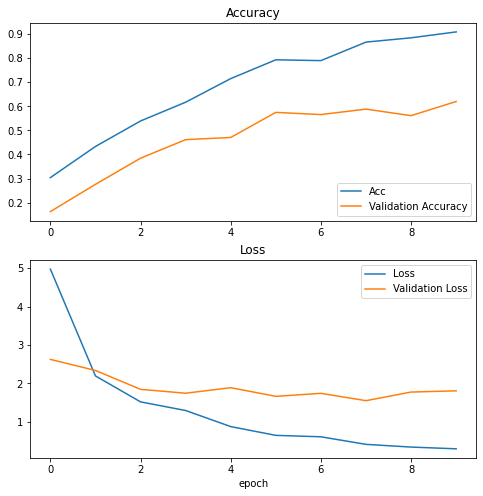

[I 2022-06-21 05:54:40,608] Trial 83 finished with value: 0.7244898080825806 and parameters: {'filters_l1': 6, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'linear', 'dropout_l1': 0.1043163819331474, 'filters_l2': 63, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.17184264738838265, 'filters_l3': 83, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.4070959218121692, 'n_units_l': 24, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.13556675323681527, 'learning_rate': 0.00010942421061637417, 'beta_1': 0.97675048062686, 'beta_2': 0.9637808868513934, 'epsilon': 1.9803763671321525e-08}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 17s 576ms/step - loss: 6.7244 - accuracy: 0.2584 - val_loss: 3.0585 - val_accuracy: 0.1267 - lr: 1.7120e-04
Epoch 2/10
29/29 [==============================] - 16s 564ms/step - loss: 2.9224 - accuracy: 0.3541 - val_loss: 2.3379 - val_accuracy: 0.3167 - lr: 1.7120e-04
Epoch 3/10
29/29 [==============================] - 17s 590ms/step - loss: 2.0978 - accuracy: 0.5056 - val_loss: 2.5189 - val_accuracy: 0.3484 - lr: 1.7120e-04
Epoch 4/10
29/29 [==============================] - 17s 570ms/step - loss: 1.4433 - accuracy: 0.6180 - val_loss: 2.5620 - val_accuracy: 0.3665 - lr: 1.7120e-04
Epoch 5/10
29/29 [==============================] - 17s 570ms/step - loss: 1.2253 - accuracy: 0.6759 - val_loss: 2.1009 - val_accuracy: 0.4299 - lr: 1.7120e-04
Epoch 6/10
29/29 [==============================] - 17s 570ms/step - loss: 0.9152 - accuracy: 0.7205 - val_loss: 2.1856 - val_accuracy: 0.4253 - lr: 1.7120e-04
Epoch 7/10
29/29 [======================

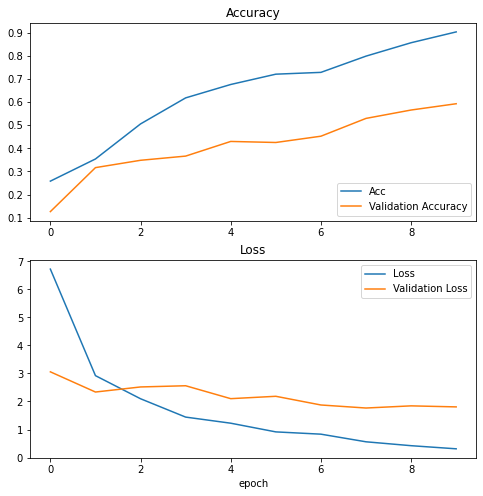

[I 2022-06-21 05:57:33,979] Trial 84 finished with value: 0.6632652878761292 and parameters: {'filters_l1': 6, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'linear', 'dropout_l1': 0.10368053976930493, 'filters_l2': 63, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.18042856577131353, 'filters_l3': 85, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.3232960630848925, 'n_units_l': 25, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.12656639800402775, 'learning_rate': 0.00017120251677767156, 'beta_1': 0.9840412288740207, 'beta_2': 0.976655715975045, 'epsilon': 1.9805803787213762e-08}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 570ms/step - loss: 6.1913 - accuracy: 0.2996 - val_loss: 2.8945 - val_accuracy: 0.1674 - lr: 1.0738e-04
Epoch 2/10
29/29 [==============================] - 17s 566ms/step - loss: 2.6833 - accuracy: 0.3964 - val_loss: 2.7698 - val_accuracy: 0.2489 - lr: 1.0738e-04
Epoch 3/10
29/29 [==============================] - 17s 578ms/step - loss: 2.1171 - accuracy: 0.4521 - val_loss: 1.9322 - val_accuracy: 0.3982 - lr: 1.0738e-04
Epoch 4/10
29/29 [==============================] - 16s 553ms/step - loss: 1.7075 - accuracy: 0.5479 - val_loss: 2.0901 - val_accuracy: 0.3710 - lr: 1.0738e-04
Epoch 5/10
29/29 [==============================] - 17s 575ms/step - loss: 1.1716 - accuracy: 0.6347 - val_loss: 2.0089 - val_accuracy: 0.4027 - lr: 1.0738e-04
Epoch 6/10
29/29 [==============================] - 16s 574ms/step - loss: 0.8633 - accuracy: 0.7283 - val_loss: 1.7215 - val_accuracy: 0.4977 - lr: 1.0738e-04
Epoch 7/10
29/29 [======================

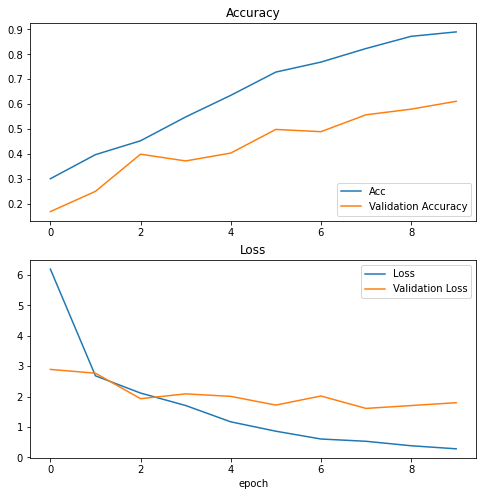

[I 2022-06-21 06:00:27,821] Trial 85 finished with value: 0.6530612111091614 and parameters: {'filters_l1': 6, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'linear', 'dropout_l1': 0.11514565071249591, 'filters_l2': 53, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.21066293276295425, 'filters_l3': 134, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.3613233039295265, 'n_units_l': 12, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.14389150262555248, 'learning_rate': 0.00010737752812182545, 'beta_1': 0.9772577131448549, 'beta_2': 0.9629827065954749, 'epsilon': 2.4773843852310912e-08}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 576ms/step - loss: 5.3590 - accuracy: 0.2973 - val_loss: 3.6578 - val_accuracy: 0.2805 - lr: 1.2844e-04
Epoch 2/10
29/29 [==============================] - 17s 568ms/step - loss: 2.5053 - accuracy: 0.4187 - val_loss: 3.6200 - val_accuracy: 0.2081 - lr: 1.2844e-04
Epoch 3/10
29/29 [==============================] - 16s 576ms/step - loss: 1.9449 - accuracy: 0.5423 - val_loss: 2.7011 - val_accuracy: 0.3620 - lr: 1.2844e-04
Epoch 4/10
29/29 [==============================] - 17s 576ms/step - loss: 1.6114 - accuracy: 0.6325 - val_loss: 2.2658 - val_accuracy: 0.3801 - lr: 1.2844e-04
Epoch 5/10
29/29 [==============================] - 17s 581ms/step - loss: 1.2165 - accuracy: 0.6915 - val_loss: 2.1427 - val_accuracy: 0.4299 - lr: 1.2844e-04
Epoch 6/10
29/29 [==============================] - 17s 571ms/step - loss: 1.0124 - accuracy: 0.7416 - val_loss: 2.5420 - val_accuracy: 0.4253 - lr: 1.2844e-04
Epoch 7/10
29/29 [======================

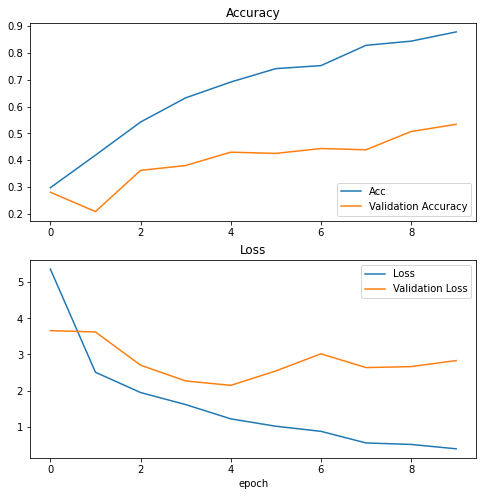

[I 2022-06-21 06:03:21,401] Trial 86 finished with value: 0.5918367505073547 and parameters: {'filters_l1': 5, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'linear', 'dropout_l1': 0.13247068231410694, 'filters_l2': 67, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.1560857726839468, 'filters_l3': 97, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.4043430584563716, 'n_units_l': 23, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.11919917411296926, 'learning_rate': 0.0001284393116923543, 'beta_1': 0.9877754684215824, 'beta_2': 0.9638901848012009, 'epsilon': 1.5154735494864994e-08}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 581ms/step - loss: 3.3507 - accuracy: 0.2784 - val_loss: 2.1431 - val_accuracy: 0.2308 - lr: 7.4988e-05
Epoch 2/10
29/29 [==============================] - 16s 560ms/step - loss: 1.7573 - accuracy: 0.4477 - val_loss: 1.7370 - val_accuracy: 0.3846 - lr: 7.4988e-05
Epoch 3/10
29/29 [==============================] - 16s 587ms/step - loss: 1.4834 - accuracy: 0.4922 - val_loss: 1.7587 - val_accuracy: 0.4027 - lr: 7.4988e-05
Epoch 4/10
29/29 [==============================] - 17s 583ms/step - loss: 1.2214 - accuracy: 0.5980 - val_loss: 1.5821 - val_accuracy: 0.4344 - lr: 7.4988e-05
Epoch 5/10
29/29 [==============================] - 17s 572ms/step - loss: 0.9644 - accuracy: 0.6615 - val_loss: 1.5394 - val_accuracy: 0.4887 - lr: 7.4988e-05
Epoch 6/10
29/29 [==============================] - 17s 582ms/step - loss: 0.9007 - accuracy: 0.6860 - val_loss: 1.5419 - val_accuracy: 0.5204 - lr: 7.4988e-05
Epoch 7/10
29/29 [======================

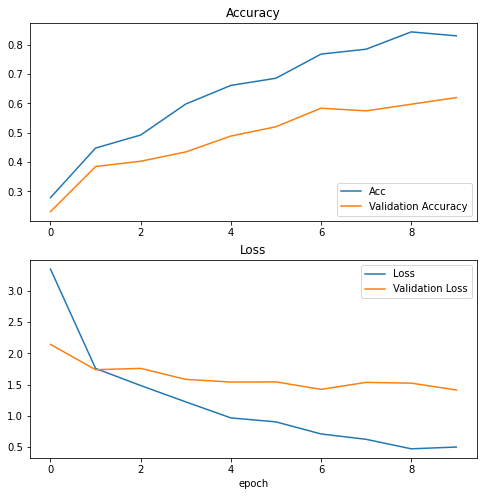

[I 2022-06-21 06:06:15,548] Trial 87 finished with value: 0.6836734414100647 and parameters: {'filters_l1': 8, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'linear', 'dropout_l1': 0.10001429328436373, 'filters_l2': 91, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.19368942835739217, 'filters_l3': 82, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.4495448827762816, 'n_units_l': 12, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.15467802153972962, 'learning_rate': 7.498810637850111e-05, 'beta_1': 0.9733257594077691, 'beta_2': 0.9700176365937754, 'epsilon': 2.3772914786154757e-08}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 17s 583ms/step - loss: 3.7412 - accuracy: 0.2283 - val_loss: 2.4390 - val_accuracy: 0.1765 - lr: 1.7589e-04
Epoch 2/10
29/29 [==============================] - 17s 570ms/step - loss: 2.3093 - accuracy: 0.2795 - val_loss: 2.1117 - val_accuracy: 0.2036 - lr: 1.7589e-04
Epoch 3/10
29/29 [==============================] - 16s 576ms/step - loss: 1.9942 - accuracy: 0.3452 - val_loss: 1.7662 - val_accuracy: 0.3846 - lr: 1.7589e-04
Epoch 4/10
29/29 [==============================] - 16s 577ms/step - loss: 1.7861 - accuracy: 0.4287 - val_loss: 1.8950 - val_accuracy: 0.3077 - lr: 1.7589e-04
Epoch 5/10
29/29 [==============================] - 17s 580ms/step - loss: 1.6574 - accuracy: 0.4454 - val_loss: 1.6628 - val_accuracy: 0.4072 - lr: 1.7589e-04
Epoch 6/10
29/29 [==============================] - 16s 577ms/step - loss: 1.5831 - accuracy: 0.4989 - val_loss: 1.6407 - val_accuracy: 0.4118 - lr: 1.7589e-04
Epoch 7/10
29/29 [======================

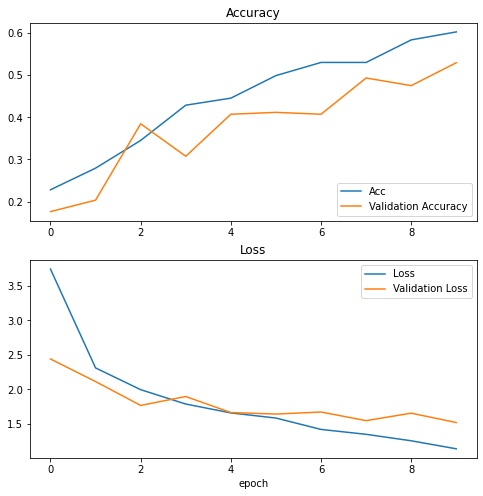

[I 2022-06-21 06:09:08,715] Trial 88 finished with value: 0.5204081535339355 and parameters: {'filters_l1': 4, 'kernel_size_l1': 7, 'strides_l1': 2, 'padding_l1': 'valid', 'activation_l1': 'linear', 'dropout_l1': 0.12577139444959892, 'filters_l2': 104, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.17026274533523342, 'filters_l3': 114, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.4092201544838887, 'n_units_l': 9, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.13712688025575362, 'learning_rate': 0.00017588638689664226, 'beta_1': 0.9623014669561468, 'beta_2': 0.9729561262227139, 'epsilon': 1.076648391600939e-08}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 583ms/step - loss: 3.4673 - accuracy: 0.2339 - val_loss: 2.1645 - val_accuracy: 0.1719 - lr: 2.6914e-05
Epoch 2/10
29/29 [==============================] - 16s 575ms/step - loss: 2.3248 - accuracy: 0.3664 - val_loss: 1.8628 - val_accuracy: 0.3077 - lr: 2.6914e-05
Epoch 3/10
29/29 [==============================] - 16s 571ms/step - loss: 1.7442 - accuracy: 0.4432 - val_loss: 1.8499 - val_accuracy: 0.3439 - lr: 2.6914e-05
Epoch 4/10
29/29 [==============================] - 17s 574ms/step - loss: 1.5997 - accuracy: 0.4733 - val_loss: 1.6694 - val_accuracy: 0.3846 - lr: 2.6914e-05
Epoch 5/10
29/29 [==============================] - 17s 569ms/step - loss: 1.4752 - accuracy: 0.5111 - val_loss: 1.6532 - val_accuracy: 0.4344 - lr: 2.6914e-05
Epoch 6/10
29/29 [==============================] - 16s 562ms/step - loss: 1.2918 - accuracy: 0.5512 - val_loss: 1.5759 - val_accuracy: 0.4525 - lr: 2.6914e-05
Epoch 7/10
29/29 [======================

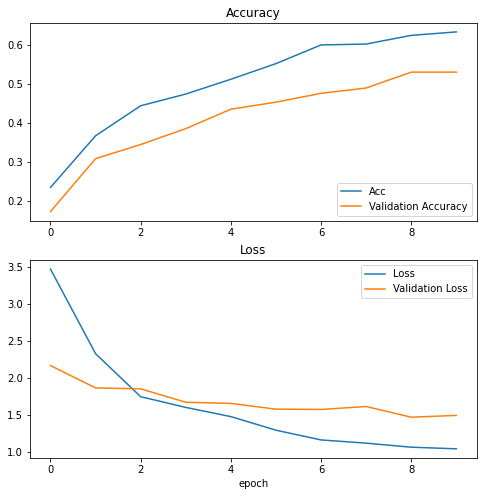

[I 2022-06-21 06:12:03,039] Trial 89 finished with value: 0.5714285969734192 and parameters: {'filters_l1': 8, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'linear', 'dropout_l1': 0.10293056700328194, 'filters_l2': 85, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.19947475999505337, 'filters_l3': 64, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.4499636094802858, 'n_units_l': 20, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.16694112052432872, 'learning_rate': 2.6913716736042883e-05, 'beta_1': 0.967365444804197, 'beta_2': 0.9816872242883974, 'epsilon': 2.4210368754901102e-08}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 584ms/step - loss: 4.0299 - accuracy: 0.2439 - val_loss: 2.0318 - val_accuracy: 0.2624 - lr: 1.0510e-04
Epoch 2/10
29/29 [==============================] - 17s 571ms/step - loss: 2.2131 - accuracy: 0.3775 - val_loss: 2.1517 - val_accuracy: 0.2896 - lr: 1.0510e-04
Epoch 3/10
29/29 [==============================] - 17s 577ms/step - loss: 1.8547 - accuracy: 0.4722 - val_loss: 2.3264 - val_accuracy: 0.3213 - lr: 1.0510e-04
Epoch 4/10
29/29 [==============================] - 17s 580ms/step - loss: 1.3896 - accuracy: 0.5980 - val_loss: 1.9641 - val_accuracy: 0.4072 - lr: 1.0510e-04
Epoch 5/10
29/29 [==============================] - 17s 568ms/step - loss: 1.1808 - accuracy: 0.6514 - val_loss: 1.5777 - val_accuracy: 0.4796 - lr: 1.0510e-04
Epoch 6/10
29/29 [==============================] - 17s 579ms/step - loss: 0.9471 - accuracy: 0.6993 - val_loss: 1.5967 - val_accuracy: 0.4932 - lr: 1.0510e-04
Epoch 7/10
29/29 [======================

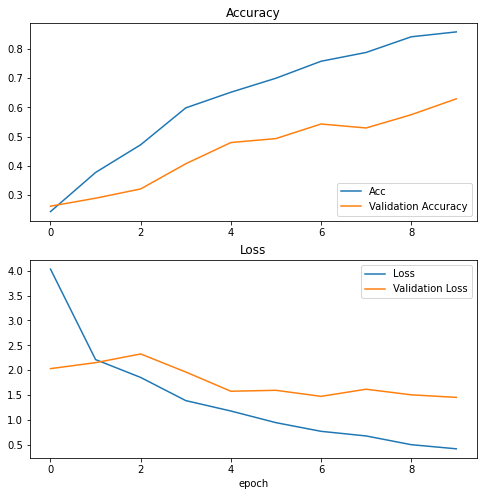

[I 2022-06-21 06:14:58,451] Trial 90 finished with value: 0.7448979616165161 and parameters: {'filters_l1': 9, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'linear', 'dropout_l1': 0.10105393257831619, 'filters_l2': 123, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.12138330759823132, 'filters_l3': 80, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.4499371709648843, 'n_units_l': 15, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.12097452288005044, 'learning_rate': 0.00010510208377507647, 'beta_1': 0.9764294219782224, 'beta_2': 0.9698747635043098, 'epsilon': 3.719118694274291e-08}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 575ms/step - loss: 3.4773 - accuracy: 0.3263 - val_loss: 2.0513 - val_accuracy: 0.3303 - lr: 5.2449e-05
Epoch 2/10
29/29 [==============================] - 17s 580ms/step - loss: 1.7322 - accuracy: 0.5212 - val_loss: 1.7507 - val_accuracy: 0.3937 - lr: 5.2449e-05
Epoch 3/10
29/29 [==============================] - 17s 572ms/step - loss: 1.1306 - accuracy: 0.6414 - val_loss: 1.7706 - val_accuracy: 0.4253 - lr: 5.2449e-05
Epoch 4/10
29/29 [==============================] - 17s 573ms/step - loss: 0.9692 - accuracy: 0.6815 - val_loss: 1.7101 - val_accuracy: 0.4434 - lr: 5.2449e-05
Epoch 5/10
29/29 [==============================] - 17s 585ms/step - loss: 0.7868 - accuracy: 0.7227 - val_loss: 1.5537 - val_accuracy: 0.5113 - lr: 5.2449e-05
Epoch 6/10
29/29 [==============================] - 17s 574ms/step - loss: 0.5771 - accuracy: 0.7773 - val_loss: 1.7483 - val_accuracy: 0.4570 - lr: 5.2449e-05
Epoch 7/10
29/29 [======================

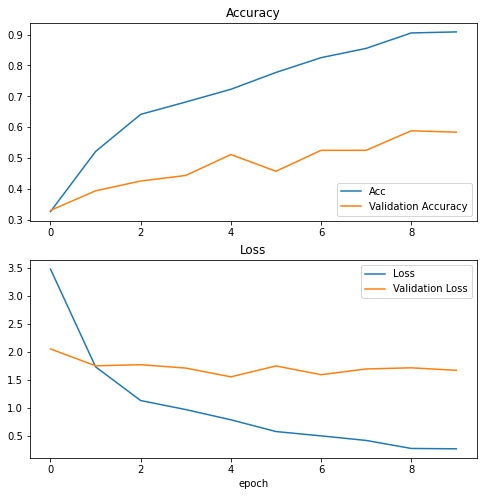

[I 2022-06-21 06:17:53,809] Trial 91 finished with value: 0.704081654548645 and parameters: {'filters_l1': 9, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'linear', 'dropout_l1': 0.10110102189409713, 'filters_l2': 125, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.11503998651873036, 'filters_l3': 84, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.4606229867064231, 'n_units_l': 37, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.10798788652419612, 'learning_rate': 5.244900767203106e-05, 'beta_1': 0.9712201403846824, 'beta_2': 0.9687937133643382, 'epsilon': 2.101607597943906e-08}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 574ms/step - loss: 4.3933 - accuracy: 0.2706 - val_loss: 2.1300 - val_accuracy: 0.2941 - lr: 4.5792e-05
Epoch 2/10
29/29 [==============================] - 17s 578ms/step - loss: 2.2765 - accuracy: 0.4699 - val_loss: 2.4727 - val_accuracy: 0.3122 - lr: 4.5792e-05
Epoch 3/10
29/29 [==============================] - 16s 569ms/step - loss: 1.6173 - accuracy: 0.5579 - val_loss: 1.7857 - val_accuracy: 0.4027 - lr: 4.5792e-05
Epoch 4/10
29/29 [==============================] - 16s 570ms/step - loss: 1.1341 - accuracy: 0.6537 - val_loss: 2.2678 - val_accuracy: 0.3258 - lr: 4.5792e-05
Epoch 5/10
29/29 [==============================] - 16s 577ms/step - loss: 1.0141 - accuracy: 0.6882 - val_loss: 1.9459 - val_accuracy: 0.4208 - lr: 4.5792e-05
Epoch 6/10
29/29 [==============================] - 17s 570ms/step - loss: 0.6649 - accuracy: 0.7717 - val_loss: 1.7077 - val_accuracy: 0.4706 - lr: 4.5792e-05
Epoch 7/10
29/29 [======================

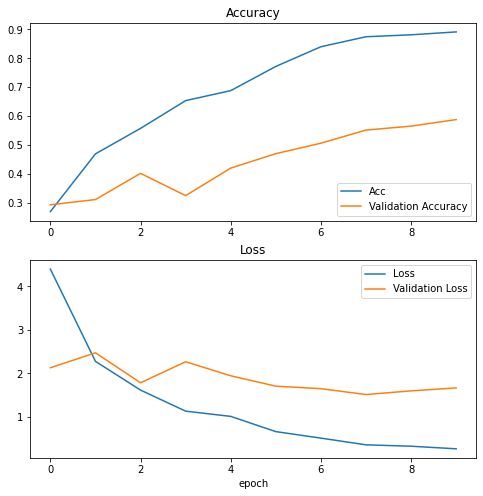

[I 2022-06-21 06:20:47,762] Trial 92 finished with value: 0.6734693646430969 and parameters: {'filters_l1': 11, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'linear', 'dropout_l1': 0.12060882684207501, 'filters_l2': 49, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.11978991394060001, 'filters_l3': 91, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.4662182002831698, 'n_units_l': 40, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.10327076068450144, 'learning_rate': 4.5791671710906734e-05, 'beta_1': 0.9699776307998629, 'beta_2': 0.9675614828259552, 'epsilon': 2.1141340914746316e-08}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 580ms/step - loss: 4.2864 - accuracy: 0.2895 - val_loss: 1.9977 - val_accuracy: 0.3032 - lr: 7.5609e-05
Epoch 2/10
29/29 [==============================] - 17s 571ms/step - loss: 2.1092 - accuracy: 0.4198 - val_loss: 2.3191 - val_accuracy: 0.2489 - lr: 7.5609e-05
Epoch 3/10
29/29 [==============================] - 17s 567ms/step - loss: 1.6256 - accuracy: 0.5234 - val_loss: 2.0540 - val_accuracy: 0.2851 - lr: 7.5609e-05
Epoch 4/10
29/29 [==============================] - 17s 576ms/step - loss: 1.2882 - accuracy: 0.6114 - val_loss: 1.8658 - val_accuracy: 0.3575 - lr: 7.5609e-05
Epoch 5/10
29/29 [==============================] - 17s 585ms/step - loss: 1.0755 - accuracy: 0.6837 - val_loss: 1.9418 - val_accuracy: 0.4072 - lr: 7.5609e-05
Epoch 6/10
29/29 [==============================] - 17s 582ms/step - loss: 0.8902 - accuracy: 0.7216 - val_loss: 1.8149 - val_accuracy: 0.4027 - lr: 7.5609e-05
Epoch 7/10
29/29 [======================

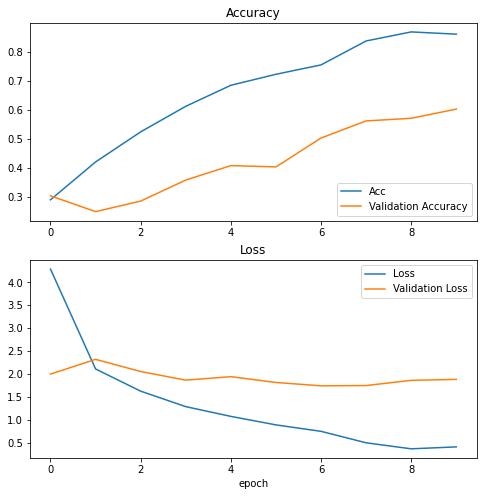

[I 2022-06-21 06:23:42,281] Trial 93 finished with value: 0.6632652878761292 and parameters: {'filters_l1': 9, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'linear', 'dropout_l1': 0.13495258204488475, 'filters_l2': 125, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.10817585798633217, 'filters_l3': 81, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.47949355230843715, 'n_units_l': 27, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.11412027014424575, 'learning_rate': 7.56091515568979e-05, 'beta_1': 0.9765916101329154, 'beta_2': 0.9707309396795428, 'epsilon': 3.651903677573332e-08}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 553ms/step - loss: 5.5299 - accuracy: 0.2394 - val_loss: 2.6456 - val_accuracy: 0.2851 - lr: 5.3245e-05
Epoch 2/10
29/29 [==============================] - 17s 571ms/step - loss: 2.4897 - accuracy: 0.4120 - val_loss: 2.2538 - val_accuracy: 0.2534 - lr: 5.3245e-05
Epoch 3/10
29/29 [==============================] - 16s 572ms/step - loss: 1.7607 - accuracy: 0.4989 - val_loss: 2.3477 - val_accuracy: 0.3167 - lr: 5.3245e-05
Epoch 4/10
29/29 [==============================] - 17s 574ms/step - loss: 1.3697 - accuracy: 0.5857 - val_loss: 2.1980 - val_accuracy: 0.3846 - lr: 5.3245e-05
Epoch 5/10
29/29 [==============================] - 17s 579ms/step - loss: 1.1773 - accuracy: 0.6425 - val_loss: 1.8435 - val_accuracy: 0.4299 - lr: 5.3245e-05
Epoch 6/10
29/29 [==============================] - 17s 580ms/step - loss: 1.0008 - accuracy: 0.6960 - val_loss: 2.0037 - val_accuracy: 0.4118 - lr: 5.3245e-05
Epoch 7/10
29/29 [======================

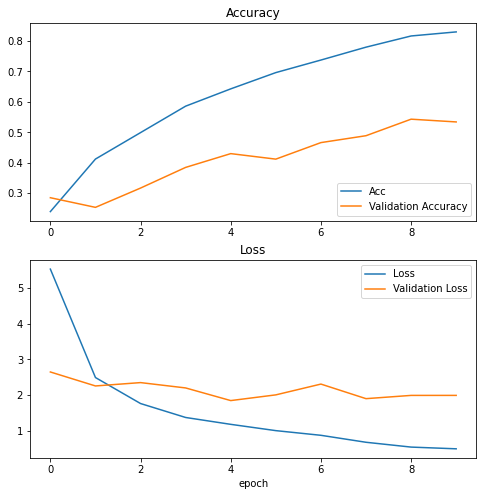

[I 2022-06-21 06:26:36,414] Trial 94 finished with value: 0.6020408272743225 and parameters: {'filters_l1': 8, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'linear', 'dropout_l1': 0.11111366264104923, 'filters_l2': 103, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.14700450584491093, 'filters_l3': 72, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.4400665976978132, 'n_units_l': 36, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.15444286482826156, 'learning_rate': 5.32448415280286e-05, 'beta_1': 0.9734870277401455, 'beta_2': 0.975587802272778, 'epsilon': 2.8822732275896412e-08}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 583ms/step - loss: 3.2863 - accuracy: 0.2829 - val_loss: 2.6235 - val_accuracy: 0.2443 - lr: 9.9494e-05
Epoch 2/10
29/29 [==============================] - 17s 577ms/step - loss: 1.8311 - accuracy: 0.4376 - val_loss: 2.0091 - val_accuracy: 0.2670 - lr: 9.9494e-05
Epoch 3/10
29/29 [==============================] - 17s 571ms/step - loss: 1.6105 - accuracy: 0.4822 - val_loss: 1.9809 - val_accuracy: 0.3258 - lr: 9.9494e-05
Epoch 4/10
29/29 [==============================] - 17s 577ms/step - loss: 1.3495 - accuracy: 0.5512 - val_loss: 1.7923 - val_accuracy: 0.4027 - lr: 9.9494e-05
Epoch 5/10
29/29 [==============================] - 17s 576ms/step - loss: 1.2060 - accuracy: 0.6214 - val_loss: 1.6887 - val_accuracy: 0.4434 - lr: 9.9494e-05
Epoch 6/10
29/29 [==============================] - 17s 571ms/step - loss: 0.9411 - accuracy: 0.6927 - val_loss: 1.7264 - val_accuracy: 0.4434 - lr: 9.9494e-05
Epoch 7/10
29/29 [======================

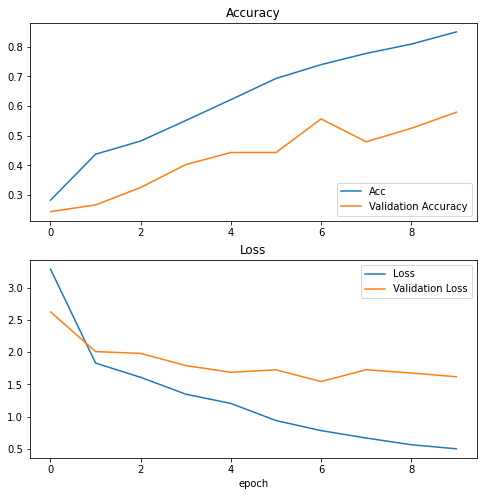

[I 2022-06-21 06:29:30,916] Trial 95 finished with value: 0.6632652878761292 and parameters: {'filters_l1': 9, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'linear', 'dropout_l1': 0.11940744976350202, 'filters_l2': 93, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.1464902817726732, 'filters_l3': 56, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.46235489350225306, 'n_units_l': 15, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.12820228477082427, 'learning_rate': 9.94938193201086e-05, 'beta_1': 0.9886024433307116, 'beta_2': 0.9684577983812848, 'epsilon': 1.595543584613817e-08}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 560ms/step - loss: 3.7155 - accuracy: 0.2773 - val_loss: 2.0751 - val_accuracy: 0.2353 - lr: 6.8253e-05
Epoch 2/10
29/29 [==============================] - 17s 580ms/step - loss: 2.0241 - accuracy: 0.3775 - val_loss: 2.1753 - val_accuracy: 0.2624 - lr: 6.8253e-05
Epoch 3/10
29/29 [==============================] - 17s 568ms/step - loss: 1.6740 - accuracy: 0.4677 - val_loss: 2.1551 - val_accuracy: 0.3575 - lr: 6.8253e-05
Epoch 4/10
29/29 [==============================] - 17s 581ms/step - loss: 1.5631 - accuracy: 0.4978 - val_loss: 1.9202 - val_accuracy: 0.3620 - lr: 6.8253e-05
Epoch 5/10
29/29 [==============================] - 17s 570ms/step - loss: 1.2491 - accuracy: 0.5935 - val_loss: 2.0747 - val_accuracy: 0.3665 - lr: 6.8253e-05
Epoch 6/10
29/29 [==============================] - 17s 582ms/step - loss: 1.1388 - accuracy: 0.6303 - val_loss: 2.0000 - val_accuracy: 0.3529 - lr: 6.8253e-05
Epoch 7/10
29/29 [======================

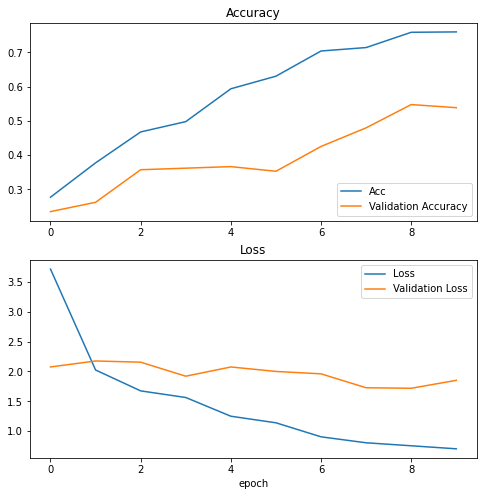

[I 2022-06-21 06:32:29,157] Trial 96 finished with value: 0.5612244606018066 and parameters: {'filters_l1': 10, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'linear', 'dropout_l1': 0.26480467688547926, 'filters_l2': 129, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.12835677219801564, 'filters_l3': 80, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.4235668847093534, 'n_units_l': 14, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.117322286676729, 'learning_rate': 6.82528906434165e-05, 'beta_1': 0.981968511109685, 'beta_2': 0.9696599321681814, 'epsilon': 5.300742362287741e-07}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 578ms/step - loss: 16.5996 - accuracy: 0.2984 - val_loss: 6.7579 - val_accuracy: 0.2624 - lr: 5.0941e-04
Epoch 2/10
29/29 [==============================] - 17s 575ms/step - loss: 4.2266 - accuracy: 0.4811 - val_loss: 3.1221 - val_accuracy: 0.3529 - lr: 5.0941e-04
Epoch 3/10
29/29 [==============================] - 17s 576ms/step - loss: 2.3029 - accuracy: 0.4454 - val_loss: 1.8480 - val_accuracy: 0.3529 - lr: 5.0941e-04
Epoch 4/10
29/29 [==============================] - 17s 569ms/step - loss: 1.6648 - accuracy: 0.5334 - val_loss: 1.6688 - val_accuracy: 0.4253 - lr: 5.0941e-04
Epoch 5/10
29/29 [==============================] - 17s 568ms/step - loss: 1.1864 - accuracy: 0.6503 - val_loss: 1.5716 - val_accuracy: 0.4299 - lr: 5.0941e-04
Epoch 6/10
29/29 [==============================] - 17s 574ms/step - loss: 0.8140 - accuracy: 0.7372 - val_loss: 1.3623 - val_accuracy: 0.5611 - lr: 5.0941e-04
Epoch 7/10
29/29 [=====================

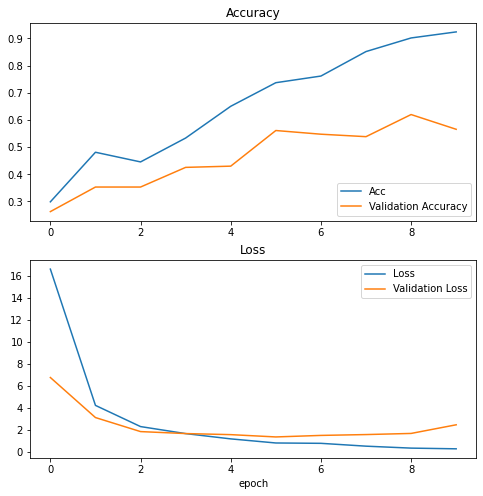

[I 2022-06-21 06:35:23,182] Trial 97 finished with value: 0.6530612111091614 and parameters: {'filters_l1': 31, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'elu', 'dropout_l1': 0.10074117683115667, 'filters_l2': 64, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.12328559392773944, 'filters_l3': 96, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.4885024596832217, 'n_units_l': 60, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.13701295348965759, 'learning_rate': 0.0005094059248491661, 'beta_1': 0.9699055387756398, 'beta_2': 0.964327758125062, 'epsilon': 8.952817144271954e-07}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 579ms/step - loss: 3.8549 - accuracy: 0.2004 - val_loss: 2.0694 - val_accuracy: 0.1674 - lr: 3.1014e-05
Epoch 2/10
29/29 [==============================] - 17s 585ms/step - loss: 2.6650 - accuracy: 0.2895 - val_loss: 2.0671 - val_accuracy: 0.1765 - lr: 3.1014e-05
Epoch 3/10
29/29 [==============================] - 17s 582ms/step - loss: 2.2272 - accuracy: 0.3174 - val_loss: 1.8202 - val_accuracy: 0.3032 - lr: 3.1014e-05
Epoch 4/10
29/29 [==============================] - 16s 565ms/step - loss: 1.8980 - accuracy: 0.3719 - val_loss: 1.7657 - val_accuracy: 0.3032 - lr: 3.1014e-05
Epoch 5/10
29/29 [==============================] - 16s 553ms/step - loss: 1.8195 - accuracy: 0.3886 - val_loss: 1.6706 - val_accuracy: 0.3801 - lr: 3.1014e-05
Epoch 6/10
29/29 [==============================] - 17s 571ms/step - loss: 1.6495 - accuracy: 0.4098 - val_loss: 1.6338 - val_accuracy: 0.4072 - lr: 3.1014e-05
Epoch 7/10
29/29 [======================

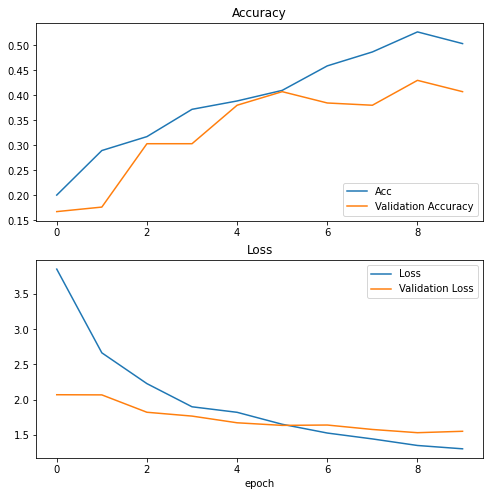

[I 2022-06-21 06:38:16,711] Trial 98 finished with value: 0.5102040767669678 and parameters: {'filters_l1': 13, 'kernel_size_l1': 3, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'linear', 'dropout_l1': 0.14705494975097236, 'filters_l2': 85, 'kernel_size_l2': 3, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'elu', 'dropout_l2': 0.10257464098160674, 'filters_l3': 70, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.47427290366570757, 'n_units_l': 8, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.1600076045041321, 'learning_rate': 3.101448390048911e-05, 'beta_1': 0.9850481242823029, 'beta_2': 0.9749285830777169, 'epsilon': 3.488203021332186e-08}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 564ms/step - loss: 13.4639 - accuracy: 0.2906 - val_loss: 4.7542 - val_accuracy: 0.1538 - lr: 2.5582e-04
Epoch 2/10
29/29 [==============================] - 17s 580ms/step - loss: 6.5625 - accuracy: 0.3909 - val_loss: 3.3937 - val_accuracy: 0.2036 - lr: 2.5582e-04
Epoch 3/10
29/29 [==============================] - 16s 577ms/step - loss: 4.4123 - accuracy: 0.5056 - val_loss: 2.9761 - val_accuracy: 0.3756 - lr: 2.5582e-04
Epoch 4/10
29/29 [==============================] - 17s 572ms/step - loss: 3.0593 - accuracy: 0.5401 - val_loss: 2.1934 - val_accuracy: 0.4163 - lr: 2.5582e-04
Epoch 5/10
29/29 [==============================] - 17s 570ms/step - loss: 2.2785 - accuracy: 0.6180 - val_loss: 1.7266 - val_accuracy: 0.4977 - lr: 2.5582e-04
Epoch 6/10
29/29 [==============================] - 17s 573ms/step - loss: 1.7355 - accuracy: 0.6425 - val_loss: 2.1303 - val_accuracy: 0.4434 - lr: 2.5582e-04
Epoch 7/10
29/29 [=====================

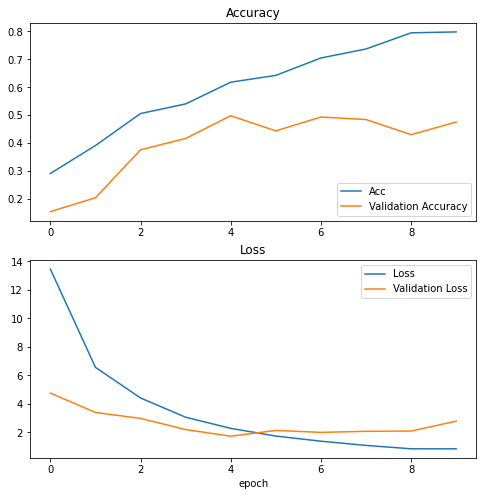

[I 2022-06-21 06:41:10,301] Trial 99 finished with value: 0.4591836631298065 and parameters: {'filters_l1': 18, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'linear', 'dropout_l1': 0.1614640897037965, 'filters_l2': 39, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.1599096198369583, 'filters_l3': 127, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'linear', 'dropout_l3': 0.39681018672525126, 'n_units_l': 20, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.10798629091961251, 'learning_rate': 0.0002558205573579111, 'beta_1': 0.9925199329569127, 'beta_2': 0.9587543254443328, 'epsilon': 1.4238018996693821e-08}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 566ms/step - loss: 5.1096 - accuracy: 0.2383 - val_loss: 2.3421 - val_accuracy: 0.2443 - lr: 1.9081e-04
Epoch 2/10
29/29 [==============================] - 17s 577ms/step - loss: 2.1656 - accuracy: 0.4243 - val_loss: 2.1368 - val_accuracy: 0.2941 - lr: 1.9081e-04
Epoch 3/10
29/29 [==============================] - 17s 577ms/step - loss: 1.5477 - accuracy: 0.5490 - val_loss: 1.7901 - val_accuracy: 0.3529 - lr: 1.9081e-04
Epoch 4/10
29/29 [==============================] - 17s 571ms/step - loss: 1.2675 - accuracy: 0.6024 - val_loss: 2.0995 - val_accuracy: 0.3846 - lr: 1.9081e-04
Epoch 5/10
29/29 [==============================] - 17s 544ms/step - loss: 1.1530 - accuracy: 0.6503 - val_loss: 2.0739 - val_accuracy: 0.3710 - lr: 1.9081e-04
Epoch 6/10
29/29 [==============================] - 17s 584ms/step - loss: 0.8895 - accuracy: 0.7149 - val_loss: 1.8770 - val_accuracy: 0.4253 - lr: 1.9081e-04
Epoch 7/10
29/29 [======================

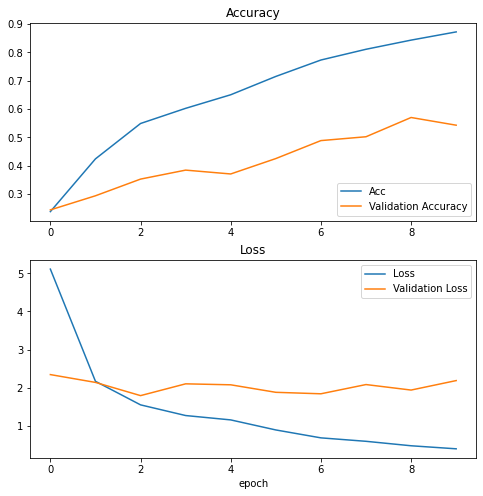

[I 2022-06-21 06:44:04,842] Trial 100 finished with value: 0.5612244606018066 and parameters: {'filters_l1': 47, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'linear', 'dropout_l1': 0.12767956638058672, 'filters_l2': 33, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.44275460509496345, 'filters_l3': 51, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.43329305940851565, 'n_units_l': 29, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.14111052396321885, 'learning_rate': 0.0001908081995314717, 'beta_1': 0.9797591368141296, 'beta_2': 0.9775917759056607, 'epsilon': 4.0951485690985536e-08}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 594ms/step - loss: 4.6182 - accuracy: 0.3174 - val_loss: 2.4481 - val_accuracy: 0.2353 - lr: 1.4595e-04
Epoch 2/10
29/29 [==============================] - 16s 555ms/step - loss: 2.0398 - accuracy: 0.4521 - val_loss: 2.2233 - val_accuracy: 0.2760 - lr: 1.4595e-04
Epoch 3/10
29/29 [==============================] - 16s 579ms/step - loss: 1.3976 - accuracy: 0.5791 - val_loss: 1.6680 - val_accuracy: 0.4344 - lr: 1.4595e-04
Epoch 4/10
29/29 [==============================] - 17s 574ms/step - loss: 0.8016 - accuracy: 0.7383 - val_loss: 1.6435 - val_accuracy: 0.4887 - lr: 1.4595e-04
Epoch 5/10
29/29 [==============================] - 17s 566ms/step - loss: 0.5990 - accuracy: 0.8007 - val_loss: 1.8348 - val_accuracy: 0.4887 - lr: 1.4595e-04
Epoch 6/10
29/29 [==============================] - 17s 582ms/step - loss: 0.4756 - accuracy: 0.8641 - val_loss: 1.6964 - val_accuracy: 0.5385 - lr: 1.4595e-04
Epoch 7/10
29/29 [======================

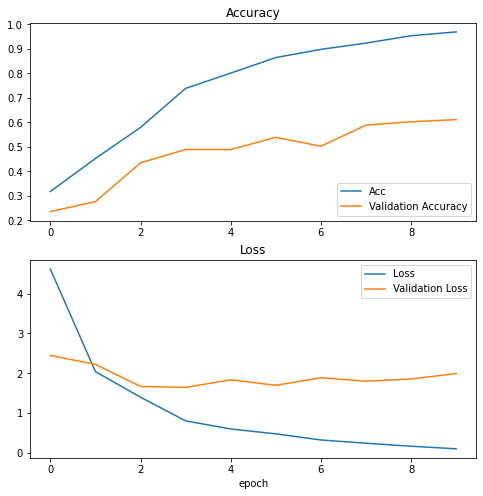

[I 2022-06-21 06:47:00,407] Trial 101 finished with value: 0.7448979616165161 and parameters: {'filters_l1': 11, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'linear', 'dropout_l1': 0.11254703407318874, 'filters_l2': 56, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.2435060916249588, 'filters_l3': 107, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.33292672319573136, 'n_units_l': 18, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.12824256856905417, 'learning_rate': 0.0001459544109860981, 'beta_1': 0.969863271282441, 'beta_2': 0.9618668543336822, 'epsilon': 1.940707077983583e-08}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 581ms/step - loss: 5.3615 - accuracy: 0.2884 - val_loss: 2.4633 - val_accuracy: 0.2670 - lr: 1.1030e-04
Epoch 2/10
29/29 [==============================] - 16s 566ms/step - loss: 1.6086 - accuracy: 0.5033 - val_loss: 1.9137 - val_accuracy: 0.3348 - lr: 1.1030e-04
Epoch 3/10
29/29 [==============================] - 17s 569ms/step - loss: 1.0941 - accuracy: 0.6336 - val_loss: 2.7301 - val_accuracy: 0.3529 - lr: 1.1030e-04
Epoch 4/10
29/29 [==============================] - 17s 589ms/step - loss: 0.9145 - accuracy: 0.7016 - val_loss: 2.6524 - val_accuracy: 0.4027 - lr: 1.1030e-04
Epoch 5/10
29/29 [==============================] - 17s 571ms/step - loss: 0.7165 - accuracy: 0.7806 - val_loss: 2.2055 - val_accuracy: 0.4027 - lr: 1.1030e-04
Epoch 6/10
29/29 [==============================] - 17s 584ms/step - loss: 0.5936 - accuracy: 0.8185 - val_loss: 2.0935 - val_accuracy: 0.4706 - lr: 1.1030e-04
Epoch 7/10
29/29 [======================

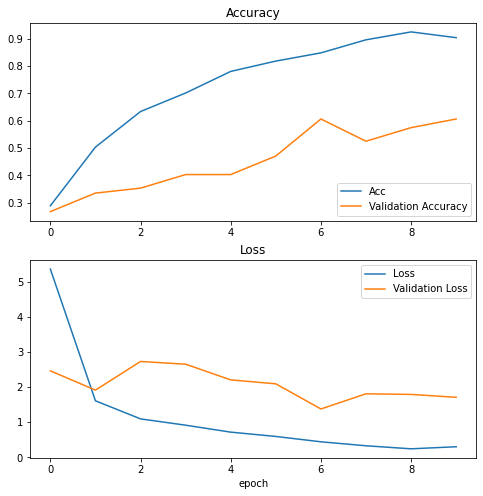

[I 2022-06-21 06:49:55,089] Trial 102 finished with value: 0.7448979616165161 and parameters: {'filters_l1': 11, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'linear', 'dropout_l1': 0.11781601325383892, 'filters_l2': 69, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.2331665398852558, 'filters_l3': 100, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.332582385046732, 'n_units_l': 17, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.13110972593906317, 'learning_rate': 0.00011030177670335455, 'beta_1': 0.9267360546559247, 'beta_2': 0.9618076567309259, 'epsilon': 1.706970921327828e-08}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 579ms/step - loss: 4.5298 - accuracy: 0.2984 - val_loss: 1.8601 - val_accuracy: 0.3891 - lr: 1.0768e-04
Epoch 2/10
29/29 [==============================] - 17s 577ms/step - loss: 2.1030 - accuracy: 0.4354 - val_loss: 2.0884 - val_accuracy: 0.3032 - lr: 1.0768e-04
Epoch 3/10
29/29 [==============================] - 17s 584ms/step - loss: 1.6773 - accuracy: 0.5067 - val_loss: 2.0392 - val_accuracy: 0.3167 - lr: 1.0768e-04
Epoch 4/10
29/29 [==============================] - 17s 568ms/step - loss: 1.3239 - accuracy: 0.6091 - val_loss: 1.7017 - val_accuracy: 0.4299 - lr: 1.0768e-04
Epoch 5/10
29/29 [==============================] - 17s 565ms/step - loss: 0.9893 - accuracy: 0.6938 - val_loss: 1.7395 - val_accuracy: 0.4706 - lr: 1.0768e-04
Epoch 6/10
29/29 [==============================] - 17s 562ms/step - loss: 0.7164 - accuracy: 0.7606 - val_loss: 1.6897 - val_accuracy: 0.5249 - lr: 1.0768e-04
Epoch 7/10
29/29 [======================

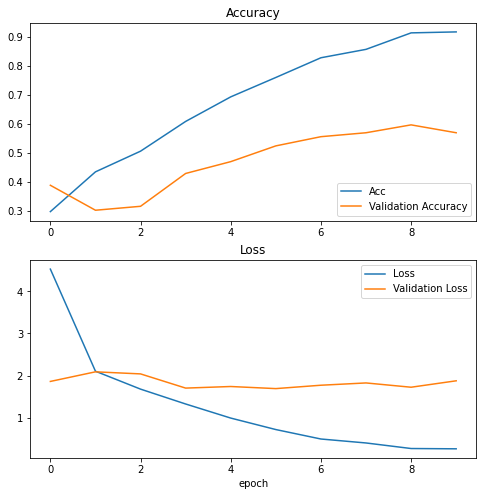

[I 2022-06-21 06:52:49,133] Trial 103 finished with value: 0.6836734414100647 and parameters: {'filters_l1': 12, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'linear', 'dropout_l1': 0.11072268356214551, 'filters_l2': 60, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.20622265003578077, 'filters_l3': 92, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.3336220660516347, 'n_units_l': 17, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.12759613641769313, 'learning_rate': 0.0001076766895824004, 'beta_1': 0.9787625353106495, 'beta_2': 0.96086294204104, 'epsilon': 1.6243813750848723e-08}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 580ms/step - loss: 4.3160 - accuracy: 0.2584 - val_loss: 2.3620 - val_accuracy: 0.2081 - lr: 5.5920e-05
Epoch 2/10
29/29 [==============================] - 17s 575ms/step - loss: 2.0012 - accuracy: 0.4688 - val_loss: 1.9955 - val_accuracy: 0.2534 - lr: 5.5920e-05
Epoch 3/10
29/29 [==============================] - 16s 554ms/step - loss: 1.4082 - accuracy: 0.5657 - val_loss: 1.9134 - val_accuracy: 0.3258 - lr: 5.5920e-05
Epoch 4/10
29/29 [==============================] - 16s 579ms/step - loss: 1.1632 - accuracy: 0.6214 - val_loss: 1.6431 - val_accuracy: 0.3937 - lr: 5.5920e-05
Epoch 5/10
29/29 [==============================] - 17s 567ms/step - loss: 0.9322 - accuracy: 0.6804 - val_loss: 1.6143 - val_accuracy: 0.4434 - lr: 5.5920e-05
Epoch 6/10
29/29 [==============================] - 16s 575ms/step - loss: 0.7473 - accuracy: 0.7361 - val_loss: 1.6339 - val_accuracy: 0.4932 - lr: 5.5920e-05
Epoch 7/10
29/29 [======================

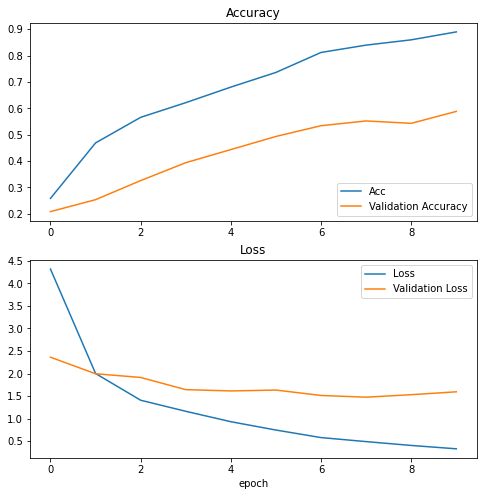

[I 2022-06-21 06:55:46,844] Trial 104 finished with value: 0.5714285969734192 and parameters: {'filters_l1': 11, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'linear', 'dropout_l1': 0.12293991007494234, 'filters_l2': 47, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.24214358996822866, 'filters_l3': 64, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.30394133479422597, 'n_units_l': 23, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.10187096264027659, 'learning_rate': 5.592001299160917e-05, 'beta_1': 0.9745860072433729, 'beta_2': 0.9540442695412036, 'epsilon': 1.743463966517201e-08}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 568ms/step - loss: 3.4388 - accuracy: 0.2283 - val_loss: 2.5255 - val_accuracy: 0.1719 - lr: 2.5390e-04
Epoch 2/10
29/29 [==============================] - 17s 576ms/step - loss: 2.1590 - accuracy: 0.3541 - val_loss: 2.6867 - val_accuracy: 0.2534 - lr: 2.5390e-04
Epoch 3/10
29/29 [==============================] - 17s 577ms/step - loss: 1.9567 - accuracy: 0.4365 - val_loss: 1.8087 - val_accuracy: 0.3575 - lr: 2.5390e-04
Epoch 4/10
29/29 [==============================] - 17s 578ms/step - loss: 1.3925 - accuracy: 0.5679 - val_loss: 1.9250 - val_accuracy: 0.3303 - lr: 2.5390e-04
Epoch 5/10
29/29 [==============================] - 17s 571ms/step - loss: 1.1797 - accuracy: 0.6024 - val_loss: 1.6482 - val_accuracy: 0.4751 - lr: 2.5390e-04
Epoch 6/10
29/29 [==============================] - 17s 574ms/step - loss: 1.0796 - accuracy: 0.6492 - val_loss: 1.5212 - val_accuracy: 0.4842 - lr: 2.5390e-04
Epoch 7/10
29/29 [======================

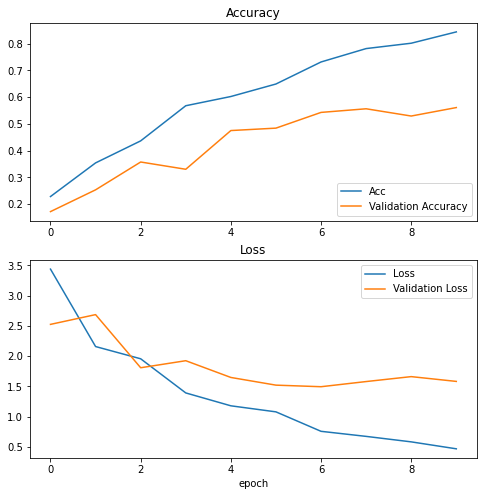

[I 2022-06-21 06:58:40,744] Trial 105 finished with value: 0.6530612111091614 and parameters: {'filters_l1': 15, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'linear', 'dropout_l1': 0.11406576871464455, 'filters_l2': 68, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.23510756306982872, 'filters_l3': 15, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.3166457566733809, 'n_units_l': 32, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.18915371713505716, 'learning_rate': 0.0002538994258312157, 'beta_1': 0.9215480090268822, 'beta_2': 0.9656416047653319, 'epsilon': 1.2391725817034726e-08}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 586ms/step - loss: 14.1414 - accuracy: 0.3040 - val_loss: 4.5151 - val_accuracy: 0.1810 - lr: 3.9746e-04
Epoch 2/10
29/29 [==============================] - 17s 561ms/step - loss: 1.7906 - accuracy: 0.4176 - val_loss: 2.0395 - val_accuracy: 0.2534 - lr: 3.9746e-04
Epoch 3/10
29/29 [==============================] - 17s 552ms/step - loss: 1.4721 - accuracy: 0.5033 - val_loss: 1.7308 - val_accuracy: 0.3665 - lr: 3.9746e-04
Epoch 4/10
29/29 [==============================] - 17s 578ms/step - loss: 1.1194 - accuracy: 0.6125 - val_loss: 1.7719 - val_accuracy: 0.4118 - lr: 3.9746e-04
Epoch 5/10
29/29 [==============================] - 17s 581ms/step - loss: 0.9603 - accuracy: 0.6860 - val_loss: 1.5211 - val_accuracy: 0.4887 - lr: 3.9746e-04
Epoch 6/10
29/29 [==============================] - 17s 576ms/step - loss: 0.6553 - accuracy: 0.7661 - val_loss: 1.4897 - val_accuracy: 0.5385 - lr: 3.9746e-04
Epoch 7/10
29/29 [=====================

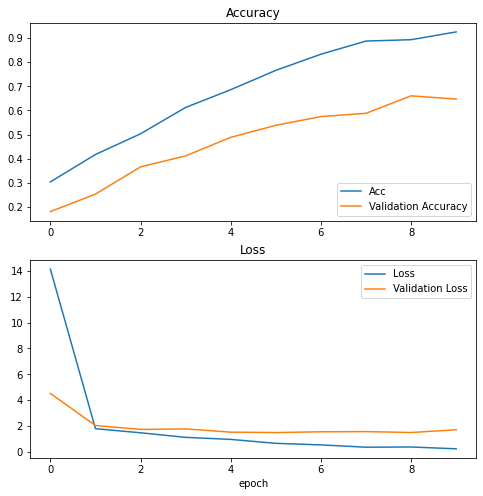

[I 2022-06-21 07:01:39,903] Trial 106 finished with value: 0.7346938848495483 and parameters: {'filters_l1': 10, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'elu', 'dropout_l1': 0.13564190539937546, 'filters_l2': 75, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.226585656952339, 'filters_l3': 102, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.3441205667987835, 'n_units_l': 938, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.12356119060476617, 'learning_rate': 0.0003974624875693116, 'beta_1': 0.9263516975635384, 'beta_2': 0.9612977662256506, 'epsilon': 2.7208733573671698e-08}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 594ms/step - loss: 3.5041 - accuracy: 0.2350 - val_loss: 2.0542 - val_accuracy: 0.2262 - lr: 9.0337e-05
Epoch 2/10
29/29 [==============================] - 16s 575ms/step - loss: 2.0393 - accuracy: 0.3430 - val_loss: 1.9444 - val_accuracy: 0.2896 - lr: 9.0337e-05
Epoch 3/10
29/29 [==============================] - 16s 576ms/step - loss: 1.6375 - accuracy: 0.4321 - val_loss: 1.8961 - val_accuracy: 0.3122 - lr: 9.0337e-05
Epoch 4/10
29/29 [==============================] - 16s 569ms/step - loss: 1.4002 - accuracy: 0.5367 - val_loss: 1.6888 - val_accuracy: 0.3846 - lr: 9.0337e-05
Epoch 5/10
29/29 [==============================] - 17s 575ms/step - loss: 1.2585 - accuracy: 0.5401 - val_loss: 1.8153 - val_accuracy: 0.3891 - lr: 9.0337e-05
Epoch 6/10
29/29 [==============================] - 16s 579ms/step - loss: 1.1268 - accuracy: 0.5947 - val_loss: 1.7979 - val_accuracy: 0.4118 - lr: 9.0337e-05
Epoch 7/10
29/29 [======================

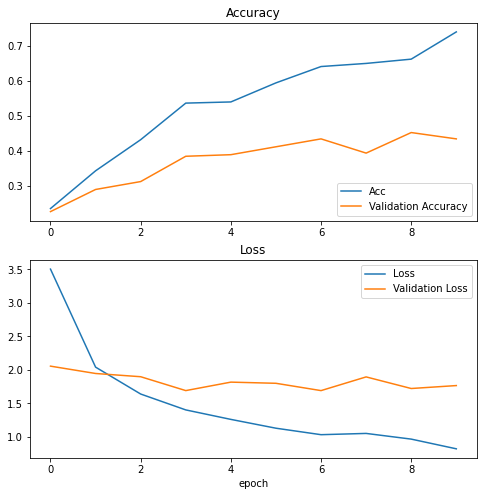

[I 2022-06-21 07:04:34,243] Trial 107 finished with value: 0.40816327929496765 and parameters: {'filters_l1': 7, 'kernel_size_l1': 7, 'strides_l1': 2, 'padding_l1': 'valid', 'activation_l1': 'elu', 'dropout_l1': 0.13599618816736617, 'filters_l2': 75, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.2208523725535208, 'filters_l3': 128, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.2790389937278025, 'n_units_l': 14, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.11164111029674337, 'learning_rate': 9.033718997945377e-05, 'beta_1': 0.9582801257818956, 'beta_2': 0.9576588538083104, 'epsilon': 3.0138276767416115e-08}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 573ms/step - loss: 21.6498 - accuracy: 0.2706 - val_loss: 4.5972 - val_accuracy: 0.1538 - lr: 4.2181e-04
Epoch 2/10
29/29 [==============================] - 17s 579ms/step - loss: 1.7688 - accuracy: 0.4176 - val_loss: 2.6205 - val_accuracy: 0.2624 - lr: 4.2181e-04
Epoch 3/10
29/29 [==============================] - 17s 567ms/step - loss: 1.3542 - accuracy: 0.5445 - val_loss: 2.2544 - val_accuracy: 0.2941 - lr: 4.2181e-04
Epoch 4/10
29/29 [==============================] - 17s 573ms/step - loss: 1.1844 - accuracy: 0.5746 - val_loss: 2.0513 - val_accuracy: 0.2896 - lr: 4.2181e-04
Epoch 5/10
29/29 [==============================] - 17s 582ms/step - loss: 1.0249 - accuracy: 0.6459 - val_loss: 2.2384 - val_accuracy: 0.3213 - lr: 4.2181e-04
Epoch 6/10
29/29 [==============================] - 17s 575ms/step - loss: 0.8858 - accuracy: 0.7004 - val_loss: 1.6947 - val_accuracy: 0.4751 - lr: 4.2181e-04
Epoch 7/10
29/29 [=====================

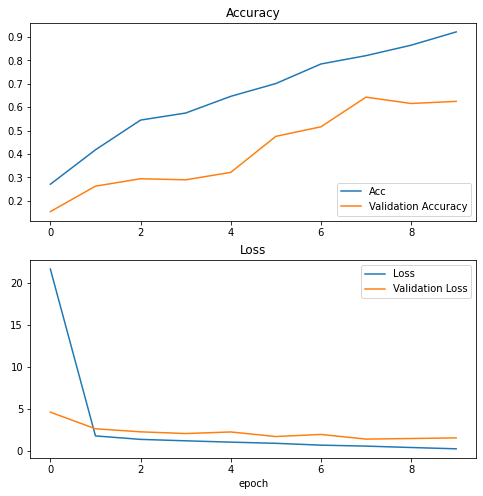

[I 2022-06-21 07:07:31,298] Trial 108 finished with value: 0.7244898080825806 and parameters: {'filters_l1': 9, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.1413723263465934, 'filters_l2': 54, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.2271563325902024, 'filters_l3': 102, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.3442510295463206, 'n_units_l': 865, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.12947424056459012, 'learning_rate': 0.0004218067851462661, 'beta_1': 0.9261402827058867, 'beta_2': 0.9616112134389163, 'epsilon': 2.6611438782834232e-08}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 19s 616ms/step - loss: 13.0286 - accuracy: 0.2706 - val_loss: 2.9353 - val_accuracy: 0.2398 - lr: 3.8011e-04
Epoch 2/10
29/29 [==============================] - 17s 578ms/step - loss: 1.7412 - accuracy: 0.3708 - val_loss: 2.2172 - val_accuracy: 0.2624 - lr: 3.8011e-04
Epoch 3/10
29/29 [==============================] - 17s 597ms/step - loss: 1.5305 - accuracy: 0.4621 - val_loss: 2.0739 - val_accuracy: 0.2624 - lr: 3.8011e-04
Epoch 4/10
29/29 [==============================] - 17s 584ms/step - loss: 1.4436 - accuracy: 0.4900 - val_loss: 1.7492 - val_accuracy: 0.3756 - lr: 3.8011e-04
Epoch 5/10
29/29 [==============================] - 17s 578ms/step - loss: 1.3174 - accuracy: 0.5290 - val_loss: 1.8516 - val_accuracy: 0.4163 - lr: 3.8011e-04
Epoch 6/10
29/29 [==============================] - 17s 565ms/step - loss: 1.1274 - accuracy: 0.6091 - val_loss: 2.0314 - val_accuracy: 0.4072 - lr: 3.8011e-04
Epoch 7/10
29/29 [=====================

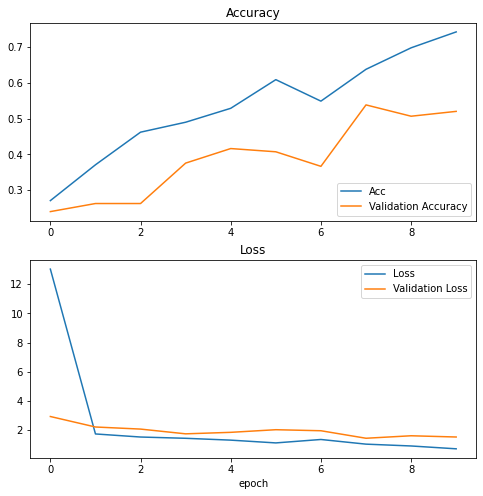

[I 2022-06-21 07:10:27,255] Trial 109 finished with value: 0.5510203838348389 and parameters: {'filters_l1': 12, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'elu', 'dropout_l1': 0.1467722685415621, 'filters_l2': 112, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.25141074688800435, 'filters_l3': 102, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.3424067838737441, 'n_units_l': 913, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.12240563730879192, 'learning_rate': 0.0003801133453744687, 'beta_1': 0.9259835847077985, 'beta_2': 0.9717649655889647, 'epsilon': 2.7225627220720688e-08}. Best is trial 28 with value: 0.7448979616165161.


Epoch 1/10
29/29 [==============================] - 18s 572ms/step - loss: 6.7007 - accuracy: 0.3062 - val_loss: 3.3072 - val_accuracy: 0.2127 - lr: 1.5715e-04
Epoch 2/10
29/29 [==============================] - 17s 574ms/step - loss: 2.4795 - accuracy: 0.5022 - val_loss: 2.3491 - val_accuracy: 0.3891 - lr: 1.5715e-04
Epoch 3/10
29/29 [==============================] - 17s 572ms/step - loss: 1.5844 - accuracy: 0.6125 - val_loss: 1.6472 - val_accuracy: 0.4842 - lr: 1.5715e-04
Epoch 4/10
29/29 [==============================] - 17s 577ms/step - loss: 0.7553 - accuracy: 0.7739 - val_loss: 1.5844 - val_accuracy: 0.5113 - lr: 1.5715e-04
Epoch 5/10
29/29 [==============================] - 16s 577ms/step - loss: 0.3647 - accuracy: 0.8864 - val_loss: 1.3842 - val_accuracy: 0.5973 - lr: 1.5715e-04
Epoch 6/10
29/29 [==============================] - 17s 579ms/step - loss: 0.2094 - accuracy: 0.9276 - val_loss: 1.6881 - val_accuracy: 0.5928 - lr: 1.5715e-04
Epoch 7/10
29/29 [======================

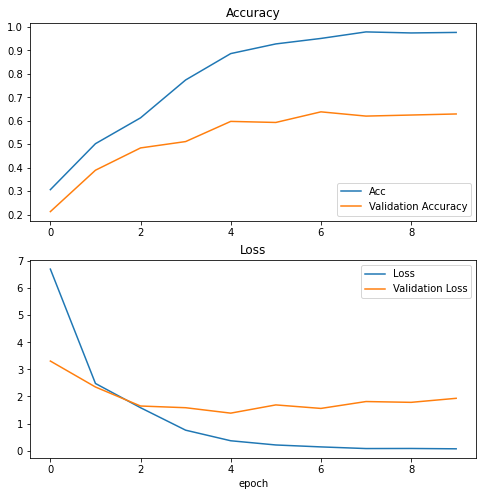

[I 2022-06-21 07:13:26,387] Trial 110 finished with value: 0.7653061151504517 and parameters: {'filters_l1': 10, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.13173168881532152, 'filters_l2': 53, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.2175971098674945, 'filters_l3': 143, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.34526121924197384, 'n_units_l': 23, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.13130148100687375, 'learning_rate': 0.00015715242619076934, 'beta_1': 0.9711606540738735, 'beta_2': 0.9513261408094044, 'epsilon': 2.1794299009108733e-08}. Best is trial 110 with value: 0.7653061151504517.


Epoch 1/10
29/29 [==============================] - 18s 585ms/step - loss: 10.4318 - accuracy: 0.2851 - val_loss: 9.7836 - val_accuracy: 0.0950 - lr: 1.9664e-04
Epoch 2/10
29/29 [==============================] - 17s 579ms/step - loss: 3.9097 - accuracy: 0.4399 - val_loss: 2.8432 - val_accuracy: 0.3258 - lr: 1.9664e-04
Epoch 3/10
29/29 [==============================] - 17s 578ms/step - loss: 2.2771 - accuracy: 0.5902 - val_loss: 1.8051 - val_accuracy: 0.5023 - lr: 1.9664e-04
Epoch 4/10
29/29 [==============================] - 17s 581ms/step - loss: 1.2199 - accuracy: 0.7105 - val_loss: 1.8615 - val_accuracy: 0.4977 - lr: 1.9664e-04
Epoch 5/10
29/29 [==============================] - 17s 576ms/step - loss: 0.6039 - accuracy: 0.8252 - val_loss: 1.6993 - val_accuracy: 0.5520 - lr: 1.9664e-04
Epoch 6/10
29/29 [==============================] - 17s 574ms/step - loss: 0.3468 - accuracy: 0.8820 - val_loss: 1.4881 - val_accuracy: 0.6380 - lr: 1.9664e-04
Epoch 7/10
29/29 [=====================

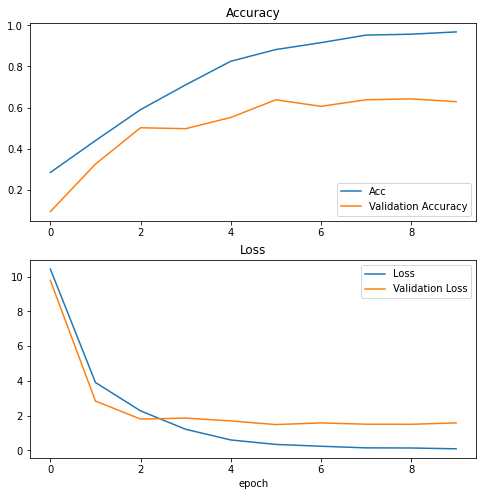

[I 2022-06-21 07:16:27,119] Trial 111 finished with value: 0.795918345451355 and parameters: {'filters_l1': 10, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.13479075548781516, 'filters_l2': 54, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.22674237960890947, 'filters_l3': 146, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.3278192502244457, 'n_units_l': 23, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.147162991547561, 'learning_rate': 0.0001966421197531147, 'beta_1': 0.9641759433818914, 'beta_2': 0.999981558178362, 'epsilon': 2.2746394336255712e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 17s 581ms/step - loss: 11.0818 - accuracy: 0.3018 - val_loss: 2.2738 - val_accuracy: 0.2941 - lr: 1.9338e-04
Epoch 2/10
29/29 [==============================] - 17s 566ms/step - loss: 3.3980 - accuracy: 0.4633 - val_loss: 3.8630 - val_accuracy: 0.2353 - lr: 1.9338e-04
Epoch 3/10
29/29 [==============================] - 17s 575ms/step - loss: 2.0352 - accuracy: 0.6225 - val_loss: 2.6728 - val_accuracy: 0.3394 - lr: 1.9338e-04
Epoch 4/10
29/29 [==============================] - 17s 579ms/step - loss: 1.2286 - accuracy: 0.7305 - val_loss: 2.0865 - val_accuracy: 0.4706 - lr: 1.9338e-04
Epoch 5/10
29/29 [==============================] - 17s 578ms/step - loss: 0.7879 - accuracy: 0.7884 - val_loss: 1.7446 - val_accuracy: 0.5566 - lr: 1.9338e-04
Epoch 6/10
29/29 [==============================] - 17s 577ms/step - loss: 0.4178 - accuracy: 0.8697 - val_loss: 1.8640 - val_accuracy: 0.5249 - lr: 1.9338e-04
Epoch 7/10
29/29 [=====================

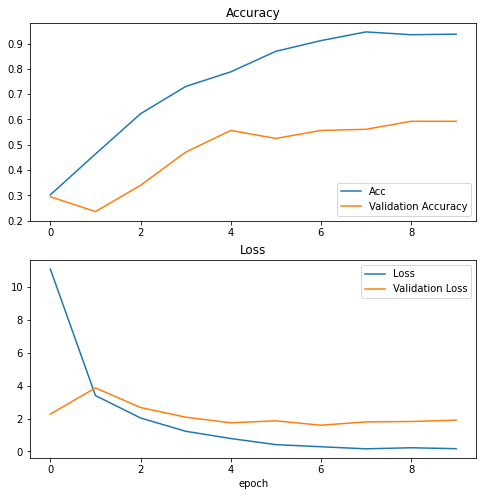

[I 2022-06-21 07:19:23,346] Trial 112 finished with value: 0.7244898080825806 and parameters: {'filters_l1': 10, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.13513408597498483, 'filters_l2': 43, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.21708050208718138, 'filters_l3': 149, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.32889589985474055, 'n_units_l': 23, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.14739024990689983, 'learning_rate': 0.00019337910943961512, 'beta_1': 0.9658341029546983, 'beta_2': 0.999539730080574, 'epsilon': 2.1498413355783435e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 576ms/step - loss: 11.4505 - accuracy: 0.2561 - val_loss: 3.1683 - val_accuracy: 0.2760 - lr: 2.0367e-04
Epoch 2/10
29/29 [==============================] - 17s 581ms/step - loss: 3.4925 - accuracy: 0.5000 - val_loss: 2.4599 - val_accuracy: 0.3213 - lr: 2.0367e-04
Epoch 3/10
29/29 [==============================] - 17s 563ms/step - loss: 2.0519 - accuracy: 0.6047 - val_loss: 1.6753 - val_accuracy: 0.4751 - lr: 2.0367e-04
Epoch 4/10
29/29 [==============================] - 17s 589ms/step - loss: 0.9975 - accuracy: 0.7461 - val_loss: 2.4155 - val_accuracy: 0.3756 - lr: 2.0367e-04
Epoch 5/10
29/29 [==============================] - 17s 557ms/step - loss: 0.4792 - accuracy: 0.8497 - val_loss: 1.6411 - val_accuracy: 0.4887 - lr: 2.0367e-04
Epoch 6/10
29/29 [==============================] - 17s 579ms/step - loss: 0.2635 - accuracy: 0.9198 - val_loss: 1.5095 - val_accuracy: 0.5973 - lr: 2.0367e-04
Epoch 7/10
29/29 [=====================

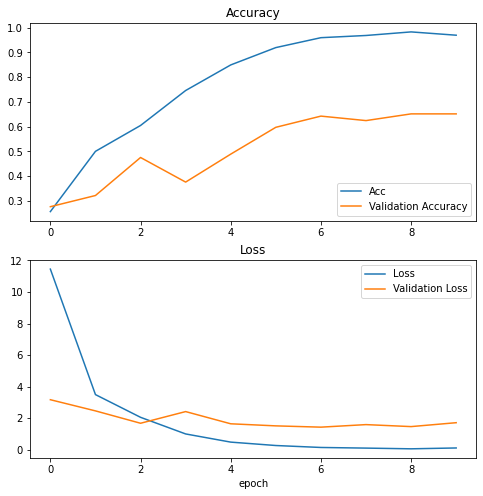

[I 2022-06-21 07:22:22,202] Trial 113 finished with value: 0.7142857313156128 and parameters: {'filters_l1': 10, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.14087502318420006, 'filters_l2': 52, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.22916124231602442, 'filters_l3': 178, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.3456558251041983, 'n_units_l': 24, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.132978796112093, 'learning_rate': 0.00020367338619292267, 'beta_1': 0.964635821138085, 'beta_2': 0.9923746426298317, 'epsilon': 2.251638110576866e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 580ms/step - loss: 6.4305 - accuracy: 0.3018 - val_loss: 2.6678 - val_accuracy: 0.2081 - lr: 1.5796e-04
Epoch 2/10
29/29 [==============================] - 17s 573ms/step - loss: 1.8462 - accuracy: 0.5033 - val_loss: 2.2167 - val_accuracy: 0.3665 - lr: 1.5796e-04
Epoch 3/10
29/29 [==============================] - 17s 565ms/step - loss: 1.1070 - accuracy: 0.6793 - val_loss: 1.7911 - val_accuracy: 0.4615 - lr: 1.5796e-04
Epoch 4/10
29/29 [==============================] - 16s 567ms/step - loss: 0.7524 - accuracy: 0.7450 - val_loss: 1.5721 - val_accuracy: 0.4887 - lr: 1.5796e-04
Epoch 5/10
29/29 [==============================] - 17s 579ms/step - loss: 0.4262 - accuracy: 0.8474 - val_loss: 1.5456 - val_accuracy: 0.5294 - lr: 1.5796e-04
Epoch 6/10
29/29 [==============================] - 16s 560ms/step - loss: 0.3432 - accuracy: 0.8886 - val_loss: 1.4957 - val_accuracy: 0.6244 - lr: 1.5796e-04
Epoch 7/10
29/29 [======================

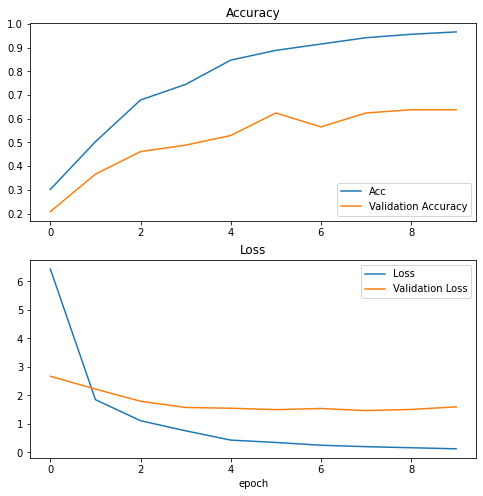

[I 2022-06-21 07:25:22,570] Trial 114 finished with value: 0.7551020383834839 and parameters: {'filters_l1': 13, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.13149213803342524, 'filters_l2': 42, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.21942580453102586, 'filters_l3': 147, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.35729705396389555, 'n_units_l': 18, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.14498239018394232, 'learning_rate': 0.00015795559475232884, 'beta_1': 0.961409182143623, 'beta_2': 0.9989875892026615, 'epsilon': 2.555119485934062e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 619ms/step - loss: 8.2748 - accuracy: 0.3029 - val_loss: 5.6041 - val_accuracy: 0.2036 - lr: 1.5083e-04
Epoch 2/10
29/29 [==============================] - 17s 579ms/step - loss: 2.2634 - accuracy: 0.4889 - val_loss: 2.4347 - val_accuracy: 0.3439 - lr: 1.5083e-04
Epoch 3/10
29/29 [==============================] - 17s 578ms/step - loss: 1.3065 - accuracy: 0.6036 - val_loss: 1.7977 - val_accuracy: 0.4751 - lr: 1.5083e-04
Epoch 4/10
29/29 [==============================] - 17s 578ms/step - loss: 0.7379 - accuracy: 0.7617 - val_loss: 1.6500 - val_accuracy: 0.4887 - lr: 1.5083e-04
Epoch 5/10
29/29 [==============================] - 17s 570ms/step - loss: 0.5305 - accuracy: 0.8229 - val_loss: 1.5065 - val_accuracy: 0.5566 - lr: 1.5083e-04
Epoch 6/10
29/29 [==============================] - 17s 568ms/step - loss: 0.3205 - accuracy: 0.9042 - val_loss: 1.5658 - val_accuracy: 0.5566 - lr: 1.5083e-04
Epoch 7/10
29/29 [======================

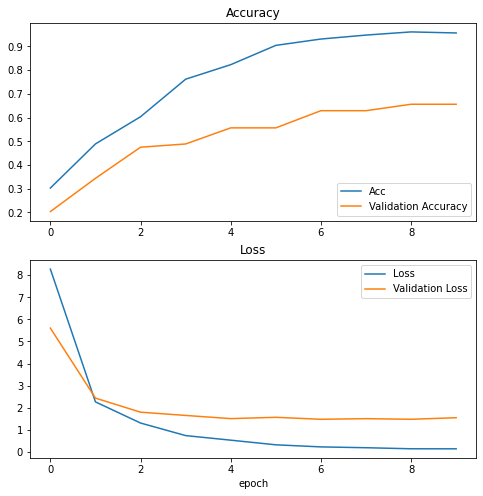

[I 2022-06-21 07:28:17,768] Trial 115 finished with value: 0.7551020383834839 and parameters: {'filters_l1': 13, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.1518573214792401, 'filters_l2': 36, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.24441531879725506, 'filters_l3': 195, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.3561158964522781, 'n_units_l': 16, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.16573977716462568, 'learning_rate': 0.00015082516774231585, 'beta_1': 0.9630353784417333, 'beta_2': 0.997587000167548, 'epsilon': 3.305205228555209e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 580ms/step - loss: 9.2945 - accuracy: 0.2650 - val_loss: 2.8003 - val_accuracy: 0.3620 - lr: 1.5374e-04
Epoch 2/10
29/29 [==============================] - 17s 574ms/step - loss: 2.5071 - accuracy: 0.4198 - val_loss: 2.1780 - val_accuracy: 0.3484 - lr: 1.5374e-04
Epoch 3/10
29/29 [==============================] - 17s 572ms/step - loss: 1.4052 - accuracy: 0.5713 - val_loss: 1.9077 - val_accuracy: 0.4118 - lr: 1.5374e-04
Epoch 4/10
29/29 [==============================] - 17s 579ms/step - loss: 1.0696 - accuracy: 0.6347 - val_loss: 1.7750 - val_accuracy: 0.4751 - lr: 1.5374e-04
Epoch 5/10
29/29 [==============================] - 17s 568ms/step - loss: 0.8020 - accuracy: 0.7428 - val_loss: 1.6701 - val_accuracy: 0.4977 - lr: 1.5374e-04
Epoch 6/10
29/29 [==============================] - 17s 581ms/step - loss: 0.5303 - accuracy: 0.8163 - val_loss: 1.3864 - val_accuracy: 0.5656 - lr: 1.5374e-04
Epoch 7/10
29/29 [======================

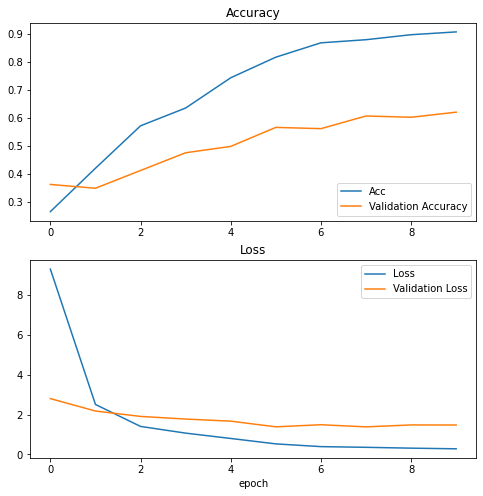

[I 2022-06-21 07:31:14,797] Trial 116 finished with value: 0.7346938848495483 and parameters: {'filters_l1': 14, 'kernel_size_l1': 3, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.15533430470923626, 'filters_l2': 37, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.24449184322191958, 'filters_l3': 214, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.35269949297552317, 'n_units_l': 10, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.17979436411986222, 'learning_rate': 0.00015374386614897784, 'beta_1': 0.961200280091147, 'beta_2': 0.9966368987069415, 'epsilon': 3.222538294326124e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 589ms/step - loss: 6.5695 - accuracy: 0.2728 - val_loss: 2.8597 - val_accuracy: 0.2489 - lr: 1.6018e-04
Epoch 2/10
29/29 [==============================] - 17s 580ms/step - loss: 2.3800 - accuracy: 0.4432 - val_loss: 2.1208 - val_accuracy: 0.3303 - lr: 1.6018e-04
Epoch 3/10
29/29 [==============================] - 17s 583ms/step - loss: 1.3403 - accuracy: 0.5612 - val_loss: 1.7006 - val_accuracy: 0.4027 - lr: 1.6018e-04
Epoch 4/10
29/29 [==============================] - 17s 566ms/step - loss: 0.8309 - accuracy: 0.7205 - val_loss: 1.6488 - val_accuracy: 0.4706 - lr: 1.6018e-04
Epoch 5/10
29/29 [==============================] - 17s 573ms/step - loss: 0.6617 - accuracy: 0.7751 - val_loss: 1.7046 - val_accuracy: 0.4525 - lr: 1.6018e-04
Epoch 6/10
29/29 [==============================] - 17s 577ms/step - loss: 0.4913 - accuracy: 0.8452 - val_loss: 1.6695 - val_accuracy: 0.5158 - lr: 1.6018e-04
Epoch 7/10
29/29 [======================

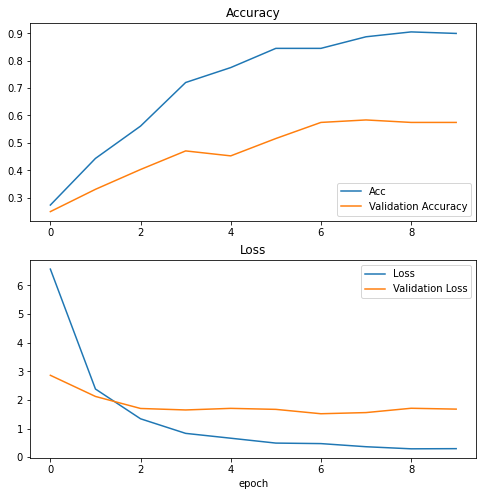

[I 2022-06-21 07:34:10,415] Trial 117 finished with value: 0.7346938848495483 and parameters: {'filters_l1': 13, 'kernel_size_l1': 3, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.15431515039457958, 'filters_l2': 36, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'elu', 'dropout_l2': 0.24300179832432448, 'filters_l3': 186, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.35735249926435975, 'n_units_l': 10, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.20185245079295852, 'learning_rate': 0.00016018305335150195, 'beta_1': 0.9599842467929032, 'beta_2': 0.997505265920665, 'epsilon': 3.167554217427346e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 578ms/step - loss: 13.9900 - accuracy: 0.3040 - val_loss: 3.2386 - val_accuracy: 0.2262 - lr: 1.2478e-04
Epoch 2/10
29/29 [==============================] - 17s 576ms/step - loss: 3.4297 - accuracy: 0.5178 - val_loss: 2.0243 - val_accuracy: 0.3710 - lr: 1.2478e-04
Epoch 3/10
29/29 [==============================] - 17s 573ms/step - loss: 1.6255 - accuracy: 0.6514 - val_loss: 1.8438 - val_accuracy: 0.4661 - lr: 1.2478e-04
Epoch 4/10
29/29 [==============================] - 17s 585ms/step - loss: 0.9393 - accuracy: 0.7617 - val_loss: 1.8753 - val_accuracy: 0.4977 - lr: 1.2478e-04
Epoch 5/10
29/29 [==============================] - 17s 579ms/step - loss: 0.5241 - accuracy: 0.8352 - val_loss: 1.6042 - val_accuracy: 0.5475 - lr: 1.2478e-04
Epoch 6/10
29/29 [==============================] - 17s 553ms/step - loss: 0.4617 - accuracy: 0.8575 - val_loss: 1.8326 - val_accuracy: 0.5701 - lr: 1.2478e-04
Epoch 7/10
29/29 [=====================

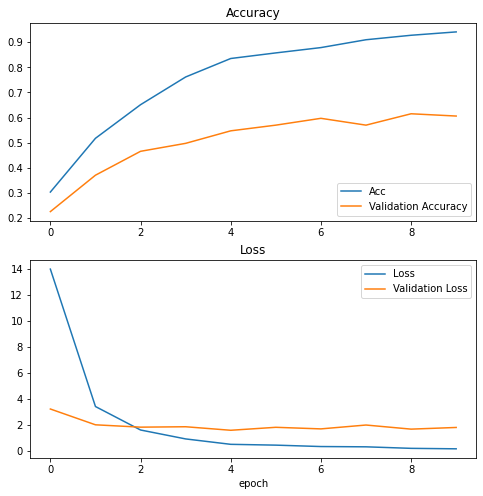

[I 2022-06-21 07:37:05,876] Trial 118 finished with value: 0.7346938848495483 and parameters: {'filters_l1': 13, 'kernel_size_l1': 3, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.16684891951113834, 'filters_l2': 30, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'elu', 'dropout_l2': 0.234050157613679, 'filters_l3': 185, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'linear', 'dropout_l3': 0.35670669957978934, 'n_units_l': 18, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.16080160912497216, 'learning_rate': 0.0001247805662899819, 'beta_1': 0.9572545522953388, 'beta_2': 0.9943138444881742, 'epsilon': 4.5209275637523394e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 575ms/step - loss: 30.3137 - accuracy: 0.2639 - val_loss: 8.4755 - val_accuracy: 0.2308 - lr: 3.1355e-04
Epoch 2/10
29/29 [==============================] - 17s 566ms/step - loss: 5.5425 - accuracy: 0.5000 - val_loss: 5.3620 - val_accuracy: 0.3032 - lr: 3.1355e-04
Epoch 3/10
29/29 [==============================] - 17s 568ms/step - loss: 1.9475 - accuracy: 0.6849 - val_loss: 3.4993 - val_accuracy: 0.3801 - lr: 3.1355e-04
Epoch 4/10
29/29 [==============================] - 17s 575ms/step - loss: 1.0017 - accuracy: 0.7840 - val_loss: 2.7675 - val_accuracy: 0.4615 - lr: 3.1355e-04
Epoch 5/10
29/29 [==============================] - 17s 581ms/step - loss: 0.5956 - accuracy: 0.8519 - val_loss: 2.4485 - val_accuracy: 0.5204 - lr: 3.1355e-04
Epoch 6/10
29/29 [==============================] - 17s 573ms/step - loss: 0.4315 - accuracy: 0.8898 - val_loss: 2.4728 - val_accuracy: 0.5430 - lr: 3.1355e-04
Epoch 7/10
29/29 [=====================

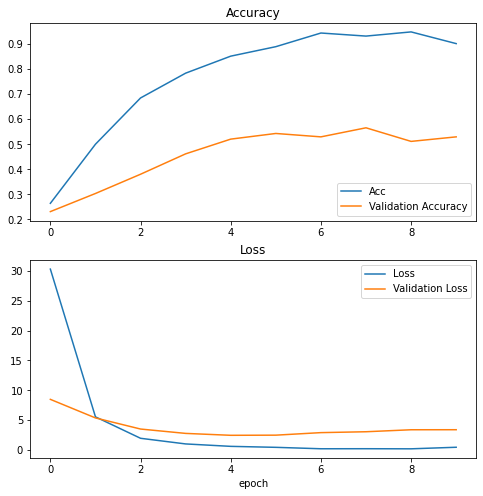

[I 2022-06-21 07:39:59,792] Trial 119 finished with value: 0.6632652878761292 and parameters: {'filters_l1': 13, 'kernel_size_l1': 3, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.17057837545642998, 'filters_l2': 27, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'elu', 'dropout_l2': 0.27225783607029497, 'filters_l3': 242, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'linear', 'dropout_l3': 0.36219390870486445, 'n_units_l': 16, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.20044233333041966, 'learning_rate': 0.0003135468784143492, 'beta_1': 0.9572509974310416, 'beta_2': 0.9945480846726803, 'epsilon': 4.6743793326684734e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 558ms/step - loss: 19.6747 - accuracy: 0.3029 - val_loss: 5.9772 - val_accuracy: 0.2534 - lr: 1.2724e-04
Epoch 2/10
29/29 [==============================] - 17s 566ms/step - loss: 5.1327 - accuracy: 0.4744 - val_loss: 4.4486 - val_accuracy: 0.1991 - lr: 1.2724e-04
Epoch 3/10
29/29 [==============================] - 17s 541ms/step - loss: 2.2660 - accuracy: 0.5902 - val_loss: 2.4764 - val_accuracy: 0.3348 - lr: 1.2724e-04
Epoch 4/10
29/29 [==============================] - 16s 562ms/step - loss: 1.2264 - accuracy: 0.6837 - val_loss: 2.5478 - val_accuracy: 0.3258 - lr: 1.2724e-04
Epoch 5/10
29/29 [==============================] - 17s 555ms/step - loss: 0.6839 - accuracy: 0.8085 - val_loss: 1.9196 - val_accuracy: 0.4842 - lr: 1.2724e-04
Epoch 6/10
29/29 [==============================] - 17s 572ms/step - loss: 0.3936 - accuracy: 0.8641 - val_loss: 2.2822 - val_accuracy: 0.4525 - lr: 1.2724e-04
Epoch 7/10
29/29 [=====================

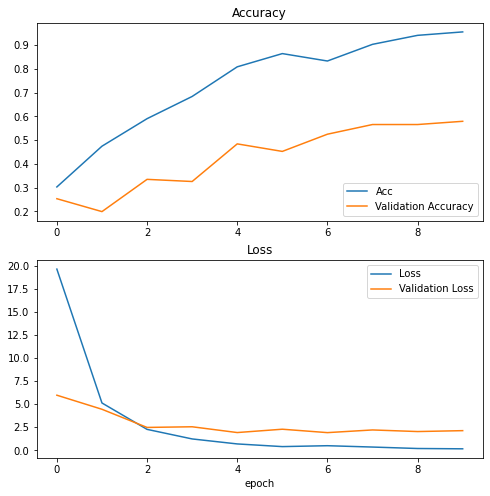

[I 2022-06-21 07:42:57,581] Trial 120 finished with value: 0.6836734414100647 and parameters: {'filters_l1': 16, 'kernel_size_l1': 3, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.19748489076986842, 'filters_l2': 32, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'elu', 'dropout_l2': 0.23600900695777224, 'filters_l3': 198, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'linear', 'dropout_l3': 0.379166024384058, 'n_units_l': 18, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.16179259785629108, 'learning_rate': 0.00012723798222785535, 'beta_1': 0.962692342051675, 'beta_2': 0.9907179348159865, 'epsilon': 3.961630494247476e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 569ms/step - loss: 11.6017 - accuracy: 0.2027 - val_loss: 3.5186 - val_accuracy: 0.2262 - lr: 1.6687e-04
Epoch 2/10
29/29 [==============================] - 17s 581ms/step - loss: 3.0896 - accuracy: 0.3731 - val_loss: 3.1600 - val_accuracy: 0.2353 - lr: 1.6687e-04
Epoch 3/10
29/29 [==============================] - 17s 573ms/step - loss: 1.5846 - accuracy: 0.5334 - val_loss: 2.0728 - val_accuracy: 0.3167 - lr: 1.6687e-04
Epoch 4/10
29/29 [==============================] - 17s 571ms/step - loss: 1.0977 - accuracy: 0.6503 - val_loss: 2.0017 - val_accuracy: 0.3439 - lr: 1.6687e-04
Epoch 5/10
29/29 [==============================] - 17s 572ms/step - loss: 0.8855 - accuracy: 0.6871 - val_loss: 2.0564 - val_accuracy: 0.3756 - lr: 1.6687e-04
Epoch 6/10
29/29 [==============================] - 17s 575ms/step - loss: 0.7735 - accuracy: 0.7049 - val_loss: 1.8363 - val_accuracy: 0.4299 - lr: 1.6687e-04
Epoch 7/10
29/29 [=====================

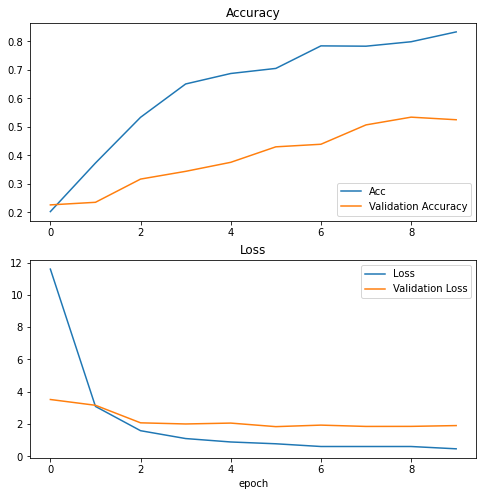

[I 2022-06-21 07:45:52,007] Trial 121 finished with value: 0.6734693646430969 and parameters: {'filters_l1': 13, 'kernel_size_l1': 3, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.15731697514484624, 'filters_l2': 37, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'elu', 'dropout_l2': 0.24837737672147495, 'filters_l3': 198, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'linear', 'dropout_l3': 0.3554605199599447, 'n_units_l': 6, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.1681098517184077, 'learning_rate': 0.0001668743905303245, 'beta_1': 0.9612408518782374, 'beta_2': 0.9969436027082523, 'epsilon': 3.2956260769418045e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 577ms/step - loss: 11.6639 - accuracy: 0.2606 - val_loss: 2.6940 - val_accuracy: 0.2217 - lr: 1.4394e-04
Epoch 2/10
29/29 [==============================] - 17s 575ms/step - loss: 3.2083 - accuracy: 0.4710 - val_loss: 2.5592 - val_accuracy: 0.2670 - lr: 1.4394e-04
Epoch 3/10
29/29 [==============================] - 17s 559ms/step - loss: 1.6309 - accuracy: 0.5902 - val_loss: 2.0253 - val_accuracy: 0.3801 - lr: 1.4394e-04
Epoch 4/10
29/29 [==============================] - 17s 574ms/step - loss: 0.9097 - accuracy: 0.7205 - val_loss: 1.7305 - val_accuracy: 0.4751 - lr: 1.4394e-04
Epoch 5/10
29/29 [==============================] - 17s 581ms/step - loss: 0.6296 - accuracy: 0.7940 - val_loss: 1.8496 - val_accuracy: 0.4661 - lr: 1.4394e-04
Epoch 6/10
29/29 [==============================] - 17s 570ms/step - loss: 0.4947 - accuracy: 0.8541 - val_loss: 1.7121 - val_accuracy: 0.5249 - lr: 1.4394e-04
Epoch 7/10
29/29 [=====================

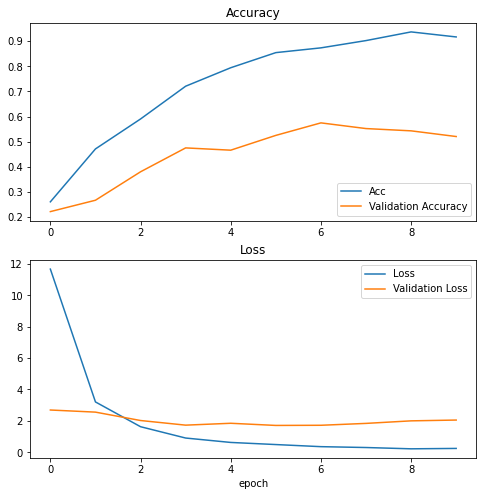

[I 2022-06-21 07:48:46,644] Trial 122 finished with value: 0.704081654548645 and parameters: {'filters_l1': 14, 'kernel_size_l1': 3, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.15448036898481213, 'filters_l2': 36, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'elu', 'dropout_l2': 0.24354131000516707, 'filters_l3': 183, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'linear', 'dropout_l3': 0.3710404437392463, 'n_units_l': 10, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.17631210057568142, 'learning_rate': 0.0001439410057900281, 'beta_1': 0.9540604531687744, 'beta_2': 0.9972797023557035, 'epsilon': 4.815650324191176e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 594ms/step - loss: 10.4136 - accuracy: 0.2728 - val_loss: 5.2818 - val_accuracy: 0.1629 - lr: 1.1293e-04
Epoch 2/10
29/29 [==============================] - 17s 582ms/step - loss: 2.6077 - accuracy: 0.5067 - val_loss: 3.3064 - val_accuracy: 0.2443 - lr: 1.1293e-04
Epoch 3/10
29/29 [==============================] - 17s 573ms/step - loss: 1.2507 - accuracy: 0.6414 - val_loss: 2.2157 - val_accuracy: 0.3529 - lr: 1.1293e-04
Epoch 4/10
29/29 [==============================] - 17s 570ms/step - loss: 0.8326 - accuracy: 0.7305 - val_loss: 2.1477 - val_accuracy: 0.3801 - lr: 1.1293e-04
Epoch 5/10
29/29 [==============================] - 17s 597ms/step - loss: 0.7512 - accuracy: 0.7639 - val_loss: 2.1722 - val_accuracy: 0.4253 - lr: 1.1293e-04
Epoch 6/10
29/29 [==============================] - 17s 578ms/step - loss: 0.5386 - accuracy: 0.8318 - val_loss: 2.0459 - val_accuracy: 0.4661 - lr: 1.1293e-04
Epoch 7/10
29/29 [=====================

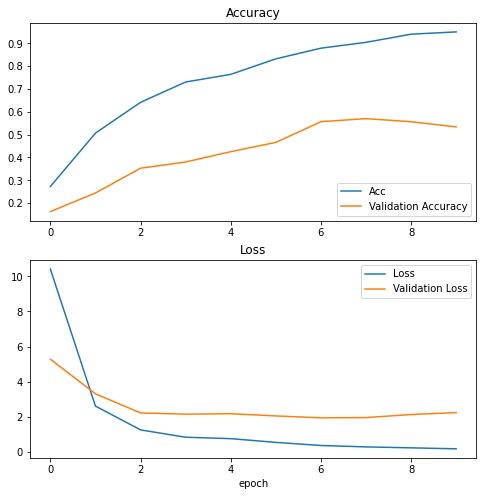

[I 2022-06-21 07:51:41,511] Trial 123 finished with value: 0.6734693646430969 and parameters: {'filters_l1': 21, 'kernel_size_l1': 3, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.18947515110688584, 'filters_l2': 25, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'elu', 'dropout_l2': 0.20065850781453257, 'filters_l3': 164, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.3374354019262331, 'n_units_l': 19, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.15271492500933176, 'learning_rate': 0.00011293051922311415, 'beta_1': 0.9555809168388278, 'beta_2': 0.9996782077844828, 'epsilon': 3.9160973891776044e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 17s 562ms/step - loss: 12.3382 - accuracy: 0.2884 - val_loss: 5.9925 - val_accuracy: 0.2172 - lr: 2.3591e-04
Epoch 2/10
29/29 [==============================] - 17s 561ms/step - loss: 3.4038 - accuracy: 0.5122 - val_loss: 2.9899 - val_accuracy: 0.3484 - lr: 2.3591e-04
Epoch 3/10
29/29 [==============================] - 17s 569ms/step - loss: 1.4724 - accuracy: 0.6570 - val_loss: 2.4937 - val_accuracy: 0.3394 - lr: 2.3591e-04
Epoch 4/10
29/29 [==============================] - 17s 576ms/step - loss: 0.7890 - accuracy: 0.7773 - val_loss: 2.2735 - val_accuracy: 0.4118 - lr: 2.3591e-04
Epoch 5/10
29/29 [==============================] - 17s 574ms/step - loss: 0.4347 - accuracy: 0.8619 - val_loss: 2.2197 - val_accuracy: 0.4480 - lr: 2.3591e-04
Epoch 6/10
29/29 [==============================] - 17s 569ms/step - loss: 0.2775 - accuracy: 0.9020 - val_loss: 2.2199 - val_accuracy: 0.4796 - lr: 2.3591e-04
Epoch 7/10
29/29 [=====================

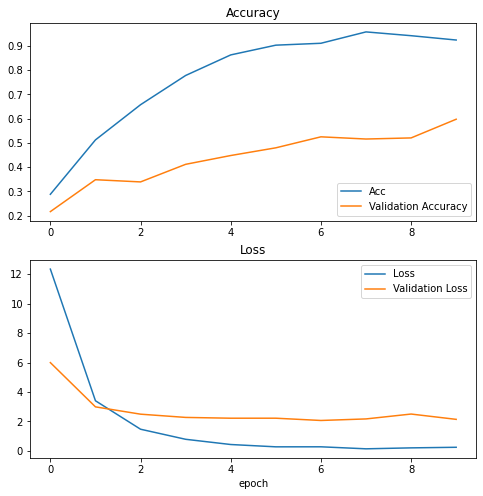

[I 2022-06-21 07:54:35,886] Trial 124 finished with value: 0.704081654548645 and parameters: {'filters_l1': 11, 'kernel_size_l1': 3, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.13001944113911337, 'filters_l2': 41, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.2625732256168702, 'filters_l3': 204, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.3208656240415734, 'n_units_l': 13, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.14823431291944722, 'learning_rate': 0.0002359141392126066, 'beta_1': 0.9598733429932638, 'beta_2': 0.9877033646636165, 'epsilon': 3.13618790954814e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 590ms/step - loss: 12.8994 - accuracy: 0.2650 - val_loss: 5.8747 - val_accuracy: 0.1991 - lr: 8.2708e-05
Epoch 2/10
29/29 [==============================] - 17s 576ms/step - loss: 5.1203 - accuracy: 0.4343 - val_loss: 3.5346 - val_accuracy: 0.2127 - lr: 8.2708e-05
Epoch 3/10
29/29 [==============================] - 17s 580ms/step - loss: 2.4639 - accuracy: 0.5356 - val_loss: 1.9449 - val_accuracy: 0.3801 - lr: 8.2708e-05
Epoch 4/10
29/29 [==============================] - 16s 571ms/step - loss: 1.5081 - accuracy: 0.6225 - val_loss: 1.9197 - val_accuracy: 0.3937 - lr: 8.2708e-05
Epoch 5/10
29/29 [==============================] - 17s 571ms/step - loss: 1.1493 - accuracy: 0.6960 - val_loss: 1.8404 - val_accuracy: 0.4072 - lr: 8.2708e-05
Epoch 6/10
29/29 [==============================] - 17s 581ms/step - loss: 0.7371 - accuracy: 0.7572 - val_loss: 1.6149 - val_accuracy: 0.5204 - lr: 8.2708e-05
Epoch 7/10
29/29 [=====================

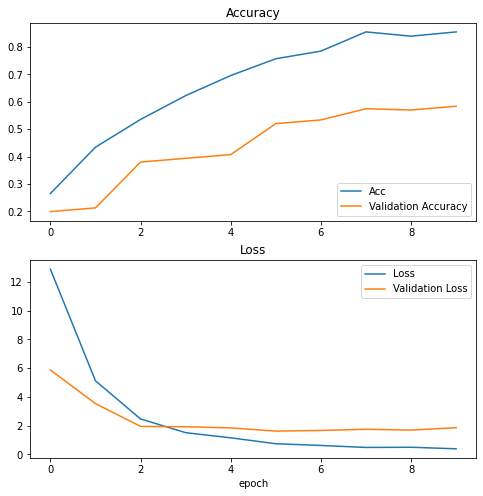

[I 2022-06-21 07:57:30,963] Trial 125 finished with value: 0.704081654548645 and parameters: {'filters_l1': 11, 'kernel_size_l1': 3, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.17566093668599286, 'filters_l2': 44, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'elu', 'dropout_l2': 0.21526836589030365, 'filters_l3': 148, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'linear', 'dropout_l3': 0.3656978386011559, 'n_units_l': 14, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.12115252704381588, 'learning_rate': 8.270795230516251e-05, 'beta_1': 0.9663019510770339, 'beta_2': 0.992384034575509, 'epsilon': 5.4611744434019885e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 17s 570ms/step - loss: 9.2792 - accuracy: 0.2962 - val_loss: 4.2581 - val_accuracy: 0.2353 - lr: 1.9884e-04
Epoch 2/10
29/29 [==============================] - 17s 584ms/step - loss: 2.3568 - accuracy: 0.4922 - val_loss: 2.9550 - val_accuracy: 0.3077 - lr: 1.9884e-04
Epoch 3/10
29/29 [==============================] - 16s 576ms/step - loss: 1.1244 - accuracy: 0.6514 - val_loss: 2.3874 - val_accuracy: 0.3575 - lr: 1.9884e-04
Epoch 4/10
29/29 [==============================] - 16s 565ms/step - loss: 0.7675 - accuracy: 0.7439 - val_loss: 1.8776 - val_accuracy: 0.4751 - lr: 1.9884e-04
Epoch 5/10
29/29 [==============================] - 16s 572ms/step - loss: 0.4785 - accuracy: 0.8396 - val_loss: 2.1887 - val_accuracy: 0.4027 - lr: 1.9884e-04
Epoch 6/10
29/29 [==============================] - 16s 579ms/step - loss: 0.3555 - accuracy: 0.8853 - val_loss: 2.0016 - val_accuracy: 0.5068 - lr: 1.9884e-04
Epoch 7/10
29/29 [======================

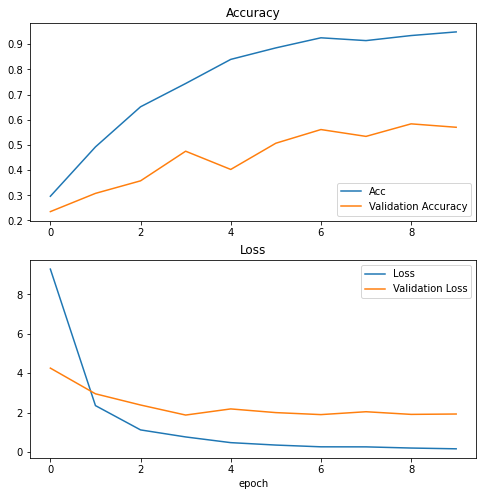

[I 2022-06-21 08:00:29,348] Trial 126 finished with value: 0.704081654548645 and parameters: {'filters_l1': 12, 'kernel_size_l1': 3, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.16510344603359312, 'filters_l2': 33, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'elu', 'dropout_l2': 0.25579290242330077, 'filters_l3': 136, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.32718909260350776, 'n_units_l': 16, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.16862298793194436, 'learning_rate': 0.00019884132541866782, 'beta_1': 0.9531152922906475, 'beta_2': 0.9930805413841802, 'epsilon': 2.6402311415508846e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 578ms/step - loss: 10.9178 - accuracy: 0.2795 - val_loss: 6.2735 - val_accuracy: 0.2624 - lr: 9.7260e-05
Epoch 2/10
29/29 [==============================] - 17s 579ms/step - loss: 3.1092 - accuracy: 0.5267 - val_loss: 3.5091 - val_accuracy: 0.2579 - lr: 9.7260e-05
Epoch 3/10
29/29 [==============================] - 17s 583ms/step - loss: 1.3667 - accuracy: 0.6414 - val_loss: 2.2535 - val_accuracy: 0.3303 - lr: 9.7260e-05
Epoch 4/10
29/29 [==============================] - 17s 576ms/step - loss: 0.7189 - accuracy: 0.7762 - val_loss: 2.4660 - val_accuracy: 0.3439 - lr: 9.7260e-05
Epoch 5/10
29/29 [==============================] - 17s 569ms/step - loss: 0.5069 - accuracy: 0.8307 - val_loss: 2.1341 - val_accuracy: 0.4434 - lr: 9.7260e-05
Epoch 6/10
29/29 [==============================] - 17s 574ms/step - loss: 0.3314 - accuracy: 0.8898 - val_loss: 2.0490 - val_accuracy: 0.4751 - lr: 9.7260e-05
Epoch 7/10
29/29 [=====================

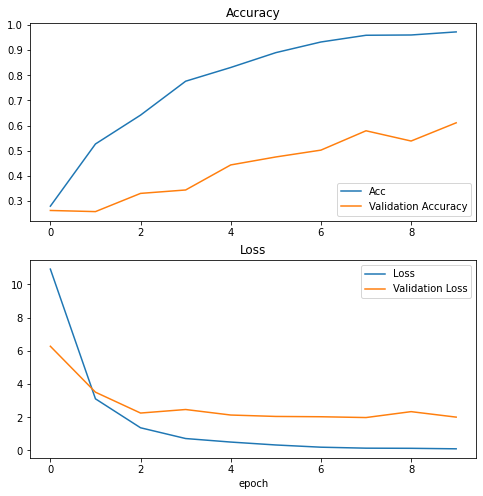

[I 2022-06-21 08:03:28,417] Trial 127 finished with value: 0.7142857313156128 and parameters: {'filters_l1': 17, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.14914924211760552, 'filters_l2': 29, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'elu', 'dropout_l2': 0.23366998833315167, 'filters_l3': 189, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.3073924942137261, 'n_units_l': 27, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.14727285426408074, 'learning_rate': 9.725968448531168e-05, 'beta_1': 0.9502693639894981, 'beta_2': 0.9899927710197526, 'epsilon': 2.4695688454393916e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 17s 586ms/step - loss: 6.6150 - accuracy: 0.2116 - val_loss: 3.8729 - val_accuracy: 0.1176 - lr: 1.5921e-04
Epoch 2/10
29/29 [==============================] - 16s 579ms/step - loss: 2.9622 - accuracy: 0.3396 - val_loss: 2.0967 - val_accuracy: 0.2670 - lr: 1.5921e-04
Epoch 3/10
29/29 [==============================] - 16s 566ms/step - loss: 1.7617 - accuracy: 0.4421 - val_loss: 2.2859 - val_accuracy: 0.2624 - lr: 1.5921e-04
Epoch 4/10
29/29 [==============================] - 17s 576ms/step - loss: 1.5632 - accuracy: 0.4677 - val_loss: 2.3747 - val_accuracy: 0.2262 - lr: 1.5921e-04
Epoch 5/10
29/29 [==============================] - 17s 576ms/step - loss: 1.2539 - accuracy: 0.5668 - val_loss: 2.2060 - val_accuracy: 0.3077 - lr: 1.5921e-04
Epoch 6/10
29/29 [==============================] - 17s 551ms/step - loss: 1.1721 - accuracy: 0.6013 - val_loss: 2.0903 - val_accuracy: 0.3484 - lr: 1.5921e-04
Epoch 7/10
29/29 [======================

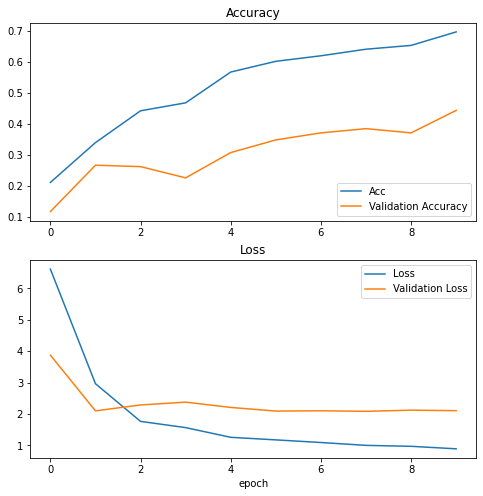

[I 2022-06-21 08:06:21,426] Trial 128 finished with value: 0.4183673560619354 and parameters: {'filters_l1': 14, 'kernel_size_l1': 3, 'strides_l1': 2, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.28399641535738807, 'filters_l2': 23, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'elu', 'dropout_l2': 0.22635312578135502, 'filters_l3': 210, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.3534951730846101, 'n_units_l': 10, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.18124430257031843, 'learning_rate': 0.00015920521200097926, 'beta_1': 0.9681069656502201, 'beta_2': 0.9960738292813373, 'epsilon': 3.2834206725052455e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 17s 572ms/step - loss: 7.7692 - accuracy: 0.2906 - val_loss: 4.2491 - val_accuracy: 0.2262 - lr: 1.5703e-04
Epoch 2/10
29/29 [==============================] - 17s 590ms/step - loss: 2.0402 - accuracy: 0.5122 - val_loss: 3.2331 - val_accuracy: 0.2941 - lr: 1.5703e-04
Epoch 3/10
29/29 [==============================] - 17s 587ms/step - loss: 1.0988 - accuracy: 0.6938 - val_loss: 2.5538 - val_accuracy: 0.2941 - lr: 1.5703e-04
Epoch 4/10
29/29 [==============================] - 17s 567ms/step - loss: 0.6419 - accuracy: 0.7884 - val_loss: 2.1941 - val_accuracy: 0.4706 - lr: 1.5703e-04
Epoch 5/10
29/29 [==============================] - 17s 575ms/step - loss: 0.4077 - accuracy: 0.8775 - val_loss: 2.4501 - val_accuracy: 0.4434 - lr: 1.5703e-04
Epoch 6/10
29/29 [==============================] - 16s 568ms/step - loss: 0.2836 - accuracy: 0.9076 - val_loss: 2.4216 - val_accuracy: 0.4344 - lr: 1.5703e-04
Epoch 7/10
29/29 [======================

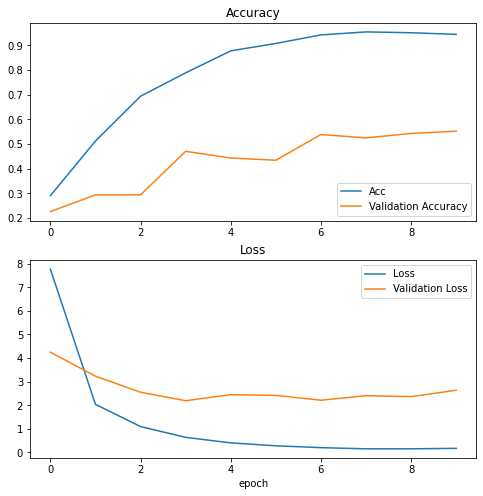

[I 2022-06-21 08:09:14,995] Trial 129 finished with value: 0.6326530575752258 and parameters: {'filters_l1': 25, 'kernel_size_l1': 3, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.20638206620941968, 'filters_l2': 30, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'elu', 'dropout_l2': 0.24262370035273048, 'filters_l3': 155, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.36021191315142564, 'n_units_l': 21, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.20660420948409053, 'learning_rate': 0.000157033633487433, 'beta_1': 0.9599207141595696, 'beta_2': 0.9848564626732621, 'epsilon': 3.624485676398598e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 589ms/step - loss: 9.7395 - accuracy: 0.2639 - val_loss: 3.7410 - val_accuracy: 0.2217 - lr: 1.1241e-04
Epoch 2/10
29/29 [==============================] - 16s 577ms/step - loss: 2.8214 - accuracy: 0.4187 - val_loss: 3.2586 - val_accuracy: 0.2172 - lr: 1.1241e-04
Epoch 3/10
29/29 [==============================] - 17s 546ms/step - loss: 1.7260 - accuracy: 0.5078 - val_loss: 2.5798 - val_accuracy: 0.2398 - lr: 1.1241e-04
Epoch 4/10
29/29 [==============================] - 17s 579ms/step - loss: 1.3519 - accuracy: 0.5813 - val_loss: 1.9251 - val_accuracy: 0.3710 - lr: 1.1241e-04
Epoch 5/10
29/29 [==============================] - 17s 576ms/step - loss: 1.0623 - accuracy: 0.6548 - val_loss: 1.8562 - val_accuracy: 0.4118 - lr: 1.1241e-04
Epoch 6/10
29/29 [==============================] - 17s 592ms/step - loss: 0.9731 - accuracy: 0.6559 - val_loss: 1.8157 - val_accuracy: 0.4706 - lr: 1.1241e-04
Epoch 7/10
29/29 [======================

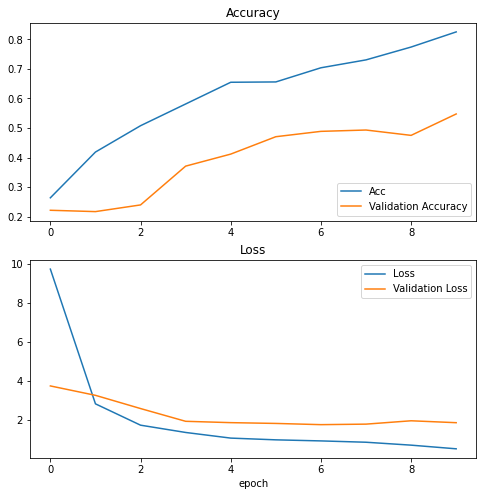

[I 2022-06-21 08:12:08,556] Trial 130 finished with value: 0.5 and parameters: {'filters_l1': 15, 'kernel_size_l1': 3, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.3293404443187917, 'filters_l2': 38, 'kernel_size_l2': 3, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.28331280326333297, 'filters_l3': 231, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.3361823158507043, 'n_units_l': 9, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.19484263431160115, 'learning_rate': 0.00011241285932785239, 'beta_1': 0.9636251957963674, 'beta_2': 0.9975255417850216, 'epsilon': 4.422601011371946e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 549ms/step - loss: 13.8445 - accuracy: 0.2350 - val_loss: 4.5319 - val_accuracy: 0.1719 - lr: 2.7857e-04
Epoch 2/10
29/29 [==============================] - 16s 572ms/step - loss: 4.2600 - accuracy: 0.4053 - val_loss: 3.1235 - val_accuracy: 0.2353 - lr: 2.7857e-04
Epoch 3/10
29/29 [==============================] - 17s 556ms/step - loss: 2.2573 - accuracy: 0.5356 - val_loss: 2.0408 - val_accuracy: 0.3122 - lr: 2.7857e-04
Epoch 4/10
29/29 [==============================] - 17s 563ms/step - loss: 1.2519 - accuracy: 0.6637 - val_loss: 1.8971 - val_accuracy: 0.3710 - lr: 2.7857e-04
Epoch 5/10
29/29 [==============================] - 16s 575ms/step - loss: 0.7878 - accuracy: 0.7305 - val_loss: 1.6631 - val_accuracy: 0.4796 - lr: 2.7857e-04
Epoch 6/10
29/29 [==============================] - 16s 573ms/step - loss: 0.5052 - accuracy: 0.8374 - val_loss: 1.5006 - val_accuracy: 0.5113 - lr: 2.7857e-04
Epoch 7/10
29/29 [=====================

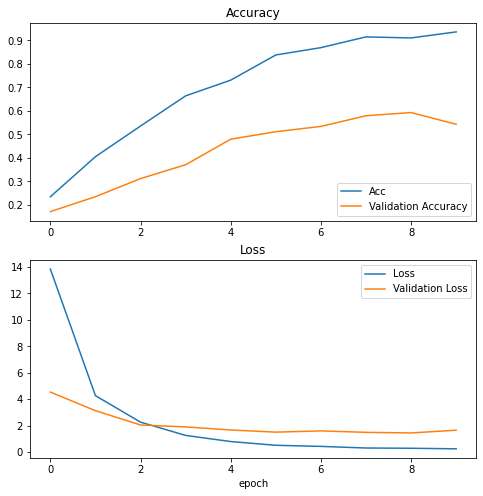

[I 2022-06-21 08:15:03,562] Trial 131 finished with value: 0.7142857313156128 and parameters: {'filters_l1': 10, 'kernel_size_l1': 3, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.15416153325457466, 'filters_l2': 46, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.21726160204896386, 'filters_l3': 169, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.3503157554010324, 'n_units_l': 11, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.16142572608200234, 'learning_rate': 0.00027856655341992306, 'beta_1': 0.9574240653065803, 'beta_2': 0.9939658051999486, 'epsilon': 2.861982514360935e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 580ms/step - loss: 11.3058 - accuracy: 0.2929 - val_loss: 3.6775 - val_accuracy: 0.2534 - lr: 1.2547e-04
Epoch 2/10
29/29 [==============================] - 17s 571ms/step - loss: 2.7972 - accuracy: 0.5178 - val_loss: 2.5616 - val_accuracy: 0.2715 - lr: 1.2547e-04
Epoch 3/10
29/29 [==============================] - 17s 589ms/step - loss: 1.3878 - accuracy: 0.6258 - val_loss: 1.6337 - val_accuracy: 0.4706 - lr: 1.2547e-04
Epoch 4/10
29/29 [==============================] - 17s 574ms/step - loss: 0.7897 - accuracy: 0.7717 - val_loss: 1.6765 - val_accuracy: 0.4751 - lr: 1.2547e-04
Epoch 5/10
29/29 [==============================] - 17s 575ms/step - loss: 0.5852 - accuracy: 0.8241 - val_loss: 1.7721 - val_accuracy: 0.4932 - lr: 1.2547e-04
Epoch 6/10
29/29 [==============================] - 17s 570ms/step - loss: 0.3355 - accuracy: 0.8786 - val_loss: 1.4672 - val_accuracy: 0.6199 - lr: 1.2547e-04
Epoch 7/10
29/29 [=====================

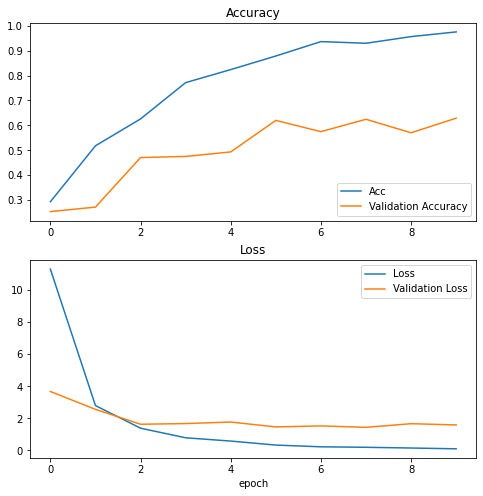

[I 2022-06-21 08:17:57,275] Trial 132 finished with value: 0.6938775777816772 and parameters: {'filters_l1': 11, 'kernel_size_l1': 3, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.12494126126771961, 'filters_l2': 35, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.20532871854002926, 'filters_l3': 222, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.3306406245374022, 'n_units_l': 18, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.18468468262490118, 'learning_rate': 0.00012547012182711112, 'beta_1': 0.9599204920253134, 'beta_2': 0.9981535097373743, 'epsilon': 3.122762771618912e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 576ms/step - loss: 6.5060 - accuracy: 0.2951 - val_loss: 3.8503 - val_accuracy: 0.2398 - lr: 2.2032e-04
Epoch 2/10
29/29 [==============================] - 17s 568ms/step - loss: 2.0171 - accuracy: 0.4933 - val_loss: 2.4824 - val_accuracy: 0.3710 - lr: 2.2032e-04
Epoch 3/10
29/29 [==============================] - 17s 582ms/step - loss: 1.3888 - accuracy: 0.6058 - val_loss: 1.7779 - val_accuracy: 0.3665 - lr: 2.2032e-04
Epoch 4/10
29/29 [==============================] - 17s 571ms/step - loss: 0.9156 - accuracy: 0.6982 - val_loss: 1.8211 - val_accuracy: 0.4706 - lr: 2.2032e-04
Epoch 5/10
29/29 [==============================] - 17s 558ms/step - loss: 0.5962 - accuracy: 0.7895 - val_loss: 1.6137 - val_accuracy: 0.4932 - lr: 2.2032e-04
Epoch 6/10
29/29 [==============================] - 17s 580ms/step - loss: 0.4062 - accuracy: 0.8619 - val_loss: 1.3878 - val_accuracy: 0.5475 - lr: 2.2032e-04
Epoch 7/10
29/29 [======================

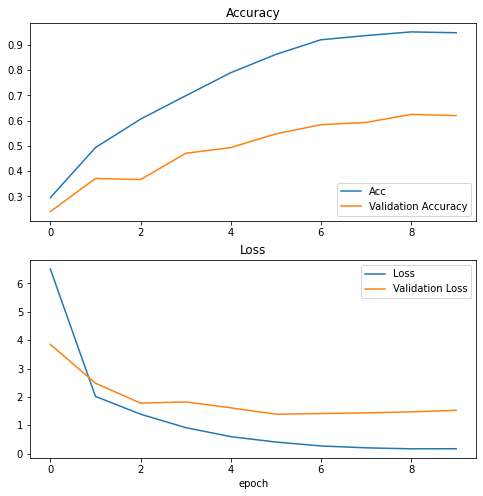

[I 2022-06-21 08:20:52,541] Trial 133 finished with value: 0.7448979616165161 and parameters: {'filters_l1': 13, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.16357899931637904, 'filters_l2': 41, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.2515397306405308, 'filters_l3': 119, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.34213048039615157, 'n_units_l': 15, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.14110689540876142, 'learning_rate': 0.0002203182262655939, 'beta_1': 0.9621377627640598, 'beta_2': 0.9997795459076577, 'epsilon': 2.3499616349841173e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 575ms/step - loss: 5.0606 - accuracy: 0.3163 - val_loss: 2.1794 - val_accuracy: 0.2896 - lr: 2.1628e-04
Epoch 2/10
29/29 [==============================] - 17s 574ms/step - loss: 1.7733 - accuracy: 0.5479 - val_loss: 1.8390 - val_accuracy: 0.3665 - lr: 2.1628e-04
Epoch 3/10
29/29 [==============================] - 17s 580ms/step - loss: 1.0236 - accuracy: 0.6704 - val_loss: 1.6974 - val_accuracy: 0.4208 - lr: 2.1628e-04
Epoch 4/10
29/29 [==============================] - 17s 551ms/step - loss: 0.5999 - accuracy: 0.7951 - val_loss: 1.5291 - val_accuracy: 0.5023 - lr: 2.1628e-04
Epoch 5/10
29/29 [==============================] - 17s 577ms/step - loss: 0.4727 - accuracy: 0.8508 - val_loss: 1.6039 - val_accuracy: 0.4887 - lr: 2.1628e-04
Epoch 6/10
29/29 [==============================] - 17s 569ms/step - loss: 0.3010 - accuracy: 0.9065 - val_loss: 1.5174 - val_accuracy: 0.5475 - lr: 2.1628e-04
Epoch 7/10
29/29 [======================

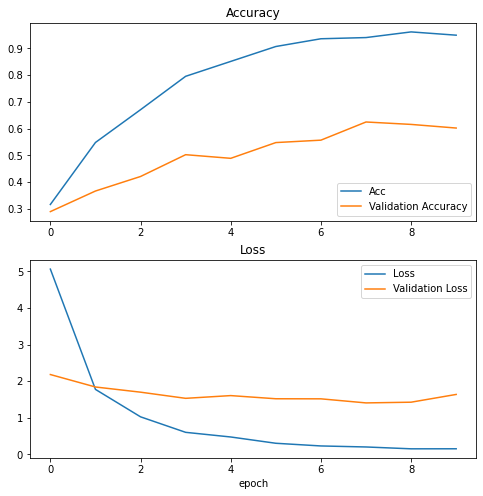

[I 2022-06-21 08:23:46,657] Trial 134 finished with value: 0.6938775777816772 and parameters: {'filters_l1': 13, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.18042480701722854, 'filters_l2': 41, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.25770967878649986, 'filters_l3': 124, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.37962819370316664, 'n_units_l': 15, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.14629203204175445, 'learning_rate': 0.00021628137553020724, 'beta_1': 0.9626613157739531, 'beta_2': 0.9952521593172936, 'epsilon': 1.8040912504441546e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 582ms/step - loss: 7.3294 - accuracy: 0.2862 - val_loss: 2.4412 - val_accuracy: 0.2805 - lr: 1.7984e-04
Epoch 2/10
29/29 [==============================] - 17s 577ms/step - loss: 2.2451 - accuracy: 0.4399 - val_loss: 2.3530 - val_accuracy: 0.3077 - lr: 1.7984e-04
Epoch 3/10
29/29 [==============================] - 17s 575ms/step - loss: 1.4794 - accuracy: 0.5679 - val_loss: 1.9573 - val_accuracy: 0.3620 - lr: 1.7984e-04
Epoch 4/10
29/29 [==============================] - 17s 570ms/step - loss: 1.1906 - accuracy: 0.6180 - val_loss: 1.8865 - val_accuracy: 0.3575 - lr: 1.7984e-04
Epoch 5/10
29/29 [==============================] - 17s 578ms/step - loss: 0.8073 - accuracy: 0.7361 - val_loss: 1.5986 - val_accuracy: 0.4796 - lr: 1.7984e-04
Epoch 6/10
29/29 [==============================] - 17s 583ms/step - loss: 0.7484 - accuracy: 0.7249 - val_loss: 1.5922 - val_accuracy: 0.4661 - lr: 1.7984e-04
Epoch 7/10
29/29 [======================

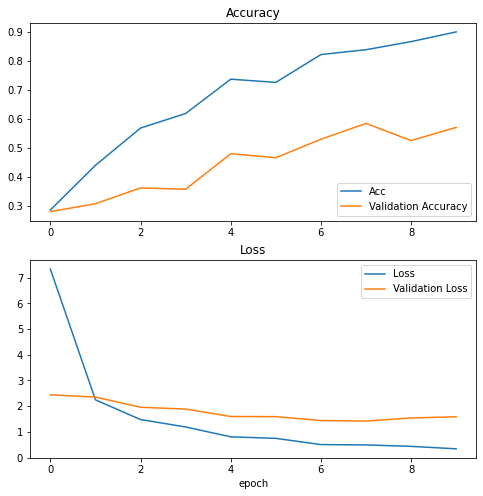

[I 2022-06-21 08:26:41,238] Trial 135 finished with value: 0.6122449040412903 and parameters: {'filters_l1': 8, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.13229056487002883, 'filters_l2': 50, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.22189620862916798, 'filters_l3': 134, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.29986208978287476, 'n_units_l': 13, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.13295938437409796, 'learning_rate': 0.00017983734434032038, 'beta_1': 0.9711803882687513, 'beta_2': 0.9994952243059716, 'epsilon': 2.3968980885993506e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 559ms/step - loss: 12.6778 - accuracy: 0.2383 - val_loss: 5.7499 - val_accuracy: 0.1267 - lr: 3.1715e-04
Epoch 2/10
29/29 [==============================] - 17s 566ms/step - loss: 3.2055 - accuracy: 0.4098 - val_loss: 1.7603 - val_accuracy: 0.4027 - lr: 3.1715e-04
Epoch 3/10
29/29 [==============================] - 16s 553ms/step - loss: 1.6642 - accuracy: 0.5334 - val_loss: 1.7965 - val_accuracy: 0.3710 - lr: 3.1715e-04
Epoch 4/10
29/29 [==============================] - 17s 577ms/step - loss: 1.0921 - accuracy: 0.6492 - val_loss: 1.6343 - val_accuracy: 0.4208 - lr: 3.1715e-04
Epoch 5/10
29/29 [==============================] - 17s 575ms/step - loss: 0.8193 - accuracy: 0.7227 - val_loss: 1.7156 - val_accuracy: 0.3620 - lr: 3.1715e-04
Epoch 6/10
29/29 [==============================] - 17s 564ms/step - loss: 0.6980 - accuracy: 0.7572 - val_loss: 1.5332 - val_accuracy: 0.4796 - lr: 3.1715e-04
Epoch 7/10
29/29 [=====================

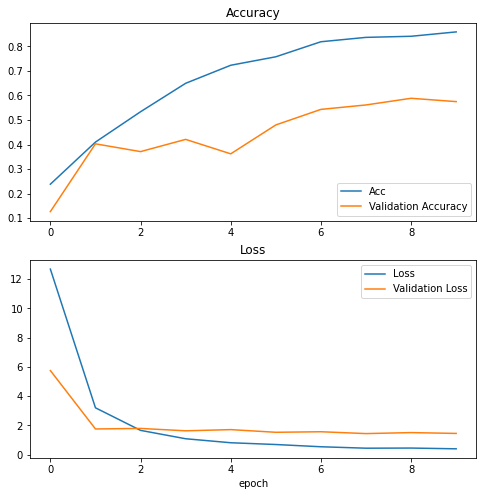

[I 2022-06-21 08:29:35,070] Trial 136 finished with value: 0.6326530575752258 and parameters: {'filters_l1': 12, 'kernel_size_l1': 3, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.16764702842011564, 'filters_l2': 39, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.23355551724123455, 'filters_l3': 169, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.34192500399661463, 'n_units_l': 7, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.15862630193064783, 'learning_rate': 0.00031715184215014714, 'beta_1': 0.967213722828231, 'beta_2': 0.9899428181893758, 'epsilon': 2.7187173009236202e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 594ms/step - loss: 5.1051 - accuracy: 0.2784 - val_loss: 3.1549 - val_accuracy: 0.2579 - lr: 8.7907e-05
Epoch 2/10
29/29 [==============================] - 17s 574ms/step - loss: 1.9437 - accuracy: 0.4521 - val_loss: 2.2893 - val_accuracy: 0.2217 - lr: 8.7907e-05
Epoch 3/10
29/29 [==============================] - 17s 565ms/step - loss: 1.3465 - accuracy: 0.5791 - val_loss: 2.3912 - val_accuracy: 0.3213 - lr: 8.7907e-05
Epoch 4/10
29/29 [==============================] - 17s 558ms/step - loss: 0.8793 - accuracy: 0.7116 - val_loss: 1.9153 - val_accuracy: 0.3846 - lr: 8.7907e-05
Epoch 5/10
29/29 [==============================] - 17s 583ms/step - loss: 0.6209 - accuracy: 0.7840 - val_loss: 2.1011 - val_accuracy: 0.3756 - lr: 8.7907e-05
Epoch 6/10
29/29 [==============================] - 17s 569ms/step - loss: 0.5314 - accuracy: 0.8140 - val_loss: 1.8375 - val_accuracy: 0.4615 - lr: 8.7907e-05
Epoch 7/10
29/29 [======================

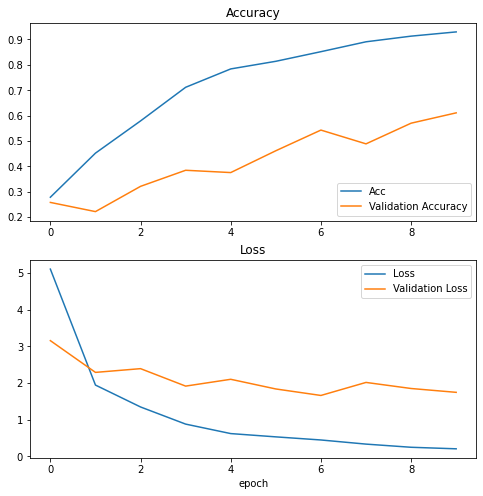

[I 2022-06-21 08:32:30,801] Trial 137 finished with value: 0.6530612111091614 and parameters: {'filters_l1': 16, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.14337696222079763, 'filters_l2': 59, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.46948719452548304, 'filters_l3': 119, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.3108085423406666, 'n_units_l': 16, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.12137475645778589, 'learning_rate': 8.790671205539882e-05, 'beta_1': 0.9557553175069139, 'beta_2': 0.9515939011976018, 'epsilon': 2.197477798752761e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 589ms/step - loss: 16.6635 - accuracy: 0.2706 - val_loss: 8.3253 - val_accuracy: 0.2127 - lr: 1.5311e-04
Epoch 2/10
29/29 [==============================] - 17s 588ms/step - loss: 4.2033 - accuracy: 0.4844 - val_loss: 3.2779 - val_accuracy: 0.3303 - lr: 1.5311e-04
Epoch 3/10
29/29 [==============================] - 17s 582ms/step - loss: 1.8478 - accuracy: 0.6425 - val_loss: 2.6790 - val_accuracy: 0.3801 - lr: 1.5311e-04
Epoch 4/10
29/29 [==============================] - 17s 580ms/step - loss: 1.0778 - accuracy: 0.7416 - val_loss: 1.9689 - val_accuracy: 0.4887 - lr: 1.5311e-04
Epoch 5/10
29/29 [==============================] - 17s 575ms/step - loss: 0.5196 - accuracy: 0.8396 - val_loss: 1.8397 - val_accuracy: 0.5294 - lr: 1.5311e-04
Epoch 6/10
29/29 [==============================] - 17s 566ms/step - loss: 0.3023 - accuracy: 0.8931 - val_loss: 1.8177 - val_accuracy: 0.5249 - lr: 1.5311e-04
Epoch 7/10
29/29 [=====================

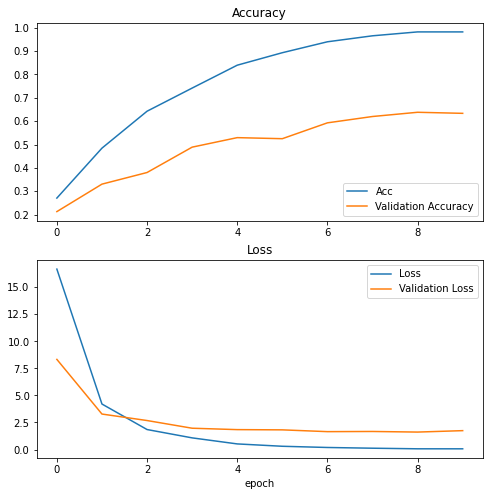

[I 2022-06-21 08:35:26,311] Trial 138 finished with value: 0.6938775777816772 and parameters: {'filters_l1': 14, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.11996863037956841, 'filters_l2': 48, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.26526522393736035, 'filters_l3': 256, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.3210846013559056, 'n_units_l': 21, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.1390838987946872, 'learning_rate': 0.00015310893729052685, 'beta_1': 0.9617392720255353, 'beta_2': 0.9961610211448233, 'epsilon': 1.951803725384599e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 580ms/step - loss: 6.0541 - accuracy: 0.2116 - val_loss: 2.0796 - val_accuracy: 0.2579 - lr: 1.3230e-04
Epoch 2/10
29/29 [==============================] - 17s 586ms/step - loss: 2.1856 - accuracy: 0.3508 - val_loss: 1.8288 - val_accuracy: 0.3394 - lr: 1.3230e-04
Epoch 3/10
29/29 [==============================] - 17s 571ms/step - loss: 1.5950 - accuracy: 0.4020 - val_loss: 1.7567 - val_accuracy: 0.3348 - lr: 1.3230e-04
Epoch 4/10
29/29 [==============================] - 17s 585ms/step - loss: 1.2868 - accuracy: 0.5167 - val_loss: 1.6696 - val_accuracy: 0.4072 - lr: 1.3230e-04
Epoch 5/10
29/29 [==============================] - 17s 578ms/step - loss: 1.1014 - accuracy: 0.5780 - val_loss: 1.6072 - val_accuracy: 0.4389 - lr: 1.3230e-04
Epoch 6/10
29/29 [==============================] - 17s 578ms/step - loss: 1.0242 - accuracy: 0.6192 - val_loss: 1.5396 - val_accuracy: 0.4525 - lr: 1.3230e-04
Epoch 7/10
29/29 [======================

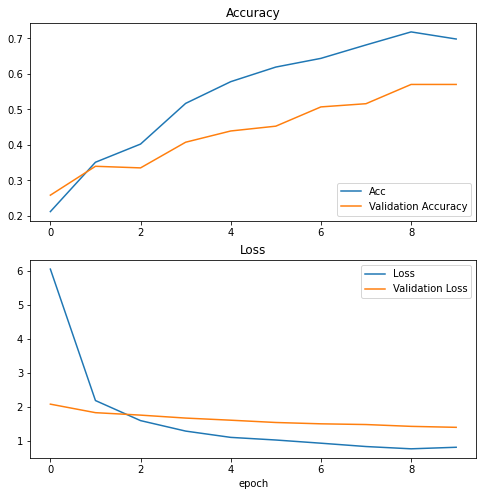

[I 2022-06-21 08:38:20,819] Trial 139 finished with value: 0.6122449040412903 and parameters: {'filters_l1': 12, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.15961339123770682, 'filters_l2': 28, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.18918079903309096, 'filters_l3': 145, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'linear', 'dropout_l3': 0.3650843578452265, 'n_units_l': 5, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.17909518573938732, 'learning_rate': 0.000132298111325391, 'beta_1': 0.9648490444183212, 'beta_2': 0.9997451868700972, 'epsilon': 3.8386546969023624e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 582ms/step - loss: 10.1406 - accuracy: 0.2639 - val_loss: 3.2466 - val_accuracy: 0.1855 - lr: 2.4376e-04
Epoch 2/10
29/29 [==============================] - 17s 584ms/step - loss: 2.2100 - accuracy: 0.4699 - val_loss: 2.0258 - val_accuracy: 0.2941 - lr: 2.4376e-04
Epoch 3/10
29/29 [==============================] - 17s 574ms/step - loss: 1.1783 - accuracy: 0.6437 - val_loss: 2.0652 - val_accuracy: 0.3484 - lr: 2.4376e-04
Epoch 4/10
29/29 [==============================] - 17s 565ms/step - loss: 0.8729 - accuracy: 0.7261 - val_loss: 1.6919 - val_accuracy: 0.4027 - lr: 2.4376e-04
Epoch 5/10
29/29 [==============================] - 17s 585ms/step - loss: 0.6321 - accuracy: 0.7996 - val_loss: 1.5252 - val_accuracy: 0.4796 - lr: 2.4376e-04
Epoch 6/10
29/29 [==============================] - 17s 580ms/step - loss: 0.4566 - accuracy: 0.8597 - val_loss: 1.3893 - val_accuracy: 0.5792 - lr: 2.4376e-04
Epoch 7/10
29/29 [=====================

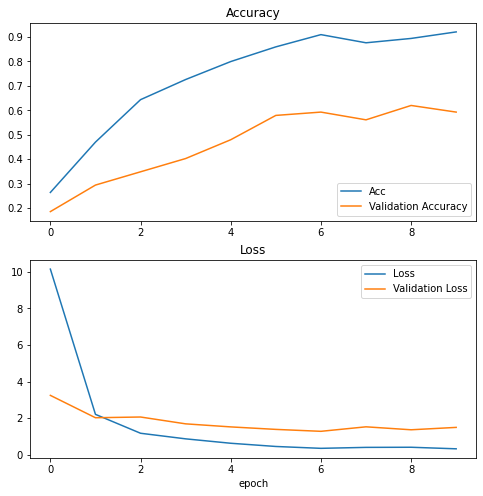

[I 2022-06-21 08:41:16,484] Trial 140 finished with value: 0.7346938848495483 and parameters: {'filters_l1': 20, 'kernel_size_l1': 3, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.14795180833253346, 'filters_l2': 34, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.24191638334569482, 'filters_l3': 193, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.34856771670882847, 'n_units_l': 11, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.17217561645319426, 'learning_rate': 0.0002437638721237667, 'beta_1': 0.9580307207010706, 'beta_2': 0.9920674963933932, 'epsilon': 5.7888620377469805e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 598ms/step - loss: 7.3474 - accuracy: 0.2149 - val_loss: 5.0518 - val_accuracy: 0.1176 - lr: 2.3756e-04
Epoch 2/10
29/29 [==============================] - 17s 588ms/step - loss: 2.1213 - accuracy: 0.4187 - val_loss: 2.4947 - val_accuracy: 0.2534 - lr: 2.3756e-04
Epoch 3/10
29/29 [==============================] - 17s 582ms/step - loss: 1.3951 - accuracy: 0.5557 - val_loss: 2.2235 - val_accuracy: 0.2398 - lr: 2.3756e-04
Epoch 4/10
29/29 [==============================] - 17s 565ms/step - loss: 0.9015 - accuracy: 0.6915 - val_loss: 1.7682 - val_accuracy: 0.4344 - lr: 2.3756e-04
Epoch 5/10
29/29 [==============================] - 17s 579ms/step - loss: 0.7230 - accuracy: 0.7639 - val_loss: 1.6700 - val_accuracy: 0.4751 - lr: 2.3756e-04
Epoch 6/10
29/29 [==============================] - 17s 576ms/step - loss: 0.5975 - accuracy: 0.8096 - val_loss: 1.5326 - val_accuracy: 0.5656 - lr: 2.3756e-04
Epoch 7/10
29/29 [======================

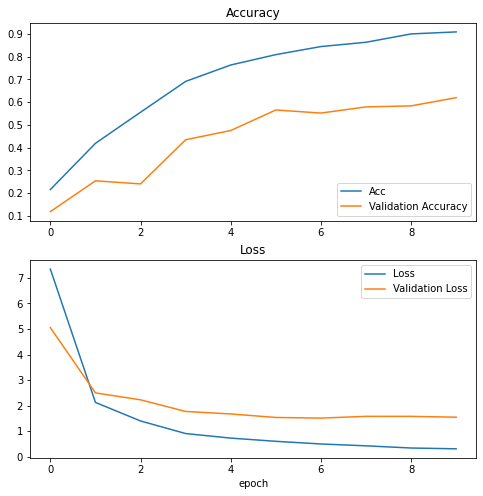

[I 2022-06-21 08:44:12,281] Trial 141 finished with value: 0.7448979616165161 and parameters: {'filters_l1': 10, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.15227345410506987, 'filters_l2': 35, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.25127898887644073, 'filters_l3': 110, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.3493213779785019, 'n_units_l': 11, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.1706212760154851, 'learning_rate': 0.0002375642332795744, 'beta_1': 0.9590152154032087, 'beta_2': 0.9916744622054636, 'epsilon': 3.35547058186199e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 608ms/step - loss: 6.0610 - accuracy: 0.2472 - val_loss: 2.0796 - val_accuracy: 0.2670 - lr: 1.8716e-04
Epoch 2/10
29/29 [==============================] - 17s 581ms/step - loss: 1.8685 - accuracy: 0.4421 - val_loss: 1.8082 - val_accuracy: 0.3620 - lr: 1.8716e-04
Epoch 3/10
29/29 [==============================] - 17s 577ms/step - loss: 1.3222 - accuracy: 0.5535 - val_loss: 1.6645 - val_accuracy: 0.4434 - lr: 1.8716e-04
Epoch 4/10
29/29 [==============================] - 17s 572ms/step - loss: 0.9478 - accuracy: 0.6860 - val_loss: 1.5942 - val_accuracy: 0.4751 - lr: 1.8716e-04
Epoch 5/10
29/29 [==============================] - 17s 590ms/step - loss: 0.6233 - accuracy: 0.7906 - val_loss: 1.4729 - val_accuracy: 0.5566 - lr: 1.8716e-04
Epoch 6/10
29/29 [==============================] - 17s 572ms/step - loss: 0.5970 - accuracy: 0.7929 - val_loss: 1.6993 - val_accuracy: 0.4751 - lr: 1.8716e-04
Epoch 7/10
29/29 [======================

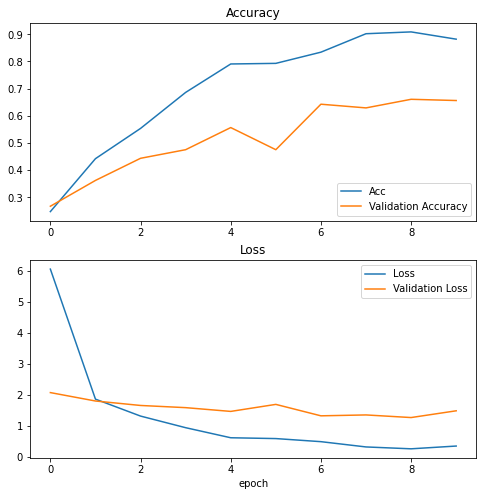

[I 2022-06-21 08:47:08,043] Trial 142 finished with value: 0.7346938848495483 and parameters: {'filters_l1': 9, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.16395452475401767, 'filters_l2': 43, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.24873017771688133, 'filters_l3': 113, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.35569604064700383, 'n_units_l': 13, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.16322854861522, 'learning_rate': 0.00018715537420062968, 'beta_1': 0.9481742725982304, 'beta_2': 0.988506756859842, 'epsilon': 4.331506505832772e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 617ms/step - loss: 4.7036 - accuracy: 0.3018 - val_loss: 2.2564 - val_accuracy: 0.2489 - lr: 2.2230e-04
Epoch 2/10
29/29 [==============================] - 17s 580ms/step - loss: 1.9487 - accuracy: 0.4287 - val_loss: 2.0621 - val_accuracy: 0.2670 - lr: 2.2230e-04
Epoch 3/10
29/29 [==============================] - 17s 584ms/step - loss: 1.2634 - accuracy: 0.5757 - val_loss: 1.5367 - val_accuracy: 0.4706 - lr: 2.2230e-04
Epoch 4/10
29/29 [==============================] - 17s 579ms/step - loss: 1.0140 - accuracy: 0.6292 - val_loss: 1.5290 - val_accuracy: 0.4570 - lr: 2.2230e-04
Epoch 5/10
29/29 [==============================] - 17s 562ms/step - loss: 0.8968 - accuracy: 0.6893 - val_loss: 1.5796 - val_accuracy: 0.4796 - lr: 2.2230e-04
Epoch 6/10
29/29 [==============================] - 17s 579ms/step - loss: 0.7489 - accuracy: 0.7272 - val_loss: 1.5003 - val_accuracy: 0.5204 - lr: 2.2230e-04
Epoch 7/10
29/29 [======================

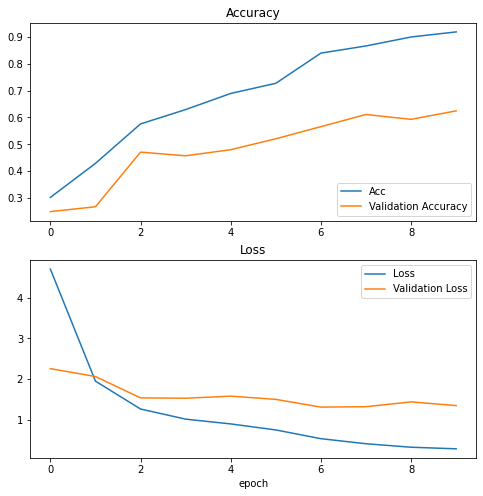

[I 2022-06-21 08:50:04,236] Trial 143 finished with value: 0.7142857313156128 and parameters: {'filters_l1': 9, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.15630158808275338, 'filters_l2': 44, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.2711785769424213, 'filters_l3': 112, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.3360068961457466, 'n_units_l': 9, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.15101253232069634, 'learning_rate': 0.0002223021319966568, 'beta_1': 0.9719844102370611, 'beta_2': 0.9881952479065751, 'epsilon': 3.477284307290771e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 579ms/step - loss: 13.8375 - accuracy: 0.2416 - val_loss: 6.6068 - val_accuracy: 0.1900 - lr: 2.5489e-04
Epoch 2/10
29/29 [==============================] - 17s 584ms/step - loss: 4.0029 - accuracy: 0.3976 - val_loss: 3.3816 - val_accuracy: 0.3575 - lr: 2.5489e-04
Epoch 3/10
29/29 [==============================] - 17s 578ms/step - loss: 1.8618 - accuracy: 0.5490 - val_loss: 1.8338 - val_accuracy: 0.4027 - lr: 2.5489e-04
Epoch 4/10
29/29 [==============================] - 17s 586ms/step - loss: 1.1776 - accuracy: 0.6559 - val_loss: 1.6076 - val_accuracy: 0.4570 - lr: 2.5489e-04
Epoch 5/10
29/29 [==============================] - 17s 577ms/step - loss: 0.7070 - accuracy: 0.7661 - val_loss: 1.6247 - val_accuracy: 0.4932 - lr: 2.5489e-04
Epoch 6/10
29/29 [==============================] - 17s 577ms/step - loss: 0.4719 - accuracy: 0.8430 - val_loss: 1.5383 - val_accuracy: 0.5204 - lr: 2.5489e-04
Epoch 7/10
29/29 [=====================

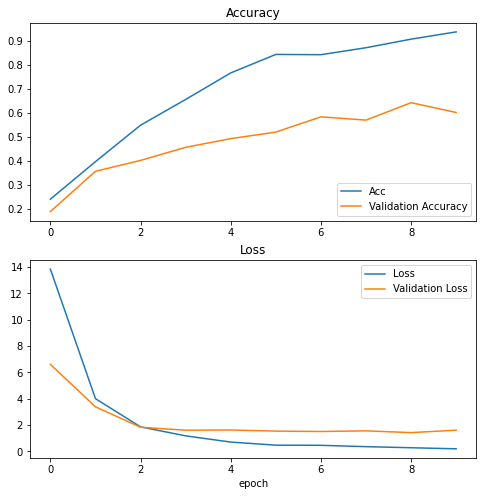

[I 2022-06-21 08:52:59,297] Trial 144 finished with value: 0.7244898080825806 and parameters: {'filters_l1': 11, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.13503911519773149, 'filters_l2': 31, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.2559186167905913, 'filters_l3': 157, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.19394305180269691, 'n_units_l': 10, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.1414381851424986, 'learning_rate': 0.0002548861040409411, 'beta_1': 0.9685150461295244, 'beta_2': 0.9946162989254438, 'epsilon': 2.9777680722146798e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 606ms/step - loss: 7.1473 - accuracy: 0.2416 - val_loss: 4.3661 - val_accuracy: 0.0814 - lr: 6.5770e-05
Epoch 2/10
29/29 [==============================] - 17s 565ms/step - loss: 3.2359 - accuracy: 0.3608 - val_loss: 2.3385 - val_accuracy: 0.2624 - lr: 6.5770e-05
Epoch 3/10
29/29 [==============================] - 17s 567ms/step - loss: 1.9450 - accuracy: 0.4744 - val_loss: 1.8319 - val_accuracy: 0.3665 - lr: 6.5770e-05
Epoch 4/10
29/29 [==============================] - 17s 580ms/step - loss: 1.4628 - accuracy: 0.5100 - val_loss: 1.7785 - val_accuracy: 0.3891 - lr: 6.5770e-05
Epoch 5/10
29/29 [==============================] - 17s 581ms/step - loss: 1.1665 - accuracy: 0.6125 - val_loss: 1.7440 - val_accuracy: 0.4299 - lr: 6.5770e-05
Epoch 6/10
29/29 [==============================] - 17s 579ms/step - loss: 0.9991 - accuracy: 0.6503 - val_loss: 1.5509 - val_accuracy: 0.4661 - lr: 6.5770e-05
Epoch 7/10
29/29 [======================

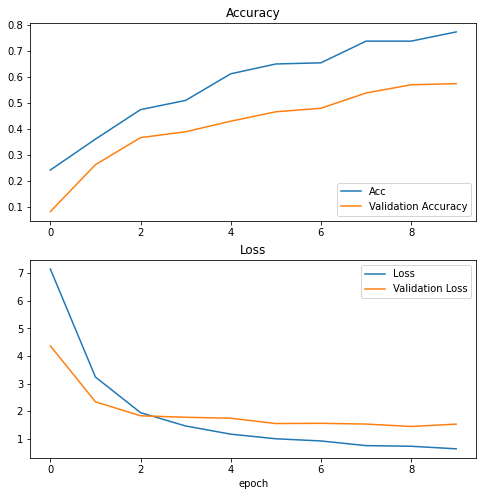

[I 2022-06-21 08:55:53,939] Trial 145 finished with value: 0.6530612111091614 and parameters: {'filters_l1': 10, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.17719836085388393, 'filters_l2': 36, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.22840411757520102, 'filters_l3': 182, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.3428483974718141, 'n_units_l': 17, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.47931468022853424, 'learning_rate': 6.577047489904124e-05, 'beta_1': 0.9608805933959328, 'beta_2': 0.9858101449833166, 'epsilon': 2.4673475183900522e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 575ms/step - loss: 5.3241 - accuracy: 0.2851 - val_loss: 2.6042 - val_accuracy: 0.1538 - lr: 1.6800e-04
Epoch 2/10
29/29 [==============================] - 17s 563ms/step - loss: 2.4440 - accuracy: 0.3953 - val_loss: 1.9620 - val_accuracy: 0.2715 - lr: 1.6800e-04
Epoch 3/10
29/29 [==============================] - 17s 554ms/step - loss: 1.4904 - accuracy: 0.5468 - val_loss: 2.0195 - val_accuracy: 0.3484 - lr: 1.6800e-04
Epoch 4/10
29/29 [==============================] - 17s 575ms/step - loss: 1.0488 - accuracy: 0.6548 - val_loss: 1.9366 - val_accuracy: 0.3665 - lr: 1.6800e-04
Epoch 5/10
29/29 [==============================] - 17s 571ms/step - loss: 0.7817 - accuracy: 0.7494 - val_loss: 1.6141 - val_accuracy: 0.5068 - lr: 1.6800e-04
Epoch 6/10
29/29 [==============================] - 17s 579ms/step - loss: 0.5935 - accuracy: 0.8062 - val_loss: 1.8116 - val_accuracy: 0.4706 - lr: 1.6800e-04
Epoch 7/10
29/29 [======================

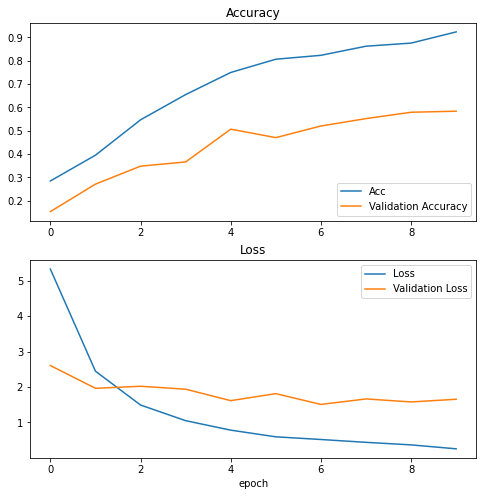

[I 2022-06-21 08:58:48,753] Trial 146 finished with value: 0.704081654548645 and parameters: {'filters_l1': 8, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.11233727118845856, 'filters_l2': 54, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.24272399647743387, 'filters_l3': 136, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.3291729033121693, 'n_units_l': 8, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.1156043865970359, 'learning_rate': 0.00016800282406467557, 'beta_1': 0.9650843583890071, 'beta_2': 0.9826312675165312, 'epsilon': 1.4930397805708608e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 587ms/step - loss: 18.7651 - accuracy: 0.2817 - val_loss: 22.5919 - val_accuracy: 0.0860 - lr: 3.0508e-04
Epoch 2/10
29/29 [==============================] - 17s 582ms/step - loss: 5.4644 - accuracy: 0.4944 - val_loss: 4.5666 - val_accuracy: 0.3484 - lr: 3.0508e-04
Epoch 3/10
29/29 [==============================] - 17s 572ms/step - loss: 2.4538 - accuracy: 0.6615 - val_loss: 3.4722 - val_accuracy: 0.4027 - lr: 3.0508e-04
Epoch 4/10
29/29 [==============================] - 17s 569ms/step - loss: 2.8328 - accuracy: 0.6592 - val_loss: 3.0095 - val_accuracy: 0.5068 - lr: 3.0508e-04
Epoch 5/10
29/29 [==============================] - 17s 583ms/step - loss: 2.2861 - accuracy: 0.7160 - val_loss: 4.1893 - val_accuracy: 0.4344 - lr: 3.0508e-04
Epoch 6/10
29/29 [==============================] - 17s 549ms/step - loss: 1.1914 - accuracy: 0.8218 - val_loss: 4.0454 - val_accuracy: 0.4932 - lr: 3.0508e-04
Epoch 7/10
29/29 [====================

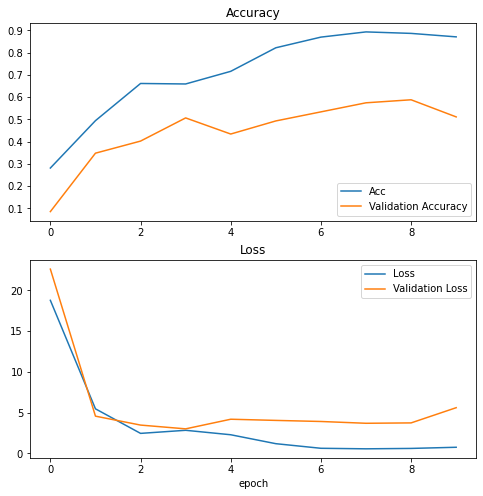

[I 2022-06-21 09:01:43,529] Trial 147 finished with value: 0.5204081535339355 and parameters: {'filters_l1': 10, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.12585810963188213, 'filters_l2': 57, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.21276510716646693, 'filters_l3': 103, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.39176642427674235, 'n_units_l': 75, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.13016335059445291, 'learning_rate': 0.0003050824489709874, 'beta_1': 0.9629382020489207, 'beta_2': 0.9975744615998406, 'epsilon': 1.6604691541426014e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 17s 574ms/step - loss: 6.9463 - accuracy: 0.3151 - val_loss: 4.5134 - val_accuracy: 0.2443 - lr: 3.9076e-04
Epoch 2/10
29/29 [==============================] - 17s 552ms/step - loss: 2.0473 - accuracy: 0.5323 - val_loss: 1.6709 - val_accuracy: 0.3620 - lr: 3.9076e-04
Epoch 3/10
29/29 [==============================] - 17s 593ms/step - loss: 0.9061 - accuracy: 0.7238 - val_loss: 1.4146 - val_accuracy: 0.4751 - lr: 3.9076e-04
Epoch 4/10
29/29 [==============================] - 17s 576ms/step - loss: 0.5120 - accuracy: 0.8218 - val_loss: 1.6110 - val_accuracy: 0.4570 - lr: 3.9076e-04
Epoch 5/10
29/29 [==============================] - 16s 569ms/step - loss: 0.2891 - accuracy: 0.9198 - val_loss: 1.4368 - val_accuracy: 0.5158 - lr: 3.9076e-04
Epoch 6/10
29/29 [==============================] - 17s 576ms/step - loss: 0.1511 - accuracy: 0.9477 - val_loss: 1.3877 - val_accuracy: 0.6018 - lr: 3.9076e-04
Epoch 7/10
29/29 [======================

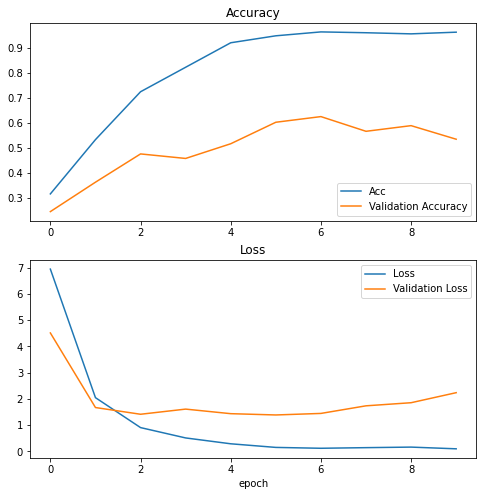

[I 2022-06-21 09:04:37,200] Trial 148 finished with value: 0.6224489808082581 and parameters: {'filters_l1': 7, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.14661333582186284, 'filters_l2': 20, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.23344977316730345, 'filters_l3': 120, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.3463940570476615, 'n_units_l': 19, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.12601706140716204, 'learning_rate': 0.0003907569841815505, 'beta_1': 0.9575186855924445, 'beta_2': 0.956498352486238, 'epsilon': 5.896210258593343e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 589ms/step - loss: 5.3505 - accuracy: 0.2461 - val_loss: 2.8472 - val_accuracy: 0.1765 - lr: 2.4344e-04
Epoch 2/10
29/29 [==============================] - 16s 579ms/step - loss: 2.1892 - accuracy: 0.3808 - val_loss: 2.1040 - val_accuracy: 0.2353 - lr: 2.4344e-04
Epoch 3/10
29/29 [==============================] - 17s 578ms/step - loss: 1.6281 - accuracy: 0.4688 - val_loss: 2.0165 - val_accuracy: 0.3077 - lr: 2.4344e-04
Epoch 4/10
29/29 [==============================] - 17s 573ms/step - loss: 1.3664 - accuracy: 0.5301 - val_loss: 1.8558 - val_accuracy: 0.3394 - lr: 2.4344e-04
Epoch 5/10
29/29 [==============================] - 17s 569ms/step - loss: 1.1748 - accuracy: 0.5924 - val_loss: 1.6767 - val_accuracy: 0.4525 - lr: 2.4344e-04
Epoch 6/10
29/29 [==============================] - 16s 577ms/step - loss: 1.0963 - accuracy: 0.6303 - val_loss: 1.6885 - val_accuracy: 0.4434 - lr: 2.4344e-04
Epoch 7/10
29/29 [======================

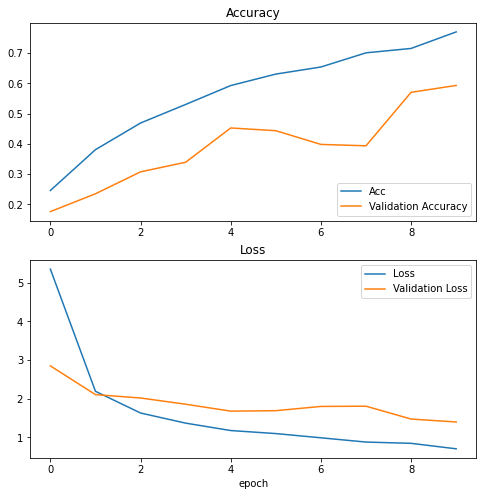

[I 2022-06-21 09:07:31,002] Trial 149 finished with value: 0.6020408272743225 and parameters: {'filters_l1': 15, 'kernel_size_l1': 7, 'strides_l1': 2, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.11783877197155, 'filters_l2': 50, 'kernel_size_l2': 3, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.2183309774340186, 'filters_l3': 128, 'kernel_size_l3': 3, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.31585143210816724, 'n_units_l': 11, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.11485483698673392, 'learning_rate': 0.0002434360671288342, 'beta_1': 0.9530758402788334, 'beta_2': 0.9918373011383866, 'epsilon': 2.2378998775118948e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 578ms/step - loss: 5.3675 - accuracy: 0.2450 - val_loss: 2.7522 - val_accuracy: 0.1312 - lr: 1.4705e-04
Epoch 2/10
29/29 [==============================] - 17s 574ms/step - loss: 2.2260 - accuracy: 0.4053 - val_loss: 2.0141 - val_accuracy: 0.2805 - lr: 1.4705e-04
Epoch 3/10
29/29 [==============================] - 17s 564ms/step - loss: 1.4989 - accuracy: 0.5200 - val_loss: 1.6697 - val_accuracy: 0.4072 - lr: 1.4705e-04
Epoch 4/10
29/29 [==============================] - 17s 584ms/step - loss: 1.0530 - accuracy: 0.6414 - val_loss: 1.6650 - val_accuracy: 0.3891 - lr: 1.4705e-04
Epoch 5/10
29/29 [==============================] - 17s 585ms/step - loss: 0.8057 - accuracy: 0.7183 - val_loss: 1.5092 - val_accuracy: 0.4434 - lr: 1.4705e-04
Epoch 6/10
29/29 [==============================] - 17s 572ms/step - loss: 0.6154 - accuracy: 0.7929 - val_loss: 1.3600 - val_accuracy: 0.5747 - lr: 1.4705e-04
Epoch 7/10
29/29 [======================

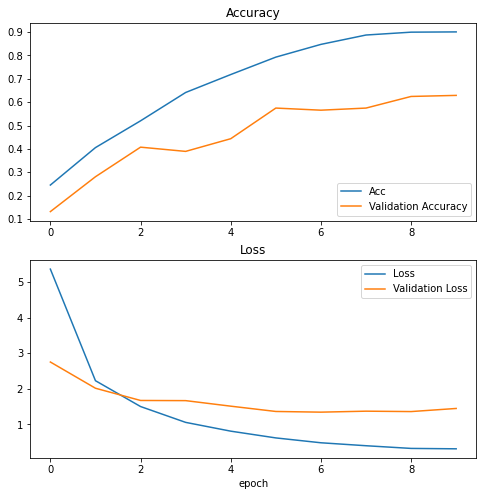

[I 2022-06-21 09:10:26,184] Trial 150 finished with value: 0.6938775777816772 and parameters: {'filters_l1': 12, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.13828843076688413, 'filters_l2': 40, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.25032176091592184, 'filters_l3': 96, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.36812932358357625, 'n_units_l': 15, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.1418016018588151, 'learning_rate': 0.00014704978169688946, 'beta_1': 0.9747937343745238, 'beta_2': 0.9999822115926661, 'epsilon': 2.7043300552993932e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 587ms/step - loss: 12.5406 - accuracy: 0.2383 - val_loss: 3.7043 - val_accuracy: 0.1810 - lr: 2.0660e-04
Epoch 2/10
29/29 [==============================] - 17s 577ms/step - loss: 3.4458 - accuracy: 0.3964 - val_loss: 2.1097 - val_accuracy: 0.2579 - lr: 2.0660e-04
Epoch 3/10
29/29 [==============================] - 17s 548ms/step - loss: 1.6206 - accuracy: 0.5757 - val_loss: 1.7404 - val_accuracy: 0.3529 - lr: 2.0660e-04
Epoch 4/10
29/29 [==============================] - 17s 578ms/step - loss: 0.9678 - accuracy: 0.6938 - val_loss: 1.5982 - val_accuracy: 0.4434 - lr: 2.0660e-04
Epoch 5/10
29/29 [==============================] - 17s 574ms/step - loss: 0.7806 - accuracy: 0.7561 - val_loss: 1.4641 - val_accuracy: 0.5023 - lr: 2.0660e-04
Epoch 6/10
29/29 [==============================] - 17s 557ms/step - loss: 0.4878 - accuracy: 0.8597 - val_loss: 1.3362 - val_accuracy: 0.5566 - lr: 2.0660e-04
Epoch 7/10
29/29 [=====================

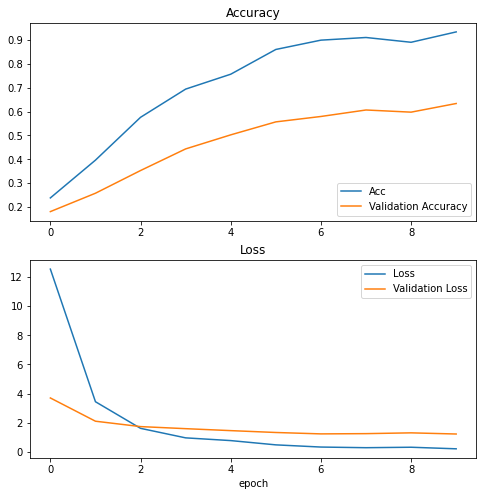

[I 2022-06-21 09:13:21,829] Trial 151 finished with value: 0.7244898080825806 and parameters: {'filters_l1': 22, 'kernel_size_l1': 3, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.16602239661890403, 'filters_l2': 35, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.24412991380997487, 'filters_l3': 214, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.3595224090751399, 'n_units_l': 12, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.16959980571567027, 'learning_rate': 0.00020659618581457488, 'beta_1': 0.9588979902264176, 'beta_2': 0.9894071145520857, 'epsilon': 4.945272853252368e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 594ms/step - loss: 6.0247 - accuracy: 0.2996 - val_loss: 3.9543 - val_accuracy: 0.1493 - lr: 1.0671e-04
Epoch 2/10
29/29 [==============================] - 17s 580ms/step - loss: 2.0399 - accuracy: 0.5011 - val_loss: 2.4153 - val_accuracy: 0.2534 - lr: 1.0671e-04
Epoch 3/10
29/29 [==============================] - 17s 576ms/step - loss: 0.8317 - accuracy: 0.7539 - val_loss: 2.0625 - val_accuracy: 0.3891 - lr: 1.0671e-04
Epoch 4/10
29/29 [==============================] - 17s 575ms/step - loss: 0.4127 - accuracy: 0.8563 - val_loss: 2.1360 - val_accuracy: 0.4480 - lr: 1.0671e-04
Epoch 5/10
29/29 [==============================] - 17s 583ms/step - loss: 0.2241 - accuracy: 0.9243 - val_loss: 2.0353 - val_accuracy: 0.5249 - lr: 1.0671e-04
Epoch 6/10
29/29 [==============================] - 17s 586ms/step - loss: 0.1912 - accuracy: 0.9354 - val_loss: 2.1989 - val_accuracy: 0.5611 - lr: 1.0671e-04
Epoch 7/10
29/29 [======================

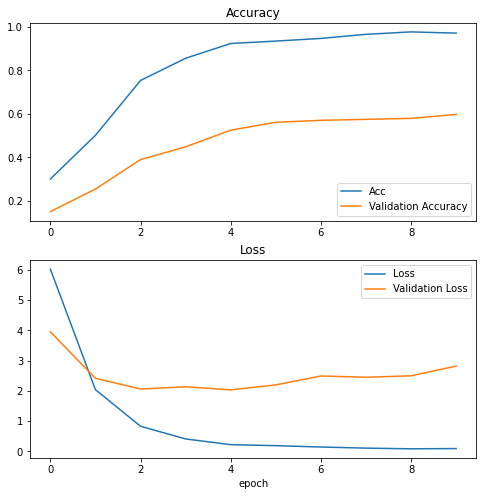

[I 2022-06-21 09:16:21,553] Trial 152 finished with value: 0.704081654548645 and parameters: {'filters_l1': 13, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.12813828120085854, 'filters_l2': 46, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'linear', 'dropout_l2': 0.2264927587723039, 'filters_l3': 146, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.3530271370276079, 'n_units_l': 21, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.18992227360263014, 'learning_rate': 0.00010671250823811441, 'beta_1': 0.955754029684187, 'beta_2': 0.9120427337206493, 'epsilon': 3.214505470488655e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 583ms/step - loss: 5.2264 - accuracy: 0.2773 - val_loss: 2.6536 - val_accuracy: 0.1765 - lr: 1.2305e-04
Epoch 2/10
29/29 [==============================] - 16s 588ms/step - loss: 2.1456 - accuracy: 0.4521 - val_loss: 1.9994 - val_accuracy: 0.2805 - lr: 1.2305e-04
Epoch 3/10
29/29 [==============================] - 17s 580ms/step - loss: 1.4011 - accuracy: 0.5891 - val_loss: 1.8563 - val_accuracy: 0.3529 - lr: 1.2305e-04
Epoch 4/10
29/29 [==============================] - 17s 561ms/step - loss: 0.9418 - accuracy: 0.6804 - val_loss: 1.8173 - val_accuracy: 0.3982 - lr: 1.2305e-04
Epoch 5/10
29/29 [==============================] - 17s 576ms/step - loss: 0.7721 - accuracy: 0.7617 - val_loss: 2.1248 - val_accuracy: 0.3439 - lr: 1.2305e-04
Epoch 6/10
29/29 [==============================] - 17s 578ms/step - loss: 0.6829 - accuracy: 0.7606 - val_loss: 1.7623 - val_accuracy: 0.4389 - lr: 1.2305e-04
Epoch 7/10
29/29 [======================

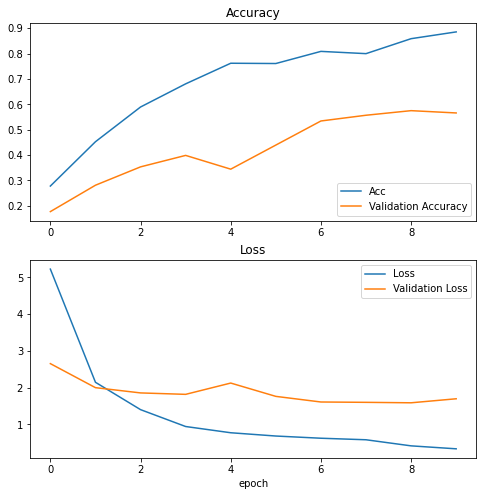

[I 2022-06-21 09:19:15,657] Trial 153 finished with value: 0.6224489808082581 and parameters: {'filters_l1': 10, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.18859799471621225, 'filters_l2': 43, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.26251395883553647, 'filters_l3': 111, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.37323195866201936, 'n_units_l': 13, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.15563857958205377, 'learning_rate': 0.00012305315272276212, 'beta_1': 0.9466826765436331, 'beta_2': 0.9948011318336616, 'epsilon': 4.3093261211279486e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 584ms/step - loss: 9.7857 - accuracy: 0.2784 - val_loss: 2.6014 - val_accuracy: 0.2172 - lr: 1.9725e-04
Epoch 2/10
29/29 [==============================] - 17s 580ms/step - loss: 2.6468 - accuracy: 0.4477 - val_loss: 1.8254 - val_accuracy: 0.3394 - lr: 1.9725e-04
Epoch 3/10
29/29 [==============================] - 17s 583ms/step - loss: 1.3752 - accuracy: 0.6002 - val_loss: 1.7215 - val_accuracy: 0.3575 - lr: 1.9725e-04
Epoch 4/10
29/29 [==============================] - 17s 586ms/step - loss: 0.7779 - accuracy: 0.7305 - val_loss: 1.5681 - val_accuracy: 0.4615 - lr: 1.9725e-04
Epoch 5/10
29/29 [==============================] - 17s 581ms/step - loss: 0.6041 - accuracy: 0.7840 - val_loss: 1.4560 - val_accuracy: 0.5158 - lr: 1.9725e-04
Epoch 6/10
29/29 [==============================] - 16s 573ms/step - loss: 0.4205 - accuracy: 0.8641 - val_loss: 1.3932 - val_accuracy: 0.5611 - lr: 1.9725e-04
Epoch 7/10
29/29 [======================

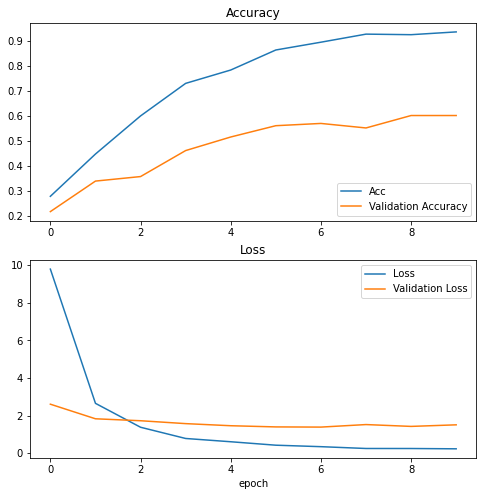

[I 2022-06-21 09:22:15,281] Trial 154 finished with value: 0.704081654548645 and parameters: {'filters_l1': 17, 'kernel_size_l1': 3, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.16090384261900334, 'filters_l2': 33, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.2519231538649148, 'filters_l3': 195, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.3578752470501923, 'n_units_l': 11, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.173443337328214, 'learning_rate': 0.00019725451100473853, 'beta_1': 0.9587769657899308, 'beta_2': 0.9920815126994582, 'epsilon': 3.809751716577257e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 577ms/step - loss: 6.0462 - accuracy: 0.2617 - val_loss: 5.4515 - val_accuracy: 0.1900 - lr: 8.9444e-05
Epoch 2/10
29/29 [==============================] - 17s 579ms/step - loss: 2.4084 - accuracy: 0.4388 - val_loss: 3.2760 - val_accuracy: 0.2851 - lr: 8.9444e-05
Epoch 3/10
29/29 [==============================] - 17s 571ms/step - loss: 1.3855 - accuracy: 0.5991 - val_loss: 2.2202 - val_accuracy: 0.3258 - lr: 8.9444e-05
Epoch 4/10
29/29 [==============================] - 17s 576ms/step - loss: 0.9110 - accuracy: 0.6982 - val_loss: 2.0719 - val_accuracy: 0.3710 - lr: 8.9444e-05
Epoch 5/10
29/29 [==============================] - 16s 570ms/step - loss: 0.7183 - accuracy: 0.7606 - val_loss: 1.7319 - val_accuracy: 0.4344 - lr: 8.9444e-05
Epoch 6/10
29/29 [==============================] - 17s 573ms/step - loss: 0.5566 - accuracy: 0.8185 - val_loss: 1.6864 - val_accuracy: 0.4751 - lr: 8.9444e-05
Epoch 7/10
29/29 [======================

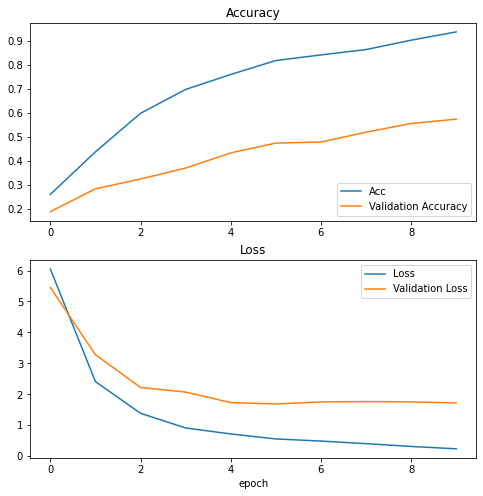

[I 2022-06-21 09:25:09,352] Trial 155 finished with value: 0.6530612111091614 and parameters: {'filters_l1': 9, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.1120919746485117, 'filters_l2': 26, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.2371988473702519, 'filters_l3': 168, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.33487576726399937, 'n_units_l': 13, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.16465572461687117, 'learning_rate': 8.944376858226544e-05, 'beta_1': 0.9544190276382101, 'beta_2': 0.986399364084767, 'epsilon': 4.558158538388588e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 592ms/step - loss: 12.0626 - accuracy: 0.2517 - val_loss: 3.9882 - val_accuracy: 0.1991 - lr: 1.8084e-04
Epoch 2/10
29/29 [==============================] - 17s 567ms/step - loss: 2.6097 - accuracy: 0.4488 - val_loss: 2.6935 - val_accuracy: 0.2805 - lr: 1.8084e-04
Epoch 3/10
29/29 [==============================] - 17s 562ms/step - loss: 1.3424 - accuracy: 0.6002 - val_loss: 3.3274 - val_accuracy: 0.2760 - lr: 1.8084e-04
Epoch 4/10
29/29 [==============================] - 17s 577ms/step - loss: 1.0798 - accuracy: 0.6670 - val_loss: 2.6396 - val_accuracy: 0.3258 - lr: 1.8084e-04
Epoch 5/10
29/29 [==============================] - 17s 575ms/step - loss: 0.8132 - accuracy: 0.7494 - val_loss: 2.3364 - val_accuracy: 0.3575 - lr: 1.8084e-04
Epoch 6/10
29/29 [==============================] - 17s 577ms/step - loss: 0.7098 - accuracy: 0.7773 - val_loss: 2.8512 - val_accuracy: 0.3665 - lr: 1.8084e-04
Epoch 7/10
29/29 [=====================

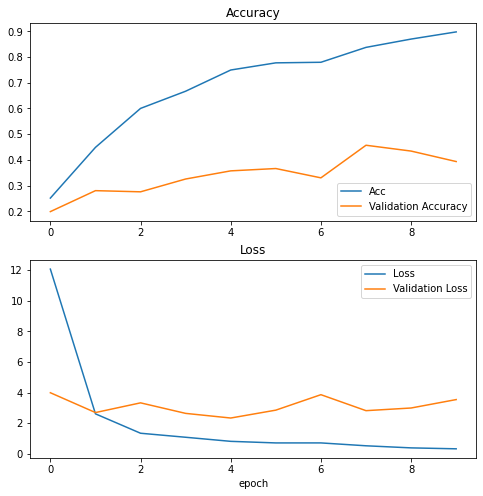

[I 2022-06-21 09:28:03,812] Trial 156 finished with value: 0.40816327929496765 and parameters: {'filters_l1': 11, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.3895197266643159, 'filters_l2': 29, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'elu', 'dropout_l2': 0.27849624694908137, 'filters_l3': 138, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.32467216345742844, 'n_units_l': 15, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.15267061451106712, 'learning_rate': 0.00018084253087020943, 'beta_1': 0.9490817891710355, 'beta_2': 0.992022572242293, 'epsilon': 4.2173665749049824e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 591ms/step - loss: 2.8155 - accuracy: 0.1414 - val_loss: 2.7265 - val_accuracy: 0.0995 - lr: 2.7055e-04
Epoch 2/10
29/29 [==============================] - 17s 589ms/step - loss: 2.2637 - accuracy: 0.1548 - val_loss: 2.8188 - val_accuracy: 0.0633 - lr: 2.7055e-04
Epoch 3/10
29/29 [==============================] - 17s 591ms/step - loss: 2.2832 - accuracy: 0.1659 - val_loss: 2.1788 - val_accuracy: 0.1765 - lr: 2.7055e-04
Epoch 4/10
29/29 [==============================] - 17s 577ms/step - loss: 2.2437 - accuracy: 0.1492 - val_loss: 2.1631 - val_accuracy: 0.1765 - lr: 2.7055e-04
Epoch 5/10
29/29 [==============================] - 17s 587ms/step - loss: 2.2468 - accuracy: 0.1403 - val_loss: 2.1436 - val_accuracy: 0.1765 - lr: 2.7055e-04
Epoch 6/10
29/29 [==============================] - 17s 548ms/step - loss: 2.2156 - accuracy: 0.1526 - val_loss: 2.1268 - val_accuracy: 0.1765 - lr: 2.7055e-04
Epoch 7/10
29/29 [======================

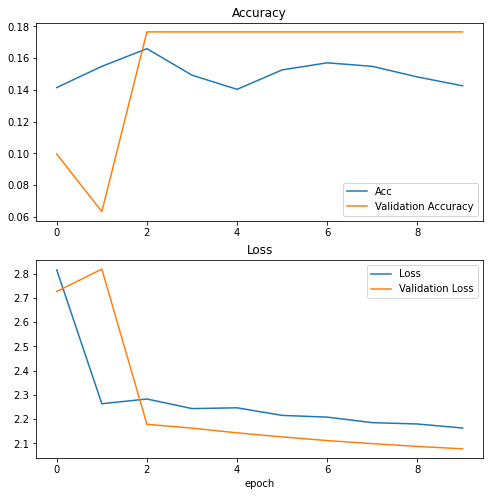

[I 2022-06-21 09:30:58,842] Trial 157 finished with value: 0.1428571492433548 and parameters: {'filters_l1': 19, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'elu', 'dropout_l1': 0.14505253805153362, 'filters_l2': 41, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.20179709136655333, 'filters_l3': 89, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.3459474394101869, 'n_units_l': 14, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.13308536838008092, 'learning_rate': 0.00027054726085522956, 'beta_1': 0.9696351182928847, 'beta_2': 0.9821369197705605, 'epsilon': 1.8619720066838136e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 17s 578ms/step - loss: 11.2813 - accuracy: 0.2194 - val_loss: 4.1012 - val_accuracy: 0.1900 - lr: 4.6580e-04
Epoch 2/10
29/29 [==============================] - 17s 570ms/step - loss: 3.3095 - accuracy: 0.3664 - val_loss: 1.7982 - val_accuracy: 0.3801 - lr: 4.6580e-04
Epoch 3/10
29/29 [==============================] - 17s 553ms/step - loss: 1.8474 - accuracy: 0.4699 - val_loss: 1.7145 - val_accuracy: 0.4389 - lr: 4.6580e-04
Epoch 4/10
29/29 [==============================] - 17s 576ms/step - loss: 1.2478 - accuracy: 0.6036 - val_loss: 1.5581 - val_accuracy: 0.4661 - lr: 4.6580e-04
Epoch 5/10
29/29 [==============================] - 17s 576ms/step - loss: 1.0162 - accuracy: 0.6403 - val_loss: 1.5404 - val_accuracy: 0.4932 - lr: 4.6580e-04
Epoch 6/10
29/29 [==============================] - 17s 566ms/step - loss: 0.9728 - accuracy: 0.6704 - val_loss: 1.4971 - val_accuracy: 0.5611 - lr: 4.6580e-04
Epoch 7/10
29/29 [=====================

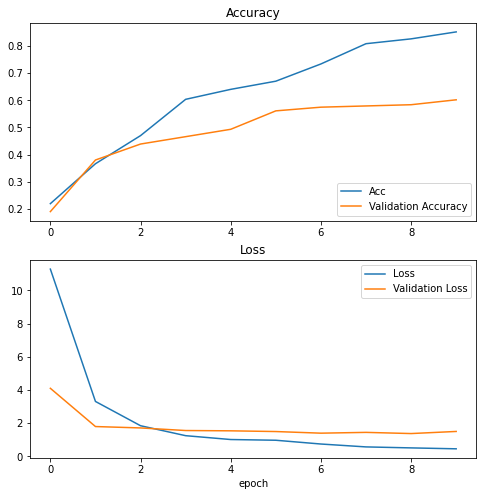

[I 2022-06-21 09:33:53,140] Trial 158 finished with value: 0.6428571343421936 and parameters: {'filters_l1': 9, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.15376430225869303, 'filters_l2': 51, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.2518261086038428, 'filters_l3': 107, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.34038282849177476, 'n_units_l': 7, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.14729601184639807, 'learning_rate': 0.0004658029090955114, 'beta_1': 0.9440543612226715, 'beta_2': 0.9970543196814696, 'epsilon': 3.4294068828630274e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 576ms/step - loss: 1374.4702 - accuracy: 0.1503 - val_loss: 56.1031 - val_accuracy: 0.1448 - lr: 0.0282
Epoch 2/10
29/29 [==============================] - 17s 567ms/step - loss: 43.3916 - accuracy: 0.1403 - val_loss: 55.0762 - val_accuracy: 0.1041 - lr: 0.0282
Epoch 3/10
29/29 [==============================] - 17s 580ms/step - loss: 36.7715 - accuracy: 0.1214 - val_loss: 25.5874 - val_accuracy: 0.0769 - lr: 0.0282
Epoch 4/10
29/29 [==============================] - 17s 581ms/step - loss: 31.9013 - accuracy: 0.1448 - val_loss: 9.9571 - val_accuracy: 0.0769 - lr: 0.0282
Epoch 5/10
29/29 [==============================] - 17s 558ms/step - loss: 18.5673 - accuracy: 0.1314 - val_loss: 6.6707 - val_accuracy: 0.1719 - lr: 0.0282
Epoch 6/10
29/29 [==============================] - 17s 575ms/step - loss: 20.4724 - accuracy: 0.1448 - val_loss: 9.6041 - val_accuracy: 0.1719 - lr: 0.0282
Epoch 7/10
29/29 [==============================] - 1

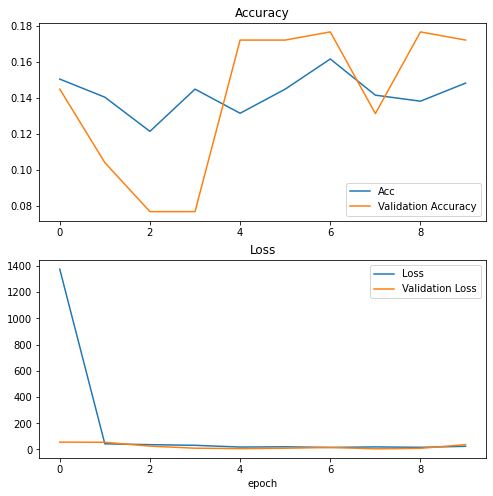

[I 2022-06-21 09:36:47,947] Trial 159 finished with value: 0.12244898080825806 and parameters: {'filters_l1': 14, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.1220243699702849, 'filters_l2': 38, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'valid', 'activation_l2': 'relu', 'dropout_l2': 0.24270054034350524, 'filters_l3': 119, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.38189399250847206, 'n_units_l': 10, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.20342916012777496, 'learning_rate': 0.028221200124181316, 'beta_1': 0.9665022895996285, 'beta_2': 0.9955143515437584, 'epsilon': 2.0006158474784276e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 17s 600ms/step - loss: 16.7995 - accuracy: 0.2695 - val_loss: 3.2054 - val_accuracy: 0.2534 - lr: 1.4043e-04
Epoch 2/10
29/29 [==============================] - 17s 576ms/step - loss: 3.8044 - accuracy: 0.4621 - val_loss: 2.1460 - val_accuracy: 0.3529 - lr: 1.4043e-04
Epoch 3/10
29/29 [==============================] - 17s 571ms/step - loss: 1.4452 - accuracy: 0.6737 - val_loss: 1.9382 - val_accuracy: 0.4344 - lr: 1.4043e-04
Epoch 4/10
29/29 [==============================] - 17s 538ms/step - loss: 0.7241 - accuracy: 0.7840 - val_loss: 1.9686 - val_accuracy: 0.4480 - lr: 1.4043e-04
Epoch 5/10
29/29 [==============================] - 17s 593ms/step - loss: 0.4599 - accuracy: 0.8519 - val_loss: 1.7585 - val_accuracy: 0.5158 - lr: 1.4043e-04
Epoch 6/10
29/29 [==============================] - 17s 552ms/step - loss: 0.3062 - accuracy: 0.8942 - val_loss: 1.7234 - val_accuracy: 0.5882 - lr: 1.4043e-04
Epoch 7/10
29/29 [=====================

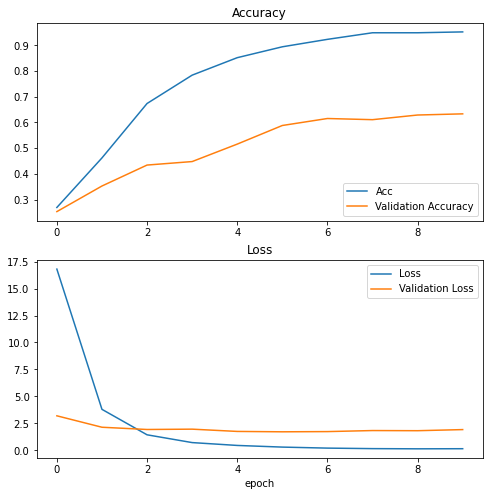

[I 2022-06-21 09:39:43,520] Trial 160 finished with value: 0.7551020383834839 and parameters: {'filters_l1': 12, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.16566619474693478, 'filters_l2': 45, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'elu', 'dropout_l2': 0.2104032304805638, 'filters_l3': 151, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'linear', 'dropout_l3': 0.3665053197869177, 'n_units_l': 28, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.21273684577496393, 'learning_rate': 0.00014042927133233268, 'beta_1': 0.9628091007546442, 'beta_2': 0.9976062514323174, 'epsilon': 3.023258720217957e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 590ms/step - loss: 14.8305 - accuracy: 0.3085 - val_loss: 3.9000 - val_accuracy: 0.2579 - lr: 1.4187e-04
Epoch 2/10
29/29 [==============================] - 17s 546ms/step - loss: 4.1709 - accuracy: 0.4967 - val_loss: 4.0486 - val_accuracy: 0.2217 - lr: 1.4187e-04
Epoch 3/10
29/29 [==============================] - 17s 595ms/step - loss: 1.7614 - accuracy: 0.6147 - val_loss: 3.1840 - val_accuracy: 0.3032 - lr: 1.4187e-04
Epoch 4/10
29/29 [==============================] - 17s 559ms/step - loss: 0.9199 - accuracy: 0.7339 - val_loss: 2.4804 - val_accuracy: 0.3756 - lr: 1.4187e-04
Epoch 5/10
29/29 [==============================] - 17s 580ms/step - loss: 0.5688 - accuracy: 0.8096 - val_loss: 2.1171 - val_accuracy: 0.4072 - lr: 1.4187e-04
Epoch 6/10
29/29 [==============================] - 17s 573ms/step - loss: 0.3435 - accuracy: 0.8886 - val_loss: 2.0600 - val_accuracy: 0.4570 - lr: 1.4187e-04
Epoch 7/10
29/29 [=====================

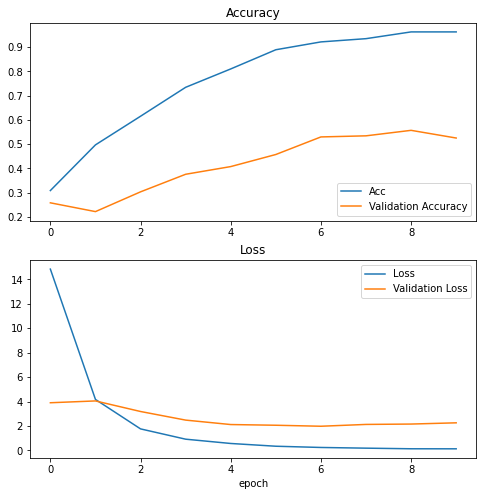

[I 2022-06-21 09:42:38,097] Trial 161 finished with value: 0.6326530575752258 and parameters: {'filters_l1': 13, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.13852471980201603, 'filters_l2': 8, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'elu', 'dropout_l2': 0.20766739104458012, 'filters_l3': 153, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'linear', 'dropout_l3': 0.3674014132080372, 'n_units_l': 27, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.18481763541230783, 'learning_rate': 0.00014186862284688, 'beta_1': 0.9641923934072587, 'beta_2': 0.997626216887525, 'epsilon': 2.9118851075955433e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 572ms/step - loss: 8.1192 - accuracy: 0.3051 - val_loss: 2.3702 - val_accuracy: 0.2805 - lr: 1.2116e-04
Epoch 2/10
29/29 [==============================] - 17s 589ms/step - loss: 2.6662 - accuracy: 0.5334 - val_loss: 2.6758 - val_accuracy: 0.2760 - lr: 1.2116e-04
Epoch 3/10
29/29 [==============================] - 17s 574ms/step - loss: 1.5582 - accuracy: 0.6481 - val_loss: 1.9196 - val_accuracy: 0.4480 - lr: 1.2116e-04
Epoch 4/10
29/29 [==============================] - 17s 575ms/step - loss: 0.7466 - accuracy: 0.7962 - val_loss: 1.7408 - val_accuracy: 0.5294 - lr: 1.2116e-04
Epoch 5/10
29/29 [==============================] - 17s 584ms/step - loss: 0.4655 - accuracy: 0.8586 - val_loss: 1.8072 - val_accuracy: 0.5068 - lr: 1.2116e-04
Epoch 6/10
29/29 [==============================] - 17s 561ms/step - loss: 0.3226 - accuracy: 0.8875 - val_loss: 1.6955 - val_accuracy: 0.5928 - lr: 1.2116e-04
Epoch 7/10
29/29 [======================

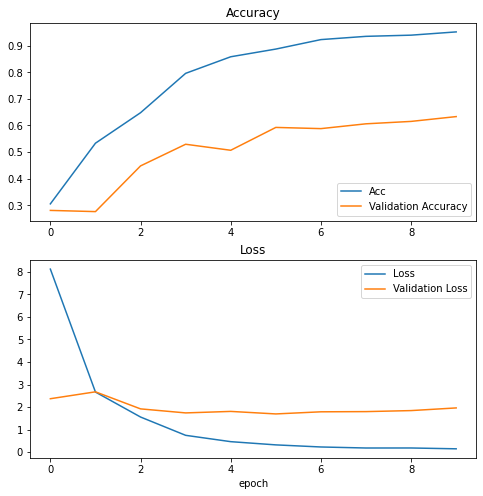

[I 2022-06-21 09:45:34,186] Trial 162 finished with value: 0.7857142686843872 and parameters: {'filters_l1': 12, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.13146682615868302, 'filters_l2': 63, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'elu', 'dropout_l2': 0.22638766387385953, 'filters_l3': 181, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'linear', 'dropout_l3': 0.35360708712935873, 'n_units_l': 18, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.2186733754071517, 'learning_rate': 0.00012116460878584962, 'beta_1': 0.9608355941110377, 'beta_2': 0.9983140478671166, 'epsilon': 2.6300400684530072e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 582ms/step - loss: 9.2962 - accuracy: 0.3285 - val_loss: 3.9945 - val_accuracy: 0.1991 - lr: 1.0933e-04
Epoch 2/10
29/29 [==============================] - 17s 574ms/step - loss: 3.0157 - accuracy: 0.5167 - val_loss: 3.0963 - val_accuracy: 0.2534 - lr: 1.0933e-04
Epoch 3/10
29/29 [==============================] - 17s 577ms/step - loss: 1.4428 - accuracy: 0.6537 - val_loss: 2.2395 - val_accuracy: 0.3303 - lr: 1.0933e-04
Epoch 4/10
29/29 [==============================] - 17s 564ms/step - loss: 0.9151 - accuracy: 0.7305 - val_loss: 1.9567 - val_accuracy: 0.4208 - lr: 1.0933e-04
Epoch 5/10
29/29 [==============================] - 17s 580ms/step - loss: 0.5732 - accuracy: 0.8107 - val_loss: 1.8173 - val_accuracy: 0.5023 - lr: 1.0933e-04
Epoch 6/10
29/29 [==============================] - 17s 588ms/step - loss: 0.3535 - accuracy: 0.8764 - val_loss: 2.0153 - val_accuracy: 0.4842 - lr: 1.0933e-04
Epoch 7/10
29/29 [======================

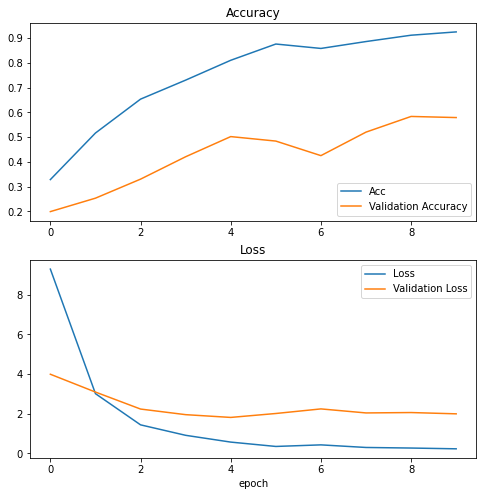

[I 2022-06-21 09:48:29,976] Trial 163 finished with value: 0.7244898080825806 and parameters: {'filters_l1': 11, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.17184717563604576, 'filters_l2': 39, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'elu', 'dropout_l2': 0.23577793692214977, 'filters_l3': 171, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'linear', 'dropout_l3': 0.3631259576960627, 'n_units_l': 17, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.21501805569811686, 'learning_rate': 0.00010933180117859942, 'beta_1': 0.9609794962851955, 'beta_2': 0.9940469126468567, 'epsilon': 3.426941543335962e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 582ms/step - loss: 15.9072 - accuracy: 0.2840 - val_loss: 12.3630 - val_accuracy: 0.1222 - lr: 3.1962e-04
Epoch 2/10
29/29 [==============================] - 17s 580ms/step - loss: 3.4181 - accuracy: 0.5646 - val_loss: 3.9583 - val_accuracy: 0.2896 - lr: 3.1962e-04
Epoch 3/10
29/29 [==============================] - 17s 570ms/step - loss: 1.0463 - accuracy: 0.7472 - val_loss: 2.9228 - val_accuracy: 0.4208 - lr: 3.1962e-04
Epoch 4/10
29/29 [==============================] - 17s 573ms/step - loss: 0.6829 - accuracy: 0.8107 - val_loss: 2.5756 - val_accuracy: 0.4570 - lr: 3.1962e-04
Epoch 5/10
29/29 [==============================] - 17s 588ms/step - loss: 0.6299 - accuracy: 0.8352 - val_loss: 2.1979 - val_accuracy: 0.5113 - lr: 3.1962e-04
Epoch 6/10
29/29 [==============================] - 17s 578ms/step - loss: 0.5067 - accuracy: 0.8641 - val_loss: 2.4836 - val_accuracy: 0.5294 - lr: 3.1962e-04
Epoch 7/10
29/29 [====================

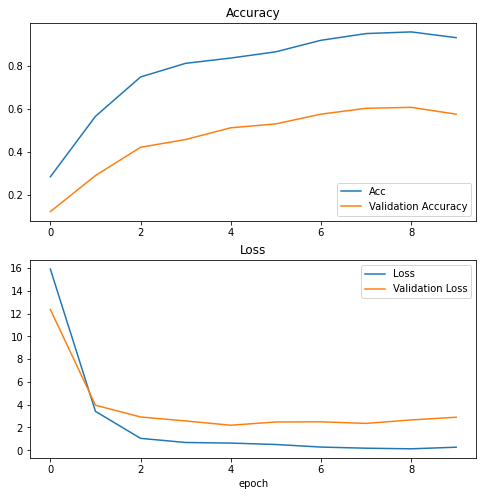

[I 2022-06-21 09:51:24,867] Trial 164 finished with value: 0.6938775777816772 and parameters: {'filters_l1': 12, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.15128095065006208, 'filters_l2': 63, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'elu', 'dropout_l2': 0.22505835695943818, 'filters_l3': 184, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'linear', 'dropout_l3': 0.3493825146046314, 'n_units_l': 21, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.2339969454575333, 'learning_rate': 0.00031961771864689456, 'beta_1': 0.9276001829825578, 'beta_2': 0.9934907449769377, 'epsilon': 2.5847467427536068e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 582ms/step - loss: 3.5941 - accuracy: 0.1047 - val_loss: 3.2083 - val_accuracy: 0.0679 - lr: 1.5287e-04
Epoch 2/10
29/29 [==============================] - 17s 582ms/step - loss: 3.0888 - accuracy: 0.0746 - val_loss: 3.1980 - val_accuracy: 0.0724 - lr: 1.5287e-04
Epoch 3/10
29/29 [==============================] - 17s 574ms/step - loss: 3.0134 - accuracy: 0.0891 - val_loss: 3.1407 - val_accuracy: 0.0769 - lr: 1.5287e-04
Epoch 4/10
29/29 [==============================] - 17s 577ms/step - loss: 2.8998 - accuracy: 0.0802 - val_loss: 3.0589 - val_accuracy: 0.0769 - lr: 1.5287e-04
Epoch 5/10
29/29 [==============================] - 17s 587ms/step - loss: 2.7966 - accuracy: 0.0857 - val_loss: 2.9648 - val_accuracy: 0.0769 - lr: 1.5287e-04
Epoch 6/10
29/29 [==============================] - 17s 580ms/step - loss: 2.7132 - accuracy: 0.0958 - val_loss: 2.8758 - val_accuracy: 0.0769 - lr: 1.5287e-04
Epoch 7/10
29/29 [======================

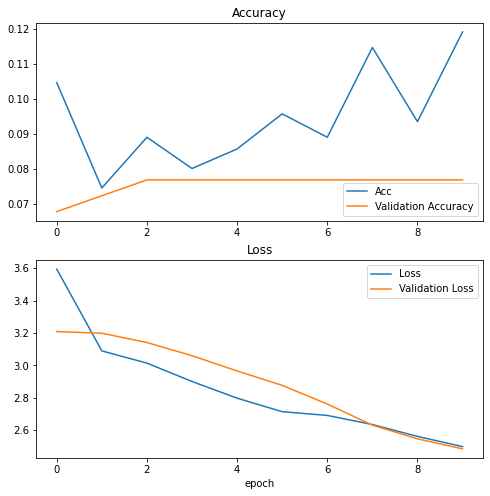

[I 2022-06-21 09:54:20,352] Trial 165 finished with value: 0.13265305757522583 and parameters: {'filters_l1': 8, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'elu', 'dropout_l1': 0.1292686885671771, 'filters_l2': 57, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'elu', 'dropout_l2': 0.19560291481653277, 'filters_l3': 234, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'linear', 'dropout_l3': 0.33179443527637054, 'n_units_l': 26, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.21485653845804056, 'learning_rate': 0.00015287110015706453, 'beta_1': 0.9622666433698069, 'beta_2': 0.999969845345817, 'epsilon': 2.2772412915436412e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 579ms/step - loss: 12.0859 - accuracy: 0.2706 - val_loss: 4.5845 - val_accuracy: 0.1403 - lr: 7.3544e-05
Epoch 2/10
29/29 [==============================] - 17s 590ms/step - loss: 4.0271 - accuracy: 0.4499 - val_loss: 2.8273 - val_accuracy: 0.3348 - lr: 7.3544e-05
Epoch 3/10
29/29 [==============================] - 17s 586ms/step - loss: 2.1759 - accuracy: 0.6125 - val_loss: 2.2834 - val_accuracy: 0.4163 - lr: 7.3544e-05
Epoch 4/10
29/29 [==============================] - 17s 575ms/step - loss: 1.2352 - accuracy: 0.7127 - val_loss: 2.0682 - val_accuracy: 0.5068 - lr: 7.3544e-05
Epoch 5/10
29/29 [==============================] - 17s 569ms/step - loss: 0.8144 - accuracy: 0.7906 - val_loss: 2.1209 - val_accuracy: 0.4842 - lr: 7.3544e-05
Epoch 6/10
29/29 [==============================] - 17s 577ms/step - loss: 0.5902 - accuracy: 0.8608 - val_loss: 2.3134 - val_accuracy: 0.5339 - lr: 7.3544e-05
Epoch 7/10
29/29 [=====================

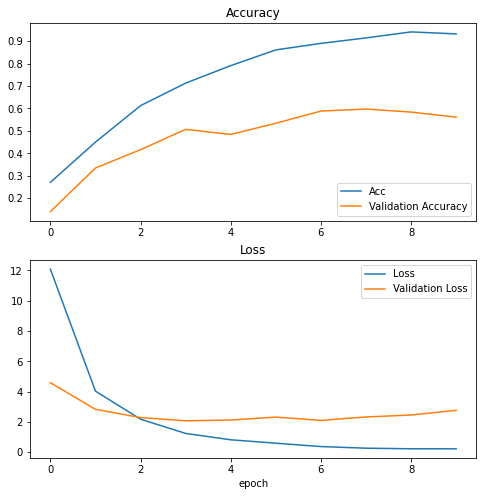

[I 2022-06-21 09:57:17,065] Trial 166 finished with value: 0.7653061151504517 and parameters: {'filters_l1': 15, 'kernel_size_l1': 5, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.13693645388271522, 'filters_l2': 78, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'elu', 'dropout_l2': 0.2131450343553918, 'filters_l3': 215, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'linear', 'dropout_l3': 0.292239349559298, 'n_units_l': 18, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.2018691642179629, 'learning_rate': 7.354423491828243e-05, 'beta_1': 0.9663701877716834, 'beta_2': 0.9057933883278599, 'epsilon': 2.9567357788601316e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 593ms/step - loss: 8.1219 - accuracy: 0.2984 - val_loss: 2.9106 - val_accuracy: 0.2262 - lr: 9.6406e-05
Epoch 2/10
29/29 [==============================] - 17s 563ms/step - loss: 2.8647 - accuracy: 0.4900 - val_loss: 2.0758 - val_accuracy: 0.3032 - lr: 9.6406e-05
Epoch 3/10
29/29 [==============================] - 17s 585ms/step - loss: 1.6042 - accuracy: 0.6158 - val_loss: 1.8327 - val_accuracy: 0.3801 - lr: 9.6406e-05
Epoch 4/10
29/29 [==============================] - 17s 582ms/step - loss: 0.8819 - accuracy: 0.7639 - val_loss: 1.8026 - val_accuracy: 0.4706 - lr: 9.6406e-05
Epoch 5/10
29/29 [==============================] - 17s 551ms/step - loss: 0.6163 - accuracy: 0.8174 - val_loss: 1.9425 - val_accuracy: 0.4570 - lr: 9.6406e-05
Epoch 6/10
29/29 [==============================] - 17s 575ms/step - loss: 0.4370 - accuracy: 0.8630 - val_loss: 1.7947 - val_accuracy: 0.5747 - lr: 9.6406e-05
Epoch 7/10
29/29 [======================

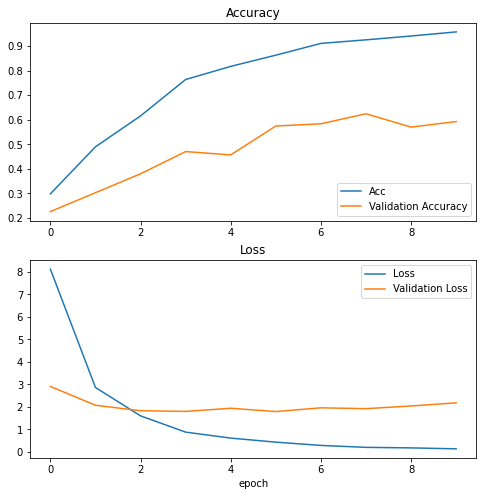

[I 2022-06-21 10:00:16,857] Trial 167 finished with value: 0.6632652878761292 and parameters: {'filters_l1': 16, 'kernel_size_l1': 5, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.1850690705300242, 'filters_l2': 45, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'elu', 'dropout_l2': 0.21125870436898572, 'filters_l3': 160, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'linear', 'dropout_l3': 0.2809568346674227, 'n_units_l': 18, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.22284037932941095, 'learning_rate': 9.640569231187753e-05, 'beta_1': 0.9681585431025074, 'beta_2': 0.905115345479217, 'epsilon': 5.958546498313249e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 586ms/step - loss: 11.1193 - accuracy: 0.3508 - val_loss: 4.3702 - val_accuracy: 0.1991 - lr: 8.3867e-05
Epoch 2/10
29/29 [==============================] - 17s 575ms/step - loss: 4.2161 - accuracy: 0.5045 - val_loss: 2.5769 - val_accuracy: 0.3620 - lr: 8.3867e-05
Epoch 3/10
29/29 [==============================] - 17s 579ms/step - loss: 1.7580 - accuracy: 0.6938 - val_loss: 2.0651 - val_accuracy: 0.4344 - lr: 8.3867e-05
Epoch 4/10
29/29 [==============================] - 17s 567ms/step - loss: 1.0696 - accuracy: 0.7584 - val_loss: 1.9770 - val_accuracy: 0.4932 - lr: 8.3867e-05
Epoch 5/10
29/29 [==============================] - 17s 578ms/step - loss: 0.5402 - accuracy: 0.8530 - val_loss: 1.9401 - val_accuracy: 0.5611 - lr: 8.3867e-05
Epoch 6/10
29/29 [==============================] - 17s 588ms/step - loss: 0.3890 - accuracy: 0.8864 - val_loss: 2.0907 - val_accuracy: 0.5113 - lr: 8.3867e-05
Epoch 7/10
29/29 [=====================

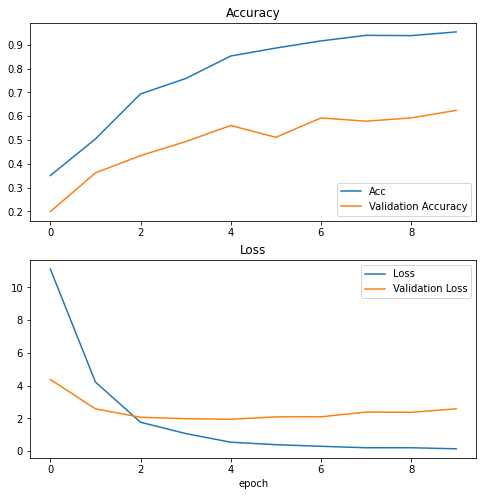

[I 2022-06-21 10:03:12,770] Trial 168 finished with value: 0.6326530575752258 and parameters: {'filters_l1': 15, 'kernel_size_l1': 5, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'linear', 'dropout_l1': 0.10907028877648314, 'filters_l2': 68, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'elu', 'dropout_l2': 0.18125948818633503, 'filters_l3': 206, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'linear', 'dropout_l3': 0.2869907564552128, 'n_units_l': 30, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.19649522822556414, 'learning_rate': 8.38674773794153e-05, 'beta_1': 0.9658441192539927, 'beta_2': 0.9980642880977527, 'epsilon': 2.407285677234161e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 587ms/step - loss: 14.7395 - accuracy: 0.2528 - val_loss: 6.6132 - val_accuracy: 0.1312 - lr: 7.0119e-05
Epoch 2/10
29/29 [==============================] - 17s 566ms/step - loss: 4.6636 - accuracy: 0.4666 - val_loss: 3.2761 - val_accuracy: 0.2851 - lr: 7.0119e-05
Epoch 3/10
29/29 [==============================] - 17s 574ms/step - loss: 2.3491 - accuracy: 0.5969 - val_loss: 2.4404 - val_accuracy: 0.3529 - lr: 7.0119e-05
Epoch 4/10
29/29 [==============================] - 17s 582ms/step - loss: 1.4361 - accuracy: 0.6559 - val_loss: 2.3904 - val_accuracy: 0.3756 - lr: 7.0119e-05
Epoch 5/10
29/29 [==============================] - 17s 581ms/step - loss: 0.8305 - accuracy: 0.7595 - val_loss: 2.0611 - val_accuracy: 0.4977 - lr: 7.0119e-05
Epoch 6/10
29/29 [==============================] - 17s 577ms/step - loss: 0.5672 - accuracy: 0.8285 - val_loss: 1.8535 - val_accuracy: 0.5747 - lr: 7.0119e-05
Epoch 7/10
29/29 [=====================

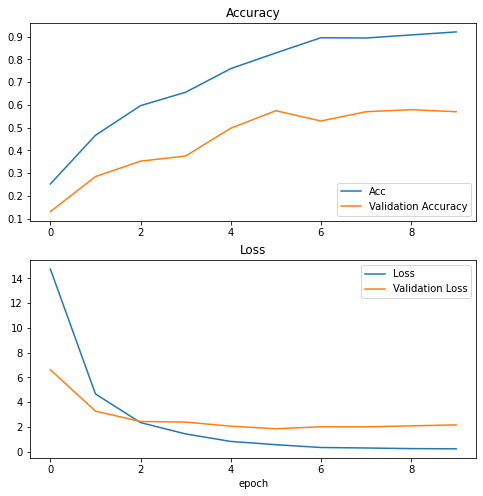

[I 2022-06-21 10:06:16,932] Trial 169 finished with value: 0.704081654548645 and parameters: {'filters_l1': 12, 'kernel_size_l1': 5, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.1469140703069822, 'filters_l2': 31, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'elu', 'dropout_l2': 0.21859301217910207, 'filters_l3': 187, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'linear', 'dropout_l3': 0.25818027088584433, 'n_units_l': 23, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.22722170629875857, 'learning_rate': 7.011924192141844e-05, 'beta_1': 0.95704721053424, 'beta_2': 0.9959377423388616, 'epsilon': 2.9854883205092125e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 566ms/step - loss: 8.0546 - accuracy: 0.2795 - val_loss: 2.8741 - val_accuracy: 0.2353 - lr: 1.2182e-04
Epoch 2/10
29/29 [==============================] - 17s 567ms/step - loss: 3.4121 - accuracy: 0.4376 - val_loss: 3.5679 - val_accuracy: 0.1946 - lr: 1.2182e-04
Epoch 3/10
29/29 [==============================] - 17s 584ms/step - loss: 2.5710 - accuracy: 0.5724 - val_loss: 2.1836 - val_accuracy: 0.3122 - lr: 1.2182e-04
Epoch 4/10
29/29 [==============================] - 17s 582ms/step - loss: 1.4529 - accuracy: 0.6526 - val_loss: 1.7518 - val_accuracy: 0.4887 - lr: 1.2182e-04
Epoch 5/10
29/29 [==============================] - 17s 588ms/step - loss: 0.9422 - accuracy: 0.7216 - val_loss: 1.8376 - val_accuracy: 0.4389 - lr: 1.2182e-04
Epoch 6/10
29/29 [==============================] - 17s 574ms/step - loss: 0.6588 - accuracy: 0.7984 - val_loss: 1.6294 - val_accuracy: 0.5385 - lr: 1.2182e-04
Epoch 7/10
29/29 [======================

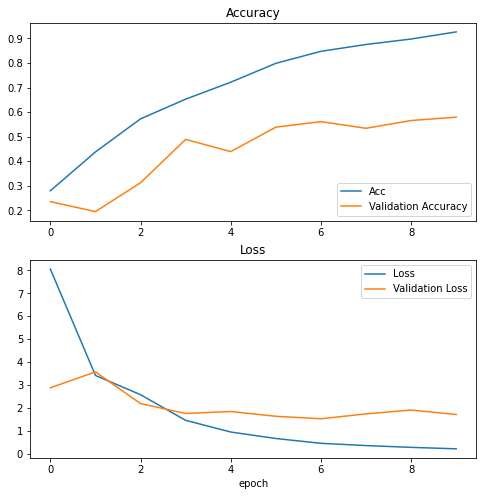

[I 2022-06-21 10:09:13,464] Trial 170 finished with value: 0.6428571343421936 and parameters: {'filters_l1': 11, 'kernel_size_l1': 5, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.1604819573356544, 'filters_l2': 175, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'elu', 'dropout_l2': 0.2665072602166163, 'filters_l3': 141, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'linear', 'dropout_l3': 0.29383841487498463, 'n_units_l': 16, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.1616900485674246, 'learning_rate': 0.00012181837128270944, 'beta_1': 0.9708506922089782, 'beta_2': 0.9907673638667267, 'epsilon': 4.04904517280881e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 590ms/step - loss: 8.4420 - accuracy: 0.3096 - val_loss: 2.1860 - val_accuracy: 0.3575 - lr: 1.7897e-04
Epoch 2/10
29/29 [==============================] - 17s 578ms/step - loss: 1.8876 - accuracy: 0.5624 - val_loss: 1.6210 - val_accuracy: 0.4208 - lr: 1.7897e-04
Epoch 3/10
29/29 [==============================] - 17s 581ms/step - loss: 1.2079 - accuracy: 0.6782 - val_loss: 1.3423 - val_accuracy: 0.5882 - lr: 1.7897e-04
Epoch 4/10
29/29 [==============================] - 17s 582ms/step - loss: 0.6269 - accuracy: 0.8029 - val_loss: 1.2730 - val_accuracy: 0.5611 - lr: 1.7897e-04
Epoch 5/10
29/29 [==============================] - 17s 580ms/step - loss: 0.4369 - accuracy: 0.8597 - val_loss: 1.2825 - val_accuracy: 0.6290 - lr: 1.7897e-04
Epoch 6/10
29/29 [==============================] - 17s 568ms/step - loss: 0.2887 - accuracy: 0.9065 - val_loss: 1.2775 - val_accuracy: 0.6335 - lr: 1.7897e-04
Epoch 7/10
29/29 [======================

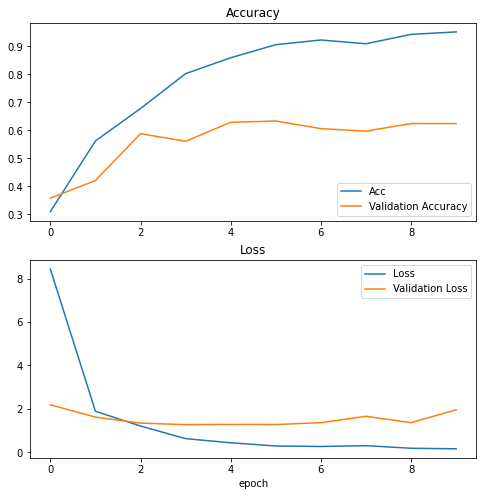

[I 2022-06-21 10:12:08,529] Trial 171 finished with value: 0.6530612111091614 and parameters: {'filters_l1': 10, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.13766961918498172, 'filters_l2': 78, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.23029002714610586, 'filters_l3': 126, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'linear', 'dropout_l3': 0.35556601994711623, 'n_units_l': 18, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.15823992768596246, 'learning_rate': 0.00017896939406774625, 'beta_1': 0.9230246099370802, 'beta_2': 0.9183866344567259, 'epsilon': 2.8486873665537677e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 572ms/step - loss: 17.5704 - accuracy: 0.2561 - val_loss: 2.7318 - val_accuracy: 0.2986 - lr: 2.0173e-04
Epoch 2/10
29/29 [==============================] - 17s 579ms/step - loss: 3.8411 - accuracy: 0.4488 - val_loss: 2.8303 - val_accuracy: 0.2262 - lr: 2.0173e-04
Epoch 3/10
29/29 [==============================] - 17s 566ms/step - loss: 1.9029 - accuracy: 0.5724 - val_loss: 2.1669 - val_accuracy: 0.4163 - lr: 2.0173e-04
Epoch 4/10
29/29 [==============================] - 17s 574ms/step - loss: 1.0845 - accuracy: 0.7272 - val_loss: 1.8368 - val_accuracy: 0.4887 - lr: 2.0173e-04
Epoch 5/10
29/29 [==============================] - 17s 571ms/step - loss: 0.7451 - accuracy: 0.7773 - val_loss: 1.9669 - val_accuracy: 0.4615 - lr: 2.0173e-04
Epoch 6/10
29/29 [==============================] - 17s 581ms/step - loss: 0.7630 - accuracy: 0.7706 - val_loss: 2.3533 - val_accuracy: 0.4434 - lr: 2.0173e-04
Epoch 7/10
29/29 [=====================

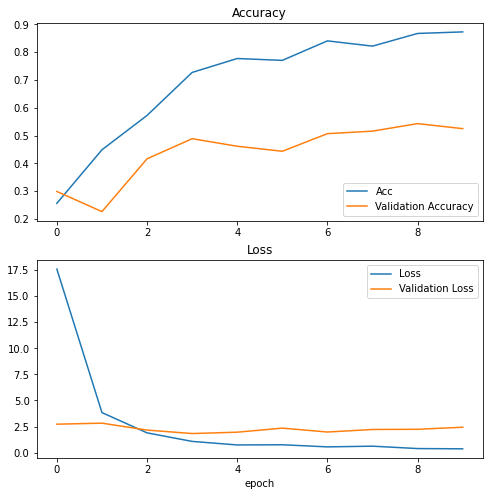

[I 2022-06-21 10:15:03,184] Trial 172 finished with value: 0.6836734414100647 and parameters: {'filters_l1': 13, 'kernel_size_l1': 5, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.16687445622124927, 'filters_l2': 34, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'elu', 'dropout_l2': 0.23857958626984702, 'filters_l3': 179, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'linear', 'dropout_l3': 0.3046605003975851, 'n_units_l': 14, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.20919600016722498, 'learning_rate': 0.0002017286193916036, 'beta_1': 0.9587861456428193, 'beta_2': 0.9938652000055954, 'epsilon': 3.7097546171610874e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 580ms/step - loss: 4.6671 - accuracy: 0.3040 - val_loss: 2.5787 - val_accuracy: 0.2670 - lr: 1.7602e-04
Epoch 2/10
29/29 [==============================] - 17s 577ms/step - loss: 2.0427 - accuracy: 0.4555 - val_loss: 1.9359 - val_accuracy: 0.3529 - lr: 1.7602e-04
Epoch 3/10
29/29 [==============================] - 17s 580ms/step - loss: 1.5112 - accuracy: 0.5690 - val_loss: 2.3595 - val_accuracy: 0.3620 - lr: 1.7602e-04
Epoch 4/10
29/29 [==============================] - 17s 576ms/step - loss: 1.1076 - accuracy: 0.6782 - val_loss: 1.7731 - val_accuracy: 0.4706 - lr: 1.7602e-04
Epoch 5/10
29/29 [==============================] - 17s 569ms/step - loss: 0.7101 - accuracy: 0.7784 - val_loss: 1.4599 - val_accuracy: 0.5294 - lr: 1.7602e-04
Epoch 6/10
29/29 [==============================] - 17s 571ms/step - loss: 0.4540 - accuracy: 0.8508 - val_loss: 1.6076 - val_accuracy: 0.5747 - lr: 1.7602e-04
Epoch 7/10
29/29 [======================

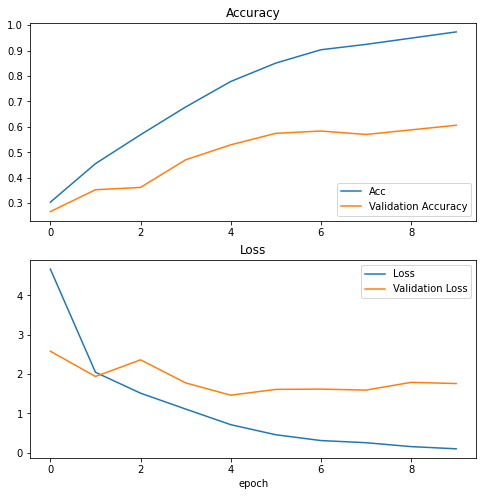

[I 2022-06-21 10:18:01,834] Trial 173 finished with value: 0.7755101919174194 and parameters: {'filters_l1': 7, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'elu', 'dropout_l1': 0.1310336115687497, 'filters_l2': 60, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.22122501497922983, 'filters_l3': 98, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.3209922916566564, 'n_units_l': 22, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.1219246437843131, 'learning_rate': 0.00017602163235632675, 'beta_1': 0.9641996724881833, 'beta_2': 0.9591741786978328, 'epsilon': 2.128162502866489e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 578ms/step - loss: 3.2599 - accuracy: 0.1203 - val_loss: 2.3724 - val_accuracy: 0.1086 - lr: 2.5042e-04
Epoch 2/10
29/29 [==============================] - 17s 553ms/step - loss: 2.4888 - accuracy: 0.1347 - val_loss: 2.4344 - val_accuracy: 0.1267 - lr: 2.5042e-04
Epoch 3/10
29/29 [==============================] - 17s 585ms/step - loss: 2.5120 - accuracy: 0.1325 - val_loss: 2.3690 - val_accuracy: 0.1403 - lr: 2.5042e-04
Epoch 4/10
29/29 [==============================] - 17s 583ms/step - loss: 2.4216 - accuracy: 0.1147 - val_loss: 2.3204 - val_accuracy: 0.1131 - lr: 2.5042e-04
Epoch 5/10
29/29 [==============================] - 17s 577ms/step - loss: 2.3513 - accuracy: 0.1314 - val_loss: 2.3102 - val_accuracy: 0.1357 - lr: 2.5042e-04
Epoch 6/10
29/29 [==============================] - 17s 547ms/step - loss: 2.2211 - accuracy: 0.1637 - val_loss: 2.3505 - val_accuracy: 0.1222 - lr: 2.5042e-04
Epoch 7/10
29/29 [======================

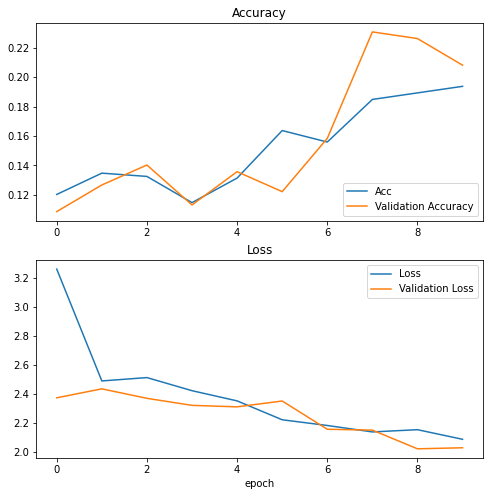

[I 2022-06-21 10:20:56,577] Trial 174 finished with value: 0.16326530277729034 and parameters: {'filters_l1': 19, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'elu', 'dropout_l1': 0.131831452588765, 'filters_l2': 73, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'relu', 'dropout_l2': 0.2217977487718711, 'filters_l3': 99, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.32055196950762277, 'n_units_l': 22, 'dense_activation_l3': 'elu', 'dense_dropout_l3': 0.10022823332716005, 'learning_rate': 0.00025042437112988503, 'beta_1': 0.9635640123903282, 'beta_2': 0.9599985631809362, 'epsilon': 2.135890539147947e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 584ms/step - loss: 7.6864 - accuracy: 0.3118 - val_loss: 2.7536 - val_accuracy: 0.2489 - lr: 1.2393e-04
Epoch 2/10
29/29 [==============================] - 17s 554ms/step - loss: 2.5132 - accuracy: 0.5089 - val_loss: 1.9059 - val_accuracy: 0.3710 - lr: 1.2393e-04
Epoch 3/10
29/29 [==============================] - 17s 577ms/step - loss: 1.5452 - accuracy: 0.6314 - val_loss: 1.8176 - val_accuracy: 0.4344 - lr: 1.2393e-04
Epoch 4/10
29/29 [==============================] - 17s 569ms/step - loss: 1.0335 - accuracy: 0.7060 - val_loss: 1.8779 - val_accuracy: 0.4570 - lr: 1.2393e-04
Epoch 5/10
29/29 [==============================] - 17s 574ms/step - loss: 0.6675 - accuracy: 0.8018 - val_loss: 1.7053 - val_accuracy: 0.5158 - lr: 1.2393e-04
Epoch 6/10
29/29 [==============================] - 17s 567ms/step - loss: 0.6193 - accuracy: 0.8151 - val_loss: 1.8676 - val_accuracy: 0.5385 - lr: 1.2393e-04
Epoch 7/10
29/29 [======================

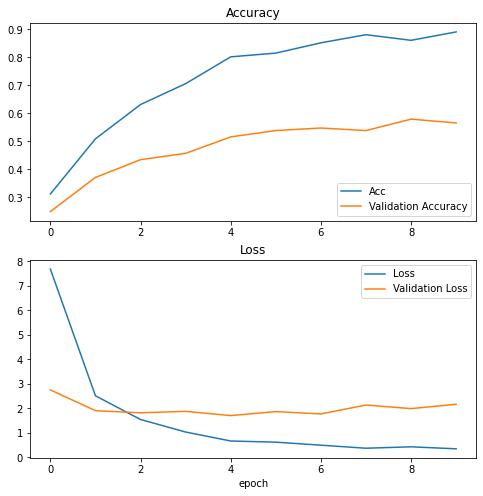

[I 2022-06-21 10:23:51,532] Trial 175 finished with value: 0.6530612111091614 and parameters: {'filters_l1': 14, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'valid', 'activation_l1': 'linear', 'dropout_l1': 0.12435925233053535, 'filters_l2': 63, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'same', 'activation_l2': 'elu', 'dropout_l2': 0.21272677546581534, 'filters_l3': 75, 'kernel_size_l3': 5, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'linear', 'dropout_l3': 0.31227259233364424, 'n_units_l': 20, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.13739504884356465, 'learning_rate': 0.0001239257318025416, 'beta_1': 0.9667985139114995, 'beta_2': 0.9493427419411014, 'epsilon': 1.7694820967484896e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 566ms/step - loss: 8.8357 - accuracy: 0.2372 - val_loss: 3.3768 - val_accuracy: 0.2308 - lr: 1.6394e-04
Epoch 2/10
29/29 [==============================] - 17s 569ms/step - loss: 2.4490 - accuracy: 0.4922 - val_loss: 1.8507 - val_accuracy: 0.3484 - lr: 1.6394e-04
Epoch 3/10
29/29 [==============================] - 17s 569ms/step - loss: 1.2625 - accuracy: 0.6314 - val_loss: 2.0145 - val_accuracy: 0.3394 - lr: 1.6394e-04
Epoch 4/10
29/29 [==============================] - 17s 571ms/step - loss: 0.6672 - accuracy: 0.7517 - val_loss: 1.6481 - val_accuracy: 0.4751 - lr: 1.6394e-04
Epoch 5/10
29/29 [==============================] - 17s 565ms/step - loss: 0.4173 - accuracy: 0.8597 - val_loss: 1.6067 - val_accuracy: 0.4977 - lr: 1.6394e-04
Epoch 6/10
29/29 [==============================] - 17s 573ms/step - loss: 0.3074 - accuracy: 0.8976 - val_loss: 1.6207 - val_accuracy: 0.5701 - lr: 1.6394e-04
Epoch 7/10
29/29 [======================

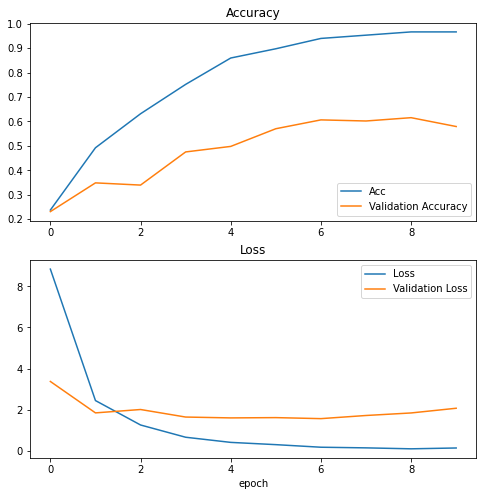

[I 2022-06-21 10:26:47,038] Trial 176 finished with value: 0.704081654548645 and parameters: {'filters_l1': 9, 'kernel_size_l1': 7, 'strides_l1': 1, 'padding_l1': 'same', 'activation_l1': 'elu', 'dropout_l1': 0.15482138797194922, 'filters_l2': 48, 'kernel_size_l2': 7, 'strides_l2': 1, 'padding_l2': 'valid', 'activation_l2': 'relu', 'dropout_l2': 0.24901377172393085, 'filters_l3': 229, 'kernel_size_l3': 3, 'strides_l3': 1, 'padding_l3': 'valid', 'activation_l3': 'elu', 'dropout_l3': 0.3383103904021209, 'n_units_l': 12, 'dense_activation_l3': 'linear', 'dense_dropout_l3': 0.19588265361836046, 'learning_rate': 0.00016393537838923358, 'beta_1': 0.96145136811456, 'beta_2': 0.9534691476642091, 'epsilon': 3.2063708413181025e-08}. Best is trial 111 with value: 0.795918345451355.


Epoch 1/10
29/29 [==============================] - 18s 589ms/step - loss: 9.5601 - accuracy: 0.2895 - val_loss: 6.1213 - val_accuracy: 0.1312 - lr: 2.0915e-04
Epoch 2/10
29/29 [==============================] - 17s 571ms/step - loss: 3.9579 - accuracy: 0.4287 - val_loss: 4.7836 - val_accuracy: 0.2262 - lr: 2.0915e-04
Epoch 3/10
29/29 [==============================] - 17s 588ms/step - loss: 2.4899 - accuracy: 0.5735 - val_loss: 2.7401 - val_accuracy: 0.3982 - lr: 2.0915e-04
Epoch 4/10
29/29 [==============================] - 17s 579ms/step - loss: 1.4600 - accuracy: 0.6949 - val_loss: 3.1385 - val_accuracy: 0.4163 - lr: 2.0915e-04
Epoch 5/10
29/29 [==============================] - 17s 569ms/step - loss: 1.0239 - accuracy: 0.7528 - val_loss: 2.0481 - val_accuracy: 0.5475 - lr: 2.0915e-04
Epoch 6/10
29/29 [==============================] - 17s 570ms/step - loss: 0.5929 - accuracy: 0.8419 - val_loss: 1.9987 - val_accuracy: 0.5520 - lr: 2.0915e-04
Epoch 7/10
29/29 [======================

In [ ]:
import optuna
import urllib
import warnings
warnings.filterwarnings("ignore")
from tensorflow import Tensor
from tensorflow.keras.models import Model
from keras.backend import clear_session
from keras.datasets import mnist
from keras.layers import Conv2D, BatchNormalization, ReLU, Activation
from keras.layers import MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Dropout
from keras.layers import Flatten, Input
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop, Adam
from timeit import time
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

opener = urllib.request.build_opener()
opener.addheaders = [("User-agent", "Mozilla/5.0")]
urllib.request.install_opener(opener)
target_names = ['Drought', 'Earthquake', 'Flooding', 'Normal', 'Storm', 'Tsunami', 'Volcano', 'Whirlwind']
num_of_test_samples = 98


def relu_bn(inputs: Tensor) -> Tensor:
    relu = ReLU()(inputs)
    bn = BatchNormalization()(relu)
    return bn


def objective(trial):
    # Clear clutter from previous Keras session graphs.
    clear_session()

    model = Sequential()
    model.add(Input(shape=(IMAGE_SHAPE)))
    model.add(
        BatchNormalization()
    )

    i = 1
    model.add(
        Conv2D(
            filters=trial.suggest_int("filters_l{}".format(i), 4, 256, log=True),
            kernel_size=trial.suggest_categorical("kernel_size_l{}".format(i), [3, 5, 7]),
            strides=trial.suggest_categorical("strides_l{}".format(i), [1, 2]),
            padding=trial.suggest_categorical("padding_l{}".format(i), ['valid', 'same']),
            kernel_initializer='he_uniform',
        )
    )
    model.add(
        Activation(
            activation=trial.suggest_categorical("activation_l{}".format(i), ["elu", "relu", "linear",])
        )
    )  
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(rate=trial.suggest_float("dropout_l{}".format(i), 0.1, 0.5)))

    i = 2
    model.add(
        Conv2D(
            filters=trial.suggest_int("filters_l{}".format(i), 4, 256, log=True),
            kernel_size=trial.suggest_categorical("kernel_size_l{}".format(i), [3, 5, 7]),
            strides=trial.suggest_categorical("strides_l{}".format(i), [1, 2]),
            padding=trial.suggest_categorical("padding_l{}".format(i), ['valid', 'same']),
            kernel_initializer='he_uniform',
        )
    )
    model.add(
        Activation(
            activation=trial.suggest_categorical("activation_l{}".format(i), ["elu", "relu", "linear",])
        )
    )  
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(rate=trial.suggest_float("dropout_l{}".format(i), 0.1, 0.5)))

    i = 3
    model.add(
        Conv2D(
            filters=trial.suggest_int("filters_l{}".format(i), 4, 256, log=True),
            kernel_size=trial.suggest_categorical("kernel_size_l{}".format(i), [3, 5, 7]),
            strides=trial.suggest_categorical("strides_l{}".format(i), [1, 2]),
            padding=trial.suggest_categorical("padding_l{}".format(i), ['valid', 'same']),
            kernel_initializer='he_uniform',
        )
    )
    model.add(
        Activation(
            activation=trial.suggest_categorical("activation_l{}".format(i), ["elu", "relu", "linear",])
        )
    )  
    model.add(
        AveragePooling2D(pool_size=(2,2)
        )
    )
    model.add(Dropout(rate=trial.suggest_float("dropout_l{}".format(i), 0.1, 0.5)))

    model.add(Flatten())
    
    model.add(
        Dense(
            units=trial.suggest_int("n_units_l".format(i), 4, 1024, log=True), 
            kernel_initializer='he_uniform',
        )
    )
    model.add(
        Activation(
            activation=trial.suggest_categorical("dense_activation_l{}".format(i), ["elu", "relu", "linear",])
        )
    )  

    dropout = trial.suggest_float("dense_dropout_l{}".format(i), 0.1, 0.5)
    model.add(Dropout(rate=dropout))
    
    model.add(
        Dense(
            NUM_CLASSES, 
            activation="softmax",
        )
    )

    # We compile our model with a sampled learning rate.
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
    beta_1 = trial.suggest_float("beta_1", 0.9, 0.999999, log=True)
    beta_2 = trial.suggest_float("beta_2", 0.9, 0.999999, log=True)
    epsilon = trial.suggest_float("epsilon", 1e-8, 1e-6, log=True)

    def scheduler(epoch, learning_rate):
        if epoch < 10:
            return learning_rate
        else:
            return learning_rate * tf.math.exp(-0.1)
    
    lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler)
    
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        min_delta=0,
        patience=8,
        verbose=1,
        mode="auto",
        baseline=None,
        restore_best_weights=True,
    )


    optimizer = Adam(learning_rate=learning_rate,
        beta_1=beta_1,
        beta_2=beta_2,
        epsilon=epsilon,
        amsgrad=False,
    )
    model.compile(
        loss="categorical_crossentropy",
        optimizer=optimizer,
        metrics=["accuracy"],
    )

     
    history = model.fit(
        training_set,
        validation_data = validation_set,
        shuffle=True,
        batch_size=BATCHSIZE,
        epochs=10,
        verbose=True,
        callbacks=[early_stopping, lr_schedule], 
    )

    score = model.evaluate(test_set, verbose=0)
    print("Loss={}, Accuracy={} ".format(score[0], score[1]))
    
    if score[1] > 0.7:
      model.save('./model_best_acc_{}.h5'.format(score[1]))

    #Confution Matrix and Classification Report
    Y_pred = model.predict_generator(test_set, num_of_test_samples // 32+1)
    y_pred = np.argmax(Y_pred, axis=1)
    print('Confusion Matrix')
    print(confusion_matrix(test_set.classes, y_pred))
    print('Classification Report')
    
    print(classification_report(test_set.classes, y_pred, target_names=target_names))
    plot_history(history)
    plt.show()

    # Evaluate the model accuracy on the test set.
    return score[1]

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=200)#, timeout=1200)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
